In [2]:
import io
import os
import bson                       # this is installed with the pymongo package
import matplotlib.pyplot as plt
from skimage.io import imread   # or, whatever image library you prefer
import multiprocessing as mp      # will come in handy due to the size of the data
import PIL

In [6]:
import pandas as pd
import json

In [4]:
data = bson.decode_file_iter(open('C:\\Users\\Aakash Atnoorkar\\Documents\\ADM\\Assignment 3\\train.bson','rb'))

In [51]:
bson_file = 'train.bson'
base_dir = os.path.join(os.getcwd())
images_dir = os.path.join(base_dir, 'images')
bson_file = os.path.join(base_dir, bson_file)

cat_to_products_count = {}

cat_reached_threshold = []
count = 0
global_count = 0

df = pd.DataFrame(columns = ['Product_id', 'Category_id', 'Pic_Bytes','image_number'])
for c, d in enumerate(data):
    if len(cat_reached_threshold) == 110:
        for val in cat_to_products_count.values():
            loop = False
            if val < 100:
                loop = True
        if loop == False:
            break
    product_id = str(d['_id'])
    category_id = str(d['category_id'])
    if category_id in cat_to_products_count:
        if cat_to_products_count[category_id] == 100:
            cat_reached_threshold.append(cat_reached_threshold)
            continue    
    count += 1
    if category_id in cat_to_products_count:
        cat_to_products_count[category_id] += 1
        
    else:
        if len(cat_to_products_count) == 100:
            continue
        cat_to_products_count[category_id] = 1
    #category_dir = os.path.join(images_dir, str(category_id))
    for e, pic in enumerate(d['imgs']):
        global_count += 1
        picture = imread(io.BytesIO(pic['picture'])) 
        picture_file = os.path.join(images_dir, str(product_id) + '_' + str(e) + '.jpg')
        df = df.append({'Product_id': product_id, 'Category_id': category_id, 'Pic_Bytes': pic,'image_number': e},ignore_index=True)
        #df[len(df)] = [product_id, category_id, picture]
        if global_count%100 == 0:
            print('global_count == ', global_count)
        
        
    
    
    

    
print('dictionary == ', cat_to_products_count)
        #if not os.path.isfile(picture_file):
            #plt.imsave(picture_file, picture)

global_count ==  100
global_count ==  200
global_count ==  300
global_count ==  400
global_count ==  500
global_count ==  600
global_count ==  700
global_count ==  800
global_count ==  900
global_count ==  1000
global_count ==  1100
global_count ==  1200
global_count ==  1300
global_count ==  1400
global_count ==  1500
global_count ==  1600
global_count ==  1700
global_count ==  1800
global_count ==  1900
global_count ==  2000
global_count ==  2100
global_count ==  2200
global_count ==  2300
global_count ==  2400
global_count ==  2500
global_count ==  2600
global_count ==  2700
global_count ==  2800
global_count ==  2900
global_count ==  3000
global_count ==  3100
global_count ==  3200
global_count ==  3300
global_count ==  3400
global_count ==  3500
global_count ==  3600
global_count ==  3700
global_count ==  3800
global_count ==  3900
global_count ==  4000
global_count ==  4100
global_count ==  4200
global_count ==  4300
global_count ==  4400
global_count ==  4500
global_count ==  46

In [52]:
df.to_csv('sample_110_2.csv')

In [ ]:
# picture = imread(io.BytesIO(df.iloc[0]['Pic_Bytes']['picture']))
# picture_file = os.path.join(images_dir, 'test_1'+ '.jpg')
# if not os.path.isfile(picture_file):
#     plt.imsave(picture_file, picture)

In [30]:
import ast

In [33]:
#print((df.iloc[0]['Pic_Bytes']))
x = ast.literal_eval(df.iloc[0]['Pic_Bytes'])
print(type(x))
picture = imread(io.BytesIO(x['picture'])) 
#picture = picture.replace("'", '"')
#picture = json.loads(picture)
picture_file = os.path.join(images_dir, 'test_1'+ '.jpg')
if not os.path.isfile(picture_file):
    plt.imsave(picture_file, picture)

<class 'dict'>


In [4]:
from elasticsearch import Elasticsearch
import json

In [5]:
df = pd.read_csv('sample_110_2.csv')
bson_file = 'train.bson'
base_dir = os.path.join(os.getcwd())
images_dir = os.path.join(base_dir, 'images')
bson_file = os.path.join(base_dir, bson_file)

In [54]:
for index, row in df.iterrows():
    print(index)
    #print(row['Pic_Bytes'])
    picture = imread(io.BytesIO(ast.literal_eval(row['Pic_Bytes'])['picture']))
    picture_file = os.path.join(images_dir, str(row['Product_id']) + '_' + str(row['image_number']) + '.jpg')
    if not os.path.isfile(picture_file):
        plt.imsave(picture_file, picture)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065


3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714


5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357


6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005


8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688


10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
1030

11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
1169

12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
1307

14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
1445

15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
1584

In [6]:
import tensorflow_hub as hub

In [11]:
from annoy import AnnoyIndex

In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [10]:
import tensorflow as tf
import tensorflow_hub as hub
# For saving 'feature vectors' into a txt file
import numpy as np
# Glob for reading file names in a folder
import glob
import os.path
from tqdm import tqdm
import ntpath
import warnings
import cv2
from annoy import AnnoyIndex
from scipy import spatial
warnings.filterwarnings('ignore')
from operator import itemgetter

In [16]:
def load_img(path):
    # Reads the image file and returns data type of string
    img = tf.io.read_file(path)
    # Decodes the image to W x H x 3 shape tensor with type of uint8
    img = tf.io.decode_jpeg(img, channels=3)
    # Resizes the image to 224 x 224 x 3 shape tensor
    img = tf.image.resize_with_pad(img, 224, 224)
    # Converts the data type of uint8 to float32 by adding a new axis
    # img becomes 1 x 224 x 224 x 3 tensor with data type of float32
    # This is required for the mobilenet model we are using
    img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]

    return img

In [13]:
def match_id(filename):
    product_id = '_'.join(filename.split('_')[:-1])
    return product_id

In [20]:
def get_features(img, image_path): 
     # Definition of module with using tfhub.dev
    module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
    # Loads the module
    module = hub.load(module_handle)
    features = module(img)
    # Remove single-dimensional entries from the 'features' array  
    feature_set = np.squeeze(features)
    #print(image_path)

    # Saves the image feature vectors into a file for later use
    outfile_name = os.path.basename(image_path) + ".npz"

    out_path = os.path.join('C:/Users/Aakash Atnoorkar/Documents/ADM/Assignment 3/images/ImagesScraped/',outfile_name)
    # Saves the 'feature_set' to a text file
    np.savetxt(out_path, feature_set, delimiter=',')
    vector = np.loadtxt(out_path)
    #image_style_embeddings[ntpath.basename(image_path)] = vector
    return vector

In [68]:
# import time
# from functools import partial

In [21]:
image_paths= glob.glob('C:\\Users\\Aakash Atnoorkar\\Documents\\ADM\\Assignment 3\\images_part1\\*.jpg')
#vectorfiles = glob.glob('C:\\Users\\Aakash Atnoorkar\\Documents\\ADM\\Assignment 3\\images_test\\ImagesScraped\\*.npz')
# compute styles
image_style_embeddings = {}


for image_path in tqdm(image_paths): 
    image_tensor = load_img(image_path)
    vector = get_features(image_tensor, image_path)
    image_style_embeddings[ntpath.basename(image_path)] = vector

  0%|                                                                                         | 0/2800 [00:00<?, ?it/s]

  0%|                                                                               | 1/2800 [00:05<3:57:45,  5.10s/it]

  0%|                                                                               | 2/2800 [00:10<4:00:19,  5.15s/it]

  0%|                                                                               | 3/2800 [00:15<4:06:22,  5.29s/it]

  0%|                                                                               | 4/2800 [00:22<4:26:52,  5.73s/it]

  0%|▏                                                                              | 5/2800 [00:30<5:19:00,  6.85s/it]

  0%|▏                                                                              | 6/2800 [00:39<5:49:04,  7.50s/it]

  0%|▏                                                                              | 7/2800 [00:51<6:57:32,  8.97s/it]

  0%|▏                                                                              | 8/2800 [01:02<7:26:17,  9.59s/it]

  0%|▎                                                                              | 9/2800 [01:16<8:29:55, 10.96s/it]

  0%|▎                                                                             | 10/2800 [01:30<9:15:28, 11.95s/it]

  0%|▎                                                                             | 11/2800 [01:43<9:29:08, 12.24s/it]

  0%|▎                                                                             | 12/2800 [01:54<9:14:49, 11.94s/it]

  0%|▎                                                                             | 13/2800 [02:05<9:00:49, 11.64s/it]

  0%|▍                                                                             | 14/2800 [02:16<8:46:13, 11.33s/it]

  1%|▍                                                                             | 15/2800 [02:28<8:52:16, 11.47s/it]

  1%|▍                                                                             | 16/2800 [02:40<9:04:45, 11.74s/it]

  1%|▍                                                                             | 17/2800 [02:53<9:21:41, 12.11s/it]

  1%|▌                                                                             | 18/2800 [03:06<9:29:42, 12.29s/it]

  1%|▌                                                                             | 19/2800 [03:20<9:50:57, 12.75s/it]

  1%|▌                                                                             | 20/2800 [03:32<9:44:58, 12.63s/it]

  1%|▌                                                                             | 21/2800 [03:43<9:29:01, 12.29s/it]

  1%|▌                                                                             | 22/2800 [03:55<9:18:27, 12.06s/it]

  1%|▋                                                                             | 23/2800 [04:06<9:00:42, 11.68s/it]

  1%|▋                                                                             | 24/2800 [04:17<8:54:27, 11.55s/it]

  1%|▋                                                                             | 25/2800 [04:29<8:52:33, 11.51s/it]

  1%|▋                                                                             | 26/2800 [04:40<8:53:27, 11.54s/it]

  1%|▊                                                                             | 27/2800 [04:52<8:56:19, 11.60s/it]

  1%|▊                                                                             | 28/2800 [05:03<8:55:52, 11.60s/it]

  1%|▊                                                                             | 29/2800 [05:15<8:52:03, 11.52s/it]

  1%|▊                                                                             | 30/2800 [05:26<8:51:40, 11.52s/it]

  1%|▊                                                                             | 31/2800 [05:38<8:58:08, 11.66s/it]

  1%|▉                                                                             | 32/2800 [05:50<8:55:55, 11.62s/it]

  1%|▉                                                                             | 33/2800 [06:01<8:54:18, 11.59s/it]

  1%|▉                                                                             | 34/2800 [06:13<8:55:30, 11.62s/it]

  1%|▉                                                                             | 35/2800 [06:24<8:49:07, 11.48s/it]

  1%|█                                                                             | 36/2800 [06:36<8:51:30, 11.54s/it]

  1%|█                                                                             | 37/2800 [06:48<8:55:56, 11.64s/it]

  1%|█                                                                             | 38/2800 [07:00<9:04:26, 11.83s/it]

  1%|█                                                                             | 39/2800 [07:11<8:58:53, 11.71s/it]

  1%|█                                                                             | 40/2800 [07:22<8:45:46, 11.43s/it]

  1%|█▏                                                                            | 41/2800 [07:34<8:48:52, 11.50s/it]

  2%|█▏                                                                            | 42/2800 [07:45<8:41:51, 11.35s/it]

  2%|█▏                                                                            | 43/2800 [07:57<8:48:53, 11.51s/it]

  2%|█▏                                                                            | 44/2800 [08:08<8:43:17, 11.39s/it]

  2%|█▎                                                                            | 45/2800 [08:19<8:40:17, 11.33s/it]

  2%|█▎                                                                            | 46/2800 [08:31<8:44:15, 11.42s/it]

  2%|█▎                                                                            | 47/2800 [08:41<8:34:12, 11.21s/it]

  2%|█▎                                                                            | 48/2800 [08:54<8:47:57, 11.51s/it]

  2%|█▎                                                                            | 49/2800 [09:05<8:46:01, 11.47s/it]

  2%|█▍                                                                            | 50/2800 [09:16<8:44:20, 11.44s/it]

  2%|█▍                                                                            | 51/2800 [09:27<8:35:48, 11.26s/it]

  2%|█▍                                                                            | 52/2800 [09:38<8:29:30, 11.12s/it]

  2%|█▍                                                                            | 53/2800 [09:49<8:29:39, 11.13s/it]

  2%|█▌                                                                            | 54/2800 [10:01<8:34:00, 11.23s/it]

  2%|█▌                                                                            | 55/2800 [10:12<8:39:44, 11.36s/it]

  2%|█▌                                                                            | 56/2800 [10:24<8:39:17, 11.35s/it]

  2%|█▌                                                                            | 57/2800 [10:35<8:33:40, 11.24s/it]

  2%|█▌                                                                            | 58/2800 [10:46<8:33:37, 11.24s/it]

  2%|█▋                                                                            | 59/2800 [10:57<8:31:55, 11.21s/it]

  2%|█▋                                                                            | 60/2800 [11:08<8:34:24, 11.26s/it]

  2%|█▋                                                                            | 61/2800 [11:19<8:27:06, 11.11s/it]

  2%|█▋                                                                            | 62/2800 [11:30<8:30:40, 11.19s/it]

  2%|█▊                                                                            | 63/2800 [11:42<8:29:52, 11.18s/it]

  2%|█▊                                                                            | 64/2800 [11:52<8:20:50, 10.98s/it]

  2%|█▊                                                                            | 65/2800 [12:03<8:21:35, 11.00s/it]

  2%|█▊                                                                            | 66/2800 [12:15<8:30:11, 11.20s/it]

  2%|█▊                                                                            | 67/2800 [12:25<8:18:17, 10.94s/it]

  2%|█▉                                                                            | 68/2800 [12:37<8:32:17, 11.25s/it]

  2%|█▉                                                                            | 69/2800 [12:48<8:26:20, 11.12s/it]

  2%|█▉                                                                            | 70/2800 [12:59<8:18:22, 10.95s/it]

  3%|█▉                                                                            | 71/2800 [13:09<8:17:50, 10.95s/it]

  3%|██                                                                            | 72/2800 [13:21<8:32:05, 11.26s/it]

  3%|██                                                                            | 73/2800 [13:33<8:36:29, 11.36s/it]

  3%|██                                                                            | 74/2800 [13:44<8:32:47, 11.29s/it]

  3%|██                                                                            | 75/2800 [13:55<8:29:37, 11.22s/it]

  3%|██                                                                            | 76/2800 [14:06<8:25:04, 11.13s/it]

  3%|██▏                                                                           | 77/2800 [14:17<8:26:56, 11.17s/it]

  3%|██▏                                                                           | 78/2800 [14:30<8:48:51, 11.66s/it]

  3%|██▏                                                                           | 79/2800 [14:42<8:48:27, 11.65s/it]

  3%|██▏                                                                           | 80/2800 [14:53<8:41:29, 11.50s/it]

  3%|██▎                                                                           | 81/2800 [15:04<8:34:18, 11.35s/it]

  3%|██▎                                                                           | 82/2800 [15:15<8:35:32, 11.38s/it]

  3%|██▎                                                                           | 83/2800 [15:27<8:31:58, 11.31s/it]

  3%|██▎                                                                           | 84/2800 [15:38<8:36:39, 11.41s/it]

  3%|██▎                                                                           | 85/2800 [15:50<8:40:42, 11.51s/it]

  3%|██▍                                                                           | 86/2800 [16:03<8:54:43, 11.82s/it]

  3%|██▍                                                                           | 87/2800 [16:14<8:55:39, 11.85s/it]

  3%|██▍                                                                           | 88/2800 [16:26<8:44:45, 11.61s/it]

  3%|██▍                                                                           | 89/2800 [16:38<8:51:58, 11.77s/it]

  3%|██▌                                                                           | 90/2800 [16:49<8:49:25, 11.72s/it]

  3%|██▌                                                                           | 91/2800 [17:01<8:45:32, 11.64s/it]

  3%|██▌                                                                           | 92/2800 [17:12<8:38:26, 11.49s/it]

  3%|██▌                                                                           | 93/2800 [17:23<8:33:05, 11.37s/it]

  3%|██▌                                                                           | 94/2800 [17:34<8:30:09, 11.31s/it]

  3%|██▋                                                                           | 95/2800 [17:45<8:27:01, 11.25s/it]

  3%|██▋                                                                           | 96/2800 [17:57<8:30:30, 11.33s/it]

  3%|██▋                                                                           | 97/2800 [18:08<8:30:23, 11.33s/it]

  4%|██▋                                                                           | 98/2800 [18:20<8:34:34, 11.43s/it]

  4%|██▊                                                                           | 99/2800 [18:31<8:37:25, 11.49s/it]

  4%|██▊                                                                          | 100/2800 [18:43<8:35:48, 11.46s/it]

  4%|██▊                                                                          | 101/2800 [18:54<8:38:01, 11.52s/it]

  4%|██▊                                                                          | 102/2800 [19:06<8:38:51, 11.54s/it]

  4%|██▊                                                                          | 103/2800 [19:17<8:35:17, 11.46s/it]

  4%|██▊                                                                          | 104/2800 [19:29<8:33:35, 11.43s/it]

  4%|██▉                                                                          | 105/2800 [19:40<8:28:37, 11.32s/it]

  4%|██▉                                                                          | 106/2800 [19:51<8:28:11, 11.32s/it]

  4%|██▉                                                                          | 107/2800 [20:03<8:43:18, 11.66s/it]

  4%|██▉                                                                          | 108/2800 [20:15<8:41:14, 11.62s/it]

  4%|██▉                                                                          | 109/2800 [20:26<8:29:44, 11.37s/it]

  4%|███                                                                          | 110/2800 [20:38<8:46:25, 11.74s/it]

  4%|███                                                                          | 111/2800 [20:50<8:41:10, 11.63s/it]

  4%|███                                                                          | 112/2800 [21:02<8:50:45, 11.85s/it]

  4%|███                                                                          | 113/2800 [21:15<9:06:47, 12.21s/it]

  4%|███▏                                                                         | 114/2800 [21:27<9:05:40, 12.19s/it]

  4%|███▏                                                                         | 115/2800 [21:40<9:06:03, 12.20s/it]

  4%|███▏                                                                        | 116/2800 [21:56<10:05:27, 13.53s/it]

  4%|███▏                                                                         | 117/2800 [22:09<9:53:35, 13.27s/it]

  4%|███▏                                                                         | 118/2800 [22:23<9:58:34, 13.39s/it]

  4%|███▎                                                                         | 119/2800 [22:35<9:44:13, 13.07s/it]

  4%|███▎                                                                         | 120/2800 [22:47<9:31:15, 12.79s/it]

  4%|███▎                                                                         | 121/2800 [22:59<9:25:12, 12.66s/it]

  4%|███▎                                                                         | 122/2800 [23:12<9:20:35, 12.56s/it]

  4%|███▍                                                                         | 123/2800 [23:25<9:24:50, 12.66s/it]

  4%|███▍                                                                         | 124/2800 [23:37<9:22:03, 12.60s/it]

  4%|███▍                                                                         | 125/2800 [23:50<9:21:43, 12.60s/it]

  4%|███▍                                                                         | 126/2800 [24:03<9:25:45, 12.69s/it]

  5%|███▍                                                                         | 127/2800 [24:15<9:20:01, 12.57s/it]

  5%|███▌                                                                         | 128/2800 [24:29<9:41:39, 13.06s/it]

  5%|███▌                                                                         | 129/2800 [24:42<9:39:12, 13.01s/it]

  5%|███▌                                                                         | 130/2800 [24:54<9:25:58, 12.72s/it]

  5%|███▌                                                                         | 131/2800 [25:05<9:07:26, 12.31s/it]

  5%|███▌                                                                        | 132/2800 [25:42<14:36:50, 19.72s/it]

  5%|███▌                                                                        | 133/2800 [26:01<14:22:25, 19.40s/it]

  5%|███▋                                                                        | 134/2800 [26:13<12:38:48, 17.08s/it]

  5%|███▋                                                                        | 135/2800 [26:24<11:22:41, 15.37s/it]

  5%|███▋                                                                        | 136/2800 [26:36<10:34:35, 14.29s/it]

  5%|███▋                                                                        | 137/2800 [26:48<10:09:14, 13.73s/it]

  5%|███▊                                                                         | 138/2800 [27:00<9:38:18, 13.03s/it]

  5%|███▊                                                                         | 139/2800 [27:11<9:12:28, 12.46s/it]

  5%|███▊                                                                         | 140/2800 [27:21<8:47:15, 11.89s/it]

  5%|███▉                                                                         | 141/2800 [27:33<8:40:08, 11.74s/it]

  5%|███▉                                                                         | 142/2800 [27:44<8:34:49, 11.62s/it]

  5%|███▉                                                                         | 143/2800 [27:57<8:47:28, 11.91s/it]

  5%|███▉                                                                         | 144/2800 [28:09<8:54:47, 12.08s/it]

  5%|███▉                                                                         | 145/2800 [28:20<8:45:22, 11.87s/it]

  5%|████                                                                         | 146/2800 [28:32<8:40:30, 11.77s/it]

  5%|████                                                                         | 147/2800 [28:43<8:34:06, 11.63s/it]

  5%|████                                                                         | 148/2800 [28:55<8:34:55, 11.65s/it]

  5%|████                                                                         | 149/2800 [29:07<8:33:20, 11.62s/it]

  5%|████▏                                                                        | 150/2800 [29:18<8:30:05, 11.55s/it]

  5%|████▏                                                                        | 151/2800 [29:29<8:25:59, 11.46s/it]

  5%|████▏                                                                        | 152/2800 [29:42<8:40:13, 11.79s/it]

  5%|████▏                                                                        | 153/2800 [29:53<8:32:47, 11.62s/it]

  6%|████▏                                                                        | 154/2800 [30:05<8:34:05, 11.66s/it]

  6%|████▎                                                                        | 155/2800 [30:16<8:27:48, 11.52s/it]

  6%|████▎                                                                        | 156/2800 [30:27<8:20:46, 11.36s/it]

  6%|████▎                                                                        | 157/2800 [30:38<8:23:00, 11.42s/it]

  6%|████▎                                                                        | 158/2800 [30:50<8:21:52, 11.40s/it]

  6%|████▎                                                                        | 159/2800 [31:01<8:20:14, 11.36s/it]

  6%|████▍                                                                        | 160/2800 [31:14<8:35:37, 11.72s/it]

  6%|████▍                                                                        | 161/2800 [31:27<8:57:03, 12.21s/it]

  6%|████▍                                                                       | 162/2800 [31:45<10:18:22, 14.06s/it]

  6%|████▍                                                                       | 163/2800 [31:58<10:03:58, 13.74s/it]

  6%|████▌                                                                        | 164/2800 [32:11<9:47:20, 13.37s/it]

  6%|████▌                                                                        | 165/2800 [32:24<9:49:00, 13.41s/it]

  6%|████▌                                                                        | 166/2800 [32:37<9:42:53, 13.28s/it]

  6%|████▌                                                                        | 167/2800 [32:50<9:39:29, 13.21s/it]

  6%|████▌                                                                        | 168/2800 [33:03<9:29:46, 12.99s/it]

  6%|████▋                                                                        | 169/2800 [33:15<9:18:56, 12.75s/it]

  6%|████▋                                                                        | 170/2800 [33:28<9:22:19, 12.83s/it]

  6%|████▋                                                                       | 171/2800 [33:44<10:02:43, 13.76s/it]

  6%|████▋                                                                        | 172/2800 [33:55<9:29:39, 13.01s/it]

  6%|████▊                                                                        | 173/2800 [34:06<9:04:01, 12.43s/it]

  6%|████▊                                                                        | 174/2800 [34:17<8:42:05, 11.93s/it]

  6%|████▊                                                                        | 175/2800 [34:29<8:46:25, 12.03s/it]

  6%|████▊                                                                        | 176/2800 [34:41<8:36:16, 11.81s/it]

  6%|████▊                                                                        | 177/2800 [34:51<8:20:11, 11.44s/it]

  6%|████▉                                                                        | 178/2800 [35:02<8:15:38, 11.34s/it]

  6%|████▉                                                                        | 179/2800 [35:13<8:09:45, 11.21s/it]

  6%|████▉                                                                        | 180/2800 [35:24<8:05:00, 11.11s/it]

  6%|████▉                                                                        | 181/2800 [35:36<8:12:54, 11.29s/it]

  6%|█████                                                                        | 182/2800 [35:47<8:06:08, 11.14s/it]

  7%|█████                                                                        | 183/2800 [35:58<8:04:42, 11.11s/it]

  7%|█████                                                                        | 184/2800 [36:08<7:57:38, 10.96s/it]

  7%|█████                                                                        | 185/2800 [36:19<7:56:52, 10.94s/it]

  7%|█████                                                                        | 186/2800 [36:30<7:48:38, 10.76s/it]

  7%|█████▏                                                                       | 187/2800 [36:42<8:09:36, 11.24s/it]

  7%|█████▏                                                                       | 188/2800 [36:53<8:03:21, 11.10s/it]

  7%|█████▏                                                                       | 189/2800 [37:04<8:01:14, 11.06s/it]

  7%|█████▏                                                                       | 190/2800 [37:14<7:57:11, 10.97s/it]

  7%|█████▎                                                                       | 191/2800 [37:25<7:56:19, 10.95s/it]

  7%|█████▎                                                                       | 192/2800 [37:37<8:04:50, 11.15s/it]

  7%|█████▎                                                                       | 193/2800 [37:49<8:14:10, 11.37s/it]

  7%|█████▎                                                                       | 194/2800 [38:00<8:07:15, 11.22s/it]

  7%|█████▎                                                                       | 195/2800 [38:11<8:07:40, 11.23s/it]

  7%|█████▍                                                                       | 196/2800 [38:22<8:03:53, 11.15s/it]

  7%|█████▍                                                                       | 197/2800 [38:34<8:10:49, 11.31s/it]

  7%|█████▍                                                                       | 198/2800 [38:45<8:08:09, 11.26s/it]

  7%|█████▍                                                                       | 199/2800 [38:57<8:19:54, 11.53s/it]

  7%|█████▌                                                                       | 200/2800 [39:08<8:09:44, 11.30s/it]

  7%|█████▌                                                                       | 201/2800 [39:18<8:03:33, 11.16s/it]

  7%|█████▌                                                                       | 202/2800 [39:30<8:07:01, 11.25s/it]

  7%|█████▌                                                                       | 203/2800 [39:41<8:05:41, 11.22s/it]

  7%|█████▌                                                                       | 204/2800 [39:52<7:58:44, 11.06s/it]

  7%|█████▋                                                                       | 205/2800 [40:04<8:18:48, 11.53s/it]

  7%|█████▋                                                                       | 206/2800 [40:16<8:22:31, 11.62s/it]

  7%|█████▋                                                                       | 207/2800 [40:27<8:10:41, 11.35s/it]

  7%|█████▋                                                                       | 208/2800 [40:39<8:13:44, 11.43s/it]

  7%|█████▋                                                                       | 209/2800 [40:50<8:10:46, 11.36s/it]

  8%|█████▊                                                                       | 210/2800 [41:01<8:12:45, 11.42s/it]

  8%|█████▊                                                                       | 211/2800 [41:12<8:09:12, 11.34s/it]

  8%|█████▊                                                                       | 212/2800 [41:24<8:08:09, 11.32s/it]

  8%|█████▊                                                                       | 213/2800 [41:35<8:04:03, 11.23s/it]

  8%|█████▉                                                                       | 214/2800 [41:45<7:55:23, 11.03s/it]

  8%|█████▉                                                                       | 215/2800 [41:56<7:55:16, 11.03s/it]

  8%|█████▉                                                                       | 216/2800 [42:08<8:08:00, 11.33s/it]

  8%|█████▉                                                                       | 217/2800 [42:19<8:00:13, 11.16s/it]

  8%|█████▉                                                                       | 218/2800 [42:30<8:00:05, 11.16s/it]

  8%|██████                                                                       | 219/2800 [42:42<8:01:34, 11.20s/it]

  8%|██████                                                                       | 220/2800 [42:52<7:56:12, 11.07s/it]

  8%|██████                                                                       | 221/2800 [43:03<7:48:49, 10.91s/it]

  8%|██████                                                                       | 222/2800 [43:15<8:04:32, 11.28s/it]

  8%|██████▏                                                                      | 223/2800 [43:26<8:00:43, 11.19s/it]

  8%|██████▏                                                                      | 224/2800 [43:37<7:56:51, 11.11s/it]

  8%|██████▏                                                                      | 225/2800 [43:48<7:58:28, 11.15s/it]

  8%|██████▏                                                                      | 226/2800 [44:00<8:02:15, 11.24s/it]

  8%|██████▏                                                                      | 227/2800 [44:11<7:59:31, 11.18s/it]

  8%|██████▎                                                                      | 228/2800 [44:23<8:07:49, 11.38s/it]

  8%|██████▎                                                                      | 229/2800 [44:35<8:19:06, 11.65s/it]

  8%|██████▎                                                                      | 230/2800 [44:46<8:19:14, 11.66s/it]

  8%|██████▎                                                                      | 231/2800 [44:57<8:08:18, 11.40s/it]

  8%|██████▍                                                                      | 232/2800 [45:08<8:04:59, 11.33s/it]

  8%|██████▍                                                                      | 233/2800 [45:19<8:00:50, 11.24s/it]

  8%|██████▍                                                                      | 234/2800 [45:32<8:10:54, 11.48s/it]

  8%|██████▍                                                                      | 235/2800 [45:42<8:04:02, 11.32s/it]

  8%|██████▍                                                                      | 236/2800 [45:54<8:00:14, 11.24s/it]

  8%|██████▌                                                                      | 237/2800 [46:04<7:55:53, 11.14s/it]

  8%|██████▌                                                                      | 238/2800 [46:15<7:51:26, 11.04s/it]

  9%|██████▌                                                                      | 239/2800 [46:27<7:56:57, 11.17s/it]

  9%|██████▌                                                                      | 240/2800 [46:39<8:14:24, 11.59s/it]

  9%|██████▋                                                                      | 241/2800 [46:50<8:02:27, 11.31s/it]

  9%|██████▋                                                                      | 242/2800 [47:01<7:58:05, 11.21s/it]

  9%|██████▋                                                                      | 243/2800 [47:12<7:55:06, 11.15s/it]

  9%|██████▋                                                                      | 244/2800 [47:22<7:47:36, 10.98s/it]

  9%|██████▋                                                                      | 245/2800 [47:34<7:55:26, 11.17s/it]

  9%|██████▊                                                                      | 246/2800 [47:47<8:11:25, 11.55s/it]

  9%|██████▊                                                                      | 247/2800 [47:58<8:08:36, 11.48s/it]

  9%|██████▊                                                                      | 248/2800 [48:09<7:59:35, 11.28s/it]

  9%|██████▊                                                                      | 249/2800 [48:20<8:06:04, 11.43s/it]

  9%|██████▉                                                                      | 250/2800 [48:33<8:14:58, 11.65s/it]

  9%|██████▉                                                                      | 251/2800 [48:45<8:18:29, 11.73s/it]

  9%|██████▉                                                                      | 252/2800 [48:56<8:18:00, 11.73s/it]

  9%|██████▉                                                                      | 253/2800 [49:08<8:12:43, 11.61s/it]

  9%|██████▉                                                                      | 254/2800 [49:19<8:07:11, 11.48s/it]

  9%|███████                                                                      | 255/2800 [49:29<7:54:21, 11.18s/it]

  9%|███████                                                                      | 256/2800 [49:40<7:51:01, 11.11s/it]

  9%|███████                                                                      | 257/2800 [49:52<7:58:43, 11.29s/it]

  9%|███████                                                                      | 258/2800 [50:03<7:58:44, 11.30s/it]

  9%|███████                                                                      | 259/2800 [50:15<8:02:53, 11.40s/it]

  9%|███████▏                                                                     | 260/2800 [50:29<8:39:54, 12.28s/it]

  9%|███████▏                                                                     | 261/2800 [50:42<8:50:47, 12.54s/it]

  9%|███████▏                                                                     | 262/2800 [50:54<8:41:20, 12.33s/it]

  9%|███████▏                                                                     | 263/2800 [51:06<8:30:07, 12.06s/it]

  9%|███████▎                                                                     | 264/2800 [51:17<8:19:42, 11.82s/it]

  9%|███████▎                                                                     | 265/2800 [51:28<8:11:03, 11.62s/it]

 10%|███████▎                                                                     | 266/2800 [51:39<8:05:15, 11.49s/it]

 10%|███████▎                                                                     | 267/2800 [51:50<7:59:16, 11.35s/it]

 10%|███████▎                                                                     | 268/2800 [52:02<8:10:02, 11.61s/it]

 10%|███████▍                                                                     | 269/2800 [52:15<8:18:04, 11.81s/it]

 10%|███████▍                                                                     | 270/2800 [52:26<8:08:29, 11.58s/it]

 10%|███████▍                                                                     | 271/2800 [52:37<8:06:40, 11.55s/it]

 10%|███████▍                                                                     | 272/2800 [52:49<8:03:13, 11.47s/it]

 10%|███████▌                                                                     | 273/2800 [53:00<7:56:51, 11.32s/it]

 10%|███████▌                                                                     | 274/2800 [53:11<8:03:28, 11.48s/it]

 10%|███████▌                                                                     | 275/2800 [53:23<8:05:03, 11.53s/it]

 10%|███████▌                                                                     | 276/2800 [53:34<8:01:37, 11.45s/it]

 10%|███████▌                                                                     | 277/2800 [53:45<7:56:15, 11.33s/it]

 10%|███████▋                                                                     | 278/2800 [53:57<8:00:21, 11.43s/it]

 10%|███████▋                                                                     | 279/2800 [54:08<7:57:41, 11.37s/it]

 10%|███████▋                                                                     | 280/2800 [54:21<8:15:32, 11.80s/it]

 10%|███████▋                                                                     | 281/2800 [54:32<8:05:48, 11.57s/it]

 10%|███████▊                                                                     | 282/2800 [54:43<8:00:02, 11.44s/it]

 10%|███████▊                                                                     | 283/2800 [54:55<8:00:39, 11.46s/it]

 10%|███████▊                                                                     | 284/2800 [55:06<7:52:13, 11.26s/it]

 10%|███████▊                                                                     | 285/2800 [55:17<7:52:19, 11.27s/it]

 10%|███████▊                                                                     | 286/2800 [55:29<8:00:30, 11.47s/it]

 10%|███████▉                                                                     | 287/2800 [55:40<7:58:55, 11.43s/it]

 10%|███████▉                                                                     | 288/2800 [55:52<7:59:54, 11.46s/it]

 10%|███████▉                                                                     | 289/2800 [56:03<7:58:30, 11.43s/it]

 10%|███████▉                                                                     | 290/2800 [56:14<7:53:10, 11.31s/it]

 10%|████████                                                                     | 291/2800 [56:25<7:52:37, 11.30s/it]

 10%|████████                                                                     | 292/2800 [56:38<8:04:15, 11.59s/it]

 10%|████████                                                                     | 293/2800 [56:49<7:58:31, 11.45s/it]

 10%|████████                                                                     | 294/2800 [56:59<7:49:14, 11.23s/it]

 11%|████████                                                                     | 295/2800 [57:10<7:44:34, 11.13s/it]

 11%|████████▏                                                                    | 296/2800 [57:22<7:46:33, 11.18s/it]

 11%|████████▏                                                                    | 297/2800 [57:33<7:53:51, 11.36s/it]

 11%|████████▏                                                                    | 298/2800 [57:45<7:53:22, 11.35s/it]

 11%|████████▏                                                                    | 299/2800 [57:56<7:57:04, 11.45s/it]

 11%|████████▎                                                                    | 300/2800 [58:08<7:55:53, 11.42s/it]

 11%|████████▎                                                                    | 301/2800 [58:18<7:47:34, 11.23s/it]

 11%|████████▎                                                                    | 302/2800 [58:30<7:50:43, 11.31s/it]

 11%|████████▎                                                                    | 303/2800 [58:42<8:02:56, 11.60s/it]

 11%|████████▎                                                                    | 304/2800 [58:54<8:00:40, 11.55s/it]

 11%|████████▍                                                                    | 305/2800 [59:05<7:54:24, 11.41s/it]

 11%|████████▍                                                                    | 306/2800 [59:16<7:49:33, 11.30s/it]

 11%|████████▍                                                                    | 307/2800 [59:27<7:48:04, 11.27s/it]

 11%|████████▍                                                                    | 308/2800 [59:38<7:46:22, 11.23s/it]

 11%|████████▍                                                                    | 309/2800 [59:51<8:00:27, 11.57s/it]

 11%|████████▎                                                                  | 310/2800 [1:00:02<8:01:49, 11.61s/it]

 11%|████████▎                                                                  | 311/2800 [1:00:15<8:15:48, 11.95s/it]

 11%|████████▎                                                                  | 312/2800 [1:00:26<8:01:37, 11.61s/it]

 11%|████████▍                                                                  | 313/2800 [1:00:38<8:05:46, 11.72s/it]

 11%|████████▍                                                                  | 314/2800 [1:00:50<8:11:31, 11.86s/it]

 11%|████████▍                                                                  | 315/2800 [1:01:02<8:13:28, 11.91s/it]

 11%|████████▍                                                                  | 316/2800 [1:01:13<7:59:55, 11.59s/it]

 11%|████████▍                                                                  | 317/2800 [1:01:24<7:55:55, 11.50s/it]

 11%|████████▌                                                                  | 318/2800 [1:01:35<7:50:18, 11.37s/it]

 11%|████████▌                                                                  | 319/2800 [1:01:46<7:42:37, 11.19s/it]

 11%|████████▌                                                                  | 320/2800 [1:01:58<7:50:01, 11.37s/it]

 11%|████████▌                                                                  | 321/2800 [1:02:10<8:01:04, 11.64s/it]

 12%|████████▋                                                                  | 322/2800 [1:02:21<7:53:31, 11.47s/it]

 12%|████████▋                                                                  | 323/2800 [1:02:33<7:53:10, 11.46s/it]

 12%|████████▋                                                                  | 324/2800 [1:02:44<7:51:01, 11.41s/it]

 12%|████████▋                                                                  | 325/2800 [1:02:55<7:47:11, 11.33s/it]

 12%|████████▋                                                                  | 326/2800 [1:03:06<7:44:16, 11.26s/it]

 12%|████████▊                                                                  | 327/2800 [1:03:18<7:55:03, 11.53s/it]

 12%|████████▊                                                                  | 328/2800 [1:03:29<7:51:27, 11.44s/it]

 12%|████████▊                                                                  | 329/2800 [1:03:40<7:46:07, 11.32s/it]

 12%|████████▊                                                                  | 330/2800 [1:03:52<7:43:23, 11.26s/it]

 12%|████████▊                                                                  | 331/2800 [1:04:03<7:44:43, 11.29s/it]

 12%|████████▉                                                                  | 332/2800 [1:04:15<7:51:34, 11.46s/it]

 12%|████████▉                                                                  | 333/2800 [1:04:26<7:45:19, 11.32s/it]

 12%|████████▉                                                                  | 334/2800 [1:04:38<7:55:03, 11.56s/it]

 12%|████████▉                                                                  | 335/2800 [1:04:49<7:47:54, 11.39s/it]

 12%|█████████                                                                  | 336/2800 [1:05:00<7:39:23, 11.19s/it]

 12%|█████████                                                                  | 337/2800 [1:05:12<7:48:39, 11.42s/it]

 12%|█████████                                                                  | 338/2800 [1:05:23<7:52:23, 11.51s/it]

 12%|█████████                                                                  | 339/2800 [1:05:35<7:53:01, 11.53s/it]

 12%|█████████                                                                  | 340/2800 [1:05:46<7:44:50, 11.34s/it]

 12%|█████████▏                                                                 | 341/2800 [1:05:57<7:41:54, 11.27s/it]

 12%|█████████▏                                                                 | 342/2800 [1:06:08<7:39:25, 11.21s/it]

 12%|█████████▏                                                                 | 343/2800 [1:06:19<7:41:05, 11.26s/it]

 12%|█████████▏                                                                 | 344/2800 [1:06:32<7:52:02, 11.53s/it]

 12%|█████████▏                                                                 | 345/2800 [1:06:43<7:55:23, 11.62s/it]

 12%|█████████▎                                                                 | 346/2800 [1:06:54<7:49:10, 11.47s/it]

 12%|█████████▎                                                                 | 347/2800 [1:07:05<7:39:24, 11.24s/it]

 12%|█████████▎                                                                 | 348/2800 [1:07:16<7:38:30, 11.22s/it]

 12%|█████████▎                                                                 | 349/2800 [1:07:28<7:43:34, 11.35s/it]

 12%|█████████▍                                                                 | 350/2800 [1:07:40<7:48:20, 11.47s/it]

 13%|█████████▍                                                                 | 351/2800 [1:07:51<7:43:40, 11.36s/it]

 13%|█████████▍                                                                 | 352/2800 [1:08:02<7:42:49, 11.34s/it]

 13%|█████████▍                                                                 | 353/2800 [1:08:13<7:40:40, 11.30s/it]

 13%|█████████▍                                                                 | 354/2800 [1:08:25<7:39:35, 11.27s/it]

 13%|█████████▌                                                                 | 355/2800 [1:08:37<7:56:58, 11.70s/it]

 13%|█████████▌                                                                 | 356/2800 [1:08:50<8:07:26, 11.97s/it]

 13%|█████████▌                                                                 | 357/2800 [1:09:01<8:00:46, 11.81s/it]

 13%|█████████▌                                                                 | 358/2800 [1:09:12<7:50:34, 11.56s/it]

 13%|█████████▌                                                                 | 359/2800 [1:09:24<7:53:48, 11.65s/it]

 13%|█████████▋                                                                 | 360/2800 [1:09:36<7:53:43, 11.65s/it]

 13%|█████████▋                                                                 | 361/2800 [1:09:47<7:50:11, 11.57s/it]

 13%|█████████▋                                                                 | 362/2800 [1:09:58<7:45:00, 11.44s/it]

 13%|█████████▋                                                                 | 363/2800 [1:10:09<7:41:02, 11.35s/it]

 13%|█████████▊                                                                 | 364/2800 [1:10:20<7:36:48, 11.25s/it]

 13%|█████████▊                                                                 | 365/2800 [1:10:32<7:43:42, 11.43s/it]

 13%|█████████▊                                                                 | 366/2800 [1:10:44<7:49:45, 11.58s/it]

 13%|█████████▊                                                                 | 367/2800 [1:10:56<7:51:33, 11.63s/it]

 13%|█████████▊                                                                 | 368/2800 [1:11:07<7:45:51, 11.49s/it]

 13%|█████████▉                                                                 | 369/2800 [1:11:18<7:41:58, 11.40s/it]

 13%|█████████▉                                                                 | 370/2800 [1:11:30<7:41:04, 11.38s/it]

 13%|█████████▉                                                                 | 371/2800 [1:11:41<7:40:27, 11.37s/it]

 13%|█████████▉                                                                 | 372/2800 [1:11:52<7:38:47, 11.34s/it]

 13%|█████████▉                                                                 | 373/2800 [1:12:04<7:43:26, 11.46s/it]

 13%|██████████                                                                 | 374/2800 [1:12:15<7:43:12, 11.46s/it]

 13%|██████████                                                                 | 375/2800 [1:12:26<7:34:30, 11.25s/it]

 13%|██████████                                                                 | 376/2800 [1:12:38<7:46:35, 11.55s/it]

 13%|██████████                                                                 | 377/2800 [1:12:50<7:46:07, 11.54s/it]

 14%|██████████▏                                                                | 378/2800 [1:13:02<7:45:40, 11.54s/it]

 14%|██████████▏                                                                | 379/2800 [1:13:13<7:43:03, 11.48s/it]

 14%|██████████▏                                                                | 380/2800 [1:13:24<7:39:04, 11.38s/it]

 14%|██████████▏                                                                | 381/2800 [1:13:35<7:38:18, 11.37s/it]

 14%|██████████▏                                                                | 382/2800 [1:13:47<7:37:36, 11.35s/it]

 14%|██████████▎                                                                | 383/2800 [1:13:59<7:43:08, 11.50s/it]

 14%|██████████▎                                                                | 384/2800 [1:14:10<7:46:01, 11.57s/it]

 14%|██████████▎                                                                | 385/2800 [1:14:22<7:41:43, 11.47s/it]

 14%|██████████▎                                                                | 386/2800 [1:14:34<7:51:38, 11.72s/it]

 14%|██████████▎                                                                | 387/2800 [1:14:46<7:51:00, 11.71s/it]

 14%|██████████▍                                                                | 388/2800 [1:14:57<7:44:14, 11.55s/it]

 14%|██████████▍                                                                | 389/2800 [1:15:08<7:45:31, 11.58s/it]

 14%|██████████▍                                                                | 390/2800 [1:15:20<7:48:41, 11.67s/it]

 14%|██████████▍                                                                | 391/2800 [1:15:31<7:43:20, 11.54s/it]

 14%|██████████▌                                                                | 392/2800 [1:15:43<7:40:36, 11.48s/it]

 14%|██████████▌                                                                | 393/2800 [1:15:54<7:35:37, 11.36s/it]

 14%|██████████▌                                                                | 394/2800 [1:16:07<7:59:00, 11.95s/it]

 14%|██████████▌                                                                | 395/2800 [1:16:18<7:51:08, 11.75s/it]

 14%|██████████▌                                                                | 396/2800 [1:16:31<7:54:52, 11.85s/it]

 14%|██████████▋                                                                | 397/2800 [1:16:42<7:50:04, 11.74s/it]

 14%|██████████▋                                                                | 398/2800 [1:16:53<7:44:09, 11.59s/it]

 14%|██████████▋                                                                | 399/2800 [1:17:05<7:41:43, 11.54s/it]

 14%|██████████▋                                                                | 400/2800 [1:17:16<7:40:23, 11.51s/it]

 14%|██████████▋                                                                | 401/2800 [1:17:27<7:34:25, 11.37s/it]

 14%|██████████▊                                                                | 402/2800 [1:17:39<7:41:43, 11.55s/it]

 14%|██████████▊                                                                | 403/2800 [1:17:51<7:39:50, 11.51s/it]

 14%|██████████▊                                                                | 404/2800 [1:18:02<7:33:24, 11.35s/it]

 14%|██████████▊                                                                | 405/2800 [1:18:13<7:35:46, 11.42s/it]

 14%|██████████▉                                                                | 406/2800 [1:18:25<7:37:13, 11.46s/it]

 15%|██████████▉                                                                | 407/2800 [1:18:38<7:54:41, 11.90s/it]

 15%|██████████▉                                                                | 408/2800 [1:18:49<7:45:53, 11.69s/it]

 15%|██████████▉                                                                | 409/2800 [1:19:00<7:43:52, 11.64s/it]

 15%|██████████▉                                                                | 410/2800 [1:19:11<7:36:53, 11.47s/it]

 15%|███████████                                                                | 411/2800 [1:19:22<7:29:42, 11.29s/it]

 15%|███████████                                                                | 412/2800 [1:19:34<7:33:09, 11.39s/it]

 15%|███████████                                                                | 413/2800 [1:19:46<7:37:51, 11.51s/it]

 15%|███████████                                                                | 414/2800 [1:19:57<7:32:59, 11.39s/it]

 15%|███████████                                                                | 415/2800 [1:20:07<7:21:57, 11.12s/it]

 15%|███████████▏                                                               | 416/2800 [1:20:18<7:22:17, 11.13s/it]

 15%|███████████▏                                                               | 417/2800 [1:20:31<7:36:40, 11.50s/it]

 15%|███████████▏                                                               | 418/2800 [1:20:42<7:37:22, 11.52s/it]

 15%|███████████▏                                                               | 419/2800 [1:20:54<7:38:19, 11.55s/it]

 15%|███████████▎                                                               | 420/2800 [1:21:05<7:35:23, 11.48s/it]

 15%|███████████▎                                                               | 421/2800 [1:21:17<7:33:37, 11.44s/it]

 15%|███████████▎                                                               | 422/2800 [1:21:28<7:28:55, 11.33s/it]

 15%|███████████▎                                                               | 423/2800 [1:21:39<7:29:58, 11.36s/it]

 15%|███████████▎                                                               | 424/2800 [1:21:50<7:27:06, 11.29s/it]

 15%|███████████▍                                                               | 425/2800 [1:22:02<7:26:41, 11.28s/it]

 15%|███████████▍                                                               | 426/2800 [1:22:13<7:31:30, 11.41s/it]

 15%|███████████▍                                                               | 427/2800 [1:22:24<7:27:06, 11.31s/it]

 15%|███████████▍                                                               | 428/2800 [1:22:36<7:35:43, 11.53s/it]

 15%|███████████▍                                                               | 429/2800 [1:22:48<7:34:45, 11.51s/it]

 15%|███████████▌                                                               | 430/2800 [1:23:00<7:37:34, 11.58s/it]

 15%|███████████▌                                                               | 431/2800 [1:23:11<7:38:46, 11.62s/it]

 15%|███████████▌                                                               | 432/2800 [1:23:22<7:30:34, 11.42s/it]

 15%|███████████▌                                                               | 433/2800 [1:23:34<7:32:48, 11.48s/it]

 16%|███████████▋                                                               | 434/2800 [1:23:46<7:36:25, 11.57s/it]

 16%|███████████▋                                                               | 435/2800 [1:23:58<7:45:28, 11.81s/it]

 16%|███████████▋                                                               | 436/2800 [1:24:10<7:47:22, 11.86s/it]

 16%|███████████▋                                                               | 437/2800 [1:24:21<7:37:20, 11.61s/it]

 16%|███████████▋                                                               | 438/2800 [1:24:33<7:45:10, 11.82s/it]

 16%|███████████▊                                                               | 439/2800 [1:24:45<7:42:35, 11.76s/it]

 16%|███████████▊                                                               | 440/2800 [1:24:57<7:40:25, 11.71s/it]

 16%|███████████▊                                                               | 441/2800 [1:25:08<7:38:38, 11.67s/it]

 16%|███████████▊                                                               | 442/2800 [1:25:20<7:43:40, 11.80s/it]

 16%|███████████▊                                                               | 443/2800 [1:25:31<7:29:33, 11.44s/it]

 16%|███████████▉                                                               | 444/2800 [1:25:42<7:24:22, 11.32s/it]

 16%|███████████▉                                                               | 445/2800 [1:25:53<7:25:17, 11.35s/it]

 16%|███████████▉                                                               | 446/2800 [1:26:05<7:31:18, 11.50s/it]

 16%|███████████▉                                                               | 447/2800 [1:26:17<7:29:34, 11.46s/it]

 16%|████████████                                                               | 448/2800 [1:26:28<7:28:22, 11.44s/it]

 16%|████████████                                                               | 449/2800 [1:26:40<7:38:02, 11.69s/it]

 16%|████████████                                                               | 450/2800 [1:26:51<7:29:47, 11.48s/it]

 16%|████████████                                                               | 451/2800 [1:27:03<7:29:06, 11.47s/it]

 16%|████████████                                                               | 452/2800 [1:27:14<7:33:30, 11.59s/it]

 16%|████████████▏                                                              | 453/2800 [1:27:27<7:39:09, 11.74s/it]

 16%|████████████▏                                                              | 454/2800 [1:27:38<7:34:41, 11.63s/it]

 16%|████████████▏                                                              | 455/2800 [1:27:49<7:29:15, 11.49s/it]

 16%|████████████▏                                                              | 456/2800 [1:28:00<7:26:05, 11.42s/it]

 16%|████████████▏                                                              | 457/2800 [1:28:12<7:26:34, 11.44s/it]

 16%|████████████▎                                                              | 458/2800 [1:28:23<7:27:43, 11.47s/it]

 16%|████████████▎                                                              | 459/2800 [1:28:37<7:47:02, 11.97s/it]

 16%|████████████▎                                                              | 460/2800 [1:28:48<7:39:30, 11.78s/it]

 16%|████████████▎                                                              | 461/2800 [1:28:59<7:31:00, 11.57s/it]

 16%|████████████▍                                                              | 462/2800 [1:29:10<7:27:20, 11.48s/it]

 17%|████████████▍                                                              | 463/2800 [1:29:22<7:30:46, 11.57s/it]

 17%|████████████▍                                                              | 464/2800 [1:29:33<7:26:41, 11.47s/it]

 17%|████████████▍                                                              | 465/2800 [1:29:45<7:26:13, 11.47s/it]

 17%|████████████▍                                                              | 466/2800 [1:29:56<7:24:20, 11.42s/it]

 17%|████████████▌                                                              | 467/2800 [1:30:07<7:22:56, 11.39s/it]

 17%|████████████▌                                                              | 468/2800 [1:30:19<7:23:53, 11.42s/it]

 17%|████████████▌                                                              | 469/2800 [1:30:31<7:31:13, 11.61s/it]

 17%|████████████▌                                                              | 470/2800 [1:30:43<7:42:40, 11.91s/it]

 17%|████████████▌                                                              | 471/2800 [1:30:55<7:40:38, 11.87s/it]

 17%|████████████▋                                                              | 472/2800 [1:31:07<7:39:35, 11.85s/it]

 17%|████████████▋                                                              | 473/2800 [1:31:18<7:33:46, 11.70s/it]

 17%|████████████▋                                                              | 474/2800 [1:31:30<7:36:08, 11.77s/it]

 17%|████████████▋                                                              | 475/2800 [1:31:41<7:28:52, 11.58s/it]

 17%|████████████▊                                                              | 476/2800 [1:31:53<7:28:30, 11.58s/it]

 17%|████████████▊                                                              | 477/2800 [1:32:05<7:29:12, 11.60s/it]

 17%|████████████▊                                                              | 478/2800 [1:32:16<7:29:02, 11.60s/it]

 17%|████████████▊                                                              | 479/2800 [1:32:27<7:23:42, 11.47s/it]

 17%|████████████▊                                                              | 480/2800 [1:32:40<7:34:26, 11.75s/it]

 17%|████████████▉                                                              | 481/2800 [1:32:51<7:31:43, 11.69s/it]

 17%|████████████▉                                                              | 482/2800 [1:33:04<7:37:08, 11.83s/it]

 17%|████████████▉                                                              | 483/2800 [1:33:15<7:29:33, 11.64s/it]

 17%|████████████▉                                                              | 484/2800 [1:33:26<7:26:59, 11.58s/it]

 17%|████████████▉                                                              | 485/2800 [1:33:38<7:24:35, 11.52s/it]

 17%|█████████████                                                              | 486/2800 [1:33:49<7:21:14, 11.44s/it]

 17%|█████████████                                                              | 487/2800 [1:34:01<7:32:14, 11.73s/it]

 17%|█████████████                                                              | 488/2800 [1:34:13<7:36:32, 11.85s/it]

 17%|█████████████                                                              | 489/2800 [1:34:25<7:32:53, 11.76s/it]

 18%|█████████████▏                                                             | 490/2800 [1:34:38<7:49:00, 12.18s/it]

 18%|█████████████▏                                                             | 491/2800 [1:34:50<7:46:02, 12.11s/it]

 18%|█████████████▏                                                             | 492/2800 [1:35:02<7:43:26, 12.05s/it]

 18%|█████████████▏                                                             | 493/2800 [1:35:14<7:42:45, 12.04s/it]

 18%|█████████████▏                                                             | 494/2800 [1:35:25<7:32:18, 11.77s/it]

 18%|█████████████▎                                                             | 495/2800 [1:35:36<7:27:30, 11.65s/it]

 18%|█████████████▎                                                             | 496/2800 [1:35:48<7:22:12, 11.52s/it]

 18%|█████████████▎                                                             | 497/2800 [1:36:00<7:27:59, 11.67s/it]

 18%|█████████████▎                                                             | 498/2800 [1:36:10<7:15:17, 11.35s/it]

 18%|█████████████▎                                                             | 499/2800 [1:36:23<7:25:28, 11.62s/it]

 18%|█████████████▍                                                             | 500/2800 [1:36:35<7:32:23, 11.80s/it]

 18%|█████████████▍                                                             | 501/2800 [1:36:46<7:30:12, 11.75s/it]

 18%|█████████████▍                                                             | 502/2800 [1:36:57<7:21:58, 11.54s/it]

 18%|█████████████▍                                                             | 503/2800 [1:37:09<7:17:55, 11.44s/it]

 18%|█████████████▌                                                             | 504/2800 [1:37:20<7:13:42, 11.33s/it]

 18%|█████████████▌                                                             | 505/2800 [1:37:32<7:24:10, 11.61s/it]

 18%|█████████████▌                                                             | 506/2800 [1:37:43<7:17:59, 11.46s/it]

 18%|█████████████▌                                                             | 507/2800 [1:37:54<7:15:35, 11.40s/it]

 18%|█████████████▌                                                             | 508/2800 [1:38:07<7:23:58, 11.62s/it]

 18%|█████████████▋                                                             | 509/2800 [1:38:17<7:16:04, 11.42s/it]

 18%|█████████████▋                                                             | 510/2800 [1:38:30<7:23:51, 11.63s/it]

 18%|█████████████▋                                                             | 511/2800 [1:38:42<7:33:19, 11.88s/it]

 18%|█████████████▋                                                             | 512/2800 [1:38:53<7:26:42, 11.71s/it]

 18%|█████████████▋                                                             | 513/2800 [1:39:04<7:16:50, 11.46s/it]

 18%|█████████████▊                                                             | 514/2800 [1:39:16<7:18:28, 11.51s/it]

 18%|█████████████▊                                                             | 515/2800 [1:39:27<7:15:07, 11.43s/it]

 18%|█████████████▊                                                             | 516/2800 [1:39:39<7:16:50, 11.48s/it]

 18%|█████████████▊                                                             | 517/2800 [1:39:50<7:13:23, 11.39s/it]

 18%|█████████████▉                                                             | 518/2800 [1:40:02<7:16:43, 11.48s/it]

 19%|█████████████▉                                                             | 519/2800 [1:40:13<7:13:04, 11.39s/it]

 19%|█████████████▉                                                             | 520/2800 [1:40:24<7:14:11, 11.43s/it]

 19%|█████████████▉                                                             | 521/2800 [1:40:37<7:25:13, 11.72s/it]

 19%|█████████████▉                                                             | 522/2800 [1:40:49<7:30:43, 11.87s/it]

 19%|██████████████                                                             | 523/2800 [1:41:00<7:23:14, 11.68s/it]

 19%|██████████████                                                             | 524/2800 [1:41:12<7:20:49, 11.62s/it]

 19%|██████████████                                                             | 525/2800 [1:41:23<7:21:31, 11.64s/it]

 19%|██████████████                                                             | 526/2800 [1:41:35<7:21:10, 11.64s/it]

 19%|██████████████                                                             | 527/2800 [1:41:46<7:15:39, 11.50s/it]

 19%|██████████████▏                                                            | 528/2800 [1:41:58<7:23:47, 11.72s/it]

 19%|██████████████▏                                                            | 529/2800 [1:42:10<7:21:09, 11.66s/it]

 19%|██████████████▏                                                            | 530/2800 [1:42:21<7:19:45, 11.62s/it]

 19%|██████████████▏                                                            | 531/2800 [1:42:34<7:31:41, 11.94s/it]

 19%|██████████████▎                                                            | 532/2800 [1:42:46<7:29:13, 11.88s/it]

 19%|██████████████▎                                                            | 533/2800 [1:42:58<7:28:39, 11.87s/it]

 19%|██████████████▎                                                            | 534/2800 [1:43:09<7:24:48, 11.78s/it]

 19%|██████████████▎                                                            | 535/2800 [1:43:20<7:18:08, 11.61s/it]

 19%|██████████████▎                                                            | 536/2800 [1:43:32<7:17:28, 11.59s/it]

 19%|██████████████▍                                                            | 537/2800 [1:43:44<7:17:57, 11.61s/it]

 19%|██████████████▍                                                            | 538/2800 [1:43:55<7:13:11, 11.49s/it]

 19%|██████████████▍                                                            | 539/2800 [1:44:07<7:14:55, 11.54s/it]

 19%|██████████████▍                                                            | 540/2800 [1:44:18<7:16:45, 11.60s/it]

 19%|██████████████▍                                                            | 541/2800 [1:44:30<7:20:47, 11.71s/it]

 19%|██████████████▌                                                            | 542/2800 [1:44:43<7:29:24, 11.94s/it]

 19%|██████████████▌                                                            | 543/2800 [1:44:54<7:20:59, 11.72s/it]

 19%|██████████████▌                                                            | 544/2800 [1:45:05<7:16:26, 11.61s/it]

 19%|██████████████▌                                                            | 545/2800 [1:45:17<7:19:35, 11.70s/it]

 20%|██████████████▋                                                            | 546/2800 [1:45:28<7:10:04, 11.45s/it]

 20%|██████████████▋                                                            | 547/2800 [1:45:40<7:11:29, 11.49s/it]

 20%|██████████████▋                                                            | 548/2800 [1:45:51<7:10:19, 11.47s/it]

 20%|██████████████▋                                                            | 549/2800 [1:46:02<7:02:58, 11.27s/it]

 20%|██████████████▋                                                            | 550/2800 [1:46:14<7:08:58, 11.44s/it]

 20%|██████████████▊                                                            | 551/2800 [1:46:26<7:19:59, 11.74s/it]

 20%|██████████████▊                                                            | 552/2800 [1:46:39<7:35:36, 12.16s/it]

 20%|██████████████▊                                                            | 553/2800 [1:46:51<7:33:43, 12.12s/it]

 20%|██████████████▊                                                            | 554/2800 [1:47:03<7:26:31, 11.93s/it]

 20%|██████████████▊                                                            | 555/2800 [1:47:14<7:19:35, 11.75s/it]

 20%|██████████████▉                                                            | 556/2800 [1:47:26<7:19:40, 11.76s/it]

 20%|██████████████▉                                                            | 557/2800 [1:47:37<7:15:22, 11.65s/it]

 20%|██████████████▉                                                            | 558/2800 [1:47:49<7:18:34, 11.74s/it]

 20%|██████████████▉                                                            | 559/2800 [1:48:01<7:24:12, 11.89s/it]

 20%|███████████████                                                            | 560/2800 [1:48:12<7:12:14, 11.58s/it]

 20%|███████████████                                                            | 561/2800 [1:48:23<7:03:12, 11.34s/it]

 20%|███████████████                                                            | 562/2800 [1:48:36<7:25:13, 11.94s/it]

 20%|███████████████                                                            | 563/2800 [1:48:48<7:22:06, 11.86s/it]

 20%|███████████████                                                            | 564/2800 [1:48:59<7:15:11, 11.68s/it]

 20%|███████████████▏                                                           | 565/2800 [1:49:11<7:14:50, 11.67s/it]

 20%|███████████████▏                                                           | 566/2800 [1:49:23<7:17:40, 11.76s/it]

 20%|███████████████▏                                                           | 567/2800 [1:49:35<7:18:01, 11.77s/it]

 20%|███████████████▏                                                           | 568/2800 [1:49:46<7:12:36, 11.63s/it]

 20%|███████████████▏                                                           | 569/2800 [1:49:57<7:09:04, 11.54s/it]

 20%|███████████████▎                                                           | 570/2800 [1:50:09<7:12:32, 11.64s/it]

 20%|███████████████▎                                                           | 571/2800 [1:50:21<7:09:43, 11.57s/it]

 20%|███████████████▎                                                           | 572/2800 [1:50:32<7:11:45, 11.63s/it]

 20%|███████████████▎                                                           | 573/2800 [1:50:45<7:21:47, 11.90s/it]

 20%|███████████████▎                                                           | 574/2800 [1:50:56<7:15:14, 11.73s/it]

 21%|███████████████▍                                                           | 575/2800 [1:51:07<7:08:19, 11.55s/it]

 21%|███████████████▍                                                           | 576/2800 [1:51:19<7:13:24, 11.69s/it]

 21%|███████████████▍                                                           | 577/2800 [1:51:31<7:13:57, 11.71s/it]

 21%|███████████████▍                                                           | 578/2800 [1:51:42<7:07:30, 11.54s/it]

 21%|███████████████▌                                                           | 579/2800 [1:51:54<7:06:45, 11.53s/it]

 21%|███████████████▌                                                           | 580/2800 [1:52:05<7:05:47, 11.51s/it]

 21%|███████████████▌                                                           | 581/2800 [1:52:17<7:02:17, 11.42s/it]

 21%|███████████████▌                                                           | 582/2800 [1:52:28<7:04:20, 11.48s/it]

 21%|███████████████▌                                                           | 583/2800 [1:52:41<7:15:10, 11.78s/it]

 21%|███████████████▋                                                           | 584/2800 [1:52:53<7:18:38, 11.88s/it]

 21%|███████████████▋                                                           | 585/2800 [1:53:04<7:14:07, 11.76s/it]

 21%|███████████████▋                                                           | 586/2800 [1:53:16<7:13:11, 11.74s/it]

 21%|███████████████▋                                                           | 587/2800 [1:53:28<7:17:01, 11.85s/it]

 21%|███████████████▊                                                           | 588/2800 [1:53:40<7:15:14, 11.81s/it]

 21%|███████████████▊                                                           | 589/2800 [1:53:52<7:17:11, 11.86s/it]

 21%|███████████████▊                                                           | 590/2800 [1:54:04<7:19:24, 11.93s/it]

 21%|███████████████▊                                                           | 591/2800 [1:54:15<7:13:56, 11.79s/it]

 21%|███████████████▊                                                           | 592/2800 [1:54:27<7:10:50, 11.71s/it]

 21%|███████████████▉                                                           | 593/2800 [1:54:39<7:19:17, 11.94s/it]

 21%|███████████████▉                                                           | 594/2800 [1:54:51<7:11:17, 11.73s/it]

 21%|███████████████▉                                                           | 595/2800 [1:55:03<7:14:02, 11.81s/it]

 21%|███████████████▉                                                           | 596/2800 [1:55:14<7:09:17, 11.69s/it]

 21%|███████████████▉                                                           | 597/2800 [1:55:25<7:01:29, 11.48s/it]

 21%|████████████████                                                           | 598/2800 [1:55:36<7:01:09, 11.48s/it]

 21%|████████████████                                                           | 599/2800 [1:55:48<7:04:34, 11.57s/it]

 21%|████████████████                                                           | 600/2800 [1:55:59<7:00:28, 11.47s/it]

 21%|████████████████                                                           | 601/2800 [1:56:11<7:04:34, 11.58s/it]

 22%|████████████████▏                                                          | 602/2800 [1:56:23<7:01:01, 11.49s/it]

 22%|████████████████▏                                                          | 603/2800 [1:56:35<7:07:19, 11.67s/it]

 22%|████████████████▏                                                          | 604/2800 [1:56:47<7:11:36, 11.79s/it]

 22%|████████████████▏                                                          | 605/2800 [1:56:58<7:03:54, 11.59s/it]

 22%|████████████████▏                                                          | 606/2800 [1:57:10<7:05:36, 11.64s/it]

 22%|████████████████▎                                                          | 607/2800 [1:57:22<7:08:40, 11.73s/it]

 22%|████████████████▎                                                          | 608/2800 [1:57:33<7:04:28, 11.62s/it]

 22%|████████████████▎                                                          | 609/2800 [1:57:44<6:59:40, 11.49s/it]

 22%|████████████████▎                                                          | 610/2800 [1:57:56<7:02:15, 11.57s/it]

 22%|████████████████▎                                                          | 611/2800 [1:58:07<7:02:05, 11.57s/it]

 22%|████████████████▍                                                          | 612/2800 [1:58:19<6:56:59, 11.43s/it]

 22%|████████████████▍                                                          | 613/2800 [1:58:31<7:08:18, 11.75s/it]

 22%|████████████████▍                                                          | 614/2800 [1:58:43<7:10:07, 11.81s/it]

 22%|████████████████▍                                                          | 615/2800 [1:58:55<7:10:56, 11.83s/it]

 22%|████████████████▌                                                          | 616/2800 [1:59:06<7:06:03, 11.71s/it]

 22%|████████████████▌                                                          | 617/2800 [1:59:18<7:03:53, 11.65s/it]

 22%|████████████████▌                                                          | 618/2800 [1:59:30<7:13:17, 11.91s/it]

 22%|████████████████▌                                                          | 619/2800 [1:59:42<7:08:46, 11.80s/it]

 22%|████████████████▌                                                          | 620/2800 [1:59:53<7:01:03, 11.59s/it]

 22%|████████████████▋                                                          | 621/2800 [2:00:05<7:07:31, 11.77s/it]

 22%|████████████████▋                                                          | 622/2800 [2:00:16<7:02:56, 11.65s/it]

 22%|████████████████▋                                                          | 623/2800 [2:00:27<6:54:08, 11.41s/it]

 22%|████████████████▋                                                          | 624/2800 [2:00:40<7:11:08, 11.89s/it]

 22%|████████████████▋                                                          | 625/2800 [2:00:52<7:10:11, 11.87s/it]

 22%|████████████████▊                                                          | 626/2800 [2:01:04<7:10:25, 11.88s/it]

 22%|████████████████▊                                                          | 627/2800 [2:01:16<7:05:33, 11.75s/it]

 22%|████████████████▊                                                          | 628/2800 [2:01:28<7:09:04, 11.85s/it]

 22%|████████████████▊                                                          | 629/2800 [2:01:40<7:10:04, 11.89s/it]

 22%|████████████████▉                                                          | 630/2800 [2:01:51<7:05:14, 11.76s/it]

 23%|████████████████▉                                                          | 631/2800 [2:02:02<6:54:26, 11.46s/it]

 23%|████████████████▉                                                          | 632/2800 [2:02:14<6:58:41, 11.59s/it]

 23%|████████████████▉                                                          | 633/2800 [2:02:25<6:58:55, 11.60s/it]

 23%|████████████████▉                                                          | 634/2800 [2:02:38<7:11:43, 11.96s/it]

 23%|█████████████████                                                          | 635/2800 [2:02:50<7:13:41, 12.02s/it]

 23%|█████████████████                                                          | 636/2800 [2:03:02<7:09:29, 11.91s/it]

 23%|█████████████████                                                          | 637/2800 [2:03:13<6:59:57, 11.65s/it]

 23%|█████████████████                                                          | 638/2800 [2:03:25<6:58:54, 11.63s/it]

 23%|█████████████████                                                          | 639/2800 [2:03:36<6:59:57, 11.66s/it]

 23%|█████████████████▏                                                         | 640/2800 [2:03:49<7:13:45, 12.05s/it]

 23%|█████████████████▏                                                         | 641/2800 [2:04:02<7:22:31, 12.30s/it]

 23%|█████████████████▏                                                         | 642/2800 [2:04:14<7:13:33, 12.05s/it]

 23%|█████████████████▏                                                         | 643/2800 [2:04:26<7:15:27, 12.11s/it]

 23%|█████████████████▎                                                         | 644/2800 [2:04:39<7:27:18, 12.45s/it]

 23%|█████████████████▎                                                         | 645/2800 [2:04:51<7:19:55, 12.25s/it]

 23%|█████████████████▎                                                         | 646/2800 [2:05:03<7:17:14, 12.18s/it]

 23%|█████████████████▎                                                         | 647/2800 [2:05:14<7:03:42, 11.81s/it]

 23%|█████████████████▎                                                         | 648/2800 [2:05:25<6:58:02, 11.66s/it]

 23%|█████████████████▍                                                         | 649/2800 [2:05:37<7:02:09, 11.78s/it]

 23%|█████████████████▍                                                         | 650/2800 [2:05:49<7:00:03, 11.72s/it]

 23%|█████████████████▍                                                         | 651/2800 [2:06:00<6:56:17, 11.62s/it]

 23%|█████████████████▍                                                         | 652/2800 [2:06:13<7:04:18, 11.85s/it]

 23%|█████████████████▍                                                         | 653/2800 [2:06:24<7:00:44, 11.76s/it]

 23%|█████████████████▌                                                         | 654/2800 [2:06:38<7:20:34, 12.32s/it]

 23%|█████████████████▌                                                         | 655/2800 [2:06:49<7:07:37, 11.96s/it]

 23%|█████████████████▌                                                         | 656/2800 [2:07:00<7:02:34, 11.83s/it]

 23%|█████████████████▌                                                         | 657/2800 [2:07:12<7:05:05, 11.90s/it]

 24%|█████████████████▋                                                         | 658/2800 [2:07:24<7:00:43, 11.79s/it]

 24%|█████████████████▋                                                         | 659/2800 [2:07:36<6:58:32, 11.73s/it]

 24%|█████████████████▋                                                         | 660/2800 [2:07:48<7:01:09, 11.81s/it]

 24%|█████████████████▋                                                         | 661/2800 [2:07:59<6:55:12, 11.65s/it]

 24%|█████████████████▋                                                         | 662/2800 [2:08:10<6:50:10, 11.51s/it]

 24%|█████████████████▊                                                         | 663/2800 [2:08:22<6:54:41, 11.64s/it]

 24%|█████████████████▊                                                         | 664/2800 [2:08:34<7:00:50, 11.82s/it]

 24%|█████████████████▊                                                         | 665/2800 [2:08:47<7:11:53, 12.14s/it]

 24%|█████████████████▊                                                         | 666/2800 [2:08:59<7:04:18, 11.93s/it]

 24%|█████████████████▊                                                         | 667/2800 [2:09:10<6:57:52, 11.75s/it]

 24%|█████████████████▉                                                         | 668/2800 [2:09:22<6:57:04, 11.74s/it]

 24%|█████████████████▉                                                         | 669/2800 [2:09:33<6:56:59, 11.74s/it]

 24%|█████████████████▉                                                         | 670/2800 [2:09:44<6:49:47, 11.54s/it]

 24%|█████████████████▉                                                         | 671/2800 [2:09:56<6:53:45, 11.66s/it]

 24%|██████████████████                                                         | 672/2800 [2:10:08<6:48:50, 11.53s/it]

 24%|██████████████████                                                         | 673/2800 [2:10:18<6:42:29, 11.35s/it]

 24%|██████████████████                                                         | 674/2800 [2:10:31<6:51:09, 11.60s/it]

 24%|██████████████████                                                         | 675/2800 [2:10:44<7:06:53, 12.05s/it]

 24%|██████████████████                                                         | 676/2800 [2:10:55<7:01:37, 11.91s/it]

 24%|██████████████████▏                                                        | 677/2800 [2:11:07<6:55:43, 11.75s/it]

 24%|██████████████████▏                                                        | 678/2800 [2:11:18<6:50:05, 11.60s/it]

 24%|██████████████████▏                                                        | 679/2800 [2:11:30<6:54:50, 11.74s/it]

 24%|██████████████████▏                                                        | 680/2800 [2:11:43<7:02:40, 11.96s/it]

 24%|██████████████████▏                                                        | 681/2800 [2:11:55<7:02:50, 11.97s/it]

 24%|██████████████████▎                                                        | 682/2800 [2:12:07<7:05:29, 12.05s/it]

 24%|██████████████████▎                                                        | 683/2800 [2:12:19<7:11:13, 12.22s/it]

 24%|██████████████████▎                                                        | 684/2800 [2:12:32<7:12:21, 12.26s/it]

 24%|██████████████████▎                                                        | 685/2800 [2:12:44<7:15:48, 12.36s/it]

 24%|██████████████████▍                                                        | 686/2800 [2:12:56<7:07:31, 12.13s/it]

 25%|██████████████████▍                                                        | 687/2800 [2:13:08<7:03:45, 12.03s/it]

 25%|██████████████████▍                                                        | 688/2800 [2:13:20<7:03:59, 12.05s/it]

 25%|██████████████████▍                                                        | 689/2800 [2:13:31<6:58:03, 11.88s/it]

 25%|██████████████████▍                                                        | 690/2800 [2:13:43<6:54:15, 11.78s/it]

 25%|██████████████████▌                                                        | 691/2800 [2:13:55<6:56:51, 11.86s/it]

 25%|██████████████████▌                                                        | 692/2800 [2:14:06<6:53:38, 11.77s/it]

 25%|██████████████████▌                                                        | 693/2800 [2:14:17<6:42:51, 11.47s/it]

 25%|██████████████████▌                                                        | 694/2800 [2:14:30<6:53:12, 11.77s/it]

 25%|██████████████████▌                                                        | 695/2800 [2:14:42<7:01:41, 12.02s/it]

 25%|██████████████████▋                                                        | 696/2800 [2:14:54<7:00:59, 12.01s/it]

 25%|██████████████████▋                                                        | 697/2800 [2:15:05<6:52:03, 11.76s/it]

 25%|██████████████████▋                                                        | 698/2800 [2:15:17<6:54:25, 11.83s/it]

 25%|██████████████████▋                                                        | 699/2800 [2:15:29<6:51:46, 11.76s/it]

 25%|██████████████████▊                                                        | 700/2800 [2:15:40<6:47:28, 11.64s/it]

 25%|██████████████████▊                                                        | 701/2800 [2:15:52<6:43:26, 11.53s/it]

 25%|██████████████████▊                                                        | 702/2800 [2:16:06<7:10:30, 12.31s/it]

 25%|██████████████████▊                                                        | 703/2800 [2:16:19<7:15:17, 12.45s/it]

 25%|██████████████████▊                                                        | 704/2800 [2:16:33<7:32:41, 12.96s/it]

 25%|██████████████████▉                                                        | 705/2800 [2:16:45<7:26:22, 12.78s/it]

 25%|██████████████████▉                                                        | 706/2800 [2:16:57<7:14:26, 12.45s/it]

 25%|██████████████████▉                                                        | 707/2800 [2:17:09<7:08:50, 12.29s/it]

 25%|██████████████████▉                                                        | 708/2800 [2:17:20<7:01:59, 12.10s/it]

 25%|██████████████████▉                                                        | 709/2800 [2:17:32<6:58:29, 12.01s/it]

 25%|███████████████████                                                        | 710/2800 [2:17:44<6:57:29, 11.99s/it]

 25%|███████████████████                                                        | 711/2800 [2:17:56<6:55:19, 11.93s/it]

 25%|███████████████████                                                        | 712/2800 [2:18:07<6:47:13, 11.70s/it]

 25%|███████████████████                                                        | 713/2800 [2:18:18<6:44:19, 11.62s/it]

 26%|███████████████████▏                                                       | 714/2800 [2:18:31<6:50:40, 11.81s/it]

 26%|███████████████████▏                                                       | 715/2800 [2:18:43<7:00:19, 12.10s/it]

 26%|███████████████████▏                                                       | 716/2800 [2:18:55<6:55:06, 11.95s/it]

 26%|███████████████████▏                                                       | 717/2800 [2:19:06<6:47:02, 11.72s/it]

 26%|███████████████████▏                                                       | 718/2800 [2:19:18<6:44:28, 11.66s/it]

 26%|███████████████████▎                                                       | 719/2800 [2:19:31<6:55:06, 11.97s/it]

 26%|███████████████████▎                                                       | 720/2800 [2:19:42<6:47:32, 11.76s/it]

 26%|███████████████████▎                                                       | 721/2800 [2:19:53<6:45:24, 11.70s/it]

 26%|███████████████████▎                                                       | 722/2800 [2:20:05<6:45:37, 11.71s/it]

 26%|███████████████████▎                                                       | 723/2800 [2:20:17<6:43:45, 11.66s/it]

 26%|███████████████████▍                                                       | 724/2800 [2:20:28<6:42:46, 11.64s/it]

 26%|███████████████████▍                                                       | 725/2800 [2:20:41<6:54:45, 11.99s/it]

 26%|███████████████████▍                                                       | 726/2800 [2:20:53<6:50:51, 11.89s/it]

 26%|███████████████████▍                                                       | 727/2800 [2:21:05<6:51:28, 11.91s/it]

 26%|███████████████████▌                                                       | 728/2800 [2:21:16<6:45:40, 11.75s/it]

 26%|███████████████████▌                                                       | 729/2800 [2:21:27<6:39:04, 11.56s/it]

 26%|███████████████████▌                                                       | 730/2800 [2:21:40<6:48:28, 11.84s/it]

 26%|███████████████████▌                                                       | 731/2800 [2:21:51<6:45:41, 11.76s/it]

 26%|███████████████████▌                                                       | 732/2800 [2:22:03<6:46:04, 11.78s/it]

 26%|███████████████████▋                                                       | 733/2800 [2:22:14<6:42:09, 11.67s/it]

 26%|███████████████████▋                                                       | 734/2800 [2:22:26<6:42:25, 11.69s/it]

 26%|███████████████████▋                                                       | 735/2800 [2:22:40<7:08:38, 12.45s/it]

 26%|███████████████████▋                                                       | 736/2800 [2:22:52<6:56:21, 12.10s/it]

 26%|███████████████████▋                                                       | 737/2800 [2:23:03<6:49:21, 11.91s/it]

 26%|███████████████████▊                                                       | 738/2800 [2:23:15<6:44:59, 11.78s/it]

 26%|███████████████████▊                                                       | 739/2800 [2:23:27<6:46:36, 11.84s/it]

 26%|███████████████████▊                                                       | 740/2800 [2:23:38<6:42:33, 11.72s/it]

 26%|███████████████████▊                                                       | 741/2800 [2:23:53<7:11:01, 12.56s/it]

 26%|███████████████████▉                                                       | 742/2800 [2:24:06<7:22:30, 12.90s/it]

 27%|███████████████████▉                                                       | 743/2800 [2:24:20<7:31:47, 13.18s/it]

 27%|███████████████████▉                                                       | 744/2800 [2:24:34<7:38:38, 13.38s/it]

 27%|███████████████████▉                                                       | 745/2800 [2:24:47<7:33:27, 13.24s/it]

 27%|███████████████████▉                                                       | 746/2800 [2:25:00<7:28:52, 13.11s/it]

 27%|████████████████████                                                       | 747/2800 [2:25:13<7:27:26, 13.08s/it]

 27%|████████████████████                                                       | 748/2800 [2:25:27<7:36:34, 13.35s/it]

 27%|████████████████████                                                       | 749/2800 [2:25:41<7:46:42, 13.65s/it]

 27%|████████████████████                                                       | 750/2800 [2:25:55<7:49:04, 13.73s/it]

 27%|████████████████████                                                       | 751/2800 [2:26:09<7:50:45, 13.79s/it]

 27%|████████████████████▏                                                      | 752/2800 [2:26:23<7:57:28, 13.99s/it]

 27%|████████████████████▏                                                      | 753/2800 [2:26:37<7:50:02, 13.78s/it]

 27%|████████████████████▏                                                      | 754/2800 [2:26:50<7:45:00, 13.64s/it]

 27%|████████████████████▏                                                      | 755/2800 [2:27:04<7:48:49, 13.76s/it]

 27%|████████████████████▎                                                      | 756/2800 [2:27:18<7:47:52, 13.73s/it]

 27%|████████████████████▎                                                      | 757/2800 [2:27:32<7:49:53, 13.80s/it]

 27%|████████████████████▎                                                      | 758/2800 [2:27:46<7:56:09, 13.99s/it]

 27%|████████████████████▎                                                      | 759/2800 [2:28:00<7:55:49, 13.99s/it]

 27%|████████████████████▎                                                      | 760/2800 [2:28:14<7:56:02, 14.00s/it]

 27%|████████████████████▍                                                      | 761/2800 [2:28:28<7:51:03, 13.86s/it]

 27%|████████████████████▍                                                      | 762/2800 [2:28:41<7:47:29, 13.76s/it]

 27%|████████████████████▍                                                      | 763/2800 [2:28:56<8:03:41, 14.25s/it]

 27%|████████████████████▍                                                      | 764/2800 [2:29:09<7:43:47, 13.67s/it]

 27%|████████████████████▍                                                      | 765/2800 [2:29:31<9:14:05, 16.34s/it]

 27%|████████████████████▌                                                      | 766/2800 [2:29:45<8:49:05, 15.61s/it]

 27%|████████████████████▌                                                      | 767/2800 [2:29:59<8:35:02, 15.20s/it]

 27%|████████████████████▌                                                      | 768/2800 [2:30:14<8:24:14, 14.89s/it]

 27%|████████████████████▌                                                      | 769/2800 [2:30:28<8:17:11, 14.69s/it]

 28%|████████████████████▋                                                      | 770/2800 [2:30:42<8:14:18, 14.61s/it]

 28%|████████████████████▋                                                      | 771/2800 [2:30:55<7:50:35, 13.92s/it]

 28%|████████████████████▋                                                      | 772/2800 [2:31:10<8:01:18, 14.24s/it]

 28%|████████████████████▋                                                      | 773/2800 [2:31:24<8:00:02, 14.21s/it]

 28%|████████████████████▋                                                      | 774/2800 [2:31:36<7:44:17, 13.75s/it]

 28%|████████████████████▊                                                      | 775/2800 [2:31:49<7:32:34, 13.41s/it]

 28%|████████████████████▊                                                      | 776/2800 [2:32:01<7:18:12, 12.99s/it]

 28%|████████████████████▊                                                      | 777/2800 [2:32:13<7:04:41, 12.60s/it]

 28%|████████████████████▊                                                      | 778/2800 [2:32:24<6:56:11, 12.35s/it]

 28%|████████████████████▊                                                      | 779/2800 [2:32:37<7:00:57, 12.50s/it]

 28%|████████████████████▉                                                      | 780/2800 [2:32:49<6:52:36, 12.26s/it]

 28%|████████████████████▉                                                      | 781/2800 [2:33:01<6:48:12, 12.13s/it]

 28%|████████████████████▉                                                      | 782/2800 [2:33:13<6:47:23, 12.11s/it]

 28%|████████████████████▉                                                      | 783/2800 [2:33:25<6:48:56, 12.16s/it]

 28%|█████████████████████                                                      | 784/2800 [2:33:38<6:56:47, 12.40s/it]

 28%|█████████████████████                                                      | 785/2800 [2:33:52<7:06:45, 12.71s/it]

 28%|█████████████████████                                                      | 786/2800 [2:34:05<7:09:19, 12.79s/it]

 28%|█████████████████████                                                      | 787/2800 [2:34:17<7:07:10, 12.73s/it]

 28%|█████████████████████                                                      | 788/2800 [2:34:30<7:08:28, 12.78s/it]

 28%|█████████████████████▏                                                     | 789/2800 [2:34:42<7:01:32, 12.58s/it]

 28%|█████████████████████▏                                                     | 790/2800 [2:34:55<6:59:59, 12.54s/it]

 28%|█████████████████████▏                                                     | 791/2800 [2:35:06<6:52:36, 12.32s/it]

 28%|█████████████████████▏                                                     | 792/2800 [2:35:18<6:47:06, 12.16s/it]

 28%|█████████████████████▏                                                     | 793/2800 [2:35:30<6:39:40, 11.95s/it]

 28%|█████████████████████▎                                                     | 794/2800 [2:35:41<6:35:41, 11.84s/it]

 28%|█████████████████████▎                                                     | 795/2800 [2:35:53<6:34:59, 11.82s/it]

 28%|█████████████████████▎                                                     | 796/2800 [2:36:05<6:40:12, 11.98s/it]

 28%|█████████████████████▎                                                     | 797/2800 [2:36:17<6:37:52, 11.92s/it]

 28%|█████████████████████▎                                                     | 798/2800 [2:36:29<6:32:57, 11.78s/it]

 29%|█████████████████████▍                                                     | 799/2800 [2:36:40<6:31:27, 11.74s/it]

 29%|█████████████████████▍                                                     | 800/2800 [2:36:52<6:31:40, 11.75s/it]

 29%|█████████████████████▍                                                     | 801/2800 [2:37:05<6:38:51, 11.97s/it]

 29%|█████████████████████▍                                                     | 802/2800 [2:37:17<6:38:40, 11.97s/it]

 29%|█████████████████████▌                                                     | 803/2800 [2:37:28<6:35:35, 11.89s/it]

 29%|█████████████████████▌                                                     | 804/2800 [2:37:40<6:34:56, 11.87s/it]

 29%|█████████████████████▌                                                     | 805/2800 [2:37:52<6:31:30, 11.77s/it]

 29%|█████████████████████▌                                                     | 806/2800 [2:38:03<6:30:38, 11.75s/it]

 29%|█████████████████████▌                                                     | 807/2800 [2:38:15<6:34:54, 11.89s/it]

 29%|█████████████████████▋                                                     | 808/2800 [2:38:28<6:41:24, 12.09s/it]

 29%|█████████████████████▋                                                     | 809/2800 [2:38:40<6:40:15, 12.06s/it]

 29%|█████████████████████▋                                                     | 810/2800 [2:38:53<6:47:40, 12.29s/it]

 29%|█████████████████████▋                                                     | 811/2800 [2:39:04<6:38:07, 12.01s/it]

 29%|█████████████████████▊                                                     | 812/2800 [2:39:17<6:43:35, 12.18s/it]

 29%|█████████████████████▊                                                     | 813/2800 [2:39:29<6:45:39, 12.25s/it]

 29%|█████████████████████▊                                                     | 814/2800 [2:39:40<6:33:48, 11.90s/it]

 29%|█████████████████████▊                                                     | 815/2800 [2:39:52<6:30:05, 11.79s/it]

 29%|█████████████████████▊                                                     | 816/2800 [2:40:04<6:31:10, 11.83s/it]

 29%|█████████████████████▉                                                     | 817/2800 [2:40:17<6:41:55, 12.16s/it]

 29%|█████████████████████▉                                                     | 818/2800 [2:40:30<6:53:52, 12.53s/it]

 29%|█████████████████████▉                                                     | 819/2800 [2:40:42<6:49:35, 12.41s/it]

 29%|█████████████████████▉                                                     | 820/2800 [2:40:53<6:38:00, 12.06s/it]

 29%|█████████████████████▉                                                     | 821/2800 [2:41:05<6:32:50, 11.91s/it]

 29%|██████████████████████                                                     | 822/2800 [2:41:17<6:28:56, 11.80s/it]

 29%|██████████████████████                                                     | 823/2800 [2:41:29<6:31:26, 11.88s/it]

 29%|██████████████████████                                                     | 824/2800 [2:41:40<6:29:57, 11.84s/it]

 29%|██████████████████████                                                     | 825/2800 [2:41:52<6:22:56, 11.63s/it]

 30%|██████████████████████▏                                                    | 826/2800 [2:42:02<6:15:21, 11.41s/it]

 30%|██████████████████████▏                                                    | 827/2800 [2:42:14<6:12:27, 11.33s/it]

 30%|██████████████████████▏                                                    | 828/2800 [2:42:25<6:10:48, 11.28s/it]

 30%|██████████████████████▏                                                    | 829/2800 [2:42:36<6:14:29, 11.40s/it]

 30%|██████████████████████▏                                                    | 830/2800 [2:42:48<6:14:32, 11.41s/it]

 30%|██████████████████████▎                                                    | 831/2800 [2:42:59<6:15:56, 11.46s/it]

 30%|██████████████████████▎                                                    | 832/2800 [2:43:10<6:11:12, 11.32s/it]

 30%|██████████████████████▎                                                    | 833/2800 [2:43:21<6:07:28, 11.21s/it]

 30%|██████████████████████▎                                                    | 834/2800 [2:43:33<6:13:51, 11.41s/it]

 30%|██████████████████████▎                                                    | 835/2800 [2:43:45<6:18:45, 11.57s/it]

 30%|██████████████████████▍                                                    | 836/2800 [2:43:57<6:22:43, 11.69s/it]

 30%|██████████████████████▍                                                    | 837/2800 [2:44:08<6:14:46, 11.46s/it]

 30%|██████████████████████▍                                                    | 838/2800 [2:44:20<6:15:44, 11.49s/it]

 30%|██████████████████████▍                                                    | 839/2800 [2:44:31<6:15:18, 11.48s/it]

 30%|██████████████████████▌                                                    | 840/2800 [2:44:43<6:17:25, 11.55s/it]

 30%|██████████████████████▌                                                    | 841/2800 [2:44:55<6:22:49, 11.73s/it]

 30%|██████████████████████▌                                                    | 842/2800 [2:45:07<6:27:00, 11.86s/it]

 30%|██████████████████████▌                                                    | 843/2800 [2:45:19<6:26:16, 11.84s/it]

 30%|██████████████████████▌                                                    | 844/2800 [2:45:31<6:26:53, 11.87s/it]

 30%|██████████████████████▋                                                    | 845/2800 [2:45:44<6:35:00, 12.12s/it]

 30%|██████████████████████▋                                                    | 846/2800 [2:45:57<6:48:12, 12.53s/it]

 30%|██████████████████████▋                                                    | 847/2800 [2:46:09<6:45:08, 12.45s/it]

 30%|██████████████████████▋                                                    | 848/2800 [2:46:21<6:36:52, 12.20s/it]

 30%|██████████████████████▋                                                    | 849/2800 [2:46:33<6:31:23, 12.04s/it]

 30%|██████████████████████▊                                                    | 850/2800 [2:46:44<6:29:29, 11.98s/it]

 30%|██████████████████████▊                                                    | 851/2800 [2:46:57<6:34:40, 12.15s/it]

 30%|██████████████████████▊                                                    | 852/2800 [2:47:10<6:41:35, 12.37s/it]

 30%|██████████████████████▊                                                    | 853/2800 [2:47:21<6:33:09, 12.12s/it]

 30%|██████████████████████▉                                                    | 854/2800 [2:47:34<6:34:22, 12.16s/it]

 31%|██████████████████████▉                                                    | 855/2800 [2:47:46<6:33:26, 12.14s/it]

 31%|██████████████████████▉                                                    | 856/2800 [2:47:57<6:29:52, 12.03s/it]

 31%|██████████████████████▉                                                    | 857/2800 [2:48:10<6:33:25, 12.15s/it]

 31%|██████████████████████▉                                                    | 858/2800 [2:48:22<6:37:16, 12.27s/it]

 31%|███████████████████████                                                    | 859/2800 [2:48:35<6:38:54, 12.33s/it]

 31%|███████████████████████                                                    | 860/2800 [2:48:47<6:35:58, 12.25s/it]

 31%|███████████████████████                                                    | 861/2800 [2:48:58<6:28:04, 12.01s/it]

 31%|███████████████████████                                                    | 862/2800 [2:49:11<6:37:50, 12.32s/it]

 31%|███████████████████████                                                    | 863/2800 [2:49:24<6:39:20, 12.37s/it]

 31%|███████████████████████▏                                                   | 864/2800 [2:49:36<6:32:17, 12.16s/it]

 31%|███████████████████████▏                                                   | 865/2800 [2:49:47<6:28:05, 12.03s/it]

 31%|███████████████████████▏                                                   | 866/2800 [2:49:59<6:26:39, 12.00s/it]

 31%|███████████████████████▏                                                   | 867/2800 [2:50:12<6:32:43, 12.19s/it]

 31%|███████████████████████▎                                                   | 868/2800 [2:50:25<6:38:01, 12.36s/it]

 31%|███████████████████████▎                                                   | 869/2800 [2:50:36<6:25:51, 11.99s/it]

 31%|███████████████████████▎                                                   | 870/2800 [2:50:47<6:22:01, 11.88s/it]

 31%|███████████████████████▎                                                   | 871/2800 [2:50:59<6:21:46, 11.87s/it]

 31%|███████████████████████▎                                                   | 872/2800 [2:51:11<6:18:00, 11.76s/it]

 31%|███████████████████████▍                                                   | 873/2800 [2:51:22<6:16:02, 11.71s/it]

 31%|███████████████████████▍                                                   | 874/2800 [2:51:35<6:19:54, 11.84s/it]

 31%|███████████████████████▍                                                   | 875/2800 [2:51:46<6:18:21, 11.79s/it]

 31%|███████████████████████▍                                                   | 876/2800 [2:51:57<6:12:45, 11.62s/it]

 31%|███████████████████████▍                                                   | 877/2800 [2:52:09<6:14:28, 11.68s/it]

 31%|███████████████████████▌                                                   | 878/2800 [2:52:21<6:11:54, 11.61s/it]

 31%|███████████████████████▌                                                   | 879/2800 [2:52:33<6:18:39, 11.83s/it]

 31%|███████████████████████▌                                                   | 880/2800 [2:52:45<6:16:52, 11.78s/it]

 31%|███████████████████████▌                                                   | 881/2800 [2:52:56<6:08:22, 11.52s/it]

 32%|███████████████████████▋                                                   | 882/2800 [2:53:12<6:54:09, 12.96s/it]

 32%|███████████████████████▋                                                   | 883/2800 [2:53:23<6:38:39, 12.48s/it]

 32%|███████████████████████▋                                                   | 884/2800 [2:53:35<6:30:58, 12.24s/it]

 32%|███████████████████████▋                                                   | 885/2800 [2:53:47<6:24:53, 12.06s/it]

 32%|███████████████████████▋                                                   | 886/2800 [2:53:59<6:29:18, 12.20s/it]

 32%|███████████████████████▊                                                   | 887/2800 [2:54:11<6:22:37, 12.00s/it]

 32%|███████████████████████▊                                                   | 888/2800 [2:54:22<6:19:54, 11.92s/it]

 32%|███████████████████████▊                                                   | 889/2800 [2:54:34<6:14:26, 11.76s/it]

 32%|███████████████████████▊                                                   | 890/2800 [2:54:47<6:27:08, 12.16s/it]

 32%|███████████████████████▊                                                   | 891/2800 [2:54:59<6:24:53, 12.10s/it]

 32%|███████████████████████▉                                                   | 892/2800 [2:55:10<6:19:39, 11.94s/it]

 32%|███████████████████████▉                                                   | 893/2800 [2:55:22<6:16:56, 11.86s/it]

 32%|███████████████████████▉                                                   | 894/2800 [2:55:34<6:14:52, 11.80s/it]

 32%|███████████████████████▉                                                   | 895/2800 [2:55:46<6:20:28, 11.98s/it]

 32%|████████████████████████                                                   | 896/2800 [2:55:58<6:20:56, 12.00s/it]

 32%|████████████████████████                                                   | 897/2800 [2:56:10<6:16:08, 11.86s/it]

 32%|████████████████████████                                                   | 898/2800 [2:56:21<6:14:28, 11.81s/it]

 32%|████████████████████████                                                   | 899/2800 [2:56:33<6:07:31, 11.60s/it]

 32%|████████████████████████                                                   | 900/2800 [2:56:44<6:07:19, 11.60s/it]

 32%|████████████████████████▏                                                  | 901/2800 [2:56:57<6:19:40, 12.00s/it]

 32%|████████████████████████▏                                                  | 902/2800 [2:57:11<6:35:20, 12.50s/it]

 32%|████████████████████████▏                                                  | 903/2800 [2:57:23<6:34:09, 12.47s/it]

 32%|████████████████████████▏                                                  | 904/2800 [2:57:35<6:30:41, 12.36s/it]

 32%|████████████████████████▏                                                  | 905/2800 [2:57:48<6:38:44, 12.62s/it]

 32%|████████████████████████▎                                                  | 906/2800 [2:58:03<6:53:33, 13.10s/it]

 32%|████████████████████████▎                                                  | 907/2800 [2:58:17<7:04:33, 13.46s/it]

 32%|████████████████████████▎                                                  | 908/2800 [2:58:31<7:07:06, 13.54s/it]

 32%|████████████████████████▎                                                  | 909/2800 [2:58:45<7:15:47, 13.83s/it]

 32%|████████████████████████▍                                                  | 910/2800 [2:59:00<7:28:25, 14.24s/it]

 33%|████████████████████████▍                                                  | 911/2800 [2:59:15<7:31:32, 14.34s/it]

 33%|████████████████████████▍                                                  | 912/2800 [2:59:29<7:31:37, 14.35s/it]

 33%|████████████████████████▍                                                  | 913/2800 [2:59:44<7:36:31, 14.52s/it]

 33%|████████████████████████▍                                                  | 914/2800 [2:59:59<7:38:27, 14.59s/it]

 33%|████████████████████████▌                                                  | 915/2800 [3:00:13<7:36:02, 14.52s/it]

 33%|████████████████████████▌                                                  | 916/2800 [3:00:27<7:29:21, 14.31s/it]

 33%|████████████████████████▌                                                  | 917/2800 [3:00:41<7:26:02, 14.21s/it]

 33%|████████████████████████▌                                                  | 918/2800 [3:00:55<7:22:54, 14.12s/it]

 33%|████████████████████████▌                                                  | 919/2800 [3:01:10<7:28:46, 14.32s/it]

 33%|████████████████████████▋                                                  | 920/2800 [3:01:24<7:25:15, 14.21s/it]

 33%|████████████████████████▋                                                  | 921/2800 [3:01:38<7:22:02, 14.12s/it]

 33%|████████████████████████▋                                                  | 922/2800 [3:01:52<7:25:24, 14.23s/it]

 33%|████████████████████████▋                                                  | 923/2800 [3:02:13<8:28:58, 16.27s/it]

 33%|████████████████████████▊                                                  | 924/2800 [3:02:30<8:34:46, 16.46s/it]

 33%|████████████████████████▍                                                 | 925/2800 [3:02:57<10:10:52, 19.55s/it]

 33%|████████████████████████▊                                                  | 926/2800 [3:03:12<9:27:28, 18.17s/it]

 33%|████████████████████████▊                                                  | 927/2800 [3:03:27<9:01:35, 17.35s/it]

 33%|████████████████████████▊                                                  | 928/2800 [3:03:43<8:47:46, 16.92s/it]

 33%|████████████████████████▉                                                  | 929/2800 [3:03:58<8:30:50, 16.38s/it]

 33%|████████████████████████▉                                                  | 930/2800 [3:04:13<8:13:31, 15.83s/it]

 33%|████████████████████████▉                                                  | 931/2800 [3:04:27<8:01:42, 15.46s/it]

 33%|████████████████████████▉                                                  | 932/2800 [3:04:42<7:55:06, 15.26s/it]

 33%|████████████████████████▉                                                  | 933/2800 [3:04:59<8:12:52, 15.84s/it]

 33%|█████████████████████████                                                  | 934/2800 [3:05:14<7:59:15, 15.41s/it]

 33%|█████████████████████████                                                  | 935/2800 [3:05:29<8:00:44, 15.47s/it]

 33%|█████████████████████████                                                  | 936/2800 [3:05:43<7:42:28, 14.89s/it]

 33%|█████████████████████████                                                  | 937/2800 [3:05:57<7:31:12, 14.53s/it]

 34%|█████████████████████████▏                                                 | 938/2800 [3:06:10<7:19:02, 14.15s/it]

 34%|█████████████████████████▏                                                 | 939/2800 [3:06:23<7:09:20, 13.84s/it]

 34%|█████████████████████████▏                                                 | 940/2800 [3:06:35<6:50:08, 13.23s/it]

 34%|█████████████████████████▏                                                 | 941/2800 [3:06:49<6:55:51, 13.42s/it]

 34%|█████████████████████████▏                                                 | 942/2800 [3:07:04<7:08:58, 13.85s/it]

 34%|█████████████████████████▎                                                 | 943/2800 [3:07:21<7:37:42, 14.79s/it]

 34%|█████████████████████████▎                                                 | 944/2800 [3:07:38<7:58:44, 15.48s/it]

 34%|█████████████████████████▎                                                 | 945/2800 [3:07:54<8:10:54, 15.88s/it]

 34%|█████████████████████████▎                                                 | 946/2800 [3:08:11<8:17:08, 16.09s/it]

 34%|█████████████████████████▎                                                 | 947/2800 [3:08:32<9:04:23, 17.63s/it]

 34%|█████████████████████████▍                                                 | 948/2800 [3:08:49<8:57:33, 17.42s/it]

 34%|█████████████████████████▍                                                 | 949/2800 [3:09:03<8:26:35, 16.42s/it]

 34%|█████████████████████████▍                                                 | 950/2800 [3:09:16<7:48:59, 15.21s/it]

 34%|█████████████████████████▍                                                 | 951/2800 [3:09:28<7:19:34, 14.26s/it]

 34%|█████████████████████████▌                                                 | 952/2800 [3:09:41<7:08:03, 13.90s/it]

 34%|█████████████████████████▌                                                 | 953/2800 [3:09:53<6:53:54, 13.45s/it]

 34%|█████████████████████████▌                                                 | 954/2800 [3:10:06<6:45:26, 13.18s/it]

 34%|█████████████████████████▌                                                 | 955/2800 [3:10:22<7:11:34, 14.03s/it]

 34%|█████████████████████████▌                                                 | 956/2800 [3:10:36<7:10:40, 14.01s/it]

 34%|█████████████████████████▋                                                 | 957/2800 [3:10:48<6:54:06, 13.48s/it]

 34%|█████████████████████████▋                                                 | 958/2800 [3:11:00<6:41:27, 13.08s/it]

 34%|█████████████████████████▋                                                 | 959/2800 [3:11:12<6:33:51, 12.84s/it]

 34%|█████████████████████████▋                                                 | 960/2800 [3:11:26<6:39:16, 13.02s/it]

 34%|█████████████████████████▋                                                 | 961/2800 [3:11:42<7:06:34, 13.92s/it]

 34%|█████████████████████████▊                                                 | 962/2800 [3:11:56<7:05:58, 13.91s/it]

 34%|█████████████████████████▊                                                 | 963/2800 [3:12:09<7:01:10, 13.76s/it]

 34%|█████████████████████████▊                                                 | 964/2800 [3:12:24<7:13:52, 14.18s/it]

 34%|█████████████████████████▊                                                 | 965/2800 [3:12:37<7:03:00, 13.83s/it]

 34%|█████████████████████████▊                                                 | 966/2800 [3:12:50<6:55:52, 13.61s/it]

 35%|█████████████████████████▉                                                 | 967/2800 [3:13:03<6:44:53, 13.25s/it]

 35%|█████████████████████████▉                                                 | 968/2800 [3:13:15<6:34:32, 12.92s/it]

 35%|█████████████████████████▉                                                 | 969/2800 [3:13:28<6:34:28, 12.93s/it]

 35%|█████████████████████████▉                                                 | 970/2800 [3:13:42<6:41:01, 13.15s/it]

 35%|██████████████████████████                                                 | 971/2800 [3:13:54<6:37:38, 13.04s/it]

 35%|██████████████████████████                                                 | 972/2800 [3:14:06<6:24:19, 12.61s/it]

 35%|██████████████████████████                                                 | 973/2800 [3:14:18<6:16:00, 12.35s/it]

 35%|██████████████████████████                                                 | 974/2800 [3:14:30<6:15:53, 12.35s/it]

 35%|██████████████████████████                                                 | 975/2800 [3:14:44<6:29:37, 12.81s/it]

 35%|██████████████████████████▏                                                | 976/2800 [3:14:57<6:27:54, 12.76s/it]

 35%|██████████████████████████▏                                                | 977/2800 [3:15:10<6:33:34, 12.95s/it]

 35%|██████████████████████████▏                                                | 978/2800 [3:15:23<6:33:03, 12.94s/it]

 35%|██████████████████████████▏                                                | 979/2800 [3:15:36<6:37:14, 13.09s/it]

 35%|██████████████████████████▎                                                | 980/2800 [3:15:49<6:35:16, 13.03s/it]

 35%|██████████████████████████▎                                                | 981/2800 [3:16:03<6:43:36, 13.31s/it]

 35%|██████████████████████████▎                                                | 982/2800 [3:16:16<6:41:22, 13.25s/it]

 35%|██████████████████████████▎                                                | 983/2800 [3:16:30<6:41:31, 13.26s/it]

 35%|██████████████████████████▎                                                | 984/2800 [3:16:44<6:49:33, 13.53s/it]

 35%|██████████████████████████▍                                                | 985/2800 [3:16:58<6:56:04, 13.75s/it]

 35%|██████████████████████████▍                                                | 986/2800 [3:17:11<6:48:14, 13.50s/it]

 35%|██████████████████████████▍                                                | 987/2800 [3:17:24<6:43:07, 13.34s/it]

 35%|██████████████████████████▍                                                | 988/2800 [3:17:36<6:30:20, 12.93s/it]

 35%|██████████████████████████▍                                                | 989/2800 [3:17:49<6:32:33, 13.01s/it]

 35%|██████████████████████████▌                                                | 990/2800 [3:18:03<6:41:44, 13.32s/it]

 35%|██████████████████████████▌                                                | 991/2800 [3:18:17<6:48:28, 13.55s/it]

 35%|██████████████████████████▌                                                | 992/2800 [3:18:30<6:39:37, 13.26s/it]

 35%|██████████████████████████▌                                                | 993/2800 [3:18:42<6:28:24, 12.90s/it]

 36%|██████████████████████████▋                                                | 994/2800 [3:18:55<6:34:08, 13.09s/it]

 36%|██████████████████████████▋                                                | 995/2800 [3:19:08<6:33:51, 13.09s/it]

 36%|██████████████████████████▋                                                | 996/2800 [3:19:21<6:27:04, 12.87s/it]

 36%|██████████████████████████▋                                                | 997/2800 [3:19:33<6:20:42, 12.67s/it]

 36%|██████████████████████████▋                                                | 998/2800 [3:19:46<6:21:34, 12.71s/it]

 36%|██████████████████████████▊                                                | 999/2800 [3:19:59<6:29:02, 12.96s/it]

 36%|██████████████████████████▍                                               | 1000/2800 [3:20:13<6:37:50, 13.26s/it]

 36%|██████████████████████████▍                                               | 1001/2800 [3:20:27<6:38:30, 13.29s/it]

 36%|██████████████████████████▍                                               | 1002/2800 [3:20:39<6:32:17, 13.09s/it]

 36%|██████████████████████████▌                                               | 1003/2800 [3:20:52<6:30:17, 13.03s/it]

 36%|██████████████████████████▌                                               | 1004/2800 [3:21:05<6:24:56, 12.86s/it]

 36%|██████████████████████████▌                                               | 1005/2800 [3:21:19<6:36:58, 13.27s/it]

 36%|██████████████████████████▌                                               | 1006/2800 [3:21:31<6:27:25, 12.96s/it]

 36%|██████████████████████████▌                                               | 1007/2800 [3:21:44<6:22:48, 12.81s/it]

 36%|██████████████████████████▋                                               | 1008/2800 [3:21:57<6:30:12, 13.06s/it]

 36%|██████████████████████████▋                                               | 1009/2800 [3:22:11<6:36:36, 13.29s/it]

 36%|██████████████████████████▋                                               | 1010/2800 [3:22:24<6:36:11, 13.28s/it]

 36%|██████████████████████████▋                                               | 1011/2800 [3:22:37<6:28:05, 13.02s/it]

 36%|██████████████████████████▋                                               | 1012/2800 [3:22:49<6:20:31, 12.77s/it]

 36%|██████████████████████████▊                                               | 1013/2800 [3:23:02<6:25:19, 12.94s/it]

 36%|██████████████████████████▊                                               | 1014/2800 [3:23:15<6:26:42, 12.99s/it]

 36%|██████████████████████████▊                                               | 1015/2800 [3:23:28<6:24:08, 12.91s/it]

 36%|██████████████████████████▊                                               | 1016/2800 [3:23:42<6:31:27, 13.17s/it]

 36%|██████████████████████████▉                                               | 1017/2800 [3:23:53<6:13:25, 12.57s/it]

 36%|██████████████████████████▉                                               | 1018/2800 [3:24:06<6:12:58, 12.56s/it]

 36%|██████████████████████████▉                                               | 1019/2800 [3:24:18<6:13:40, 12.59s/it]

 36%|██████████████████████████▉                                               | 1020/2800 [3:24:32<6:22:28, 12.89s/it]

 36%|██████████████████████████▉                                               | 1021/2800 [3:24:43<6:07:09, 12.38s/it]

 36%|███████████████████████████                                               | 1022/2800 [3:24:56<6:16:27, 12.70s/it]

 37%|███████████████████████████                                               | 1023/2800 [3:25:09<6:16:26, 12.71s/it]

 37%|███████████████████████████                                               | 1024/2800 [3:25:22<6:12:40, 12.59s/it]

 37%|███████████████████████████                                               | 1025/2800 [3:25:33<6:06:26, 12.39s/it]

 37%|███████████████████████████                                               | 1026/2800 [3:25:47<6:13:02, 12.62s/it]

 37%|███████████████████████████▏                                              | 1027/2800 [3:26:00<6:22:09, 12.93s/it]

 37%|███████████████████████████▏                                              | 1028/2800 [3:26:12<6:11:32, 12.58s/it]

 37%|███████████████████████████▏                                              | 1029/2800 [3:26:24<6:03:41, 12.32s/it]

 37%|███████████████████████████▏                                              | 1030/2800 [3:26:36<6:06:47, 12.43s/it]

 37%|███████████████████████████▏                                              | 1031/2800 [3:26:48<6:02:25, 12.29s/it]

 37%|███████████████████████████▎                                              | 1032/2800 [3:27:00<5:56:05, 12.08s/it]

 37%|███████████████████████████▎                                              | 1033/2800 [3:27:15<6:17:33, 12.82s/it]

 37%|███████████████████████████▎                                              | 1034/2800 [3:27:29<6:32:42, 13.34s/it]

 37%|███████████████████████████▎                                              | 1035/2800 [3:27:41<6:23:11, 13.03s/it]

 37%|███████████████████████████▍                                              | 1036/2800 [3:27:55<6:28:05, 13.20s/it]

 37%|███████████████████████████▍                                              | 1037/2800 [3:28:07<6:17:39, 12.85s/it]

 37%|███████████████████████████▍                                              | 1038/2800 [3:28:19<6:10:56, 12.63s/it]

 37%|███████████████████████████▍                                              | 1039/2800 [3:28:31<6:03:34, 12.39s/it]

 37%|███████████████████████████▍                                              | 1040/2800 [3:28:42<5:52:21, 12.01s/it]

 37%|███████████████████████████▌                                              | 1041/2800 [3:28:55<5:58:49, 12.24s/it]

 37%|███████████████████████████▌                                              | 1042/2800 [3:29:09<6:12:06, 12.70s/it]

 37%|███████████████████████████▌                                              | 1043/2800 [3:29:23<6:22:50, 13.07s/it]

 37%|███████████████████████████▌                                              | 1044/2800 [3:29:35<6:20:41, 13.01s/it]

 37%|███████████████████████████▌                                              | 1045/2800 [3:29:47<6:11:15, 12.69s/it]

 37%|███████████████████████████▋                                              | 1046/2800 [3:29:58<5:56:23, 12.19s/it]

 37%|███████████████████████████▋                                              | 1047/2800 [3:30:12<6:05:18, 12.50s/it]

 37%|███████████████████████████▋                                              | 1048/2800 [3:30:25<6:15:39, 12.87s/it]

 37%|███████████████████████████▋                                              | 1049/2800 [3:30:37<6:07:45, 12.60s/it]

 38%|███████████████████████████▊                                              | 1050/2800 [3:30:49<6:01:38, 12.40s/it]

 38%|███████████████████████████▊                                              | 1051/2800 [3:31:02<6:05:37, 12.54s/it]

 38%|███████████████████████████▊                                              | 1052/2800 [3:31:16<6:20:08, 13.05s/it]

 38%|███████████████████████████▊                                              | 1053/2800 [3:31:28<6:11:45, 12.77s/it]

 38%|███████████████████████████▊                                              | 1054/2800 [3:31:41<6:10:28, 12.73s/it]

 38%|███████████████████████████▉                                              | 1055/2800 [3:31:52<5:56:47, 12.27s/it]

 38%|███████████████████████████▉                                              | 1056/2800 [3:32:05<5:59:11, 12.36s/it]

 38%|███████████████████████████▉                                              | 1057/2800 [3:32:17<6:01:08, 12.43s/it]

 38%|███████████████████████████▉                                              | 1058/2800 [3:32:29<5:54:39, 12.22s/it]

 38%|███████████████████████████▉                                              | 1059/2800 [3:32:42<5:57:32, 12.32s/it]

 38%|████████████████████████████                                              | 1060/2800 [3:32:54<5:56:25, 12.29s/it]

 38%|████████████████████████████                                              | 1061/2800 [3:33:08<6:09:31, 12.75s/it]

 38%|████████████████████████████                                              | 1062/2800 [3:33:21<6:15:30, 12.96s/it]

 38%|████████████████████████████                                              | 1063/2800 [3:33:35<6:18:04, 13.06s/it]

 38%|████████████████████████████                                              | 1064/2800 [3:33:46<6:07:06, 12.69s/it]

 38%|████████████████████████████▏                                             | 1065/2800 [3:33:58<5:59:40, 12.44s/it]

 38%|████████████████████████████▏                                             | 1066/2800 [3:34:10<5:50:43, 12.14s/it]

 38%|████████████████████████████▏                                             | 1067/2800 [3:34:24<6:06:19, 12.68s/it]

 38%|████████████████████████████▏                                             | 1068/2800 [3:34:36<6:02:11, 12.55s/it]

 38%|████████████████████████████▎                                             | 1069/2800 [3:34:48<5:56:56, 12.37s/it]

 38%|████████████████████████████▎                                             | 1070/2800 [3:35:00<5:52:36, 12.23s/it]

 38%|████████████████████████████▎                                             | 1071/2800 [3:35:14<6:08:58, 12.80s/it]

 38%|████████████████████████████▎                                             | 1072/2800 [3:35:27<6:15:48, 13.05s/it]

 38%|████████████████████████████▎                                             | 1073/2800 [3:35:40<6:14:00, 12.99s/it]

 38%|████████████████████████████▍                                             | 1074/2800 [3:35:54<6:21:57, 13.28s/it]

 38%|████████████████████████████▍                                             | 1075/2800 [3:36:06<6:04:26, 12.68s/it]

 38%|████████████████████████████▍                                             | 1076/2800 [3:36:18<6:02:35, 12.62s/it]

 38%|████████████████████████████▍                                             | 1077/2800 [3:36:32<6:13:54, 13.02s/it]

 38%|████████████████████████████▍                                             | 1078/2800 [3:36:45<6:11:56, 12.96s/it]

 39%|████████████████████████████▌                                             | 1079/2800 [3:36:57<6:03:10, 12.66s/it]

 39%|████████████████████████████▌                                             | 1080/2800 [3:37:10<6:03:57, 12.70s/it]

 39%|████████████████████████████▌                                             | 1081/2800 [3:37:22<6:04:15, 12.71s/it]

 39%|████████████████████████████▌                                             | 1082/2800 [3:37:35<6:04:23, 12.73s/it]

 39%|████████████████████████████▌                                             | 1083/2800 [3:37:50<6:25:33, 13.47s/it]

 39%|████████████████████████████▋                                             | 1084/2800 [3:38:02<6:08:14, 12.88s/it]

 39%|████████████████████████████▋                                             | 1085/2800 [3:38:14<6:01:29, 12.65s/it]

 39%|████████████████████████████▋                                             | 1086/2800 [3:38:27<6:02:51, 12.70s/it]

 39%|████████████████████████████▋                                             | 1087/2800 [3:38:41<6:14:14, 13.11s/it]

 39%|████████████████████████████▊                                             | 1088/2800 [3:38:55<6:22:28, 13.40s/it]

 39%|████████████████████████████▊                                             | 1089/2800 [3:39:08<6:18:26, 13.27s/it]

 39%|████████████████████████████▊                                             | 1090/2800 [3:39:20<6:08:19, 12.92s/it]

 39%|████████████████████████████▊                                             | 1091/2800 [3:39:33<6:12:15, 13.07s/it]

 39%|████████████████████████████▊                                             | 1092/2800 [3:39:47<6:18:59, 13.31s/it]

 39%|████████████████████████████▉                                             | 1093/2800 [3:40:02<6:31:52, 13.77s/it]

 39%|████████████████████████████▉                                             | 1094/2800 [3:40:15<6:23:38, 13.49s/it]

 39%|████████████████████████████▉                                             | 1095/2800 [3:40:27<6:11:44, 13.08s/it]

 39%|████████████████████████████▉                                             | 1096/2800 [3:40:41<6:16:51, 13.27s/it]

 39%|████████████████████████████▉                                             | 1097/2800 [3:40:54<6:17:42, 13.31s/it]

 39%|█████████████████████████████                                             | 1098/2800 [3:41:07<6:15:43, 13.25s/it]

 39%|█████████████████████████████                                             | 1099/2800 [3:41:20<6:08:12, 12.99s/it]

 39%|█████████████████████████████                                             | 1100/2800 [3:41:32<6:01:18, 12.75s/it]

 39%|█████████████████████████████                                             | 1101/2800 [3:41:43<5:52:00, 12.43s/it]

 39%|█████████████████████████████                                             | 1102/2800 [3:41:56<5:53:27, 12.49s/it]

 39%|█████████████████████████████▏                                            | 1103/2800 [3:42:08<5:48:57, 12.34s/it]

 39%|█████████████████████████████▏                                            | 1104/2800 [3:42:20<5:47:48, 12.30s/it]

 39%|█████████████████████████████▏                                            | 1105/2800 [3:42:33<5:47:47, 12.31s/it]

 40%|█████████████████████████████▏                                            | 1106/2800 [3:42:44<5:43:02, 12.15s/it]

 40%|█████████████████████████████▎                                            | 1107/2800 [3:42:56<5:41:36, 12.11s/it]

 40%|█████████████████████████████▎                                            | 1108/2800 [3:43:09<5:42:09, 12.13s/it]

 40%|█████████████████████████████▎                                            | 1109/2800 [3:43:21<5:46:11, 12.28s/it]

 40%|█████████████████████████████▎                                            | 1110/2800 [3:43:34<5:50:34, 12.45s/it]

 40%|█████████████████████████████▎                                            | 1111/2800 [3:43:46<5:45:54, 12.29s/it]

 40%|█████████████████████████████▍                                            | 1112/2800 [3:43:59<5:55:17, 12.63s/it]

 40%|█████████████████████████████▍                                            | 1113/2800 [3:44:14<6:10:27, 13.18s/it]

 40%|█████████████████████████████▍                                            | 1114/2800 [3:44:26<6:05:21, 13.00s/it]

 40%|█████████████████████████████▍                                            | 1115/2800 [3:44:40<6:10:44, 13.20s/it]

 40%|█████████████████████████████▍                                            | 1116/2800 [3:44:52<6:02:55, 12.93s/it]

 40%|█████████████████████████████▌                                            | 1117/2800 [3:45:06<6:05:59, 13.05s/it]

 40%|█████████████████████████████▌                                            | 1118/2800 [3:45:20<6:15:32, 13.40s/it]

 40%|█████████████████████████████▌                                            | 1119/2800 [3:45:36<6:35:50, 14.13s/it]

 40%|█████████████████████████████▌                                            | 1120/2800 [3:45:48<6:17:10, 13.47s/it]

 40%|█████████████████████████████▋                                            | 1121/2800 [3:46:01<6:18:38, 13.53s/it]

 40%|█████████████████████████████▋                                            | 1122/2800 [3:46:14<6:14:03, 13.37s/it]

 40%|█████████████████████████████▋                                            | 1123/2800 [3:46:26<6:02:39, 12.98s/it]

 40%|█████████████████████████████▋                                            | 1124/2800 [3:46:39<5:56:09, 12.75s/it]

 40%|█████████████████████████████▋                                            | 1125/2800 [3:46:50<5:46:07, 12.40s/it]

 40%|█████████████████████████████▊                                            | 1126/2800 [3:47:02<5:37:54, 12.11s/it]

 40%|█████████████████████████████▊                                            | 1127/2800 [3:47:13<5:32:40, 11.93s/it]

 40%|█████████████████████████████▊                                            | 1128/2800 [3:47:27<5:50:26, 12.58s/it]

 40%|█████████████████████████████▊                                            | 1129/2800 [3:47:39<5:42:36, 12.30s/it]

 40%|█████████████████████████████▊                                            | 1130/2800 [3:47:52<5:49:47, 12.57s/it]

 40%|█████████████████████████████▉                                            | 1131/2800 [3:48:04<5:46:00, 12.44s/it]

 40%|█████████████████████████████▉                                            | 1132/2800 [3:48:17<5:47:15, 12.49s/it]

 40%|█████████████████████████████▉                                            | 1133/2800 [3:48:32<6:04:50, 13.13s/it]

 40%|█████████████████████████████▉                                            | 1134/2800 [3:48:44<5:57:20, 12.87s/it]

 41%|█████████████████████████████▉                                            | 1135/2800 [3:48:56<5:55:18, 12.80s/it]

 41%|██████████████████████████████                                            | 1136/2800 [3:49:09<5:50:32, 12.64s/it]

 41%|██████████████████████████████                                            | 1137/2800 [3:49:22<5:53:25, 12.75s/it]

 41%|██████████████████████████████                                            | 1138/2800 [3:49:35<5:54:39, 12.80s/it]

 41%|██████████████████████████████                                            | 1139/2800 [3:49:46<5:45:42, 12.49s/it]

 41%|██████████████████████████████▏                                           | 1140/2800 [3:49:59<5:46:16, 12.52s/it]

 41%|██████████████████████████████▏                                           | 1141/2800 [3:50:11<5:40:36, 12.32s/it]

 41%|██████████████████████████████▏                                           | 1142/2800 [3:50:23<5:37:57, 12.23s/it]

 41%|██████████████████████████████▏                                           | 1143/2800 [3:50:36<5:44:36, 12.48s/it]

 41%|██████████████████████████████▏                                           | 1144/2800 [3:50:49<5:46:46, 12.56s/it]

 41%|██████████████████████████████▎                                           | 1145/2800 [3:51:01<5:44:36, 12.49s/it]

 41%|██████████████████████████████▎                                           | 1146/2800 [3:51:13<5:36:14, 12.20s/it]

 41%|██████████████████████████████▎                                           | 1147/2800 [3:51:24<5:27:53, 11.90s/it]

 41%|██████████████████████████████▎                                           | 1148/2800 [3:51:35<5:25:27, 11.82s/it]

 41%|██████████████████████████████▎                                           | 1149/2800 [3:51:48<5:29:52, 11.99s/it]

 41%|██████████████████████████████▍                                           | 1150/2800 [3:52:01<5:38:09, 12.30s/it]

 41%|██████████████████████████████▍                                           | 1151/2800 [3:52:14<5:47:57, 12.66s/it]

 41%|██████████████████████████████▍                                           | 1152/2800 [3:52:26<5:36:01, 12.23s/it]

 41%|██████████████████████████████▍                                           | 1153/2800 [3:52:37<5:29:14, 11.99s/it]

 41%|██████████████████████████████▍                                           | 1154/2800 [3:52:49<5:28:10, 11.96s/it]

 41%|██████████████████████████████▌                                           | 1155/2800 [3:53:02<5:37:52, 12.32s/it]

 41%|██████████████████████████████▌                                           | 1156/2800 [3:53:16<5:52:52, 12.88s/it]

 41%|██████████████████████████████▌                                           | 1157/2800 [3:53:30<6:04:09, 13.30s/it]

 41%|██████████████████████████████▌                                           | 1158/2800 [3:53:44<6:08:15, 13.46s/it]

 41%|██████████████████████████████▋                                           | 1159/2800 [3:53:58<6:07:13, 13.43s/it]

 41%|██████████████████████████████▋                                           | 1160/2800 [3:54:10<5:58:57, 13.13s/it]

 41%|██████████████████████████████▋                                           | 1161/2800 [3:54:23<5:53:31, 12.94s/it]

 42%|██████████████████████████████▋                                           | 1162/2800 [3:54:34<5:44:05, 12.60s/it]

 42%|██████████████████████████████▋                                           | 1163/2800 [3:54:46<5:37:15, 12.36s/it]

 42%|██████████████████████████████▊                                           | 1164/2800 [3:54:58<5:32:51, 12.21s/it]

 42%|██████████████████████████████▊                                           | 1165/2800 [3:55:10<5:31:58, 12.18s/it]

 42%|██████████████████████████████▊                                           | 1166/2800 [3:55:22<5:26:54, 12.00s/it]

 42%|██████████████████████████████▊                                           | 1167/2800 [3:55:35<5:39:38, 12.48s/it]

 42%|██████████████████████████████▊                                           | 1168/2800 [3:55:47<5:34:35, 12.30s/it]

 42%|██████████████████████████████▉                                           | 1169/2800 [3:55:59<5:28:54, 12.10s/it]

 42%|██████████████████████████████▉                                           | 1170/2800 [3:56:11<5:25:15, 11.97s/it]

 42%|██████████████████████████████▉                                           | 1171/2800 [3:56:23<5:25:55, 12.00s/it]

 42%|██████████████████████████████▉                                           | 1172/2800 [3:56:36<5:40:31, 12.55s/it]

 42%|███████████████████████████████                                           | 1173/2800 [3:56:48<5:35:58, 12.39s/it]

 42%|███████████████████████████████                                           | 1174/2800 [3:57:00<5:25:38, 12.02s/it]

 42%|███████████████████████████████                                           | 1175/2800 [3:57:11<5:24:14, 11.97s/it]

 42%|███████████████████████████████                                           | 1176/2800 [3:57:24<5:28:34, 12.14s/it]

 42%|███████████████████████████████                                           | 1177/2800 [3:57:36<5:24:57, 12.01s/it]

 42%|███████████████████████████████▏                                          | 1178/2800 [3:57:47<5:18:44, 11.79s/it]

 42%|███████████████████████████████▏                                          | 1179/2800 [3:57:59<5:17:27, 11.75s/it]

 42%|███████████████████████████████▏                                          | 1180/2800 [3:58:10<5:14:20, 11.64s/it]

 42%|███████████████████████████████▏                                          | 1181/2800 [3:58:23<5:21:41, 11.92s/it]

 42%|███████████████████████████████▏                                          | 1182/2800 [3:58:36<5:34:39, 12.41s/it]

 42%|███████████████████████████████▎                                          | 1183/2800 [3:58:50<5:42:57, 12.73s/it]

 42%|███████████████████████████████▎                                          | 1184/2800 [3:59:03<5:50:37, 13.02s/it]

 42%|███████████████████████████████▎                                          | 1185/2800 [3:59:16<5:46:13, 12.86s/it]

 42%|███████████████████████████████▎                                          | 1186/2800 [3:59:29<5:47:11, 12.91s/it]

 42%|███████████████████████████████▎                                          | 1187/2800 [3:59:41<5:39:31, 12.63s/it]

 42%|███████████████████████████████▍                                          | 1188/2800 [3:59:56<6:00:43, 13.43s/it]

 42%|███████████████████████████████▍                                          | 1189/2800 [4:00:08<5:52:18, 13.12s/it]

 42%|███████████████████████████████▍                                          | 1190/2800 [4:00:22<5:51:31, 13.10s/it]

 43%|███████████████████████████████▍                                          | 1191/2800 [4:00:34<5:48:43, 13.00s/it]

 43%|███████████████████████████████▌                                          | 1192/2800 [4:00:49<6:03:52, 13.58s/it]

 43%|███████████████████████████████▌                                          | 1193/2800 [4:01:02<5:58:51, 13.40s/it]

 43%|███████████████████████████████▌                                          | 1194/2800 [4:01:14<5:45:07, 12.89s/it]

 43%|███████████████████████████████▌                                          | 1195/2800 [4:01:26<5:37:05, 12.60s/it]

 43%|███████████████████████████████▌                                          | 1196/2800 [4:01:38<5:34:26, 12.51s/it]

 43%|███████████████████████████████▋                                          | 1197/2800 [4:01:51<5:33:56, 12.50s/it]

 43%|███████████████████████████████▋                                          | 1198/2800 [4:02:04<5:38:12, 12.67s/it]

 43%|███████████████████████████████▋                                          | 1199/2800 [4:02:18<5:47:23, 13.02s/it]

 43%|███████████████████████████████▋                                          | 1200/2800 [4:02:31<5:50:19, 13.14s/it]

 43%|███████████████████████████████▋                                          | 1201/2800 [4:02:43<5:43:51, 12.90s/it]

 43%|███████████████████████████████▊                                          | 1202/2800 [4:02:55<5:35:22, 12.59s/it]

 43%|███████████████████████████████▊                                          | 1203/2800 [4:03:08<5:40:49, 12.80s/it]

 43%|███████████████████████████████▊                                          | 1204/2800 [4:03:21<5:39:59, 12.78s/it]

 43%|███████████████████████████████▊                                          | 1205/2800 [4:03:34<5:43:49, 12.93s/it]

 43%|███████████████████████████████▊                                          | 1206/2800 [4:03:46<5:33:57, 12.57s/it]

 43%|███████████████████████████████▉                                          | 1207/2800 [4:03:59<5:39:04, 12.77s/it]

 43%|███████████████████████████████▉                                          | 1208/2800 [4:04:12<5:35:26, 12.64s/it]

 43%|███████████████████████████████▉                                          | 1209/2800 [4:04:25<5:40:22, 12.84s/it]

 43%|███████████████████████████████▉                                          | 1210/2800 [4:04:37<5:32:36, 12.55s/it]

 43%|████████████████████████████████                                          | 1211/2800 [4:04:49<5:26:10, 12.32s/it]

 43%|████████████████████████████████                                          | 1212/2800 [4:05:01<5:21:51, 12.16s/it]

 43%|████████████████████████████████                                          | 1213/2800 [4:05:12<5:19:05, 12.06s/it]

 43%|████████████████████████████████                                          | 1214/2800 [4:05:25<5:26:09, 12.34s/it]

 43%|████████████████████████████████                                          | 1215/2800 [4:05:39<5:37:18, 12.77s/it]

 43%|████████████████████████████████▏                                         | 1216/2800 [4:05:51<5:28:35, 12.45s/it]

 43%|████████████████████████████████▏                                         | 1217/2800 [4:06:03<5:24:17, 12.29s/it]

 44%|████████████████████████████████▏                                         | 1218/2800 [4:06:14<5:17:57, 12.06s/it]

 44%|████████████████████████████████▏                                         | 1219/2800 [4:06:26<5:17:19, 12.04s/it]

 44%|████████████████████████████████▏                                         | 1220/2800 [4:06:39<5:18:43, 12.10s/it]

 44%|████████████████████████████████▎                                         | 1221/2800 [4:06:51<5:17:49, 12.08s/it]

 44%|████████████████████████████████▎                                         | 1222/2800 [4:07:03<5:21:05, 12.21s/it]

 44%|████████████████████████████████▎                                         | 1223/2800 [4:07:15<5:19:01, 12.14s/it]

 44%|████████████████████████████████▎                                         | 1224/2800 [4:07:29<5:33:08, 12.68s/it]

 44%|████████████████████████████████▍                                         | 1225/2800 [4:07:43<5:40:59, 12.99s/it]

 44%|████████████████████████████████▍                                         | 1226/2800 [4:07:55<5:32:07, 12.66s/it]

 44%|████████████████████████████████▍                                         | 1227/2800 [4:08:06<5:23:55, 12.36s/it]

 44%|████████████████████████████████▍                                         | 1228/2800 [4:08:18<5:19:35, 12.20s/it]

 44%|████████████████████████████████▍                                         | 1229/2800 [4:08:30<5:18:10, 12.15s/it]

 44%|████████████████████████████████▌                                         | 1230/2800 [4:08:43<5:21:03, 12.27s/it]

 44%|████████████████████████████████▌                                         | 1231/2800 [4:08:54<5:17:33, 12.14s/it]

 44%|████████████████████████████████▌                                         | 1232/2800 [4:09:06<5:12:43, 11.97s/it]

 44%|████████████████████████████████▌                                         | 1233/2800 [4:09:18<5:12:58, 11.98s/it]

 44%|████████████████████████████████▌                                         | 1234/2800 [4:09:30<5:10:55, 11.91s/it]

 44%|████████████████████████████████▋                                         | 1235/2800 [4:09:42<5:13:10, 12.01s/it]

 44%|████████████████████████████████▋                                         | 1236/2800 [4:09:54<5:14:39, 12.07s/it]

 44%|████████████████████████████████▋                                         | 1237/2800 [4:10:06<5:12:36, 12.00s/it]

 44%|████████████████████████████████▋                                         | 1238/2800 [4:10:18<5:09:53, 11.90s/it]

 44%|████████████████████████████████▋                                         | 1239/2800 [4:10:30<5:14:07, 12.07s/it]

 44%|████████████████████████████████▊                                         | 1240/2800 [4:10:43<5:16:33, 12.18s/it]

 44%|████████████████████████████████▊                                         | 1241/2800 [4:10:55<5:16:53, 12.20s/it]

 44%|████████████████████████████████▊                                         | 1242/2800 [4:11:06<5:10:43, 11.97s/it]

 44%|████████████████████████████████▊                                         | 1243/2800 [4:11:19<5:13:00, 12.06s/it]

 44%|████████████████████████████████▉                                         | 1244/2800 [4:11:31<5:15:04, 12.15s/it]

 44%|████████████████████████████████▉                                         | 1245/2800 [4:11:43<5:14:44, 12.14s/it]

 44%|████████████████████████████████▉                                         | 1246/2800 [4:11:55<5:09:52, 11.96s/it]

 45%|████████████████████████████████▉                                         | 1247/2800 [4:12:07<5:13:42, 12.12s/it]

 45%|████████████████████████████████▉                                         | 1248/2800 [4:12:19<5:12:47, 12.09s/it]

 45%|█████████████████████████████████                                         | 1249/2800 [4:12:33<5:29:39, 12.75s/it]

 45%|█████████████████████████████████                                         | 1250/2800 [4:12:45<5:17:48, 12.30s/it]

 45%|█████████████████████████████████                                         | 1251/2800 [4:12:56<5:08:14, 11.94s/it]

 45%|█████████████████████████████████                                         | 1252/2800 [4:13:08<5:10:22, 12.03s/it]

 45%|█████████████████████████████████                                         | 1253/2800 [4:13:21<5:20:57, 12.45s/it]

 45%|█████████████████████████████████▏                                        | 1254/2800 [4:13:35<5:26:27, 12.67s/it]

 45%|█████████████████████████████████▏                                        | 1255/2800 [4:13:48<5:30:44, 12.84s/it]

 45%|█████████████████████████████████▏                                        | 1256/2800 [4:14:01<5:31:30, 12.88s/it]

 45%|█████████████████████████████████▏                                        | 1257/2800 [4:14:13<5:28:32, 12.78s/it]

 45%|█████████████████████████████████▏                                        | 1258/2800 [4:14:25<5:17:34, 12.36s/it]

 45%|█████████████████████████████████▎                                        | 1259/2800 [4:14:36<5:08:01, 11.99s/it]

 45%|█████████████████████████████████▎                                        | 1260/2800 [4:14:47<5:02:22, 11.78s/it]

 45%|█████████████████████████████████▎                                        | 1261/2800 [4:15:00<5:11:46, 12.16s/it]

 45%|█████████████████████████████████▎                                        | 1262/2800 [4:15:16<5:42:45, 13.37s/it]

 45%|█████████████████████████████████▍                                        | 1263/2800 [4:15:32<5:58:13, 13.98s/it]

 45%|█████████████████████████████████▍                                        | 1264/2800 [4:15:45<5:55:17, 13.88s/it]

 45%|█████████████████████████████████▍                                        | 1265/2800 [4:16:00<5:59:19, 14.05s/it]

 45%|█████████████████████████████████▍                                        | 1266/2800 [4:16:13<5:50:05, 13.69s/it]

 45%|█████████████████████████████████▍                                        | 1267/2800 [4:16:25<5:41:41, 13.37s/it]

 45%|█████████████████████████████████▌                                        | 1268/2800 [4:16:38<5:37:58, 13.24s/it]

 45%|█████████████████████████████████▌                                        | 1269/2800 [4:16:50<5:27:17, 12.83s/it]

 45%|█████████████████████████████████▌                                        | 1270/2800 [4:17:02<5:19:27, 12.53s/it]

 45%|█████████████████████████████████▌                                        | 1271/2800 [4:17:13<5:09:26, 12.14s/it]

 45%|█████████████████████████████████▌                                        | 1272/2800 [4:17:25<5:02:44, 11.89s/it]

 45%|█████████████████████████████████▋                                        | 1273/2800 [4:17:36<5:02:37, 11.89s/it]

 46%|█████████████████████████████████▋                                        | 1274/2800 [4:17:48<5:00:48, 11.83s/it]

 46%|█████████████████████████████████▋                                        | 1275/2800 [4:17:59<4:56:31, 11.67s/it]

 46%|█████████████████████████████████▋                                        | 1276/2800 [4:18:11<4:55:44, 11.64s/it]

 46%|█████████████████████████████████▋                                        | 1277/2800 [4:18:22<4:51:53, 11.50s/it]

 46%|█████████████████████████████████▊                                        | 1278/2800 [4:18:34<4:54:41, 11.62s/it]

 46%|█████████████████████████████████▊                                        | 1279/2800 [4:18:46<4:55:22, 11.65s/it]

 46%|█████████████████████████████████▊                                        | 1280/2800 [4:18:58<4:58:46, 11.79s/it]

 46%|█████████████████████████████████▊                                        | 1281/2800 [4:19:10<4:58:43, 11.80s/it]

 46%|█████████████████████████████████▉                                        | 1282/2800 [4:19:21<4:53:41, 11.61s/it]

 46%|█████████████████████████████████▉                                        | 1283/2800 [4:19:33<4:53:58, 11.63s/it]

 46%|█████████████████████████████████▉                                        | 1284/2800 [4:19:47<5:11:13, 12.32s/it]

 46%|█████████████████████████████████▉                                        | 1285/2800 [4:20:02<5:33:51, 13.22s/it]

 46%|█████████████████████████████████▉                                        | 1286/2800 [4:20:16<5:41:59, 13.55s/it]

 46%|██████████████████████████████████                                        | 1287/2800 [4:20:29<5:33:47, 13.24s/it]

 46%|██████████████████████████████████                                        | 1288/2800 [4:20:41<5:27:45, 13.01s/it]

 46%|██████████████████████████████████                                        | 1289/2800 [4:20:55<5:33:22, 13.24s/it]

 46%|██████████████████████████████████                                        | 1290/2800 [4:21:09<5:39:36, 13.49s/it]

 46%|██████████████████████████████████                                        | 1291/2800 [4:21:21<5:30:14, 13.13s/it]

 46%|██████████████████████████████████▏                                       | 1292/2800 [4:21:34<5:28:26, 13.07s/it]

 46%|██████████████████████████████████▏                                       | 1293/2800 [4:21:48<5:34:16, 13.31s/it]

 46%|██████████████████████████████████▏                                       | 1294/2800 [4:22:02<5:39:13, 13.52s/it]

 46%|██████████████████████████████████▏                                       | 1295/2800 [4:22:20<6:12:44, 14.86s/it]

 46%|██████████████████████████████████▎                                       | 1296/2800 [4:22:36<6:17:37, 15.07s/it]

 46%|██████████████████████████████████▎                                       | 1297/2800 [4:22:48<6:00:55, 14.41s/it]

 46%|██████████████████████████████████▎                                       | 1298/2800 [4:23:01<5:49:09, 13.95s/it]

 46%|██████████████████████████████████▎                                       | 1299/2800 [4:23:15<5:47:53, 13.91s/it]

 46%|██████████████████████████████████▎                                       | 1300/2800 [4:23:29<5:48:09, 13.93s/it]

 46%|██████████████████████████████████▍                                       | 1301/2800 [4:23:43<5:44:37, 13.79s/it]

 46%|██████████████████████████████████▍                                       | 1302/2800 [4:23:58<5:53:23, 14.15s/it]

 47%|██████████████████████████████████▍                                       | 1303/2800 [4:24:11<5:48:48, 13.98s/it]

 47%|██████████████████████████████████▍                                       | 1304/2800 [4:24:26<5:52:30, 14.14s/it]

 47%|██████████████████████████████████▍                                       | 1305/2800 [4:24:39<5:47:24, 13.94s/it]

 47%|██████████████████████████████████▌                                       | 1306/2800 [4:24:53<5:42:49, 13.77s/it]

 47%|██████████████████████████████████▌                                       | 1307/2800 [4:25:07<5:46:22, 13.92s/it]

 47%|██████████████████████████████████▌                                       | 1308/2800 [4:25:21<5:44:40, 13.86s/it]

 47%|██████████████████████████████████▌                                       | 1309/2800 [4:25:36<5:52:57, 14.20s/it]

 47%|██████████████████████████████████▌                                       | 1310/2800 [4:25:49<5:43:31, 13.83s/it]

 47%|██████████████████████████████████▋                                       | 1311/2800 [4:26:03<5:45:11, 13.91s/it]

 47%|██████████████████████████████████▋                                       | 1312/2800 [4:26:15<5:31:52, 13.38s/it]

 47%|██████████████████████████████████▋                                       | 1313/2800 [4:26:29<5:41:23, 13.78s/it]

 47%|██████████████████████████████████▋                                       | 1314/2800 [4:26:42<5:30:34, 13.35s/it]

 47%|██████████████████████████████████▊                                       | 1315/2800 [4:26:54<5:21:30, 12.99s/it]

 47%|██████████████████████████████████▊                                       | 1316/2800 [4:27:07<5:18:42, 12.89s/it]

 47%|██████████████████████████████████▊                                       | 1317/2800 [4:27:19<5:14:43, 12.73s/it]

 47%|██████████████████████████████████▊                                       | 1318/2800 [4:27:32<5:16:33, 12.82s/it]

 47%|██████████████████████████████████▊                                       | 1319/2800 [4:27:45<5:14:20, 12.73s/it]

 47%|██████████████████████████████████▉                                       | 1320/2800 [4:27:57<5:13:33, 12.71s/it]

 47%|██████████████████████████████████▉                                       | 1321/2800 [4:28:11<5:17:59, 12.90s/it]

 47%|██████████████████████████████████▉                                       | 1322/2800 [4:28:24<5:21:25, 13.05s/it]

 47%|██████████████████████████████████▉                                       | 1323/2800 [4:28:37<5:22:00, 13.08s/it]

 47%|██████████████████████████████████▉                                       | 1324/2800 [4:28:49<5:15:37, 12.83s/it]

 47%|███████████████████████████████████                                       | 1325/2800 [4:29:02<5:16:53, 12.89s/it]

 47%|███████████████████████████████████                                       | 1326/2800 [4:29:15<5:17:59, 12.94s/it]

 47%|███████████████████████████████████                                       | 1327/2800 [4:29:27<5:09:16, 12.60s/it]

 47%|███████████████████████████████████                                       | 1328/2800 [4:29:39<5:02:08, 12.32s/it]

 47%|███████████████████████████████████                                       | 1329/2800 [4:29:51<4:59:58, 12.24s/it]

 48%|███████████████████████████████████▏                                      | 1330/2800 [4:30:03<4:54:52, 12.04s/it]

 48%|███████████████████████████████████▏                                      | 1331/2800 [4:30:15<4:59:13, 12.22s/it]

 48%|███████████████████████████████████▏                                      | 1332/2800 [4:30:27<4:58:34, 12.20s/it]

 48%|███████████████████████████████████▏                                      | 1333/2800 [4:30:39<4:53:01, 11.98s/it]

 48%|███████████████████████████████████▎                                      | 1334/2800 [4:30:50<4:48:20, 11.80s/it]

 48%|███████████████████████████████████▎                                      | 1335/2800 [4:31:02<4:49:55, 11.87s/it]

 48%|███████████████████████████████████▎                                      | 1336/2800 [4:31:14<4:49:36, 11.87s/it]

 48%|███████████████████████████████████▎                                      | 1337/2800 [4:31:28<5:01:27, 12.36s/it]

 48%|███████████████████████████████████▎                                      | 1338/2800 [4:31:45<5:37:26, 13.85s/it]

 48%|███████████████████████████████████▍                                      | 1339/2800 [4:31:57<5:24:15, 13.32s/it]

 48%|███████████████████████████████████▍                                      | 1340/2800 [4:32:09<5:12:24, 12.84s/it]

 48%|███████████████████████████████████▍                                      | 1341/2800 [4:32:21<5:05:01, 12.54s/it]

 48%|███████████████████████████████████▍                                      | 1342/2800 [4:32:33<5:04:10, 12.52s/it]

 48%|███████████████████████████████████▍                                      | 1343/2800 [4:32:44<4:55:10, 12.16s/it]

 48%|███████████████████████████████████▌                                      | 1344/2800 [4:32:56<4:49:51, 11.94s/it]

 48%|███████████████████████████████████▌                                      | 1345/2800 [4:33:08<4:53:38, 12.11s/it]

 48%|███████████████████████████████████▌                                      | 1346/2800 [4:33:21<4:58:17, 12.31s/it]

 48%|███████████████████████████████████▌                                      | 1347/2800 [4:33:34<5:01:02, 12.43s/it]

 48%|███████████████████████████████████▋                                      | 1348/2800 [4:33:46<5:01:39, 12.46s/it]

 48%|███████████████████████████████████▋                                      | 1349/2800 [4:34:00<5:13:32, 12.97s/it]

 48%|███████████████████████████████████▋                                      | 1350/2800 [4:34:13<5:11:18, 12.88s/it]

 48%|███████████████████████████████████▋                                      | 1351/2800 [4:34:25<5:02:30, 12.53s/it]

 48%|███████████████████████████████████▋                                      | 1352/2800 [4:34:36<4:54:40, 12.21s/it]

 48%|███████████████████████████████████▊                                      | 1353/2800 [4:34:48<4:52:55, 12.15s/it]

 48%|███████████████████████████████████▊                                      | 1354/2800 [4:35:01<4:54:39, 12.23s/it]

 48%|███████████████████████████████████▊                                      | 1355/2800 [4:35:16<5:15:29, 13.10s/it]

 48%|███████████████████████████████████▊                                      | 1356/2800 [4:35:28<5:09:17, 12.85s/it]

 48%|███████████████████████████████████▊                                      | 1357/2800 [4:35:42<5:17:06, 13.19s/it]

 48%|███████████████████████████████████▉                                      | 1358/2800 [4:35:56<5:19:36, 13.30s/it]

 49%|███████████████████████████████████▉                                      | 1359/2800 [4:36:09<5:23:15, 13.46s/it]

 49%|███████████████████████████████████▉                                      | 1360/2800 [4:36:23<5:21:06, 13.38s/it]

 49%|███████████████████████████████████▉                                      | 1361/2800 [4:36:36<5:17:49, 13.25s/it]

 49%|███████████████████████████████████▉                                      | 1362/2800 [4:36:48<5:08:02, 12.85s/it]

 49%|████████████████████████████████████                                      | 1363/2800 [4:36:59<4:57:09, 12.41s/it]

 49%|████████████████████████████████████                                      | 1364/2800 [4:37:11<4:56:04, 12.37s/it]

 49%|████████████████████████████████████                                      | 1365/2800 [4:37:24<4:55:58, 12.38s/it]

 49%|████████████████████████████████████                                      | 1366/2800 [4:37:35<4:47:09, 12.02s/it]

 49%|████████████████████████████████████▏                                     | 1367/2800 [4:37:46<4:43:27, 11.87s/it]

 49%|████████████████████████████████████▏                                     | 1368/2800 [4:37:59<4:46:46, 12.02s/it]

 49%|████████████████████████████████████▏                                     | 1369/2800 [4:38:10<4:41:25, 11.80s/it]

 49%|████████████████████████████████████▏                                     | 1370/2800 [4:38:21<4:35:27, 11.56s/it]

 49%|████████████████████████████████████▏                                     | 1371/2800 [4:38:33<4:35:59, 11.59s/it]

 49%|████████████████████████████████████▎                                     | 1372/2800 [4:38:44<4:32:53, 11.47s/it]

 49%|████████████████████████████████████▎                                     | 1373/2800 [4:38:55<4:31:51, 11.43s/it]

 49%|████████████████████████████████████▎                                     | 1374/2800 [4:39:06<4:30:04, 11.36s/it]

 49%|████████████████████████████████████▎                                     | 1375/2800 [4:39:17<4:28:04, 11.29s/it]

 49%|████████████████████████████████████▎                                     | 1376/2800 [4:39:29<4:31:04, 11.42s/it]

 49%|████████████████████████████████████▍                                     | 1377/2800 [4:39:42<4:37:36, 11.71s/it]

 49%|████████████████████████████████████▍                                     | 1378/2800 [4:39:53<4:34:32, 11.58s/it]

 49%|████████████████████████████████████▍                                     | 1379/2800 [4:40:05<4:41:14, 11.87s/it]

 49%|████████████████████████████████████▍                                     | 1380/2800 [4:40:17<4:40:07, 11.84s/it]

 49%|████████████████████████████████████▍                                     | 1381/2800 [4:40:28<4:30:03, 11.42s/it]

 49%|████████████████████████████████████▌                                     | 1382/2800 [4:40:39<4:26:57, 11.30s/it]

 49%|████████████████████████████████████▌                                     | 1383/2800 [4:40:51<4:34:02, 11.60s/it]

 49%|████████████████████████████████████▌                                     | 1384/2800 [4:41:03<4:40:30, 11.89s/it]

 49%|████████████████████████████████████▌                                     | 1385/2800 [4:41:15<4:37:22, 11.76s/it]

 50%|████████████████████████████████████▋                                     | 1386/2800 [4:41:26<4:30:49, 11.49s/it]

 50%|████████████████████████████████████▋                                     | 1387/2800 [4:41:37<4:30:36, 11.49s/it]

 50%|████████████████████████████████████▋                                     | 1388/2800 [4:41:50<4:37:57, 11.81s/it]

 50%|████████████████████████████████████▋                                     | 1389/2800 [4:42:02<4:37:39, 11.81s/it]

 50%|████████████████████████████████████▋                                     | 1390/2800 [4:42:13<4:32:47, 11.61s/it]

 50%|████████████████████████████████████▊                                     | 1391/2800 [4:42:24<4:31:31, 11.56s/it]

 50%|████████████████████████████████████▊                                     | 1392/2800 [4:42:35<4:26:28, 11.36s/it]

 50%|████████████████████████████████████▊                                     | 1393/2800 [4:42:46<4:26:09, 11.35s/it]

 50%|████████████████████████████████████▊                                     | 1394/2800 [4:42:59<4:33:29, 11.67s/it]

 50%|████████████████████████████████████▊                                     | 1395/2800 [4:43:10<4:28:50, 11.48s/it]

 50%|████████████████████████████████████▉                                     | 1396/2800 [4:43:21<4:27:39, 11.44s/it]

 50%|████████████████████████████████████▉                                     | 1397/2800 [4:43:33<4:27:35, 11.44s/it]

 50%|████████████████████████████████████▉                                     | 1398/2800 [4:43:44<4:29:22, 11.53s/it]

 50%|████████████████████████████████████▉                                     | 1399/2800 [4:43:57<4:34:00, 11.74s/it]

 50%|█████████████████████████████████████                                     | 1400/2800 [4:44:08<4:34:26, 11.76s/it]

 50%|█████████████████████████████████████                                     | 1401/2800 [4:44:21<4:37:53, 11.92s/it]

 50%|█████████████████████████████████████                                     | 1402/2800 [4:44:33<4:40:21, 12.03s/it]

 50%|█████████████████████████████████████                                     | 1403/2800 [4:44:44<4:31:53, 11.68s/it]

 50%|█████████████████████████████████████                                     | 1404/2800 [4:44:56<4:33:27, 11.75s/it]

 50%|█████████████████████████████████████▏                                    | 1405/2800 [4:45:09<4:42:27, 12.15s/it]

 50%|█████████████████████████████████████▏                                    | 1406/2800 [4:45:20<4:35:59, 11.88s/it]

 50%|█████████████████████████████████████▏                                    | 1407/2800 [4:45:31<4:28:50, 11.58s/it]

 50%|█████████████████████████████████████▏                                    | 1408/2800 [4:45:42<4:26:21, 11.48s/it]

 50%|█████████████████████████████████████▏                                    | 1409/2800 [4:45:53<4:23:12, 11.35s/it]

 50%|█████████████████████████████████████▎                                    | 1410/2800 [4:46:05<4:25:26, 11.46s/it]

 50%|█████████████████████████████████████▎                                    | 1411/2800 [4:46:17<4:25:56, 11.49s/it]

 50%|█████████████████████████████████████▎                                    | 1412/2800 [4:46:29<4:28:45, 11.62s/it]

 50%|█████████████████████████████████████▎                                    | 1413/2800 [4:46:41<4:33:56, 11.85s/it]

 50%|█████████████████████████████████████▎                                    | 1414/2800 [4:46:52<4:27:13, 11.57s/it]

 51%|█████████████████████████████████████▍                                    | 1415/2800 [4:47:04<4:30:42, 11.73s/it]

 51%|█████████████████████████████████████▍                                    | 1416/2800 [4:47:16<4:34:13, 11.89s/it]

 51%|█████████████████████████████████████▍                                    | 1417/2800 [4:47:27<4:29:38, 11.70s/it]

 51%|█████████████████████████████████████▍                                    | 1418/2800 [4:47:39<4:29:32, 11.70s/it]

 51%|█████████████████████████████████████▌                                    | 1419/2800 [4:47:51<4:29:54, 11.73s/it]

 51%|█████████████████████████████████████▌                                    | 1420/2800 [4:48:02<4:27:17, 11.62s/it]

 51%|█████████████████████████████████████▌                                    | 1421/2800 [4:48:14<4:27:41, 11.65s/it]

 51%|█████████████████████████████████████▌                                    | 1422/2800 [4:48:27<4:33:19, 11.90s/it]

 51%|█████████████████████████████████████▌                                    | 1423/2800 [4:48:39<4:37:38, 12.10s/it]

 51%|█████████████████████████████████████▋                                    | 1424/2800 [4:48:52<4:41:51, 12.29s/it]

 51%|█████████████████████████████████████▋                                    | 1425/2800 [4:49:04<4:39:58, 12.22s/it]

 51%|█████████████████████████████████████▋                                    | 1426/2800 [4:49:15<4:33:05, 11.93s/it]

 51%|█████████████████████████████████████▋                                    | 1427/2800 [4:49:27<4:31:41, 11.87s/it]

 51%|█████████████████████████████████████▋                                    | 1428/2800 [4:49:41<4:48:28, 12.62s/it]

 51%|█████████████████████████████████████▊                                    | 1429/2800 [4:49:54<4:47:17, 12.57s/it]

 51%|█████████████████████████████████████▊                                    | 1430/2800 [4:50:07<4:49:39, 12.69s/it]

 51%|█████████████████████████████████████▊                                    | 1431/2800 [4:50:19<4:49:58, 12.71s/it]

 51%|█████████████████████████████████████▊                                    | 1432/2800 [4:50:32<4:51:38, 12.79s/it]

 51%|█████████████████████████████████████▊                                    | 1433/2800 [4:50:45<4:51:27, 12.79s/it]

 51%|█████████████████████████████████████▉                                    | 1434/2800 [4:50:58<4:50:06, 12.74s/it]

 51%|█████████████████████████████████████▉                                    | 1435/2800 [4:51:11<4:52:26, 12.85s/it]

 51%|█████████████████████████████████████▉                                    | 1436/2800 [4:51:23<4:47:38, 12.65s/it]

 51%|█████████████████████████████████████▉                                    | 1437/2800 [4:51:35<4:45:33, 12.57s/it]

 51%|██████████████████████████████████████                                    | 1438/2800 [4:51:49<4:48:57, 12.73s/it]

 51%|██████████████████████████████████████                                    | 1439/2800 [4:52:01<4:48:00, 12.70s/it]

 51%|██████████████████████████████████████                                    | 1440/2800 [4:52:13<4:43:55, 12.53s/it]

 51%|██████████████████████████████████████                                    | 1441/2800 [4:52:25<4:37:01, 12.23s/it]

 52%|██████████████████████████████████████                                    | 1442/2800 [4:52:52<6:19:49, 16.78s/it]

 52%|██████████████████████████████████████▏                                   | 1443/2800 [4:53:03<5:36:05, 14.86s/it]

 52%|██████████████████████████████████████▏                                   | 1444/2800 [4:53:21<5:56:49, 15.79s/it]

 52%|██████████████████████████████████████▏                                   | 1445/2800 [4:53:32<5:24:43, 14.38s/it]

 52%|██████████████████████████████████████▏                                   | 1446/2800 [4:53:43<5:04:22, 13.49s/it]

 52%|██████████████████████████████████████▏                                   | 1447/2800 [4:53:55<4:53:20, 13.01s/it]

 52%|██████████████████████████████████████▎                                   | 1448/2800 [4:54:07<4:46:01, 12.69s/it]

 52%|██████████████████████████████████████▎                                   | 1449/2800 [4:54:19<4:39:50, 12.43s/it]

 52%|██████████████████████████████████████▎                                   | 1450/2800 [4:54:31<4:35:54, 12.26s/it]

 52%|██████████████████████████████████████▎                                   | 1451/2800 [4:54:42<4:28:48, 11.96s/it]

 52%|██████████████████████████████████████▎                                   | 1452/2800 [4:54:53<4:23:39, 11.74s/it]

 52%|██████████████████████████████████████▍                                   | 1453/2800 [4:55:05<4:26:07, 11.85s/it]

 52%|██████████████████████████████████████▍                                   | 1454/2800 [4:55:17<4:24:30, 11.79s/it]

 52%|██████████████████████████████████████▍                                   | 1455/2800 [4:55:29<4:24:43, 11.81s/it]

 52%|██████████████████████████████████████▍                                   | 1456/2800 [4:55:40<4:21:34, 11.68s/it]

 52%|██████████████████████████████████████▌                                   | 1457/2800 [4:55:51<4:17:19, 11.50s/it]

 52%|██████████████████████████████████████▌                                   | 1458/2800 [4:56:03<4:21:10, 11.68s/it]

 52%|██████████████████████████████████████▌                                   | 1459/2800 [4:56:15<4:23:07, 11.77s/it]

 52%|██████████████████████████████████████▌                                   | 1460/2800 [4:56:26<4:19:04, 11.60s/it]

 52%|██████████████████████████████████████▌                                   | 1461/2800 [4:56:39<4:22:33, 11.77s/it]

 52%|██████████████████████████████████████▋                                   | 1462/2800 [4:56:50<4:20:01, 11.66s/it]

 52%|██████████████████████████████████████▋                                   | 1463/2800 [4:57:01<4:16:08, 11.50s/it]

 52%|██████████████████████████████████████▋                                   | 1464/2800 [4:57:14<4:23:16, 11.82s/it]

 52%|██████████████████████████████████████▋                                   | 1465/2800 [4:57:25<4:20:48, 11.72s/it]

 52%|██████████████████████████████████████▋                                   | 1466/2800 [4:57:37<4:20:19, 11.71s/it]

 52%|██████████████████████████████████████▊                                   | 1467/2800 [4:57:48<4:18:22, 11.63s/it]

 52%|██████████████████████████████████████▊                                   | 1468/2800 [4:58:00<4:15:24, 11.51s/it]

 52%|██████████████████████████████████████▊                                   | 1469/2800 [4:58:11<4:14:03, 11.45s/it]

 52%|██████████████████████████████████████▊                                   | 1470/2800 [4:58:23<4:17:27, 11.61s/it]

 53%|██████████████████████████████████████▉                                   | 1471/2800 [4:58:35<4:18:25, 11.67s/it]

 53%|██████████████████████████████████████▉                                   | 1472/2800 [4:58:47<4:20:25, 11.77s/it]

 53%|██████████████████████████████████████▉                                   | 1473/2800 [4:58:59<4:24:58, 11.98s/it]

 53%|██████████████████████████████████████▉                                   | 1474/2800 [4:59:13<4:37:46, 12.57s/it]

 53%|██████████████████████████████████████▉                                   | 1475/2800 [4:59:27<4:45:10, 12.91s/it]

 53%|███████████████████████████████████████                                   | 1476/2800 [4:59:40<4:43:43, 12.86s/it]

 53%|███████████████████████████████████████                                   | 1477/2800 [4:59:53<4:45:50, 12.96s/it]

 53%|███████████████████████████████████████                                   | 1478/2800 [5:00:06<4:45:10, 12.94s/it]

 53%|███████████████████████████████████████                                   | 1479/2800 [5:00:18<4:41:42, 12.80s/it]

 53%|███████████████████████████████████████                                   | 1480/2800 [5:00:31<4:40:36, 12.75s/it]

 53%|███████████████████████████████████████▏                                  | 1481/2800 [5:00:44<4:40:37, 12.77s/it]

 53%|███████████████████████████████████████▏                                  | 1482/2800 [5:00:56<4:39:22, 12.72s/it]

 53%|███████████████████████████████████████▏                                  | 1483/2800 [5:01:08<4:32:18, 12.41s/it]

 53%|███████████████████████████████████████▏                                  | 1484/2800 [5:01:19<4:23:43, 12.02s/it]

 53%|███████████████████████████████████████▏                                  | 1485/2800 [5:01:30<4:15:14, 11.65s/it]

 53%|███████████████████████████████████████▎                                  | 1486/2800 [5:01:42<4:21:18, 11.93s/it]

 53%|███████████████████████████████████████▎                                  | 1487/2800 [5:01:54<4:21:53, 11.97s/it]

 53%|███████████████████████████████████████▎                                  | 1488/2800 [5:02:05<4:15:24, 11.68s/it]

 53%|███████████████████████████████████████▎                                  | 1489/2800 [5:02:17<4:12:34, 11.56s/it]

 53%|███████████████████████████████████████▍                                  | 1490/2800 [5:02:28<4:07:54, 11.35s/it]

 53%|███████████████████████████████████████▍                                  | 1491/2800 [5:02:38<4:04:56, 11.23s/it]

 53%|███████████████████████████████████████▍                                  | 1492/2800 [5:02:50<4:07:47, 11.37s/it]

 53%|███████████████████████████████████████▍                                  | 1493/2800 [5:03:01<4:07:08, 11.35s/it]

 53%|███████████████████████████████████████▍                                  | 1494/2800 [5:03:13<4:07:36, 11.38s/it]

 53%|███████████████████████████████████████▌                                  | 1495/2800 [5:03:24<4:05:34, 11.29s/it]

 53%|███████████████████████████████████████▌                                  | 1496/2800 [5:03:36<4:13:03, 11.64s/it]

 53%|███████████████████████████████████████▌                                  | 1497/2800 [5:03:47<4:08:53, 11.46s/it]

 54%|███████████████████████████████████████▌                                  | 1498/2800 [5:03:59<4:09:50, 11.51s/it]

 54%|███████████████████████████████████████▌                                  | 1499/2800 [5:04:10<4:08:04, 11.44s/it]

 54%|███████████████████████████████████████▋                                  | 1500/2800 [5:04:22<4:10:09, 11.55s/it]

 54%|███████████████████████████████████████▋                                  | 1501/2800 [5:04:33<4:06:57, 11.41s/it]

 54%|███████████████████████████████████████▋                                  | 1502/2800 [5:04:44<4:02:07, 11.19s/it]

 54%|███████████████████████████████████████▋                                  | 1503/2800 [5:04:56<4:06:45, 11.42s/it]

 54%|███████████████████████████████████████▋                                  | 1504/2800 [5:05:08<4:10:04, 11.58s/it]

 54%|███████████████████████████████████████▊                                  | 1505/2800 [5:05:19<4:09:34, 11.56s/it]

 54%|███████████████████████████████████████▊                                  | 1506/2800 [5:05:30<4:03:47, 11.30s/it]

 54%|███████████████████████████████████████▊                                  | 1507/2800 [5:05:42<4:08:40, 11.54s/it]

 54%|███████████████████████████████████████▊                                  | 1508/2800 [5:05:54<4:12:21, 11.72s/it]

 54%|███████████████████████████████████████▉                                  | 1509/2800 [5:06:06<4:13:46, 11.79s/it]

 54%|███████████████████████████████████████▉                                  | 1510/2800 [5:06:19<4:17:19, 11.97s/it]

 54%|███████████████████████████████████████▉                                  | 1511/2800 [5:06:31<4:17:47, 12.00s/it]

 54%|███████████████████████████████████████▉                                  | 1512/2800 [5:06:42<4:14:59, 11.88s/it]

 54%|███████████████████████████████████████▉                                  | 1513/2800 [5:06:53<4:09:01, 11.61s/it]

 54%|████████████████████████████████████████                                  | 1514/2800 [5:07:05<4:10:54, 11.71s/it]

 54%|████████████████████████████████████████                                  | 1515/2800 [5:07:17<4:12:56, 11.81s/it]

 54%|████████████████████████████████████████                                  | 1516/2800 [5:07:28<4:08:01, 11.59s/it]

 54%|████████████████████████████████████████                                  | 1517/2800 [5:07:40<4:05:03, 11.46s/it]

 54%|████████████████████████████████████████                                  | 1518/2800 [5:07:52<4:08:26, 11.63s/it]

 54%|████████████████████████████████████████▏                                 | 1519/2800 [5:08:03<4:04:08, 11.44s/it]

 54%|████████████████████████████████████████▏                                 | 1520/2800 [5:08:14<4:01:55, 11.34s/it]

 54%|████████████████████████████████████████▏                                 | 1521/2800 [5:08:26<4:11:22, 11.79s/it]

 54%|████████████████████████████████████████▏                                 | 1522/2800 [5:08:39<4:14:12, 11.93s/it]

 54%|████████████████████████████████████████▎                                 | 1523/2800 [5:08:50<4:11:37, 11.82s/it]

 54%|████████████████████████████████████████▎                                 | 1524/2800 [5:09:01<4:06:48, 11.61s/it]

 54%|████████████████████████████████████████▎                                 | 1525/2800 [5:09:13<4:03:35, 11.46s/it]

 55%|████████████████████████████████████████▎                                 | 1526/2800 [5:09:25<4:08:49, 11.72s/it]

 55%|████████████████████████████████████████▎                                 | 1527/2800 [5:09:37<4:12:24, 11.90s/it]

 55%|████████████████████████████████████████▍                                 | 1528/2800 [5:09:48<4:05:41, 11.59s/it]

 55%|████████████████████████████████████████▍                                 | 1529/2800 [5:09:59<4:02:23, 11.44s/it]

 55%|████████████████████████████████████████▍                                 | 1530/2800 [5:10:11<4:06:19, 11.64s/it]

 55%|████████████████████████████████████████▍                                 | 1531/2800 [5:10:23<4:08:19, 11.74s/it]

 55%|████████████████████████████████████████▍                                 | 1532/2800 [5:10:35<4:05:56, 11.64s/it]

 55%|████████████████████████████████████████▌                                 | 1533/2800 [5:10:46<4:02:37, 11.49s/it]

 55%|████████████████████████████████████████▌                                 | 1534/2800 [5:10:57<4:01:46, 11.46s/it]

 55%|████████████████████████████████████████▌                                 | 1535/2800 [5:11:08<3:59:24, 11.36s/it]

 55%|████████████████████████████████████████▌                                 | 1536/2800 [5:11:20<3:58:37, 11.33s/it]

 55%|████████████████████████████████████████▌                                 | 1537/2800 [5:11:32<4:04:50, 11.63s/it]

 55%|████████████████████████████████████████▋                                 | 1538/2800 [5:11:45<4:12:36, 12.01s/it]

 55%|████████████████████████████████████████▋                                 | 1539/2800 [5:11:56<4:06:40, 11.74s/it]

 55%|████████████████████████████████████████▋                                 | 1540/2800 [5:12:07<4:04:09, 11.63s/it]

 55%|████████████████████████████████████████▋                                 | 1541/2800 [5:12:19<4:05:00, 11.68s/it]

 55%|████████████████████████████████████████▊                                 | 1542/2800 [5:12:30<3:57:45, 11.34s/it]

 55%|████████████████████████████████████████▊                                 | 1543/2800 [5:12:41<3:56:32, 11.29s/it]

 55%|████████████████████████████████████████▊                                 | 1544/2800 [5:12:53<4:04:55, 11.70s/it]

 55%|████████████████████████████████████████▊                                 | 1545/2800 [5:13:05<4:03:03, 11.62s/it]

 55%|████████████████████████████████████████▊                                 | 1546/2800 [5:13:16<3:57:53, 11.38s/it]

 55%|████████████████████████████████████████▉                                 | 1547/2800 [5:13:28<4:01:01, 11.54s/it]

 55%|████████████████████████████████████████▉                                 | 1548/2800 [5:13:39<4:00:34, 11.53s/it]

 55%|████████████████████████████████████████▉                                 | 1549/2800 [5:13:49<3:53:24, 11.19s/it]

 55%|████████████████████████████████████████▉                                 | 1550/2800 [5:14:01<3:55:42, 11.31s/it]

 55%|████████████████████████████████████████▉                                 | 1551/2800 [5:14:13<3:57:14, 11.40s/it]

 55%|█████████████████████████████████████████                                 | 1552/2800 [5:14:24<3:57:10, 11.40s/it]

 55%|█████████████████████████████████████████                                 | 1553/2800 [5:14:36<4:01:26, 11.62s/it]

 56%|█████████████████████████████████████████                                 | 1554/2800 [5:14:48<4:03:43, 11.74s/it]

 56%|█████████████████████████████████████████                                 | 1555/2800 [5:14:59<3:58:48, 11.51s/it]

 56%|█████████████████████████████████████████                                 | 1556/2800 [5:15:12<4:03:41, 11.75s/it]

 56%|█████████████████████████████████████████▏                                | 1557/2800 [5:15:23<3:59:15, 11.55s/it]

 56%|█████████████████████████████████████████▏                                | 1558/2800 [5:15:34<3:55:41, 11.39s/it]

 56%|█████████████████████████████████████████▏                                | 1559/2800 [5:15:45<3:52:57, 11.26s/it]

 56%|█████████████████████████████████████████▏                                | 1560/2800 [5:15:56<3:54:03, 11.33s/it]

 56%|█████████████████████████████████████████▎                                | 1561/2800 [5:16:09<4:02:02, 11.72s/it]

 56%|█████████████████████████████████████████▎                                | 1562/2800 [5:16:22<4:09:32, 12.09s/it]

 56%|█████████████████████████████████████████▎                                | 1563/2800 [5:16:33<4:02:23, 11.76s/it]

 56%|█████████████████████████████████████████▎                                | 1564/2800 [5:16:44<3:58:10, 11.56s/it]

 56%|█████████████████████████████████████████▎                                | 1565/2800 [5:16:56<3:59:50, 11.65s/it]

 56%|█████████████████████████████████████████▍                                | 1566/2800 [5:17:08<4:02:46, 11.80s/it]

 56%|█████████████████████████████████████████▍                                | 1567/2800 [5:17:19<4:00:47, 11.72s/it]

 56%|█████████████████████████████████████████▍                                | 1568/2800 [5:17:31<4:02:41, 11.82s/it]

 56%|█████████████████████████████████████████▍                                | 1569/2800 [5:17:43<4:03:58, 11.89s/it]

 56%|█████████████████████████████████████████▍                                | 1570/2800 [5:17:55<4:01:45, 11.79s/it]

 56%|█████████████████████████████████████████▌                                | 1571/2800 [5:18:08<4:08:42, 12.14s/it]

 56%|█████████████████████████████████████████▌                                | 1572/2800 [5:18:19<4:00:21, 11.74s/it]

 56%|█████████████████████████████████████████▌                                | 1573/2800 [5:18:33<4:15:45, 12.51s/it]

 56%|█████████████████████████████████████████▌                                | 1574/2800 [5:18:46<4:18:28, 12.65s/it]

 56%|█████████████████████████████████████████▋                                | 1575/2800 [5:18:59<4:20:35, 12.76s/it]

 56%|█████████████████████████████████████████▋                                | 1576/2800 [5:19:12<4:21:55, 12.84s/it]

 56%|█████████████████████████████████████████▋                                | 1577/2800 [5:19:25<4:19:38, 12.74s/it]

 56%|█████████████████████████████████████████▋                                | 1578/2800 [5:19:38<4:23:25, 12.93s/it]

 56%|█████████████████████████████████████████▋                                | 1579/2800 [5:19:51<4:23:06, 12.93s/it]

 56%|█████████████████████████████████████████▊                                | 1580/2800 [5:20:04<4:26:33, 13.11s/it]

 56%|█████████████████████████████████████████▊                                | 1581/2800 [5:20:17<4:26:25, 13.11s/it]

 56%|█████████████████████████████████████████▊                                | 1582/2800 [5:20:30<4:24:32, 13.03s/it]

 57%|█████████████████████████████████████████▊                                | 1583/2800 [5:20:43<4:21:35, 12.90s/it]

 57%|█████████████████████████████████████████▊                                | 1584/2800 [5:20:56<4:21:03, 12.88s/it]

 57%|█████████████████████████████████████████▉                                | 1585/2800 [5:21:09<4:24:11, 13.05s/it]

 57%|█████████████████████████████████████████▉                                | 1586/2800 [5:21:22<4:25:12, 13.11s/it]

 57%|█████████████████████████████████████████▉                                | 1587/2800 [5:21:36<4:25:36, 13.14s/it]

 57%|█████████████████████████████████████████▉                                | 1588/2800 [5:21:48<4:22:50, 13.01s/it]

 57%|█████████████████████████████████████████▉                                | 1589/2800 [5:22:02<4:23:27, 13.05s/it]

 57%|██████████████████████████████████████████                                | 1590/2800 [5:22:14<4:21:57, 12.99s/it]

 57%|██████████████████████████████████████████                                | 1591/2800 [5:22:26<4:13:56, 12.60s/it]

 57%|██████████████████████████████████████████                                | 1592/2800 [5:22:41<4:28:50, 13.35s/it]

 57%|██████████████████████████████████████████                                | 1593/2800 [5:22:54<4:27:10, 13.28s/it]

 57%|██████████████████████████████████████████▏                               | 1594/2800 [5:23:07<4:23:04, 13.09s/it]

 57%|██████████████████████████████████████████▏                               | 1595/2800 [5:23:20<4:23:51, 13.14s/it]

 57%|██████████████████████████████████████████▏                               | 1596/2800 [5:23:34<4:26:03, 13.26s/it]

 57%|██████████████████████████████████████████▏                               | 1597/2800 [5:23:47<4:27:51, 13.36s/it]

 57%|██████████████████████████████████████████▏                               | 1598/2800 [5:24:01<4:28:34, 13.41s/it]

 57%|██████████████████████████████████████████▎                               | 1599/2800 [5:24:14<4:25:18, 13.25s/it]

 57%|██████████████████████████████████████████▎                               | 1600/2800 [5:24:27<4:23:00, 13.15s/it]

 57%|██████████████████████████████████████████▎                               | 1601/2800 [5:24:40<4:23:36, 13.19s/it]

 57%|██████████████████████████████████████████▎                               | 1602/2800 [5:24:53<4:24:12, 13.23s/it]

 57%|██████████████████████████████████████████▎                               | 1603/2800 [5:25:06<4:23:00, 13.18s/it]

 57%|██████████████████████████████████████████▍                               | 1604/2800 [5:25:19<4:21:58, 13.14s/it]

 57%|██████████████████████████████████████████▍                               | 1605/2800 [5:25:32<4:21:08, 13.11s/it]

 57%|██████████████████████████████████████████▍                               | 1606/2800 [5:25:46<4:21:17, 13.13s/it]

 57%|██████████████████████████████████████████▍                               | 1607/2800 [5:25:59<4:22:09, 13.18s/it]

 57%|██████████████████████████████████████████▍                               | 1608/2800 [5:26:12<4:22:22, 13.21s/it]

 57%|██████████████████████████████████████████▌                               | 1609/2800 [5:26:26<4:25:10, 13.36s/it]

 57%|██████████████████████████████████████████▌                               | 1610/2800 [5:26:39<4:24:21, 13.33s/it]

 58%|██████████████████████████████████████████▌                               | 1611/2800 [5:26:52<4:20:28, 13.14s/it]

 58%|██████████████████████████████████████████▌                               | 1612/2800 [5:27:05<4:22:36, 13.26s/it]

 58%|██████████████████████████████████████████▋                               | 1613/2800 [5:27:19<4:24:17, 13.36s/it]

 58%|██████████████████████████████████████████▋                               | 1614/2800 [5:27:33<4:29:57, 13.66s/it]

 58%|██████████████████████████████████████████▋                               | 1615/2800 [5:27:47<4:28:12, 13.58s/it]

 58%|██████████████████████████████████████████▋                               | 1616/2800 [5:28:00<4:24:56, 13.43s/it]

 58%|██████████████████████████████████████████▋                               | 1617/2800 [5:28:13<4:21:19, 13.25s/it]

 58%|██████████████████████████████████████████▊                               | 1618/2800 [5:28:26<4:21:27, 13.27s/it]

 58%|██████████████████████████████████████████▊                               | 1619/2800 [5:28:40<4:24:49, 13.45s/it]

 58%|██████████████████████████████████████████▊                               | 1620/2800 [5:28:53<4:24:22, 13.44s/it]

 58%|██████████████████████████████████████████▊                               | 1621/2800 [5:29:06<4:20:53, 13.28s/it]

 58%|██████████████████████████████████████████▊                               | 1622/2800 [5:29:19<4:20:54, 13.29s/it]

 58%|██████████████████████████████████████████▉                               | 1623/2800 [5:29:33<4:19:43, 13.24s/it]

 58%|██████████████████████████████████████████▉                               | 1624/2800 [5:29:46<4:19:35, 13.24s/it]

 58%|██████████████████████████████████████████▉                               | 1625/2800 [5:29:59<4:18:04, 13.18s/it]

 58%|██████████████████████████████████████████▉                               | 1626/2800 [5:30:12<4:17:23, 13.15s/it]

 58%|██████████████████████████████████████████▉                               | 1627/2800 [5:30:25<4:17:10, 13.16s/it]

 58%|███████████████████████████████████████████                               | 1628/2800 [5:30:38<4:16:13, 13.12s/it]

 58%|███████████████████████████████████████████                               | 1629/2800 [5:30:51<4:16:19, 13.13s/it]

 58%|███████████████████████████████████████████                               | 1630/2800 [5:31:04<4:16:28, 13.15s/it]

 58%|███████████████████████████████████████████                               | 1631/2800 [5:31:18<4:17:39, 13.22s/it]

 58%|███████████████████████████████████████████▏                              | 1632/2800 [5:31:31<4:17:20, 13.22s/it]

 58%|███████████████████████████████████████████▏                              | 1633/2800 [5:31:45<4:18:31, 13.29s/it]

 58%|███████████████████████████████████████████▏                              | 1634/2800 [5:31:57<4:15:18, 13.14s/it]

 58%|███████████████████████████████████████████▏                              | 1635/2800 [5:32:10<4:14:58, 13.13s/it]

 58%|███████████████████████████████████████████▏                              | 1636/2800 [5:32:23<4:13:02, 13.04s/it]

 58%|███████████████████████████████████████████▎                              | 1637/2800 [5:32:37<4:15:10, 13.16s/it]

 58%|███████████████████████████████████████████▎                              | 1638/2800 [5:32:50<4:16:50, 13.26s/it]

 59%|███████████████████████████████████████████▎                              | 1639/2800 [5:33:03<4:16:15, 13.24s/it]

 59%|███████████████████████████████████████████▎                              | 1640/2800 [5:33:16<4:13:26, 13.11s/it]

 59%|███████████████████████████████████████████▎                              | 1641/2800 [5:33:30<4:15:13, 13.21s/it]

 59%|███████████████████████████████████████████▍                              | 1642/2800 [5:33:43<4:15:51, 13.26s/it]

 59%|███████████████████████████████████████████▍                              | 1643/2800 [5:33:56<4:15:27, 13.25s/it]

 59%|███████████████████████████████████████████▍                              | 1644/2800 [5:34:10<4:15:33, 13.26s/it]

 59%|███████████████████████████████████████████▍                              | 1645/2800 [5:34:23<4:14:12, 13.21s/it]

 59%|███████████████████████████████████████████▌                              | 1646/2800 [5:34:36<4:16:55, 13.36s/it]

 59%|███████████████████████████████████████████▌                              | 1647/2800 [5:34:50<4:17:21, 13.39s/it]

 59%|███████████████████████████████████████████▌                              | 1648/2800 [5:35:03<4:15:34, 13.31s/it]

 59%|███████████████████████████████████████████▌                              | 1649/2800 [5:35:16<4:15:15, 13.31s/it]

 59%|███████████████████████████████████████████▌                              | 1650/2800 [5:35:31<4:20:33, 13.59s/it]

 59%|███████████████████████████████████████████▋                              | 1651/2800 [5:35:46<4:32:44, 14.24s/it]

 59%|███████████████████████████████████████████▋                              | 1652/2800 [5:36:07<5:09:26, 16.17s/it]

 59%|███████████████████████████████████████████▋                              | 1653/2800 [5:36:22<5:05:33, 15.98s/it]

 59%|███████████████████████████████████████████▋                              | 1654/2800 [5:36:37<4:57:50, 15.59s/it]

 59%|███████████████████████████████████████████▋                              | 1655/2800 [5:36:51<4:49:47, 15.19s/it]

 59%|███████████████████████████████████████████▊                              | 1656/2800 [5:37:05<4:40:10, 14.69s/it]

 59%|███████████████████████████████████████████▊                              | 1657/2800 [5:37:19<4:35:29, 14.46s/it]

 59%|███████████████████████████████████████████▊                              | 1658/2800 [5:37:32<4:29:14, 14.15s/it]

 59%|███████████████████████████████████████████▊                              | 1659/2800 [5:37:46<4:25:56, 13.98s/it]

 59%|███████████████████████████████████████████▊                              | 1660/2800 [5:37:59<4:23:07, 13.85s/it]

 59%|███████████████████████████████████████████▉                              | 1661/2800 [5:38:11<4:09:58, 13.17s/it]

 59%|███████████████████████████████████████████▉                              | 1662/2800 [5:38:23<4:02:11, 12.77s/it]

 59%|███████████████████████████████████████████▉                              | 1663/2800 [5:38:35<3:57:25, 12.53s/it]

 59%|███████████████████████████████████████████▉                              | 1664/2800 [5:38:46<3:52:25, 12.28s/it]

 59%|████████████████████████████████████████████                              | 1665/2800 [5:38:58<3:50:42, 12.20s/it]

 60%|████████████████████████████████████████████                              | 1666/2800 [5:39:10<3:44:53, 11.90s/it]

 60%|████████████████████████████████████████████                              | 1667/2800 [5:39:21<3:43:04, 11.81s/it]

 60%|████████████████████████████████████████████                              | 1668/2800 [5:39:34<3:49:41, 12.17s/it]

 60%|████████████████████████████████████████████                              | 1669/2800 [5:39:46<3:46:02, 11.99s/it]

 60%|████████████████████████████████████████████▏                             | 1670/2800 [5:39:58<3:47:15, 12.07s/it]

 60%|████████████████████████████████████████████▏                             | 1671/2800 [5:40:09<3:40:49, 11.74s/it]

 60%|████████████████████████████████████████████▏                             | 1672/2800 [5:40:22<3:45:18, 11.98s/it]

 60%|████████████████████████████████████████████▏                             | 1673/2800 [5:40:33<3:43:43, 11.91s/it]

 60%|████████████████████████████████████████████▏                             | 1674/2800 [5:40:45<3:39:12, 11.68s/it]

 60%|████████████████████████████████████████████▎                             | 1675/2800 [5:40:57<3:42:08, 11.85s/it]

 60%|████████████████████████████████████████████▎                             | 1676/2800 [5:41:09<3:44:12, 11.97s/it]

 60%|████████████████████████████████████████████▎                             | 1677/2800 [5:41:20<3:39:52, 11.75s/it]

 60%|████████████████████████████████████████████▎                             | 1678/2800 [5:41:34<3:50:33, 12.33s/it]

 60%|████████████████████████████████████████████▎                             | 1679/2800 [5:41:45<3:43:45, 11.98s/it]

 60%|████████████████████████████████████████████▍                             | 1680/2800 [5:41:57<3:43:21, 11.97s/it]

 60%|████████████████████████████████████████████▍                             | 1681/2800 [5:42:09<3:41:58, 11.90s/it]

 60%|████████████████████████████████████████████▍                             | 1682/2800 [5:42:21<3:41:48, 11.90s/it]

 60%|████████████████████████████████████████████▍                             | 1683/2800 [5:42:34<3:47:25, 12.22s/it]

 60%|████████████████████████████████████████████▌                             | 1684/2800 [5:42:46<3:49:43, 12.35s/it]

 60%|████████████████████████████████████████████▌                             | 1685/2800 [5:42:59<3:48:34, 12.30s/it]

 60%|████████████████████████████████████████████▌                             | 1686/2800 [5:43:11<3:49:24, 12.36s/it]

 60%|████████████████████████████████████████████▌                             | 1687/2800 [5:43:24<3:51:23, 12.47s/it]

 60%|████████████████████████████████████████████▌                             | 1688/2800 [5:43:37<3:54:02, 12.63s/it]

 60%|████████████████████████████████████████████▋                             | 1689/2800 [5:43:50<3:58:58, 12.91s/it]

 60%|████████████████████████████████████████████▋                             | 1690/2800 [5:44:03<3:55:45, 12.74s/it]

 60%|████████████████████████████████████████████▋                             | 1691/2800 [5:44:16<3:56:25, 12.79s/it]

 60%|████████████████████████████████████████████▋                             | 1692/2800 [5:44:28<3:55:09, 12.73s/it]

 60%|████████████████████████████████████████████▋                             | 1693/2800 [5:44:41<3:54:19, 12.70s/it]

 60%|████████████████████████████████████████████▊                             | 1694/2800 [5:44:56<4:06:31, 13.37s/it]

 61%|████████████████████████████████████████████▊                             | 1695/2800 [5:45:11<4:14:25, 13.81s/it]

 61%|████████████████████████████████████████████▊                             | 1696/2800 [5:45:24<4:12:04, 13.70s/it]

 61%|████████████████████████████████████████████▊                             | 1697/2800 [5:45:37<4:07:01, 13.44s/it]

 61%|████████████████████████████████████████████▉                             | 1698/2800 [5:45:49<4:00:57, 13.12s/it]

 61%|████████████████████████████████████████████▉                             | 1699/2800 [5:46:02<3:59:16, 13.04s/it]

 61%|████████████████████████████████████████████▉                             | 1700/2800 [5:46:14<3:53:16, 12.72s/it]

 61%|████████████████████████████████████████████▉                             | 1701/2800 [5:46:26<3:47:49, 12.44s/it]

 61%|████████████████████████████████████████████▉                             | 1702/2800 [5:46:38<3:47:48, 12.45s/it]

 61%|█████████████████████████████████████████████                             | 1703/2800 [5:46:51<3:48:14, 12.48s/it]

 61%|█████████████████████████████████████████████                             | 1704/2800 [5:47:03<3:47:11, 12.44s/it]

 61%|█████████████████████████████████████████████                             | 1705/2800 [5:47:16<3:47:49, 12.48s/it]

 61%|█████████████████████████████████████████████                             | 1706/2800 [5:47:28<3:44:41, 12.32s/it]

 61%|█████████████████████████████████████████████                             | 1707/2800 [5:47:39<3:37:56, 11.96s/it]

 61%|█████████████████████████████████████████████▏                            | 1708/2800 [5:47:52<3:44:09, 12.32s/it]

 61%|█████████████████████████████████████████████▏                            | 1709/2800 [5:48:04<3:43:13, 12.28s/it]

 61%|█████████████████████████████████████████████▏                            | 1710/2800 [5:48:17<3:43:22, 12.30s/it]

 61%|█████████████████████████████████████████████▏                            | 1711/2800 [5:48:28<3:38:19, 12.03s/it]

 61%|█████████████████████████████████████████████▏                            | 1712/2800 [5:48:40<3:40:31, 12.16s/it]

 61%|█████████████████████████████████████████████▎                            | 1713/2800 [5:48:53<3:43:41, 12.35s/it]

 61%|█████████████████████████████████████████████▎                            | 1714/2800 [5:49:06<3:44:55, 12.43s/it]

 61%|█████████████████████████████████████████████▎                            | 1715/2800 [5:49:18<3:41:02, 12.22s/it]

 61%|█████████████████████████████████████████████▎                            | 1716/2800 [5:49:29<3:37:44, 12.05s/it]

 61%|█████████████████████████████████████████████▍                            | 1717/2800 [5:49:41<3:36:37, 12.00s/it]

 61%|█████████████████████████████████████████████▍                            | 1718/2800 [5:49:55<3:46:13, 12.55s/it]

 61%|█████████████████████████████████████████████▍                            | 1719/2800 [5:50:06<3:40:25, 12.23s/it]

 61%|█████████████████████████████████████████████▍                            | 1720/2800 [5:50:18<3:38:06, 12.12s/it]

 61%|█████████████████████████████████████████████▍                            | 1721/2800 [5:50:32<3:45:18, 12.53s/it]

 62%|█████████████████████████████████████████████▌                            | 1722/2800 [5:50:45<3:47:19, 12.65s/it]

 62%|█████████████████████████████████████████████▌                            | 1723/2800 [5:50:59<3:55:22, 13.11s/it]

 62%|█████████████████████████████████████████████▌                            | 1724/2800 [5:51:11<3:49:33, 12.80s/it]

 62%|█████████████████████████████████████████████▌                            | 1725/2800 [5:51:24<3:51:16, 12.91s/it]

 62%|█████████████████████████████████████████████▌                            | 1726/2800 [5:51:38<3:58:58, 13.35s/it]

 62%|█████████████████████████████████████████████▋                            | 1727/2800 [5:51:50<3:50:13, 12.87s/it]

 62%|█████████████████████████████████████████████▋                            | 1728/2800 [5:52:02<3:44:03, 12.54s/it]

 62%|█████████████████████████████████████████████▋                            | 1729/2800 [5:52:14<3:38:54, 12.26s/it]

 62%|█████████████████████████████████████████████▋                            | 1730/2800 [5:52:27<3:43:54, 12.56s/it]

 62%|█████████████████████████████████████████████▋                            | 1731/2800 [5:52:40<3:48:29, 12.82s/it]

 62%|█████████████████████████████████████████████▊                            | 1732/2800 [5:52:58<4:12:47, 14.20s/it]

 62%|█████████████████████████████████████████████▊                            | 1733/2800 [5:53:14<4:24:54, 14.90s/it]

 62%|█████████████████████████████████████████████▊                            | 1734/2800 [5:53:30<4:32:00, 15.31s/it]

 62%|█████████████████████████████████████████████▊                            | 1735/2800 [5:53:45<4:27:19, 15.06s/it]

 62%|█████████████████████████████████████████████▉                            | 1736/2800 [5:53:59<4:22:24, 14.80s/it]

 62%|█████████████████████████████████████████████▉                            | 1737/2800 [5:54:14<4:21:26, 14.76s/it]

 62%|█████████████████████████████████████████████▉                            | 1738/2800 [5:54:30<4:27:21, 15.11s/it]

 62%|█████████████████████████████████████████████▉                            | 1739/2800 [5:54:45<4:27:04, 15.10s/it]

 62%|█████████████████████████████████████████████▉                            | 1740/2800 [5:55:01<4:29:53, 15.28s/it]

 62%|██████████████████████████████████████████████                            | 1741/2800 [5:55:16<4:29:45, 15.28s/it]

 62%|██████████████████████████████████████████████                            | 1742/2800 [5:55:30<4:23:58, 14.97s/it]

 62%|██████████████████████████████████████████████                            | 1743/2800 [5:55:45<4:21:17, 14.83s/it]

 62%|██████████████████████████████████████████████                            | 1744/2800 [5:56:01<4:29:51, 15.33s/it]

 62%|██████████████████████████████████████████████                            | 1745/2800 [5:56:18<4:36:34, 15.73s/it]

 62%|██████████████████████████████████████████████▏                           | 1746/2800 [5:56:37<4:54:50, 16.78s/it]

 62%|██████████████████████████████████████████████▏                           | 1747/2800 [5:56:53<4:50:31, 16.55s/it]

 62%|██████████████████████████████████████████████▏                           | 1748/2800 [5:57:08<4:41:05, 16.03s/it]

 62%|██████████████████████████████████████████████▏                           | 1749/2800 [5:57:22<4:33:14, 15.60s/it]

 62%|██████████████████████████████████████████████▎                           | 1750/2800 [5:57:39<4:39:40, 15.98s/it]

 63%|██████████████████████████████████████████████▎                           | 1751/2800 [5:57:54<4:31:15, 15.52s/it]

 63%|██████████████████████████████████████████████▎                           | 1752/2800 [5:58:08<4:24:16, 15.13s/it]

 63%|██████████████████████████████████████████████▎                           | 1753/2800 [5:58:22<4:16:07, 14.68s/it]

 63%|██████████████████████████████████████████████▎                           | 1754/2800 [5:58:36<4:13:24, 14.54s/it]

 63%|██████████████████████████████████████████████▍                           | 1755/2800 [5:58:50<4:11:09, 14.42s/it]

 63%|██████████████████████████████████████████████▍                           | 1756/2800 [5:59:06<4:18:07, 14.84s/it]

 63%|██████████████████████████████████████████████▍                           | 1757/2800 [5:59:22<4:23:14, 15.14s/it]

 63%|██████████████████████████████████████████████▍                           | 1758/2800 [5:59:37<4:25:54, 15.31s/it]

 63%|██████████████████████████████████████████████▍                           | 1759/2800 [5:59:54<4:31:00, 15.62s/it]

 63%|██████████████████████████████████████████████▌                           | 1760/2800 [6:00:09<4:29:24, 15.54s/it]

 63%|██████████████████████████████████████████████▌                           | 1761/2800 [6:00:23<4:23:01, 15.19s/it]

 63%|██████████████████████████████████████████████▌                           | 1762/2800 [6:00:39<4:25:48, 15.36s/it]

 63%|██████████████████████████████████████████████▌                           | 1763/2800 [6:00:54<4:24:31, 15.31s/it]

 63%|██████████████████████████████████████████████▌                           | 1764/2800 [6:01:09<4:23:15, 15.25s/it]

 63%|██████████████████████████████████████████████▋                           | 1765/2800 [6:01:23<4:16:46, 14.89s/it]

 63%|██████████████████████████████████████████████▋                           | 1766/2800 [6:01:37<4:11:54, 14.62s/it]

 63%|██████████████████████████████████████████████▋                           | 1767/2800 [6:01:54<4:19:54, 15.10s/it]

 63%|██████████████████████████████████████████████▋                           | 1768/2800 [6:02:10<4:26:59, 15.52s/it]

 63%|██████████████████████████████████████████████▊                           | 1769/2800 [6:02:24<4:20:28, 15.16s/it]

 63%|██████████████████████████████████████████████▊                           | 1770/2800 [6:02:39<4:16:08, 14.92s/it]

 63%|██████████████████████████████████████████████▊                           | 1771/2800 [6:02:51<4:01:16, 14.07s/it]

 63%|██████████████████████████████████████████████▊                           | 1772/2800 [6:03:04<3:54:03, 13.66s/it]

 63%|██████████████████████████████████████████████▊                           | 1773/2800 [6:03:16<3:48:17, 13.34s/it]

 63%|██████████████████████████████████████████████▉                           | 1774/2800 [6:03:29<3:43:09, 13.05s/it]

 63%|██████████████████████████████████████████████▉                           | 1775/2800 [6:03:44<3:55:58, 13.81s/it]

 63%|██████████████████████████████████████████████▉                           | 1776/2800 [6:03:57<3:49:21, 13.44s/it]

 63%|██████████████████████████████████████████████▉                           | 1777/2800 [6:04:09<3:42:47, 13.07s/it]

 64%|██████████████████████████████████████████████▉                           | 1778/2800 [6:04:21<3:36:24, 12.70s/it]

 64%|███████████████████████████████████████████████                           | 1779/2800 [6:04:34<3:37:05, 12.76s/it]

 64%|███████████████████████████████████████████████                           | 1780/2800 [6:04:47<3:38:25, 12.85s/it]

 64%|███████████████████████████████████████████████                           | 1781/2800 [6:05:03<3:57:10, 13.97s/it]

 64%|███████████████████████████████████████████████                           | 1782/2800 [6:05:20<4:13:04, 14.92s/it]

 64%|███████████████████████████████████████████████                           | 1783/2800 [6:05:39<4:29:18, 15.89s/it]

 64%|███████████████████████████████████████████████▏                          | 1784/2800 [6:05:54<4:24:16, 15.61s/it]

 64%|███████████████████████████████████████████████▏                          | 1785/2800 [6:06:08<4:19:02, 15.31s/it]

 64%|███████████████████████████████████████████████▏                          | 1786/2800 [6:06:22<4:12:36, 14.95s/it]

 64%|███████████████████████████████████████████████▏                          | 1787/2800 [6:06:38<4:14:24, 15.07s/it]

 64%|███████████████████████████████████████████████▎                          | 1788/2800 [6:06:54<4:21:14, 15.49s/it]

 64%|███████████████████████████████████████████████▎                          | 1789/2800 [6:07:08<4:11:44, 14.94s/it]

 64%|███████████████████████████████████████████████▎                          | 1790/2800 [6:07:19<3:53:36, 13.88s/it]

 64%|███████████████████████████████████████████████▎                          | 1791/2800 [6:07:32<3:49:56, 13.67s/it]

 64%|███████████████████████████████████████████████▎                          | 1792/2800 [6:07:44<3:41:12, 13.17s/it]

 64%|███████████████████████████████████████████████▍                          | 1793/2800 [6:07:57<3:38:40, 13.03s/it]

 64%|███████████████████████████████████████████████▍                          | 1794/2800 [6:08:10<3:36:16, 12.90s/it]

 64%|███████████████████████████████████████████████▍                          | 1795/2800 [6:08:22<3:32:51, 12.71s/it]

 64%|███████████████████████████████████████████████▍                          | 1796/2800 [6:08:36<3:37:22, 12.99s/it]

 64%|███████████████████████████████████████████████▍                          | 1797/2800 [6:08:49<3:38:19, 13.06s/it]

 64%|███████████████████████████████████████████████▌                          | 1798/2800 [6:09:01<3:34:04, 12.82s/it]

 64%|███████████████████████████████████████████████▌                          | 1799/2800 [6:09:14<3:32:11, 12.72s/it]

 64%|███████████████████████████████████████████████▌                          | 1800/2800 [6:09:26<3:31:04, 12.66s/it]

 64%|███████████████████████████████████████████████▌                          | 1801/2800 [6:09:39<3:34:35, 12.89s/it]

 64%|███████████████████████████████████████████████▌                          | 1802/2800 [6:09:54<3:41:13, 13.30s/it]

 64%|███████████████████████████████████████████████▋                          | 1803/2800 [6:10:07<3:42:27, 13.39s/it]

 64%|███████████████████████████████████████████████▋                          | 1804/2800 [6:10:22<3:46:16, 13.63s/it]

 64%|███████████████████████████████████████████████▋                          | 1805/2800 [6:10:36<3:48:24, 13.77s/it]

 64%|███████████████████████████████████████████████▋                          | 1806/2800 [6:10:50<3:53:42, 14.11s/it]

 65%|███████████████████████████████████████████████▊                          | 1807/2800 [6:11:05<3:53:53, 14.13s/it]

 65%|███████████████████████████████████████████████▊                          | 1808/2800 [6:11:20<3:57:47, 14.38s/it]

 65%|███████████████████████████████████████████████▊                          | 1809/2800 [6:11:33<3:53:51, 14.16s/it]

 65%|███████████████████████████████████████████████▊                          | 1810/2800 [6:11:47<3:49:24, 13.90s/it]

 65%|███████████████████████████████████████████████▊                          | 1811/2800 [6:12:00<3:47:29, 13.80s/it]

 65%|███████████████████████████████████████████████▉                          | 1812/2800 [6:12:13<3:44:54, 13.66s/it]

 65%|███████████████████████████████████████████████▉                          | 1813/2800 [6:12:25<3:33:20, 12.97s/it]

 65%|███████████████████████████████████████████████▉                          | 1814/2800 [6:12:38<3:32:27, 12.93s/it]

 65%|███████████████████████████████████████████████▉                          | 1815/2800 [6:12:51<3:32:31, 12.95s/it]

 65%|███████████████████████████████████████████████▉                          | 1816/2800 [6:13:05<3:37:23, 13.26s/it]

 65%|████████████████████████████████████████████████                          | 1817/2800 [6:13:17<3:33:51, 13.05s/it]

 65%|████████████████████████████████████████████████                          | 1818/2800 [6:13:31<3:37:21, 13.28s/it]

 65%|████████████████████████████████████████████████                          | 1819/2800 [6:13:44<3:36:17, 13.23s/it]

 65%|████████████████████████████████████████████████                          | 1820/2800 [6:13:56<3:30:36, 12.89s/it]

 65%|████████████████████████████████████████████████▏                         | 1821/2800 [6:14:09<3:28:39, 12.79s/it]

 65%|████████████████████████████████████████████████▏                         | 1822/2800 [6:14:21<3:24:39, 12.56s/it]

 65%|████████████████████████████████████████████████▏                         | 1823/2800 [6:14:34<3:26:44, 12.70s/it]

 65%|████████████████████████████████████████████████▏                         | 1824/2800 [6:14:46<3:24:01, 12.54s/it]

 65%|████████████████████████████████████████████████▏                         | 1825/2800 [6:14:57<3:18:01, 12.19s/it]

 65%|████████████████████████████████████████████████▎                         | 1826/2800 [6:15:09<3:13:18, 11.91s/it]

 65%|████████████████████████████████████████████████▎                         | 1827/2800 [6:15:21<3:15:19, 12.04s/it]

 65%|████████████████████████████████████████████████▎                         | 1828/2800 [6:15:33<3:16:53, 12.15s/it]

 65%|████████████████████████████████████████████████▎                         | 1829/2800 [6:15:45<3:15:53, 12.10s/it]

 65%|████████████████████████████████████████████████▎                         | 1830/2800 [6:15:58<3:18:55, 12.30s/it]

 65%|████████████████████████████████████████████████▍                         | 1831/2800 [6:16:11<3:20:48, 12.43s/it]

 65%|████████████████████████████████████████████████▍                         | 1832/2800 [6:16:23<3:17:17, 12.23s/it]

 65%|████████████████████████████████████████████████▍                         | 1833/2800 [6:16:35<3:17:29, 12.25s/it]

 66%|████████████████████████████████████████████████▍                         | 1834/2800 [6:16:47<3:14:39, 12.09s/it]

 66%|████████████████████████████████████████████████▍                         | 1835/2800 [6:17:00<3:20:26, 12.46s/it]

 66%|████████████████████████████████████████████████▌                         | 1836/2800 [6:17:12<3:20:11, 12.46s/it]

 66%|████████████████████████████████████████████████▌                         | 1837/2800 [6:17:24<3:15:54, 12.21s/it]

 66%|████████████████████████████████████████████████▌                         | 1838/2800 [6:17:37<3:17:40, 12.33s/it]

 66%|████████████████████████████████████████████████▌                         | 1839/2800 [6:17:49<3:15:42, 12.22s/it]

 66%|████████████████████████████████████████████████▋                         | 1840/2800 [6:18:01<3:14:23, 12.15s/it]

 66%|████████████████████████████████████████████████▋                         | 1841/2800 [6:18:14<3:21:48, 12.63s/it]

 66%|████████████████████████████████████████████████▋                         | 1842/2800 [6:18:27<3:21:39, 12.63s/it]

 66%|████████████████████████████████████████████████▋                         | 1843/2800 [6:18:40<3:24:42, 12.83s/it]

 66%|████████████████████████████████████████████████▋                         | 1844/2800 [6:18:52<3:18:59, 12.49s/it]

 66%|████████████████████████████████████████████████▊                         | 1845/2800 [6:19:05<3:19:36, 12.54s/it]

 66%|████████████████████████████████████████████████▊                         | 1846/2800 [6:19:17<3:18:32, 12.49s/it]

 66%|████████████████████████████████████████████████▊                         | 1847/2800 [6:19:30<3:18:44, 12.51s/it]

 66%|████████████████████████████████████████████████▊                         | 1848/2800 [6:19:41<3:12:59, 12.16s/it]

 66%|████████████████████████████████████████████████▊                         | 1849/2800 [6:19:54<3:17:06, 12.44s/it]

 66%|████████████████████████████████████████████████▉                         | 1850/2800 [6:20:06<3:15:08, 12.32s/it]

 66%|████████████████████████████████████████████████▉                         | 1851/2800 [6:20:18<3:14:19, 12.29s/it]

 66%|████████████████████████████████████████████████▉                         | 1852/2800 [6:20:30<3:09:01, 11.96s/it]

 66%|████████████████████████████████████████████████▉                         | 1853/2800 [6:20:41<3:08:23, 11.94s/it]

 66%|████████████████████████████████████████████████▉                         | 1854/2800 [6:20:54<3:09:15, 12.00s/it]

 66%|█████████████████████████████████████████████████                         | 1855/2800 [6:21:05<3:07:10, 11.88s/it]

 66%|█████████████████████████████████████████████████                         | 1856/2800 [6:21:18<3:09:56, 12.07s/it]

 66%|█████████████████████████████████████████████████                         | 1857/2800 [6:21:30<3:09:18, 12.05s/it]

 66%|█████████████████████████████████████████████████                         | 1858/2800 [6:21:42<3:10:48, 12.15s/it]

 66%|█████████████████████████████████████████████████▏                        | 1859/2800 [6:21:53<3:07:11, 11.94s/it]

 66%|█████████████████████████████████████████████████▏                        | 1860/2800 [6:22:07<3:14:17, 12.40s/it]

 66%|█████████████████████████████████████████████████▏                        | 1861/2800 [6:22:20<3:16:25, 12.55s/it]

 66%|█████████████████████████████████████████████████▏                        | 1862/2800 [6:22:33<3:18:06, 12.67s/it]

 67%|█████████████████████████████████████████████████▏                        | 1863/2800 [6:22:46<3:19:11, 12.76s/it]

 67%|█████████████████████████████████████████████████▎                        | 1864/2800 [6:22:59<3:20:47, 12.87s/it]

 67%|█████████████████████████████████████████████████▎                        | 1865/2800 [6:23:13<3:27:59, 13.35s/it]

 67%|█████████████████████████████████████████████████▎                        | 1866/2800 [6:23:26<3:24:27, 13.13s/it]

 67%|█████████████████████████████████████████████████▎                        | 1867/2800 [6:23:38<3:20:29, 12.89s/it]

 67%|█████████████████████████████████████████████████▎                        | 1868/2800 [6:23:52<3:21:40, 12.98s/it]

 67%|█████████████████████████████████████████████████▍                        | 1869/2800 [6:24:03<3:16:00, 12.63s/it]

 67%|█████████████████████████████████████████████████▍                        | 1870/2800 [6:24:15<3:09:52, 12.25s/it]

 67%|█████████████████████████████████████████████████▍                        | 1871/2800 [6:24:26<3:04:10, 11.89s/it]

 67%|█████████████████████████████████████████████████▍                        | 1872/2800 [6:24:37<3:02:31, 11.80s/it]

 67%|█████████████████████████████████████████████████▌                        | 1873/2800 [6:24:50<3:06:32, 12.07s/it]

 67%|█████████████████████████████████████████████████▌                        | 1874/2800 [6:25:02<3:04:37, 11.96s/it]

 67%|█████████████████████████████████████████████████▌                        | 1875/2800 [6:25:15<3:08:04, 12.20s/it]

 67%|█████████████████████████████████████████████████▌                        | 1876/2800 [6:25:28<3:13:03, 12.54s/it]

 67%|█████████████████████████████████████████████████▌                        | 1877/2800 [6:25:40<3:12:59, 12.55s/it]

 67%|█████████████████████████████████████████████████▋                        | 1878/2800 [6:25:53<3:12:45, 12.54s/it]

 67%|█████████████████████████████████████████████████▋                        | 1879/2800 [6:26:05<3:08:39, 12.29s/it]

 67%|█████████████████████████████████████████████████▋                        | 1880/2800 [6:26:17<3:10:35, 12.43s/it]

 67%|█████████████████████████████████████████████████▋                        | 1881/2800 [6:26:30<3:12:01, 12.54s/it]

 67%|█████████████████████████████████████████████████▋                        | 1882/2800 [6:26:43<3:13:39, 12.66s/it]

 67%|█████████████████████████████████████████████████▊                        | 1883/2800 [6:26:57<3:21:21, 13.17s/it]

 67%|█████████████████████████████████████████████████▊                        | 1884/2800 [6:27:10<3:20:12, 13.11s/it]

 67%|█████████████████████████████████████████████████▊                        | 1885/2800 [6:27:22<3:14:30, 12.75s/it]

 67%|█████████████████████████████████████████████████▊                        | 1886/2800 [6:27:35<3:15:09, 12.81s/it]

 67%|█████████████████████████████████████████████████▊                        | 1887/2800 [6:27:47<3:11:18, 12.57s/it]

 67%|█████████████████████████████████████████████████▉                        | 1888/2800 [6:28:00<3:13:42, 12.74s/it]

 67%|█████████████████████████████████████████████████▉                        | 1889/2800 [6:28:12<3:08:56, 12.44s/it]

 68%|█████████████████████████████████████████████████▉                        | 1890/2800 [6:28:24<3:05:50, 12.25s/it]

 68%|█████████████████████████████████████████████████▉                        | 1891/2800 [6:28:36<3:06:02, 12.28s/it]

 68%|██████████████████████████████████████████████████                        | 1892/2800 [6:28:48<3:03:36, 12.13s/it]

 68%|██████████████████████████████████████████████████                        | 1893/2800 [6:29:00<3:03:20, 12.13s/it]

 68%|██████████████████████████████████████████████████                        | 1894/2800 [6:29:13<3:07:24, 12.41s/it]

 68%|██████████████████████████████████████████████████                        | 1895/2800 [6:29:25<3:02:48, 12.12s/it]

 68%|██████████████████████████████████████████████████                        | 1896/2800 [6:29:37<3:02:01, 12.08s/it]

 68%|██████████████████████████████████████████████████▏                       | 1897/2800 [6:29:49<3:01:05, 12.03s/it]

 68%|██████████████████████████████████████████████████▏                       | 1898/2800 [6:30:00<2:58:44, 11.89s/it]

 68%|██████████████████████████████████████████████████▏                       | 1899/2800 [6:30:13<3:03:56, 12.25s/it]

 68%|██████████████████████████████████████████████████▏                       | 1900/2800 [6:30:26<3:05:56, 12.40s/it]

 68%|██████████████████████████████████████████████████▏                       | 1901/2800 [6:30:38<3:03:20, 12.24s/it]

 68%|██████████████████████████████████████████████████▎                       | 1902/2800 [6:30:50<3:01:52, 12.15s/it]

 68%|██████████████████████████████████████████████████▎                       | 1903/2800 [6:31:02<3:01:36, 12.15s/it]

 68%|██████████████████████████████████████████████████▎                       | 1904/2800 [6:31:13<2:57:28, 11.88s/it]

 68%|██████████████████████████████████████████████████▎                       | 1905/2800 [6:31:26<2:59:34, 12.04s/it]

 68%|██████████████████████████████████████████████████▎                       | 1906/2800 [6:31:39<3:02:58, 12.28s/it]

 68%|██████████████████████████████████████████████████▍                       | 1907/2800 [6:31:51<3:01:57, 12.23s/it]

 68%|██████████████████████████████████████████████████▍                       | 1908/2800 [6:32:02<2:59:11, 12.05s/it]

 68%|██████████████████████████████████████████████████▍                       | 1909/2800 [6:32:14<2:59:12, 12.07s/it]

 68%|██████████████████████████████████████████████████▍                       | 1910/2800 [6:32:26<2:58:38, 12.04s/it]

 68%|██████████████████████████████████████████████████▌                       | 1911/2800 [6:32:38<2:55:34, 11.85s/it]

 68%|██████████████████████████████████████████████████▌                       | 1912/2800 [6:32:50<2:58:19, 12.05s/it]

 68%|██████████████████████████████████████████████████▌                       | 1913/2800 [6:33:02<2:58:01, 12.04s/it]

 68%|██████████████████████████████████████████████████▌                       | 1914/2800 [6:33:14<2:54:35, 11.82s/it]

 68%|██████████████████████████████████████████████████▌                       | 1915/2800 [6:33:25<2:53:39, 11.77s/it]

 68%|██████████████████████████████████████████████████▋                       | 1916/2800 [6:33:38<2:58:15, 12.10s/it]

 68%|██████████████████████████████████████████████████▋                       | 1917/2800 [6:33:50<2:55:33, 11.93s/it]

 68%|██████████████████████████████████████████████████▋                       | 1918/2800 [6:34:03<3:01:25, 12.34s/it]

 69%|██████████████████████████████████████████████████▋                       | 1919/2800 [6:34:15<2:59:05, 12.20s/it]

 69%|██████████████████████████████████████████████████▋                       | 1920/2800 [6:34:27<2:57:18, 12.09s/it]

 69%|██████████████████████████████████████████████████▊                       | 1921/2800 [6:34:38<2:55:22, 11.97s/it]

 69%|██████████████████████████████████████████████████▊                       | 1922/2800 [6:34:51<2:57:00, 12.10s/it]

 69%|██████████████████████████████████████████████████▊                       | 1923/2800 [6:35:02<2:53:28, 11.87s/it]

 69%|██████████████████████████████████████████████████▊                       | 1924/2800 [6:35:14<2:53:12, 11.86s/it]

 69%|██████████████████████████████████████████████████▉                       | 1925/2800 [6:35:26<2:51:49, 11.78s/it]

 69%|██████████████████████████████████████████████████▉                       | 1926/2800 [6:35:37<2:51:59, 11.81s/it]

 69%|██████████████████████████████████████████████████▉                       | 1927/2800 [6:35:50<2:54:12, 11.97s/it]

 69%|██████████████████████████████████████████████████▉                       | 1928/2800 [6:36:01<2:51:06, 11.77s/it]

 69%|██████████████████████████████████████████████████▉                       | 1929/2800 [6:36:13<2:51:09, 11.79s/it]

 69%|███████████████████████████████████████████████████                       | 1930/2800 [6:36:24<2:49:57, 11.72s/it]

 69%|███████████████████████████████████████████████████                       | 1931/2800 [6:36:36<2:50:16, 11.76s/it]

 69%|███████████████████████████████████████████████████                       | 1932/2800 [6:36:49<2:54:16, 12.05s/it]

 69%|███████████████████████████████████████████████████                       | 1933/2800 [6:37:00<2:49:37, 11.74s/it]

 69%|███████████████████████████████████████████████████                       | 1934/2800 [6:37:13<2:55:14, 12.14s/it]

 69%|███████████████████████████████████████████████████▏                      | 1935/2800 [6:37:25<2:53:56, 12.07s/it]

 69%|███████████████████████████████████████████████████▏                      | 1936/2800 [6:37:37<2:52:16, 11.96s/it]

 69%|███████████████████████████████████████████████████▏                      | 1937/2800 [6:37:49<2:54:06, 12.11s/it]

 69%|███████████████████████████████████████████████████▏                      | 1938/2800 [6:38:02<2:55:41, 12.23s/it]

 69%|███████████████████████████████████████████████████▏                      | 1939/2800 [6:38:14<2:56:44, 12.32s/it]

 69%|███████████████████████████████████████████████████▎                      | 1940/2800 [6:38:27<2:56:31, 12.32s/it]

 69%|███████████████████████████████████████████████████▎                      | 1941/2800 [6:38:38<2:53:30, 12.12s/it]

 69%|███████████████████████████████████████████████████▎                      | 1942/2800 [6:38:50<2:50:50, 11.95s/it]

 69%|███████████████████████████████████████████████████▎                      | 1943/2800 [6:39:04<3:00:42, 12.65s/it]

 69%|███████████████████████████████████████████████████▍                      | 1944/2800 [6:39:16<2:55:49, 12.32s/it]

 69%|███████████████████████████████████████████████████▍                      | 1945/2800 [6:39:29<2:58:55, 12.56s/it]

 70%|███████████████████████████████████████████████████▍                      | 1946/2800 [6:39:41<2:56:57, 12.43s/it]

 70%|███████████████████████████████████████████████████▍                      | 1947/2800 [6:39:53<2:54:09, 12.25s/it]

 70%|███████████████████████████████████████████████████▍                      | 1948/2800 [6:40:05<2:54:18, 12.28s/it]

 70%|███████████████████████████████████████████████████▌                      | 1949/2800 [6:40:17<2:51:00, 12.06s/it]

 70%|███████████████████████████████████████████████████▌                      | 1950/2800 [6:40:28<2:47:23, 11.82s/it]

 70%|███████████████████████████████████████████████████▌                      | 1951/2800 [6:40:40<2:48:05, 11.88s/it]

 70%|███████████████████████████████████████████████████▌                      | 1952/2800 [6:40:51<2:45:38, 11.72s/it]

 70%|███████████████████████████████████████████████████▌                      | 1953/2800 [6:41:03<2:46:38, 11.80s/it]

 70%|███████████████████████████████████████████████████▋                      | 1954/2800 [6:41:16<2:52:08, 12.21s/it]

 70%|███████████████████████████████████████████████████▋                      | 1955/2800 [6:41:28<2:50:05, 12.08s/it]

 70%|███████████████████████████████████████████████████▋                      | 1956/2800 [6:41:41<2:51:52, 12.22s/it]

 70%|███████████████████████████████████████████████████▋                      | 1957/2800 [6:41:52<2:46:16, 11.83s/it]

 70%|███████████████████████████████████████████████████▋                      | 1958/2800 [6:42:05<2:52:46, 12.31s/it]

 70%|███████████████████████████████████████████████████▊                      | 1959/2800 [6:42:27<3:31:59, 15.12s/it]

 70%|███████████████████████████████████████████████████▊                      | 1960/2800 [6:42:39<3:19:07, 14.22s/it]

 70%|███████████████████████████████████████████████████▊                      | 1961/2800 [6:42:51<3:08:39, 13.49s/it]

 70%|███████████████████████████████████████████████████▊                      | 1962/2800 [6:43:02<2:58:35, 12.79s/it]

 70%|███████████████████████████████████████████████████▉                      | 1963/2800 [6:43:14<2:57:25, 12.72s/it]

 70%|███████████████████████████████████████████████████▉                      | 1964/2800 [6:43:27<2:55:50, 12.62s/it]

 70%|███████████████████████████████████████████████████▉                      | 1965/2800 [6:43:38<2:51:16, 12.31s/it]

 70%|███████████████████████████████████████████████████▉                      | 1966/2800 [6:43:51<2:52:57, 12.44s/it]

 70%|███████████████████████████████████████████████████▉                      | 1967/2800 [6:44:04<2:53:36, 12.51s/it]

 70%|████████████████████████████████████████████████████                      | 1968/2800 [6:44:15<2:49:03, 12.19s/it]

 70%|████████████████████████████████████████████████████                      | 1969/2800 [6:44:27<2:47:58, 12.13s/it]

 70%|████████████████████████████████████████████████████                      | 1970/2800 [6:44:40<2:51:41, 12.41s/it]

 70%|████████████████████████████████████████████████████                      | 1971/2800 [6:44:52<2:49:41, 12.28s/it]

 70%|████████████████████████████████████████████████████                      | 1972/2800 [6:45:05<2:50:29, 12.35s/it]

 70%|████████████████████████████████████████████████████▏                     | 1973/2800 [6:45:17<2:48:37, 12.23s/it]

 70%|████████████████████████████████████████████████████▏                     | 1974/2800 [6:45:28<2:45:59, 12.06s/it]

 71%|████████████████████████████████████████████████████▏                     | 1975/2800 [6:45:41<2:46:26, 12.10s/it]

 71%|████████████████████████████████████████████████████▏                     | 1976/2800 [6:45:52<2:44:43, 11.99s/it]

 71%|████████████████████████████████████████████████████▏                     | 1977/2800 [6:46:05<2:46:16, 12.12s/it]

 71%|████████████████████████████████████████████████████▎                     | 1978/2800 [6:46:16<2:43:16, 11.92s/it]

 71%|████████████████████████████████████████████████████▎                     | 1979/2800 [6:46:29<2:45:23, 12.09s/it]

 71%|████████████████████████████████████████████████████▎                     | 1980/2800 [6:46:41<2:47:32, 12.26s/it]

 71%|████████████████████████████████████████████████████▎                     | 1981/2800 [6:46:53<2:46:46, 12.22s/it]

 71%|████████████████████████████████████████████████████▍                     | 1982/2800 [6:47:05<2:45:43, 12.16s/it]

 71%|████████████████████████████████████████████████████▍                     | 1983/2800 [6:47:19<2:50:59, 12.56s/it]

 71%|████████████████████████████████████████████████████▍                     | 1984/2800 [6:47:31<2:47:29, 12.32s/it]

 71%|████████████████████████████████████████████████████▍                     | 1985/2800 [6:47:42<2:42:48, 11.99s/it]

 71%|████████████████████████████████████████████████████▍                     | 1986/2800 [6:47:55<2:49:10, 12.47s/it]

 71%|████████████████████████████████████████████████████▌                     | 1987/2800 [6:48:08<2:49:20, 12.50s/it]

 71%|████████████████████████████████████████████████████▌                     | 1988/2800 [6:48:20<2:48:16, 12.43s/it]

 71%|████████████████████████████████████████████████████▌                     | 1989/2800 [6:48:32<2:45:03, 12.21s/it]

 71%|████████████████████████████████████████████████████▌                     | 1990/2800 [6:48:43<2:41:10, 11.94s/it]

 71%|████████████████████████████████████████████████████▌                     | 1991/2800 [6:48:56<2:45:54, 12.31s/it]

 71%|████████████████████████████████████████████████████▋                     | 1992/2800 [6:49:08<2:43:09, 12.12s/it]

 71%|████████████████████████████████████████████████████▋                     | 1993/2800 [6:49:20<2:41:41, 12.02s/it]

 71%|████████████████████████████████████████████████████▋                     | 1994/2800 [6:49:32<2:39:51, 11.90s/it]

 71%|████████████████████████████████████████████████████▋                     | 1995/2800 [6:49:43<2:37:19, 11.73s/it]

 71%|████████████████████████████████████████████████████▊                     | 1996/2800 [6:49:54<2:34:16, 11.51s/it]

 71%|████████████████████████████████████████████████████▊                     | 1997/2800 [6:50:07<2:38:53, 11.87s/it]

 71%|████████████████████████████████████████████████████▊                     | 1998/2800 [6:50:18<2:37:13, 11.76s/it]

 71%|████████████████████████████████████████████████████▊                     | 1999/2800 [6:50:32<2:45:00, 12.36s/it]

 71%|████████████████████████████████████████████████████▊                     | 2000/2800 [6:50:43<2:41:29, 12.11s/it]

 71%|████████████████████████████████████████████████████▉                     | 2001/2800 [6:50:53<2:33:00, 11.49s/it]

 72%|████████████████████████████████████████████████████▉                     | 2002/2800 [6:51:06<2:35:05, 11.66s/it]

 72%|████████████████████████████████████████████████████▉                     | 2003/2800 [6:51:18<2:36:14, 11.76s/it]

 72%|████████████████████████████████████████████████████▉                     | 2004/2800 [6:51:32<2:45:26, 12.47s/it]

 72%|████████████████████████████████████████████████████▉                     | 2005/2800 [6:51:44<2:44:02, 12.38s/it]

 72%|█████████████████████████████████████████████████████                     | 2006/2800 [6:51:56<2:42:45, 12.30s/it]

 72%|█████████████████████████████████████████████████████                     | 2007/2800 [6:52:09<2:43:53, 12.40s/it]

 72%|█████████████████████████████████████████████████████                     | 2008/2800 [6:52:21<2:45:24, 12.53s/it]

 72%|█████████████████████████████████████████████████████                     | 2009/2800 [6:52:34<2:47:24, 12.70s/it]

 72%|█████████████████████████████████████████████████████                     | 2010/2800 [6:52:47<2:44:47, 12.52s/it]

 72%|█████████████████████████████████████████████████████▏                    | 2011/2800 [6:52:59<2:43:17, 12.42s/it]

 72%|█████████████████████████████████████████████████████▏                    | 2012/2800 [6:53:14<2:53:02, 13.18s/it]

 72%|█████████████████████████████████████████████████████▏                    | 2013/2800 [6:53:28<2:55:40, 13.39s/it]

 72%|█████████████████████████████████████████████████████▏                    | 2014/2800 [6:53:40<2:51:20, 13.08s/it]

 72%|█████████████████████████████████████████████████████▎                    | 2015/2800 [6:53:53<2:50:27, 13.03s/it]

 72%|█████████████████████████████████████████████████████▎                    | 2016/2800 [6:54:04<2:44:22, 12.58s/it]

 72%|█████████████████████████████████████████████████████▎                    | 2017/2800 [6:54:16<2:40:44, 12.32s/it]

 72%|█████████████████████████████████████████████████████▎                    | 2018/2800 [6:54:29<2:41:46, 12.41s/it]

 72%|█████████████████████████████████████████████████████▎                    | 2019/2800 [6:54:40<2:37:19, 12.09s/it]

 72%|█████████████████████████████████████████████████████▍                    | 2020/2800 [6:54:52<2:35:18, 11.95s/it]

 72%|█████████████████████████████████████████████████████▍                    | 2021/2800 [6:55:03<2:33:01, 11.79s/it]

 72%|█████████████████████████████████████████████████████▍                    | 2022/2800 [6:55:15<2:31:36, 11.69s/it]

 72%|█████████████████████████████████████████████████████▍                    | 2023/2800 [6:55:26<2:30:08, 11.59s/it]

 72%|█████████████████████████████████████████████████████▍                    | 2024/2800 [6:55:39<2:35:43, 12.04s/it]

 72%|█████████████████████████████████████████████████████▌                    | 2025/2800 [6:55:50<2:33:25, 11.88s/it]

 72%|█████████████████████████████████████████████████████▌                    | 2026/2800 [6:56:02<2:33:21, 11.89s/it]

 72%|█████████████████████████████████████████████████████▌                    | 2027/2800 [6:56:14<2:30:46, 11.70s/it]

 72%|█████████████████████████████████████████████████████▌                    | 2028/2800 [6:56:26<2:31:39, 11.79s/it]

 72%|█████████████████████████████████████████████████████▌                    | 2029/2800 [6:56:38<2:33:10, 11.92s/it]

 72%|█████████████████████████████████████████████████████▋                    | 2030/2800 [6:56:50<2:34:35, 12.05s/it]

 73%|█████████████████████████████████████████████████████▋                    | 2031/2800 [6:57:02<2:34:48, 12.08s/it]

 73%|█████████████████████████████████████████████████████▋                    | 2032/2800 [6:57:14<2:32:10, 11.89s/it]

 73%|█████████████████████████████████████████████████████▋                    | 2033/2800 [6:57:31<2:51:43, 13.43s/it]

 73%|█████████████████████████████████████████████████████▊                    | 2034/2800 [6:57:49<3:08:38, 14.78s/it]

 73%|█████████████████████████████████████████████████████▊                    | 2035/2800 [6:58:05<3:14:47, 15.28s/it]

 73%|█████████████████████████████████████████████████████▊                    | 2036/2800 [6:58:21<3:16:34, 15.44s/it]

 73%|█████████████████████████████████████████████████████▊                    | 2037/2800 [6:58:38<3:21:35, 15.85s/it]

 73%|█████████████████████████████████████████████████████▊                    | 2038/2800 [6:58:55<3:25:40, 16.20s/it]

 73%|█████████████████████████████████████████████████████▉                    | 2039/2800 [6:59:11<3:24:21, 16.11s/it]

 73%|█████████████████████████████████████████████████████▉                    | 2040/2800 [6:59:26<3:22:08, 15.96s/it]

 73%|█████████████████████████████████████████████████████▉                    | 2041/2800 [6:59:43<3:22:38, 16.02s/it]

 73%|█████████████████████████████████████████████████████▉                    | 2042/2800 [7:00:00<3:26:42, 16.36s/it]

 73%|█████████████████████████████████████████████████████▉                    | 2043/2800 [7:00:16<3:24:51, 16.24s/it]

 73%|██████████████████████████████████████████████████████                    | 2044/2800 [7:00:32<3:25:57, 16.35s/it]

 73%|██████████████████████████████████████████████████████                    | 2045/2800 [7:00:48<3:23:04, 16.14s/it]

 73%|██████████████████████████████████████████████████████                    | 2046/2800 [7:01:05<3:27:17, 16.50s/it]

 73%|██████████████████████████████████████████████████████                    | 2047/2800 [7:01:22<3:26:47, 16.48s/it]

 73%|██████████████████████████████████████████████████████▏                   | 2048/2800 [7:01:39<3:28:23, 16.63s/it]

 73%|██████████████████████████████████████████████████████▏                   | 2049/2800 [7:01:55<3:28:14, 16.64s/it]

 73%|██████████████████████████████████████████████████████▏                   | 2050/2800 [7:02:14<3:34:20, 17.15s/it]

 73%|██████████████████████████████████████████████████████▏                   | 2051/2800 [7:02:31<3:34:12, 17.16s/it]

 73%|██████████████████████████████████████████████████████▏                   | 2052/2800 [7:02:47<3:29:04, 16.77s/it]

 73%|██████████████████████████████████████████████████████▎                   | 2053/2800 [7:03:04<3:31:46, 17.01s/it]

 73%|██████████████████████████████████████████████████████▎                   | 2054/2800 [7:03:21<3:30:23, 16.92s/it]

 73%|██████████████████████████████████████████████████████▎                   | 2055/2800 [7:03:38<3:29:30, 16.87s/it]

 73%|██████████████████████████████████████████████████████▎                   | 2056/2800 [7:03:54<3:26:17, 16.64s/it]

 73%|██████████████████████████████████████████████████████▎                   | 2057/2800 [7:04:16<3:46:28, 18.29s/it]

 74%|██████████████████████████████████████████████████████▍                   | 2058/2800 [7:04:36<3:54:24, 18.95s/it]

 74%|██████████████████████████████████████████████████████▍                   | 2059/2800 [7:04:56<3:54:42, 19.00s/it]

 74%|██████████████████████████████████████████████████████▍                   | 2060/2800 [7:05:16<3:58:35, 19.35s/it]

 74%|██████████████████████████████████████████████████████▍                   | 2061/2800 [7:05:39<4:13:04, 20.55s/it]

 74%|██████████████████████████████████████████████████████▍                   | 2062/2800 [7:05:58<4:07:12, 20.10s/it]

 74%|██████████████████████████████████████████████████████▌                   | 2063/2800 [7:06:16<3:58:05, 19.38s/it]

 74%|██████████████████████████████████████████████████████▌                   | 2064/2800 [7:06:36<4:00:46, 19.63s/it]

 74%|██████████████████████████████████████████████████████▌                   | 2065/2800 [7:06:55<3:58:27, 19.47s/it]

 74%|██████████████████████████████████████████████████████▌                   | 2066/2800 [7:07:13<3:51:45, 18.95s/it]

 74%|██████████████████████████████████████████████████████▋                   | 2067/2800 [7:07:32<3:51:21, 18.94s/it]

 74%|██████████████████████████████████████████████████████▋                   | 2068/2800 [7:07:53<3:58:54, 19.58s/it]

 74%|██████████████████████████████████████████████████████▋                   | 2069/2800 [7:08:11<3:53:17, 19.15s/it]

 74%|██████████████████████████████████████████████████████▋                   | 2070/2800 [7:08:28<3:45:37, 18.54s/it]

 74%|██████████████████████████████████████████████████████▋                   | 2071/2800 [7:08:46<3:43:03, 18.36s/it]

 74%|██████████████████████████████████████████████████████▊                   | 2072/2800 [7:09:04<3:40:04, 18.14s/it]

 74%|██████████████████████████████████████████████████████▊                   | 2073/2800 [7:09:25<3:51:34, 19.11s/it]

 74%|██████████████████████████████████████████████████████▊                   | 2074/2800 [7:09:46<3:57:18, 19.61s/it]

 74%|██████████████████████████████████████████████████████▊                   | 2075/2800 [7:10:08<4:05:36, 20.33s/it]

 74%|██████████████████████████████████████████████████████▊                   | 2076/2800 [7:10:27<4:00:42, 19.95s/it]

 74%|██████████████████████████████████████████████████████▉                   | 2077/2800 [7:10:45<3:53:35, 19.38s/it]

 74%|██████████████████████████████████████████████████████▉                   | 2078/2800 [7:11:04<3:50:13, 19.13s/it]

 74%|██████████████████████████████████████████████████████▉                   | 2079/2800 [7:11:22<3:47:32, 18.94s/it]

 74%|██████████████████████████████████████████████████████▉                   | 2080/2800 [7:11:40<3:43:26, 18.62s/it]

 74%|██████████████████████████████████████████████████████▉                   | 2081/2800 [7:11:59<3:43:26, 18.65s/it]

 74%|███████████████████████████████████████████████████████                   | 2082/2800 [7:12:18<3:44:50, 18.79s/it]

 74%|███████████████████████████████████████████████████████                   | 2083/2800 [7:12:36<3:43:02, 18.66s/it]

 74%|███████████████████████████████████████████████████████                   | 2084/2800 [7:12:54<3:39:58, 18.43s/it]

 74%|███████████████████████████████████████████████████████                   | 2085/2800 [7:13:12<3:38:42, 18.35s/it]

 74%|███████████████████████████████████████████████████████▏                  | 2086/2800 [7:13:29<3:34:14, 18.00s/it]

 75%|███████████████████████████████████████████████████████▏                  | 2087/2800 [7:13:48<3:34:46, 18.07s/it]

 75%|███████████████████████████████████████████████████████▏                  | 2088/2800 [7:14:06<3:35:46, 18.18s/it]

 75%|███████████████████████████████████████████████████████▏                  | 2089/2800 [7:14:26<3:42:40, 18.79s/it]

 75%|███████████████████████████████████████████████████████▏                  | 2090/2800 [7:14:44<3:40:17, 18.62s/it]

 75%|███████████████████████████████████████████████████████▎                  | 2091/2800 [7:15:03<3:39:51, 18.61s/it]

 75%|███████████████████████████████████████████████████████▎                  | 2092/2800 [7:15:23<3:42:50, 18.88s/it]

 75%|███████████████████████████████████████████████████████▎                  | 2093/2800 [7:15:42<3:43:00, 18.93s/it]

 75%|███████████████████████████████████████████████████████▎                  | 2094/2800 [7:16:01<3:42:48, 18.94s/it]

 75%|███████████████████████████████████████████████████████▎                  | 2095/2800 [7:16:20<3:44:17, 19.09s/it]

 75%|███████████████████████████████████████████████████████▍                  | 2096/2800 [7:16:39<3:43:05, 19.01s/it]

 75%|███████████████████████████████████████████████████████▍                  | 2097/2800 [7:16:56<3:36:34, 18.48s/it]

 75%|███████████████████████████████████████████████████████▍                  | 2098/2800 [7:17:14<3:33:39, 18.26s/it]

 75%|███████████████████████████████████████████████████████▍                  | 2099/2800 [7:17:32<3:31:40, 18.12s/it]

 75%|███████████████████████████████████████████████████████▌                  | 2100/2800 [7:17:50<3:32:20, 18.20s/it]

 75%|███████████████████████████████████████████████████████▌                  | 2101/2800 [7:18:07<3:29:32, 17.99s/it]

 75%|███████████████████████████████████████████████████████▌                  | 2102/2800 [7:18:24<3:25:13, 17.64s/it]

 75%|███████████████████████████████████████████████████████▌                  | 2103/2800 [7:18:43<3:29:15, 18.01s/it]

 75%|███████████████████████████████████████████████████████▌                  | 2104/2800 [7:19:01<3:28:29, 17.97s/it]

 75%|███████████████████████████████████████████████████████▋                  | 2105/2800 [7:19:18<3:26:14, 17.80s/it]

 75%|███████████████████████████████████████████████████████▋                  | 2106/2800 [7:19:36<3:25:35, 17.77s/it]

 75%|███████████████████████████████████████████████████████▋                  | 2107/2800 [7:19:54<3:25:18, 17.78s/it]

 75%|███████████████████████████████████████████████████████▋                  | 2108/2800 [7:20:12<3:26:06, 17.87s/it]

 75%|███████████████████████████████████████████████████████▋                  | 2109/2800 [7:20:29<3:22:56, 17.62s/it]

 75%|███████████████████████████████████████████████████████▊                  | 2110/2800 [7:20:46<3:18:45, 17.28s/it]

 75%|███████████████████████████████████████████████████████▊                  | 2111/2800 [7:21:11<3:46:04, 19.69s/it]

 75%|███████████████████████████████████████████████████████▊                  | 2112/2800 [7:21:32<3:49:39, 20.03s/it]

 75%|███████████████████████████████████████████████████████▊                  | 2113/2800 [7:21:51<3:45:11, 19.67s/it]

 76%|███████████████████████████████████████████████████████▊                  | 2114/2800 [7:22:10<3:43:21, 19.54s/it]

 76%|███████████████████████████████████████████████████████▉                  | 2115/2800 [7:22:27<3:36:46, 18.99s/it]

 76%|███████████████████████████████████████████████████████▉                  | 2116/2800 [7:22:46<3:33:32, 18.73s/it]

 76%|███████████████████████████████████████████████████████▉                  | 2117/2800 [7:23:03<3:27:08, 18.20s/it]

 76%|███████████████████████████████████████████████████████▉                  | 2118/2800 [7:23:21<3:28:00, 18.30s/it]

 76%|████████████████████████████████████████████████████████                  | 2119/2800 [7:23:39<3:26:11, 18.17s/it]

 76%|████████████████████████████████████████████████████████                  | 2120/2800 [7:23:57<3:27:06, 18.27s/it]

 76%|████████████████████████████████████████████████████████                  | 2121/2800 [7:24:17<3:30:44, 18.62s/it]

 76%|████████████████████████████████████████████████████████                  | 2122/2800 [7:24:36<3:32:18, 18.79s/it]

 76%|████████████████████████████████████████████████████████                  | 2123/2800 [7:24:53<3:24:59, 18.17s/it]

 76%|████████████████████████████████████████████████████████▏                 | 2124/2800 [7:25:10<3:21:37, 17.90s/it]

 76%|████████████████████████████████████████████████████████▏                 | 2125/2800 [7:25:29<3:25:06, 18.23s/it]

 76%|████████████████████████████████████████████████████████▏                 | 2126/2800 [7:25:46<3:22:04, 17.99s/it]

 76%|████████████████████████████████████████████████████████▏                 | 2127/2800 [7:26:05<3:22:27, 18.05s/it]

 76%|████████████████████████████████████████████████████████▏                 | 2128/2800 [7:26:25<3:28:17, 18.60s/it]

 76%|████████████████████████████████████████████████████████▎                 | 2129/2800 [7:26:44<3:30:01, 18.78s/it]

 76%|████████████████████████████████████████████████████████▎                 | 2130/2800 [7:27:03<3:30:12, 18.83s/it]

 76%|████████████████████████████████████████████████████████▎                 | 2131/2800 [7:27:20<3:24:27, 18.34s/it]

 76%|████████████████████████████████████████████████████████▎                 | 2132/2800 [7:27:38<3:24:09, 18.34s/it]

 76%|████████████████████████████████████████████████████████▎                 | 2133/2800 [7:27:57<3:23:41, 18.32s/it]

 76%|████████████████████████████████████████████████████████▍                 | 2134/2800 [7:28:15<3:22:33, 18.25s/it]

 76%|████████████████████████████████████████████████████████▍                 | 2135/2800 [7:28:31<3:16:38, 17.74s/it]

 76%|████████████████████████████████████████████████████████▍                 | 2136/2800 [7:28:51<3:22:40, 18.31s/it]

 76%|████████████████████████████████████████████████████████▍                 | 2137/2800 [7:29:10<3:25:58, 18.64s/it]

 76%|████████████████████████████████████████████████████████▌                 | 2138/2800 [7:29:28<3:21:38, 18.28s/it]

 76%|████████████████████████████████████████████████████████▌                 | 2139/2800 [7:29:48<3:27:08, 18.80s/it]

 76%|████████████████████████████████████████████████████████▌                 | 2140/2800 [7:30:06<3:25:34, 18.69s/it]

 76%|████████████████████████████████████████████████████████▌                 | 2141/2800 [7:30:24<3:21:43, 18.37s/it]

 76%|████████████████████████████████████████████████████████▌                 | 2142/2800 [7:30:43<3:24:10, 18.62s/it]

 77%|████████████████████████████████████████████████████████▋                 | 2143/2800 [7:31:03<3:28:52, 19.07s/it]

 77%|████████████████████████████████████████████████████████▋                 | 2144/2800 [7:31:22<3:27:02, 18.94s/it]

 77%|████████████████████████████████████████████████████████▋                 | 2145/2800 [7:31:39<3:22:55, 18.59s/it]

 77%|████████████████████████████████████████████████████████▋                 | 2146/2800 [7:31:58<3:21:28, 18.48s/it]

 77%|████████████████████████████████████████████████████████▋                 | 2147/2800 [7:32:17<3:22:37, 18.62s/it]

 77%|████████████████████████████████████████████████████████▊                 | 2148/2800 [7:32:33<3:15:08, 17.96s/it]

 77%|████████████████████████████████████████████████████████▊                 | 2149/2800 [7:32:50<3:12:30, 17.74s/it]

 77%|████████████████████████████████████████████████████████▊                 | 2150/2800 [7:33:09<3:16:02, 18.10s/it]

 77%|████████████████████████████████████████████████████████▊                 | 2151/2800 [7:33:28<3:17:28, 18.26s/it]

 77%|████████████████████████████████████████████████████████▊                 | 2152/2800 [7:33:47<3:21:35, 18.67s/it]

 77%|████████████████████████████████████████████████████████▉                 | 2153/2800 [7:34:08<3:27:11, 19.21s/it]

 77%|████████████████████████████████████████████████████████▉                 | 2154/2800 [7:34:26<3:22:12, 18.78s/it]

 77%|████████████████████████████████████████████████████████▉                 | 2155/2800 [7:34:43<3:16:30, 18.28s/it]

 77%|████████████████████████████████████████████████████████▉                 | 2156/2800 [7:35:00<3:11:14, 17.82s/it]

 77%|█████████████████████████████████████████████████████████                 | 2157/2800 [7:35:17<3:10:03, 17.74s/it]

 77%|█████████████████████████████████████████████████████████                 | 2158/2800 [7:35:34<3:08:32, 17.62s/it]

 77%|█████████████████████████████████████████████████████████                 | 2159/2800 [7:35:51<3:05:55, 17.40s/it]

 77%|█████████████████████████████████████████████████████████                 | 2160/2800 [7:36:08<3:04:00, 17.25s/it]

 77%|█████████████████████████████████████████████████████████                 | 2161/2800 [7:36:25<3:03:11, 17.20s/it]

 77%|█████████████████████████████████████████████████████████▏                | 2162/2800 [7:36:43<3:04:11, 17.32s/it]

 77%|█████████████████████████████████████████████████████████▏                | 2163/2800 [7:37:00<3:03:14, 17.26s/it]

 77%|█████████████████████████████████████████████████████████▏                | 2164/2800 [7:37:17<3:02:12, 17.19s/it]

 77%|█████████████████████████████████████████████████████████▏                | 2165/2800 [7:37:38<3:13:26, 18.28s/it]

 77%|█████████████████████████████████████████████████████████▏                | 2166/2800 [7:37:56<3:13:19, 18.30s/it]

 77%|█████████████████████████████████████████████████████████▎                | 2167/2800 [7:38:15<3:15:06, 18.49s/it]

 77%|█████████████████████████████████████████████████████████▎                | 2168/2800 [7:38:34<3:16:59, 18.70s/it]

 77%|█████████████████████████████████████████████████████████▎                | 2169/2800 [7:38:54<3:20:08, 19.03s/it]

 78%|█████████████████████████████████████████████████████████▎                | 2170/2800 [7:39:11<3:13:06, 18.39s/it]

 78%|█████████████████████████████████████████████████████████▍                | 2171/2800 [7:39:28<3:06:39, 17.81s/it]

 78%|█████████████████████████████████████████████████████████▍                | 2172/2800 [7:39:47<3:10:32, 18.20s/it]

 78%|█████████████████████████████████████████████████████████▍                | 2173/2800 [7:40:03<3:05:17, 17.73s/it]

 78%|█████████████████████████████████████████████████████████▍                | 2174/2800 [7:40:20<3:03:01, 17.54s/it]

 78%|█████████████████████████████████████████████████████████▍                | 2175/2800 [7:40:37<3:00:27, 17.32s/it]

 78%|█████████████████████████████████████████████████████████▌                | 2176/2800 [7:40:55<3:03:08, 17.61s/it]

 78%|█████████████████████████████████████████████████████████▌                | 2177/2800 [7:41:12<3:00:11, 17.35s/it]

 78%|█████████████████████████████████████████████████████████▌                | 2178/2800 [7:41:29<2:58:28, 17.22s/it]

 78%|█████████████████████████████████████████████████████████▌                | 2179/2800 [7:41:46<2:56:04, 17.01s/it]

 78%|█████████████████████████████████████████████████████████▌                | 2180/2800 [7:42:04<2:59:28, 17.37s/it]

 78%|█████████████████████████████████████████████████████████▋                | 2181/2800 [7:42:21<2:57:21, 17.19s/it]

 78%|█████████████████████████████████████████████████████████▋                | 2182/2800 [7:42:38<2:56:13, 17.11s/it]

 78%|█████████████████████████████████████████████████████████▋                | 2183/2800 [7:42:56<2:59:39, 17.47s/it]

 78%|█████████████████████████████████████████████████████████▋                | 2184/2800 [7:43:15<3:03:01, 17.83s/it]

 78%|█████████████████████████████████████████████████████████▋                | 2185/2800 [7:43:32<3:02:09, 17.77s/it]

 78%|█████████████████████████████████████████████████████████▊                | 2186/2800 [7:43:50<3:00:46, 17.67s/it]

 78%|█████████████████████████████████████████████████████████▊                | 2187/2800 [7:44:09<3:05:34, 18.16s/it]

 78%|█████████████████████████████████████████████████████████▊                | 2188/2800 [7:44:26<3:01:33, 17.80s/it]

 78%|█████████████████████████████████████████████████████████▊                | 2189/2800 [7:44:43<2:59:20, 17.61s/it]

 78%|█████████████████████████████████████████████████████████▉                | 2190/2800 [7:45:00<2:58:06, 17.52s/it]

 78%|█████████████████████████████████████████████████████████▉                | 2191/2800 [7:45:19<3:00:58, 17.83s/it]

 78%|█████████████████████████████████████████████████████████▉                | 2192/2800 [7:45:36<2:58:07, 17.58s/it]

 78%|█████████████████████████████████████████████████████████▉                | 2193/2800 [7:45:53<2:57:35, 17.56s/it]

 78%|█████████████████████████████████████████████████████████▉                | 2194/2800 [7:46:11<2:56:43, 17.50s/it]

 78%|██████████████████████████████████████████████████████████                | 2195/2800 [7:46:29<3:00:02, 17.86s/it]

 78%|██████████████████████████████████████████████████████████                | 2196/2800 [7:46:46<2:56:19, 17.52s/it]

 78%|██████████████████████████████████████████████████████████                | 2197/2800 [7:47:03<2:53:34, 17.27s/it]

 78%|██████████████████████████████████████████████████████████                | 2198/2800 [7:47:20<2:54:00, 17.34s/it]

 79%|██████████████████████████████████████████████████████████                | 2199/2800 [7:47:39<2:56:15, 17.60s/it]

 79%|██████████████████████████████████████████████████████████▏               | 2200/2800 [7:47:56<2:54:26, 17.44s/it]

 79%|██████████████████████████████████████████████████████████▏               | 2201/2800 [7:48:12<2:51:35, 17.19s/it]

 79%|██████████████████████████████████████████████████████████▏               | 2202/2800 [7:48:30<2:53:44, 17.43s/it]

 79%|██████████████████████████████████████████████████████████▏               | 2203/2800 [7:48:48<2:54:18, 17.52s/it]

 79%|██████████████████████████████████████████████████████████▏               | 2204/2800 [7:49:05<2:53:31, 17.47s/it]

 79%|██████████████████████████████████████████████████████████▎               | 2205/2800 [7:49:22<2:51:23, 17.28s/it]

 79%|██████████████████████████████████████████████████████████▎               | 2206/2800 [7:49:40<2:53:18, 17.51s/it]

 79%|██████████████████████████████████████████████████████████▎               | 2207/2800 [7:49:57<2:52:08, 17.42s/it]

 79%|██████████████████████████████████████████████████████████▎               | 2208/2800 [7:50:14<2:50:13, 17.25s/it]

 79%|██████████████████████████████████████████████████████████▍               | 2209/2800 [7:50:31<2:49:21, 17.19s/it]

 79%|██████████████████████████████████████████████████████████▍               | 2210/2800 [7:50:49<2:51:43, 17.46s/it]

 79%|██████████████████████████████████████████████████████████▍               | 2211/2800 [7:51:06<2:49:27, 17.26s/it]

 79%|██████████████████████████████████████████████████████████▍               | 2212/2800 [7:51:23<2:48:22, 17.18s/it]

 79%|██████████████████████████████████████████████████████████▍               | 2213/2800 [7:51:41<2:49:42, 17.35s/it]

 79%|██████████████████████████████████████████████████████████▌               | 2214/2800 [7:51:59<2:52:22, 17.65s/it]

 79%|██████████████████████████████████████████████████████████▌               | 2215/2800 [7:52:16<2:49:18, 17.37s/it]

 79%|██████████████████████████████████████████████████████████▌               | 2216/2800 [7:52:33<2:48:41, 17.33s/it]

 79%|██████████████████████████████████████████████████████████▌               | 2217/2800 [7:52:53<2:54:03, 17.91s/it]

 79%|██████████████████████████████████████████████████████████▌               | 2218/2800 [7:53:05<2:38:39, 16.36s/it]

 79%|██████████████████████████████████████████████████████████▋               | 2219/2800 [7:53:17<2:26:02, 15.08s/it]

 79%|██████████████████████████████████████████████████████████▋               | 2220/2800 [7:53:30<2:17:18, 14.20s/it]

 79%|██████████████████████████████████████████████████████████▋               | 2221/2800 [7:53:43<2:13:52, 13.87s/it]

 79%|██████████████████████████████████████████████████████████▋               | 2222/2800 [7:53:55<2:08:24, 13.33s/it]

 79%|██████████████████████████████████████████████████████████▊               | 2223/2800 [7:54:08<2:07:15, 13.23s/it]

 79%|██████████████████████████████████████████████████████████▊               | 2224/2800 [7:54:20<2:03:12, 12.83s/it]

 79%|██████████████████████████████████████████████████████████▊               | 2225/2800 [7:54:32<2:02:41, 12.80s/it]

 80%|██████████████████████████████████████████████████████████▊               | 2226/2800 [7:54:45<2:01:29, 12.70s/it]

 80%|██████████████████████████████████████████████████████████▊               | 2227/2800 [7:54:57<1:59:54, 12.56s/it]

 80%|██████████████████████████████████████████████████████████▉               | 2228/2800 [7:55:10<2:00:39, 12.66s/it]

 80%|██████████████████████████████████████████████████████████▉               | 2229/2800 [7:55:22<1:59:15, 12.53s/it]

 80%|██████████████████████████████████████████████████████████▉               | 2230/2800 [7:55:34<1:57:56, 12.42s/it]

 80%|██████████████████████████████████████████████████████████▉               | 2231/2800 [7:55:46<1:55:55, 12.22s/it]

 80%|██████████████████████████████████████████████████████████▉               | 2232/2800 [7:55:58<1:53:44, 12.01s/it]

 80%|███████████████████████████████████████████████████████████               | 2233/2800 [7:56:10<1:55:19, 12.20s/it]

 80%|███████████████████████████████████████████████████████████               | 2234/2800 [7:56:23<1:55:35, 12.25s/it]

 80%|███████████████████████████████████████████████████████████               | 2235/2800 [7:56:35<1:55:37, 12.28s/it]

 80%|███████████████████████████████████████████████████████████               | 2236/2800 [7:56:47<1:53:36, 12.09s/it]

 80%|███████████████████████████████████████████████████████████               | 2237/2800 [7:56:59<1:53:09, 12.06s/it]

 80%|███████████████████████████████████████████████████████████▏              | 2238/2800 [7:57:12<1:56:12, 12.41s/it]

 80%|███████████████████████████████████████████████████████████▏              | 2239/2800 [7:57:25<1:57:44, 12.59s/it]

 80%|███████████████████████████████████████████████████████████▏              | 2240/2800 [7:57:37<1:55:23, 12.36s/it]

 80%|███████████████████████████████████████████████████████████▏              | 2241/2800 [7:57:49<1:54:06, 12.25s/it]

 80%|███████████████████████████████████████████████████████████▎              | 2242/2800 [7:58:02<1:56:23, 12.51s/it]

 80%|███████████████████████████████████████████████████████████▎              | 2243/2800 [7:58:14<1:54:12, 12.30s/it]

 80%|███████████████████████████████████████████████████████████▎              | 2244/2800 [7:58:26<1:55:46, 12.49s/it]

 80%|███████████████████████████████████████████████████████████▎              | 2245/2800 [7:58:38<1:53:10, 12.24s/it]

 80%|███████████████████████████████████████████████████████████▎              | 2246/2800 [7:58:50<1:52:45, 12.21s/it]

 80%|███████████████████████████████████████████████████████████▍              | 2247/2800 [7:59:02<1:52:22, 12.19s/it]

 80%|███████████████████████████████████████████████████████████▍              | 2248/2800 [7:59:15<1:54:05, 12.40s/it]

 80%|███████████████████████████████████████████████████████████▍              | 2249/2800 [7:59:29<1:56:09, 12.65s/it]

 80%|███████████████████████████████████████████████████████████▍              | 2250/2800 [7:59:41<1:54:38, 12.51s/it]

 80%|███████████████████████████████████████████████████████████▍              | 2251/2800 [7:59:53<1:53:52, 12.45s/it]

 80%|███████████████████████████████████████████████████████████▌              | 2252/2800 [8:00:05<1:53:17, 12.40s/it]

 80%|███████████████████████████████████████████████████████████▌              | 2253/2800 [8:00:17<1:52:17, 12.32s/it]

 80%|███████████████████████████████████████████████████████████▌              | 2254/2800 [8:00:29<1:51:02, 12.20s/it]

 81%|███████████████████████████████████████████████████████████▌              | 2255/2800 [8:00:43<1:53:34, 12.50s/it]

 81%|███████████████████████████████████████████████████████████▌              | 2256/2800 [8:00:55<1:52:22, 12.39s/it]

 81%|███████████████████████████████████████████████████████████▋              | 2257/2800 [8:01:07<1:50:55, 12.26s/it]

 81%|███████████████████████████████████████████████████████████▋              | 2258/2800 [8:01:18<1:48:43, 12.04s/it]

 81%|███████████████████████████████████████████████████████████▋              | 2259/2800 [8:01:30<1:48:57, 12.08s/it]

 81%|███████████████████████████████████████████████████████████▋              | 2260/2800 [8:01:43<1:51:18, 12.37s/it]

 81%|███████████████████████████████████████████████████████████▊              | 2261/2800 [8:01:56<1:51:04, 12.36s/it]

 81%|███████████████████████████████████████████████████████████▊              | 2262/2800 [8:02:08<1:49:55, 12.26s/it]

 81%|███████████████████████████████████████████████████████████▊              | 2263/2800 [8:02:20<1:48:54, 12.17s/it]

 81%|███████████████████████████████████████████████████████████▊              | 2264/2800 [8:02:32<1:49:08, 12.22s/it]

 81%|███████████████████████████████████████████████████████████▊              | 2265/2800 [8:02:45<1:49:56, 12.33s/it]

 81%|███████████████████████████████████████████████████████████▉              | 2266/2800 [8:02:58<1:52:44, 12.67s/it]

 81%|███████████████████████████████████████████████████████████▉              | 2267/2800 [8:03:10<1:51:01, 12.50s/it]

 81%|███████████████████████████████████████████████████████████▉              | 2268/2800 [8:03:23<1:50:24, 12.45s/it]

 81%|███████████████████████████████████████████████████████████▉              | 2269/2800 [8:03:36<1:51:57, 12.65s/it]

 81%|███████████████████████████████████████████████████████████▉              | 2270/2800 [8:03:49<1:52:15, 12.71s/it]

 81%|████████████████████████████████████████████████████████████              | 2271/2800 [8:04:03<1:57:55, 13.38s/it]

 81%|████████████████████████████████████████████████████████████              | 2272/2800 [8:04:16<1:54:41, 13.03s/it]

 81%|████████████████████████████████████████████████████████████              | 2273/2800 [8:04:27<1:50:32, 12.59s/it]

 81%|████████████████████████████████████████████████████████████              | 2274/2800 [8:04:39<1:49:26, 12.48s/it]

 81%|████████████████████████████████████████████████████████████▏             | 2275/2800 [8:04:51<1:47:23, 12.27s/it]

 81%|████████████████████████████████████████████████████████████▏             | 2276/2800 [8:05:04<1:48:05, 12.38s/it]

 81%|████████████████████████████████████████████████████████████▏             | 2277/2800 [8:05:16<1:46:11, 12.18s/it]

 81%|████████████████████████████████████████████████████████████▏             | 2278/2800 [8:05:27<1:44:28, 12.01s/it]

 81%|████████████████████████████████████████████████████████████▏             | 2279/2800 [8:05:41<1:48:11, 12.46s/it]

 81%|████████████████████████████████████████████████████████████▎             | 2280/2800 [8:05:53<1:47:27, 12.40s/it]

 81%|████████████████████████████████████████████████████████████▎             | 2281/2800 [8:06:05<1:46:57, 12.37s/it]

 82%|████████████████████████████████████████████████████████████▎             | 2282/2800 [8:06:18<1:46:27, 12.33s/it]

 82%|████████████████████████████████████████████████████████████▎             | 2283/2800 [8:06:29<1:45:14, 12.21s/it]

 82%|████████████████████████████████████████████████████████████▎             | 2284/2800 [8:06:42<1:45:02, 12.21s/it]

 82%|████████████████████████████████████████████████████████████▍             | 2285/2800 [8:06:54<1:44:21, 12.16s/it]

 82%|████████████████████████████████████████████████████████████▍             | 2286/2800 [8:07:06<1:43:32, 12.09s/it]

 82%|████████████████████████████████████████████████████████████▍             | 2287/2800 [8:07:18<1:44:52, 12.27s/it]

 82%|████████████████████████████████████████████████████████████▍             | 2288/2800 [8:07:30<1:42:02, 11.96s/it]

 82%|████████████████████████████████████████████████████████████▍             | 2289/2800 [8:07:41<1:40:45, 11.83s/it]

 82%|████████████████████████████████████████████████████████████▌             | 2290/2800 [8:07:53<1:41:07, 11.90s/it]

 82%|████████████████████████████████████████████████████████████▌             | 2291/2800 [8:08:05<1:40:50, 11.89s/it]

 82%|████████████████████████████████████████████████████████████▌             | 2292/2800 [8:08:18<1:42:47, 12.14s/it]

 82%|████████████████████████████████████████████████████████████▌             | 2293/2800 [8:08:30<1:42:34, 12.14s/it]

 82%|████████████████████████████████████████████████████████████▋             | 2294/2800 [8:08:42<1:41:49, 12.07s/it]

 82%|████████████████████████████████████████████████████████████▋             | 2295/2800 [8:08:54<1:41:59, 12.12s/it]

 82%|████████████████████████████████████████████████████████████▋             | 2296/2800 [8:09:06<1:41:41, 12.11s/it]

 82%|████████████████████████████████████████████████████████████▋             | 2297/2800 [8:09:18<1:40:10, 11.95s/it]

 82%|████████████████████████████████████████████████████████████▋             | 2298/2800 [8:09:31<1:42:42, 12.28s/it]

 82%|████████████████████████████████████████████████████████████▊             | 2299/2800 [8:09:42<1:41:04, 12.10s/it]

 82%|████████████████████████████████████████████████████████████▊             | 2300/2800 [8:09:54<1:39:52, 11.99s/it]

 82%|████████████████████████████████████████████████████████████▊             | 2301/2800 [8:10:05<1:38:13, 11.81s/it]

 82%|████████████████████████████████████████████████████████████▊             | 2302/2800 [8:10:17<1:38:24, 11.86s/it]

 82%|████████████████████████████████████████████████████████████▊             | 2303/2800 [8:10:30<1:39:42, 12.04s/it]

 82%|████████████████████████████████████████████████████████████▉             | 2304/2800 [8:10:43<1:41:09, 12.24s/it]

 82%|████████████████████████████████████████████████████████████▉             | 2305/2800 [8:10:55<1:40:47, 12.22s/it]

 82%|████████████████████████████████████████████████████████████▉             | 2306/2800 [8:11:07<1:39:29, 12.08s/it]

 82%|████████████████████████████████████████████████████████████▉             | 2307/2800 [8:11:19<1:40:32, 12.24s/it]

 82%|████████████████████████████████████████████████████████████▉             | 2308/2800 [8:11:32<1:40:37, 12.27s/it]

 82%|█████████████████████████████████████████████████████████████             | 2309/2800 [8:11:44<1:41:33, 12.41s/it]

 82%|█████████████████████████████████████████████████████████████             | 2310/2800 [8:11:57<1:41:06, 12.38s/it]

 83%|█████████████████████████████████████████████████████████████             | 2311/2800 [8:12:09<1:40:32, 12.34s/it]

 83%|█████████████████████████████████████████████████████████████             | 2312/2800 [8:12:21<1:40:32, 12.36s/it]

 83%|█████████████████████████████████████████████████████████████▏            | 2313/2800 [8:12:34<1:41:13, 12.47s/it]

 83%|█████████████████████████████████████████████████████████████▏            | 2314/2800 [8:12:47<1:41:30, 12.53s/it]

 83%|█████████████████████████████████████████████████████████████▏            | 2315/2800 [8:12:58<1:39:35, 12.32s/it]

 83%|█████████████████████████████████████████████████████████████▏            | 2316/2800 [8:13:10<1:38:30, 12.21s/it]

 83%|█████████████████████████████████████████████████████████████▏            | 2317/2800 [8:13:22<1:37:19, 12.09s/it]

 83%|█████████████████████████████████████████████████████████████▎            | 2318/2800 [8:13:35<1:39:49, 12.43s/it]

 83%|█████████████████████████████████████████████████████████████▎            | 2319/2800 [8:13:48<1:39:23, 12.40s/it]

 83%|█████████████████████████████████████████████████████████████▎            | 2320/2800 [8:14:00<1:39:31, 12.44s/it]

 83%|█████████████████████████████████████████████████████████████▎            | 2321/2800 [8:14:12<1:38:41, 12.36s/it]

 83%|█████████████████████████████████████████████████████████████▎            | 2322/2800 [8:14:24<1:37:40, 12.26s/it]

 83%|█████████████████████████████████████████████████████████████▍            | 2323/2800 [8:14:36<1:36:44, 12.17s/it]

 83%|█████████████████████████████████████████████████████████████▍            | 2324/2800 [8:14:49<1:37:19, 12.27s/it]

 83%|█████████████████████████████████████████████████████████████▍            | 2325/2800 [8:15:02<1:39:09, 12.52s/it]

 83%|█████████████████████████████████████████████████████████████▍            | 2326/2800 [8:15:14<1:37:54, 12.39s/it]

 83%|█████████████████████████████████████████████████████████████▍            | 2327/2800 [8:15:26<1:36:34, 12.25s/it]

 83%|█████████████████████████████████████████████████████████████▌            | 2328/2800 [8:15:38<1:36:28, 12.26s/it]

 83%|█████████████████████████████████████████████████████████████▌            | 2329/2800 [8:15:50<1:35:32, 12.17s/it]

 83%|█████████████████████████████████████████████████████████████▌            | 2330/2800 [8:16:05<1:41:13, 12.92s/it]

 83%|█████████████████████████████████████████████████████████████▌            | 2331/2800 [8:16:18<1:40:22, 12.84s/it]

 83%|█████████████████████████████████████████████████████████████▋            | 2332/2800 [8:16:29<1:37:43, 12.53s/it]

 83%|█████████████████████████████████████████████████████████████▋            | 2333/2800 [8:16:42<1:37:06, 12.48s/it]

 83%|█████████████████████████████████████████████████████████████▋            | 2334/2800 [8:16:54<1:35:49, 12.34s/it]

 83%|█████████████████████████████████████████████████████████████▋            | 2335/2800 [8:17:07<1:37:43, 12.61s/it]

 83%|█████████████████████████████████████████████████████████████▋            | 2336/2800 [8:17:19<1:36:17, 12.45s/it]

 83%|█████████████████████████████████████████████████████████████▊            | 2337/2800 [8:17:31<1:35:38, 12.39s/it]

 84%|█████████████████████████████████████████████████████████████▊            | 2338/2800 [8:17:43<1:34:31, 12.28s/it]

 84%|█████████████████████████████████████████████████████████████▊            | 2339/2800 [8:17:56<1:35:11, 12.39s/it]

 84%|█████████████████████████████████████████████████████████████▊            | 2340/2800 [8:18:08<1:34:39, 12.35s/it]

 84%|█████████████████████████████████████████████████████████████▊            | 2341/2800 [8:18:21<1:35:32, 12.49s/it]

 84%|█████████████████████████████████████████████████████████████▉            | 2342/2800 [8:18:33<1:34:44, 12.41s/it]

 84%|█████████████████████████████████████████████████████████████▉            | 2343/2800 [8:18:46<1:34:10, 12.36s/it]

 84%|█████████████████████████████████████████████████████████████▉            | 2344/2800 [8:18:58<1:33:44, 12.33s/it]

 84%|█████████████████████████████████████████████████████████████▉            | 2345/2800 [8:19:10<1:33:19, 12.31s/it]

 84%|██████████████████████████████████████████████████████████████            | 2346/2800 [8:19:24<1:35:39, 12.64s/it]

 84%|██████████████████████████████████████████████████████████████            | 2347/2800 [8:19:37<1:36:12, 12.74s/it]

 84%|██████████████████████████████████████████████████████████████            | 2348/2800 [8:19:49<1:35:14, 12.64s/it]

 84%|██████████████████████████████████████████████████████████████            | 2349/2800 [8:20:01<1:33:21, 12.42s/it]

 84%|██████████████████████████████████████████████████████████████            | 2350/2800 [8:20:12<1:31:23, 12.19s/it]

 84%|██████████████████████████████████████████████████████████████▏           | 2351/2800 [8:20:25<1:31:50, 12.27s/it]

 84%|██████████████████████████████████████████████████████████████▏           | 2352/2800 [8:20:38<1:32:34, 12.40s/it]

 84%|██████████████████████████████████████████████████████████████▏           | 2353/2800 [8:20:50<1:31:58, 12.34s/it]

 84%|██████████████████████████████████████████████████████████████▏           | 2354/2800 [8:21:02<1:30:26, 12.17s/it]

 84%|██████████████████████████████████████████████████████████████▏           | 2355/2800 [8:21:14<1:30:20, 12.18s/it]

 84%|██████████████████████████████████████████████████████████████▎           | 2356/2800 [8:21:26<1:30:30, 12.23s/it]

 84%|██████████████████████████████████████████████████████████████▎           | 2357/2800 [8:21:39<1:31:30, 12.40s/it]

 84%|██████████████████████████████████████████████████████████████▎           | 2358/2800 [8:21:51<1:30:40, 12.31s/it]

 84%|██████████████████████████████████████████████████████████████▎           | 2359/2800 [8:22:03<1:30:10, 12.27s/it]

 84%|██████████████████████████████████████████████████████████████▎           | 2360/2800 [8:22:16<1:30:56, 12.40s/it]

 84%|██████████████████████████████████████████████████████████████▍           | 2361/2800 [8:22:28<1:29:35, 12.24s/it]

 84%|██████████████████████████████████████████████████████████████▍           | 2362/2800 [8:22:41<1:30:54, 12.45s/it]

 84%|██████████████████████████████████████████████████████████████▍           | 2363/2800 [8:22:53<1:29:56, 12.35s/it]

 84%|██████████████████████████████████████████████████████████████▍           | 2364/2800 [8:23:06<1:30:22, 12.44s/it]

 84%|██████████████████████████████████████████████████████████████▌           | 2365/2800 [8:23:18<1:29:48, 12.39s/it]

 84%|██████████████████████████████████████████████████████████████▌           | 2366/2800 [8:23:31<1:31:46, 12.69s/it]

 85%|██████████████████████████████████████████████████████████████▌           | 2367/2800 [8:23:44<1:31:17, 12.65s/it]

 85%|██████████████████████████████████████████████████████████████▌           | 2368/2800 [8:23:57<1:31:32, 12.72s/it]

 85%|██████████████████████████████████████████████████████████████▌           | 2369/2800 [8:24:10<1:32:29, 12.87s/it]

 85%|██████████████████████████████████████████████████████████████▋           | 2370/2800 [8:24:23<1:32:08, 12.86s/it]

 85%|██████████████████████████████████████████████████████████████▋           | 2371/2800 [8:24:35<1:30:20, 12.64s/it]

 85%|██████████████████████████████████████████████████████████████▋           | 2372/2800 [8:24:47<1:29:38, 12.57s/it]

 85%|██████████████████████████████████████████████████████████████▋           | 2373/2800 [8:25:00<1:29:52, 12.63s/it]

 85%|██████████████████████████████████████████████████████████████▋           | 2374/2800 [8:25:12<1:29:01, 12.54s/it]

 85%|██████████████████████████████████████████████████████████████▊           | 2375/2800 [8:25:24<1:27:35, 12.37s/it]

 85%|██████████████████████████████████████████████████████████████▊           | 2376/2800 [8:25:36<1:25:31, 12.10s/it]

 85%|██████████████████████████████████████████████████████████████▊           | 2377/2800 [8:25:47<1:24:30, 11.99s/it]

 85%|██████████████████████████████████████████████████████████████▊           | 2378/2800 [8:26:00<1:26:12, 12.26s/it]

 85%|██████████████████████████████████████████████████████████████▊           | 2379/2800 [8:26:12<1:25:05, 12.13s/it]

 85%|██████████████████████████████████████████████████████████████▉           | 2380/2800 [8:26:24<1:24:03, 12.01s/it]

 85%|██████████████████████████████████████████████████████████████▉           | 2381/2800 [8:26:36<1:24:08, 12.05s/it]

 85%|██████████████████████████████████████████████████████████████▉           | 2382/2800 [8:26:48<1:24:06, 12.07s/it]

 85%|██████████████████████████████████████████████████████████████▉           | 2383/2800 [8:27:01<1:25:40, 12.33s/it]

 85%|███████████████████████████████████████████████████████████████           | 2384/2800 [8:27:14<1:26:09, 12.43s/it]

 85%|███████████████████████████████████████████████████████████████           | 2385/2800 [8:27:26<1:26:24, 12.49s/it]

 85%|███████████████████████████████████████████████████████████████           | 2386/2800 [8:27:39<1:26:42, 12.57s/it]

 85%|███████████████████████████████████████████████████████████████           | 2387/2800 [8:27:52<1:26:19, 12.54s/it]

 85%|███████████████████████████████████████████████████████████████           | 2388/2800 [8:28:05<1:27:34, 12.75s/it]

 85%|███████████████████████████████████████████████████████████████▏          | 2389/2800 [8:28:17<1:26:10, 12.58s/it]

 85%|███████████████████████████████████████████████████████████████▏          | 2390/2800 [8:28:29<1:25:05, 12.45s/it]

 85%|███████████████████████████████████████████████████████████████▏          | 2391/2800 [8:28:42<1:24:53, 12.45s/it]

 85%|███████████████████████████████████████████████████████████████▏          | 2392/2800 [8:28:54<1:24:26, 12.42s/it]

 85%|███████████████████████████████████████████████████████████████▏          | 2393/2800 [8:29:07<1:24:57, 12.52s/it]

 86%|███████████████████████████████████████████████████████████████▎          | 2394/2800 [8:29:20<1:25:21, 12.61s/it]

 86%|███████████████████████████████████████████████████████████████▎          | 2395/2800 [8:29:32<1:23:56, 12.44s/it]

 86%|███████████████████████████████████████████████████████████████▎          | 2396/2800 [8:29:44<1:23:39, 12.42s/it]

 86%|███████████████████████████████████████████████████████████████▎          | 2397/2800 [8:29:56<1:22:51, 12.34s/it]

 86%|███████████████████████████████████████████████████████████████▍          | 2398/2800 [8:30:09<1:22:53, 12.37s/it]

 86%|███████████████████████████████████████████████████████████████▍          | 2399/2800 [8:30:21<1:22:56, 12.41s/it]

 86%|███████████████████████████████████████████████████████████████▍          | 2400/2800 [8:30:34<1:24:03, 12.61s/it]

 86%|███████████████████████████████████████████████████████████████▍          | 2401/2800 [8:30:45<1:21:13, 12.21s/it]

 86%|███████████████████████████████████████████████████████████████▍          | 2402/2800 [8:30:58<1:21:37, 12.30s/it]

 86%|███████████████████████████████████████████████████████████████▌          | 2403/2800 [8:31:11<1:22:04, 12.40s/it]

 86%|███████████████████████████████████████████████████████████████▌          | 2404/2800 [8:31:23<1:22:15, 12.46s/it]

 86%|███████████████████████████████████████████████████████████████▌          | 2405/2800 [8:31:36<1:22:21, 12.51s/it]

 86%|███████████████████████████████████████████████████████████████▌          | 2406/2800 [8:31:48<1:20:56, 12.33s/it]

 86%|███████████████████████████████████████████████████████████████▌          | 2407/2800 [8:32:00<1:20:15, 12.25s/it]

 86%|███████████████████████████████████████████████████████████████▋          | 2408/2800 [8:32:12<1:20:03, 12.25s/it]

 86%|███████████████████████████████████████████████████████████████▋          | 2409/2800 [8:32:25<1:20:47, 12.40s/it]

 86%|███████████████████████████████████████████████████████████████▋          | 2410/2800 [8:32:38<1:21:57, 12.61s/it]

 86%|███████████████████████████████████████████████████████████████▋          | 2411/2800 [8:32:51<1:22:05, 12.66s/it]

 86%|███████████████████████████████████████████████████████████████▋          | 2412/2800 [8:33:03<1:20:35, 12.46s/it]

 86%|███████████████████████████████████████████████████████████████▊          | 2413/2800 [8:33:15<1:19:51, 12.38s/it]

 86%|███████████████████████████████████████████████████████████████▊          | 2414/2800 [8:33:27<1:19:53, 12.42s/it]

 86%|███████████████████████████████████████████████████████████████▊          | 2415/2800 [8:33:42<1:24:21, 13.15s/it]

 86%|███████████████████████████████████████████████████████████████▊          | 2416/2800 [8:33:55<1:22:55, 12.96s/it]

 86%|███████████████████████████████████████████████████████████████▉          | 2417/2800 [8:34:07<1:21:12, 12.72s/it]

 86%|███████████████████████████████████████████████████████████████▉          | 2418/2800 [8:34:19<1:20:39, 12.67s/it]

 86%|███████████████████████████████████████████████████████████████▉          | 2419/2800 [8:34:32<1:20:38, 12.70s/it]

 86%|███████████████████████████████████████████████████████████████▉          | 2420/2800 [8:34:45<1:20:22, 12.69s/it]

 86%|███████████████████████████████████████████████████████████████▉          | 2421/2800 [8:34:57<1:19:53, 12.65s/it]

 86%|████████████████████████████████████████████████████████████████          | 2422/2800 [8:35:09<1:18:21, 12.44s/it]

 87%|████████████████████████████████████████████████████████████████          | 2423/2800 [8:35:22<1:17:58, 12.41s/it]

 87%|████████████████████████████████████████████████████████████████          | 2424/2800 [8:35:34<1:17:08, 12.31s/it]

 87%|████████████████████████████████████████████████████████████████          | 2425/2800 [8:35:47<1:17:42, 12.43s/it]

 87%|████████████████████████████████████████████████████████████████          | 2426/2800 [8:35:59<1:17:36, 12.45s/it]

 87%|████████████████████████████████████████████████████████████████▏         | 2427/2800 [8:36:11<1:16:40, 12.33s/it]

 87%|████████████████████████████████████████████████████████████████▏         | 2428/2800 [8:36:23<1:16:24, 12.32s/it]

 87%|████████████████████████████████████████████████████████████████▏         | 2429/2800 [8:36:36<1:15:56, 12.28s/it]

 87%|████████████████████████████████████████████████████████████████▏         | 2430/2800 [8:36:48<1:15:26, 12.23s/it]

 87%|████████████████████████████████████████████████████████████████▏         | 2431/2800 [8:37:01<1:16:41, 12.47s/it]

 87%|████████████████████████████████████████████████████████████████▎         | 2432/2800 [8:37:13<1:16:29, 12.47s/it]

 87%|████████████████████████████████████████████████████████████████▎         | 2433/2800 [8:37:26<1:16:01, 12.43s/it]

 87%|████████████████████████████████████████████████████████████████▎         | 2434/2800 [8:37:38<1:15:51, 12.43s/it]

 87%|████████████████████████████████████████████████████████████████▎         | 2435/2800 [8:37:50<1:14:52, 12.31s/it]

 87%|████████████████████████████████████████████████████████████████▍         | 2436/2800 [8:38:03<1:16:37, 12.63s/it]

 87%|████████████████████████████████████████████████████████████████▍         | 2437/2800 [8:38:16<1:17:15, 12.77s/it]

 87%|████████████████████████████████████████████████████████████████▍         | 2438/2800 [8:38:29<1:17:21, 12.82s/it]

 87%|████████████████████████████████████████████████████████████████▍         | 2439/2800 [8:38:42<1:17:03, 12.81s/it]

 87%|████████████████████████████████████████████████████████████████▍         | 2440/2800 [8:38:56<1:18:20, 13.06s/it]

 87%|████████████████████████████████████████████████████████████████▌         | 2441/2800 [8:39:08<1:17:24, 12.94s/it]

 87%|████████████████████████████████████████████████████████████████▌         | 2442/2800 [8:39:21<1:16:41, 12.85s/it]

 87%|████████████████████████████████████████████████████████████████▌         | 2443/2800 [8:39:34<1:16:02, 12.78s/it]

 87%|████████████████████████████████████████████████████████████████▌         | 2444/2800 [8:39:46<1:15:37, 12.75s/it]

 87%|████████████████████████████████████████████████████████████████▌         | 2445/2800 [8:39:58<1:12:32, 12.26s/it]

 87%|████████████████████████████████████████████████████████████████▋         | 2446/2800 [8:40:10<1:12:35, 12.30s/it]

 87%|████████████████████████████████████████████████████████████████▋         | 2447/2800 [8:40:23<1:12:54, 12.39s/it]

 87%|████████████████████████████████████████████████████████████████▋         | 2448/2800 [8:40:34<1:11:36, 12.21s/it]

 87%|████████████████████████████████████████████████████████████████▋         | 2449/2800 [8:40:46<1:10:17, 12.01s/it]

 88%|████████████████████████████████████████████████████████████████▊         | 2450/2800 [8:40:58<1:10:29, 12.09s/it]

 88%|████████████████████████████████████████████████████████████████▊         | 2451/2800 [8:41:10<1:10:43, 12.16s/it]

 88%|████████████████████████████████████████████████████████████████▊         | 2452/2800 [8:41:23<1:10:39, 12.18s/it]

 88%|████████████████████████████████████████████████████████████████▊         | 2453/2800 [8:41:35<1:10:06, 12.12s/it]

 88%|████████████████████████████████████████████████████████████████▊         | 2454/2800 [8:41:46<1:08:49, 11.94s/it]

 88%|████████████████████████████████████████████████████████████████▉         | 2455/2800 [8:41:59<1:09:31, 12.09s/it]

 88%|████████████████████████████████████████████████████████████████▉         | 2456/2800 [8:42:11<1:10:07, 12.23s/it]

 88%|████████████████████████████████████████████████████████████████▉         | 2457/2800 [8:42:24<1:10:44, 12.37s/it]

 88%|████████████████████████████████████████████████████████████████▉         | 2458/2800 [8:42:37<1:11:45, 12.59s/it]

 88%|████████████████████████████████████████████████████████████████▉         | 2459/2800 [8:42:50<1:11:40, 12.61s/it]

 88%|█████████████████████████████████████████████████████████████████         | 2460/2800 [8:43:02<1:11:36, 12.64s/it]

 88%|█████████████████████████████████████████████████████████████████         | 2461/2800 [8:43:15<1:10:59, 12.57s/it]

 88%|█████████████████████████████████████████████████████████████████         | 2462/2800 [8:43:28<1:11:13, 12.64s/it]

 88%|█████████████████████████████████████████████████████████████████         | 2463/2800 [8:43:41<1:11:40, 12.76s/it]

 88%|█████████████████████████████████████████████████████████████████         | 2464/2800 [8:43:53<1:10:37, 12.61s/it]

 88%|█████████████████████████████████████████████████████████████████▏        | 2465/2800 [8:44:05<1:10:14, 12.58s/it]

 88%|█████████████████████████████████████████████████████████████████▏        | 2466/2800 [8:44:18<1:09:38, 12.51s/it]

 88%|█████████████████████████████████████████████████████████████████▏        | 2467/2800 [8:44:30<1:09:20, 12.49s/it]

 88%|█████████████████████████████████████████████████████████████████▏        | 2468/2800 [8:44:43<1:09:32, 12.57s/it]

 88%|█████████████████████████████████████████████████████████████████▎        | 2469/2800 [8:44:56<1:09:21, 12.57s/it]

 88%|█████████████████████████████████████████████████████████████████▎        | 2470/2800 [8:45:08<1:08:44, 12.50s/it]

 88%|█████████████████████████████████████████████████████████████████▎        | 2471/2800 [8:45:20<1:07:33, 12.32s/it]

 88%|█████████████████████████████████████████████████████████████████▎        | 2472/2800 [8:45:32<1:07:34, 12.36s/it]

 88%|█████████████████████████████████████████████████████████████████▎        | 2473/2800 [8:45:45<1:07:39, 12.41s/it]

 88%|█████████████████████████████████████████████████████████████████▍        | 2474/2800 [8:45:58<1:08:19, 12.58s/it]

 88%|█████████████████████████████████████████████████████████████████▍        | 2475/2800 [8:46:10<1:07:47, 12.52s/it]

 88%|█████████████████████████████████████████████████████████████████▍        | 2476/2800 [8:46:22<1:07:15, 12.46s/it]

 88%|█████████████████████████████████████████████████████████████████▍        | 2477/2800 [8:46:36<1:08:21, 12.70s/it]

 88%|█████████████████████████████████████████████████████████████████▍        | 2478/2800 [8:46:48<1:08:02, 12.68s/it]

 89%|█████████████████████████████████████████████████████████████████▌        | 2479/2800 [8:47:01<1:08:31, 12.81s/it]

 89%|█████████████████████████████████████████████████████████████████▌        | 2480/2800 [8:47:13<1:07:05, 12.58s/it]

 89%|█████████████████████████████████████████████████████████████████▌        | 2481/2800 [8:47:25<1:05:47, 12.38s/it]

 89%|█████████████████████████████████████████████████████████████████▌        | 2482/2800 [8:47:39<1:07:57, 12.82s/it]

 89%|█████████████████████████████████████████████████████████████████▌        | 2483/2800 [8:47:52<1:08:29, 12.96s/it]

 89%|█████████████████████████████████████████████████████████████████▋        | 2484/2800 [8:48:06<1:08:24, 12.99s/it]

 89%|█████████████████████████████████████████████████████████████████▋        | 2485/2800 [8:48:19<1:08:20, 13.02s/it]

 89%|█████████████████████████████████████████████████████████████████▋        | 2486/2800 [8:48:31<1:07:37, 12.92s/it]

 89%|█████████████████████████████████████████████████████████████████▋        | 2487/2800 [8:48:44<1:06:29, 12.75s/it]

 89%|█████████████████████████████████████████████████████████████████▊        | 2488/2800 [8:48:57<1:06:48, 12.85s/it]

 89%|█████████████████████████████████████████████████████████████████▊        | 2489/2800 [8:49:09<1:06:25, 12.81s/it]

 89%|█████████████████████████████████████████████████████████████████▊        | 2490/2800 [8:49:23<1:06:35, 12.89s/it]

 89%|█████████████████████████████████████████████████████████████████▊        | 2491/2800 [8:49:35<1:04:59, 12.62s/it]

 89%|█████████████████████████████████████████████████████████████████▊        | 2492/2800 [8:49:48<1:05:43, 12.80s/it]

 89%|█████████████████████████████████████████████████████████████████▉        | 2493/2800 [8:50:00<1:04:38, 12.63s/it]

 89%|█████████████████████████████████████████████████████████████████▉        | 2494/2800 [8:50:12<1:03:07, 12.38s/it]

 89%|█████████████████████████████████████████████████████████████████▉        | 2495/2800 [8:50:24<1:03:12, 12.43s/it]

 89%|█████████████████████████████████████████████████████████████████▉        | 2496/2800 [8:50:37<1:03:40, 12.57s/it]

 89%|█████████████████████████████████████████████████████████████████▉        | 2497/2800 [8:50:50<1:03:19, 12.54s/it]

 89%|██████████████████████████████████████████████████████████████████        | 2498/2800 [8:51:02<1:03:09, 12.55s/it]

 89%|██████████████████████████████████████████████████████████████████        | 2499/2800 [8:51:15<1:02:53, 12.54s/it]

 89%|██████████████████████████████████████████████████████████████████        | 2500/2800 [8:51:27<1:02:43, 12.54s/it]

 89%|██████████████████████████████████████████████████████████████████        | 2501/2800 [8:51:39<1:01:33, 12.35s/it]

 89%|██████████████████████████████████████████████████████████████████        | 2502/2800 [8:51:51<1:01:04, 12.30s/it]

 89%|██████████████████████████████████████████████████████████████████▏       | 2503/2800 [8:52:03<1:00:23, 12.20s/it]

 89%|██████████████████████████████████████████████████████████████████▏       | 2504/2800 [8:52:16<1:00:24, 12.25s/it]

 89%|██████████████████████████████████████████████████████████████████▏       | 2505/2800 [8:52:28<1:00:28, 12.30s/it]

 90%|██████████████████████████████████████████████████████████████████▏       | 2506/2800 [8:52:41<1:01:01, 12.45s/it]

 90%|██████████████████████████████████████████████████████████████████▎       | 2507/2800 [8:52:53<1:00:24, 12.37s/it]

 90%|██████████████████████████████████████████████████████████████████▎       | 2508/2800 [8:53:06<1:00:43, 12.48s/it]

 90%|██████████████████████████████████████████████████████████████████▎       | 2509/2800 [8:53:18<1:00:35, 12.49s/it]

 90%|██████████████████████████████████████████████████████████████████▎       | 2510/2800 [8:53:32<1:01:19, 12.69s/it]

 90%|██████████████████████████████████████████████████████████████████▎       | 2511/2800 [8:53:44<1:01:06, 12.69s/it]

 90%|██████████████████████████████████████████████████████████████████▍       | 2512/2800 [8:53:57<1:01:08, 12.74s/it]

 90%|██████████████████████████████████████████████████████████████████▍       | 2513/2800 [8:54:10<1:00:31, 12.65s/it]

 90%|████████████████████████████████████████████████████████████████████▏       | 2514/2800 [8:54:22<59:53, 12.57s/it]

 90%|████████████████████████████████████████████████████████████████████▎       | 2515/2800 [8:54:35<59:49, 12.60s/it]

 90%|██████████████████████████████████████████████████████████████████▍       | 2516/2800 [8:54:48<1:00:23, 12.76s/it]

 90%|████████████████████████████████████████████████████████████████████▎       | 2517/2800 [8:55:00<59:48, 12.68s/it]

 90%|████████████████████████████████████████████████████████████████████▎       | 2518/2800 [8:55:12<58:55, 12.54s/it]

 90%|████████████████████████████████████████████████████████████████████▎       | 2519/2800 [8:55:25<58:16, 12.44s/it]

 90%|████████████████████████████████████████████████████████████████████▍       | 2520/2800 [8:55:37<58:01, 12.43s/it]

 90%|████████████████████████████████████████████████████████████████████▍       | 2521/2800 [8:55:50<57:51, 12.44s/it]

 90%|████████████████████████████████████████████████████████████████████▍       | 2522/2800 [8:56:01<56:49, 12.27s/it]

 90%|████████████████████████████████████████████████████████████████████▍       | 2523/2800 [8:56:14<56:49, 12.31s/it]

 90%|████████████████████████████████████████████████████████████████████▌       | 2524/2800 [8:56:26<56:32, 12.29s/it]

 90%|████████████████████████████████████████████████████████████████████▌       | 2525/2800 [8:56:39<57:06, 12.46s/it]

 90%|████████████████████████████████████████████████████████████████████▌       | 2526/2800 [8:56:51<56:21, 12.34s/it]

 90%|████████████████████████████████████████████████████████████████████▌       | 2527/2800 [8:57:04<56:47, 12.48s/it]

 90%|████████████████████████████████████████████████████████████████████▌       | 2528/2800 [8:57:16<56:32, 12.47s/it]

 90%|████████████████████████████████████████████████████████████████████▋       | 2529/2800 [8:57:29<56:24, 12.49s/it]

 90%|████████████████████████████████████████████████████████████████████▋       | 2530/2800 [8:57:42<57:30, 12.78s/it]

 90%|████████████████████████████████████████████████████████████████████▋       | 2531/2800 [8:57:55<57:04, 12.73s/it]

 90%|████████████████████████████████████████████████████████████████████▋       | 2532/2800 [8:58:08<56:51, 12.73s/it]

 90%|████████████████████████████████████████████████████████████████████▊       | 2533/2800 [8:58:20<55:58, 12.58s/it]

 90%|████████████████████████████████████████████████████████████████████▊       | 2534/2800 [8:58:33<56:13, 12.68s/it]

 91%|████████████████████████████████████████████████████████████████████▊       | 2535/2800 [8:58:45<55:45, 12.62s/it]

 91%|████████████████████████████████████████████████████████████████████▊       | 2536/2800 [8:58:58<55:35, 12.64s/it]

 91%|████████████████████████████████████████████████████████████████████▊       | 2537/2800 [8:59:10<54:37, 12.46s/it]

 91%|████████████████████████████████████████████████████████████████████▉       | 2538/2800 [8:59:22<54:13, 12.42s/it]

 91%|████████████████████████████████████████████████████████████████████▉       | 2539/2800 [8:59:34<53:42, 12.35s/it]

 91%|████████████████████████████████████████████████████████████████████▉       | 2540/2800 [8:59:46<52:53, 12.20s/it]

 91%|████████████████████████████████████████████████████████████████████▉       | 2541/2800 [8:59:58<52:38, 12.20s/it]

 91%|████████████████████████████████████████████████████████████████████▉       | 2542/2800 [9:00:11<52:54, 12.30s/it]

 91%|█████████████████████████████████████████████████████████████████████       | 2543/2800 [9:00:24<52:59, 12.37s/it]

 91%|█████████████████████████████████████████████████████████████████████       | 2544/2800 [9:00:36<52:30, 12.31s/it]

 91%|█████████████████████████████████████████████████████████████████████       | 2545/2800 [9:00:48<51:49, 12.19s/it]

 91%|█████████████████████████████████████████████████████████████████████       | 2546/2800 [9:01:00<51:58, 12.28s/it]

 91%|█████████████████████████████████████████████████████████████████████▏      | 2547/2800 [9:01:12<51:47, 12.28s/it]

 91%|█████████████████████████████████████████████████████████████████████▏      | 2548/2800 [9:01:25<52:22, 12.47s/it]

 91%|█████████████████████████████████████████████████████████████████████▏      | 2549/2800 [9:01:39<53:36, 12.81s/it]

 91%|█████████████████████████████████████████████████████████████████████▏      | 2550/2800 [9:01:51<52:15, 12.54s/it]

 91%|█████████████████████████████████████████████████████████████████████▏      | 2551/2800 [9:02:03<51:58, 12.52s/it]

 91%|█████████████████████████████████████████████████████████████████████▎      | 2552/2800 [9:02:16<52:16, 12.65s/it]

 91%|█████████████████████████████████████████████████████████████████████▎      | 2553/2800 [9:02:29<52:18, 12.71s/it]

 91%|█████████████████████████████████████████████████████████████████████▎      | 2554/2800 [9:02:42<51:59, 12.68s/it]

 91%|█████████████████████████████████████████████████████████████████████▎      | 2555/2800 [9:02:54<50:59, 12.49s/it]

 91%|█████████████████████████████████████████████████████████████████████▍      | 2556/2800 [9:03:06<50:38, 12.45s/it]

 91%|█████████████████████████████████████████████████████████████████████▍      | 2557/2800 [9:03:19<51:19, 12.67s/it]

 91%|█████████████████████████████████████████████████████████████████████▍      | 2558/2800 [9:03:32<51:44, 12.83s/it]

 91%|█████████████████████████████████████████████████████████████████████▍      | 2559/2800 [9:03:45<51:34, 12.84s/it]

 91%|█████████████████████████████████████████████████████████████████████▍      | 2560/2800 [9:03:58<50:35, 12.65s/it]

 91%|█████████████████████████████████████████████████████████████████████▌      | 2561/2800 [9:04:10<50:41, 12.72s/it]

 92%|█████████████████████████████████████████████████████████████████████▌      | 2562/2800 [9:04:23<50:31, 12.74s/it]

 92%|█████████████████████████████████████████████████████████████████████▌      | 2563/2800 [9:04:36<50:23, 12.76s/it]

 92%|█████████████████████████████████████████████████████████████████████▌      | 2564/2800 [9:04:49<49:53, 12.68s/it]

 92%|█████████████████████████████████████████████████████████████████████▌      | 2565/2800 [9:05:01<49:18, 12.59s/it]

 92%|█████████████████████████████████████████████████████████████████████▋      | 2566/2800 [9:05:13<48:45, 12.50s/it]

 92%|█████████████████████████████████████████████████████████████████████▋      | 2567/2800 [9:05:26<49:08, 12.65s/it]

 92%|█████████████████████████████████████████████████████████████████████▋      | 2568/2800 [9:05:39<48:41, 12.59s/it]

 92%|█████████████████████████████████████████████████████████████████████▋      | 2569/2800 [9:05:51<48:11, 12.52s/it]

 92%|█████████████████████████████████████████████████████████████████████▊      | 2570/2800 [9:06:03<47:51, 12.49s/it]

 92%|█████████████████████████████████████████████████████████████████████▊      | 2571/2800 [9:06:16<47:31, 12.45s/it]

 92%|█████████████████████████████████████████████████████████████████████▊      | 2572/2800 [9:06:28<47:24, 12.47s/it]

 92%|█████████████████████████████████████████████████████████████████████▊      | 2573/2800 [9:06:40<46:44, 12.35s/it]

 92%|█████████████████████████████████████████████████████████████████████▊      | 2574/2800 [9:06:53<46:59, 12.47s/it]

 92%|█████████████████████████████████████████████████████████████████████▉      | 2575/2800 [9:07:05<46:36, 12.43s/it]

 92%|█████████████████████████████████████████████████████████████████████▉      | 2576/2800 [9:07:17<45:44, 12.25s/it]

 92%|█████████████████████████████████████████████████████████████████████▉      | 2577/2800 [9:07:30<46:12, 12.43s/it]

 92%|█████████████████████████████████████████████████████████████████████▉      | 2578/2800 [9:07:43<45:59, 12.43s/it]

 92%|██████████████████████████████████████████████████████████████████████      | 2579/2800 [9:07:55<45:28, 12.35s/it]

 92%|██████████████████████████████████████████████████████████████████████      | 2580/2800 [9:08:07<45:36, 12.44s/it]

 92%|██████████████████████████████████████████████████████████████████████      | 2581/2800 [9:08:20<45:24, 12.44s/it]

 92%|██████████████████████████████████████████████████████████████████████      | 2582/2800 [9:08:32<45:11, 12.44s/it]

 92%|██████████████████████████████████████████████████████████████████████      | 2583/2800 [9:08:45<45:43, 12.64s/it]

 92%|██████████████████████████████████████████████████████████████████████▏     | 2584/2800 [9:08:58<45:03, 12.52s/it]

 92%|██████████████████████████████████████████████████████████████████████▏     | 2585/2800 [9:09:11<45:15, 12.63s/it]

 92%|██████████████████████████████████████████████████████████████████████▏     | 2586/2800 [9:09:22<44:09, 12.38s/it]

 92%|██████████████████████████████████████████████████████████████████████▏     | 2587/2800 [9:09:34<43:25, 12.23s/it]

 92%|██████████████████████████████████████████████████████████████████████▏     | 2588/2800 [9:09:47<43:45, 12.38s/it]

 92%|██████████████████████████████████████████████████████████████████████▎     | 2589/2800 [9:09:59<43:34, 12.39s/it]

 92%|██████████████████████████████████████████████████████████████████████▎     | 2590/2800 [9:10:12<43:11, 12.34s/it]

 93%|██████████████████████████████████████████████████████████████████████▎     | 2591/2800 [9:10:24<42:45, 12.27s/it]

 93%|██████████████████████████████████████████████████████████████████████▎     | 2592/2800 [9:10:36<42:32, 12.27s/it]

 93%|██████████████████████████████████████████████████████████████████████▍     | 2593/2800 [9:10:48<42:34, 12.34s/it]

 93%|██████████████████████████████████████████████████████████████████████▍     | 2594/2800 [9:11:01<42:46, 12.46s/it]

 93%|██████████████████████████████████████████████████████████████████████▍     | 2595/2800 [9:11:14<42:44, 12.51s/it]

 93%|██████████████████████████████████████████████████████████████████████▍     | 2596/2800 [9:11:26<42:21, 12.46s/it]

 93%|██████████████████████████████████████████████████████████████████████▍     | 2597/2800 [9:11:38<41:45, 12.34s/it]

 93%|██████████████████████████████████████████████████████████████████████▌     | 2598/2800 [9:11:51<41:43, 12.39s/it]

 93%|██████████████████████████████████████████████████████████████████████▌     | 2599/2800 [9:12:04<42:09, 12.58s/it]

 93%|██████████████████████████████████████████████████████████████████████▌     | 2600/2800 [9:12:16<41:28, 12.44s/it]

 93%|██████████████████████████████████████████████████████████████████████▌     | 2601/2800 [9:12:29<41:54, 12.64s/it]

 93%|██████████████████████████████████████████████████████████████████████▋     | 2602/2800 [9:12:42<42:09, 12.77s/it]

 93%|██████████████████████████████████████████████████████████████████████▋     | 2603/2800 [9:12:55<41:44, 12.71s/it]

 93%|██████████████████████████████████████████████████████████████████████▋     | 2604/2800 [9:13:08<41:46, 12.79s/it]

 93%|██████████████████████████████████████████████████████████████████████▋     | 2605/2800 [9:13:20<40:57, 12.60s/it]

 93%|██████████████████████████████████████████████████████████████████████▋     | 2606/2800 [9:13:33<41:41, 12.90s/it]

 93%|██████████████████████████████████████████████████████████████████████▊     | 2607/2800 [9:13:46<41:15, 12.83s/it]

 93%|██████████████████████████████████████████████████████████████████████▊     | 2608/2800 [9:13:59<41:10, 12.87s/it]

 93%|██████████████████████████████████████████████████████████████████████▊     | 2609/2800 [9:14:12<41:21, 12.99s/it]

 93%|██████████████████████████████████████████████████████████████████████▊     | 2610/2800 [9:14:25<40:34, 12.81s/it]

 93%|██████████████████████████████████████████████████████████████████████▊     | 2611/2800 [9:14:37<40:18, 12.80s/it]

 93%|██████████████████████████████████████████████████████████████████████▉     | 2612/2800 [9:14:50<39:43, 12.68s/it]

 93%|██████████████████████████████████████████████████████████████████████▉     | 2613/2800 [9:15:02<39:19, 12.62s/it]

 93%|██████████████████████████████████████████████████████████████████████▉     | 2614/2800 [9:15:16<39:42, 12.81s/it]

 93%|██████████████████████████████████████████████████████████████████████▉     | 2615/2800 [9:15:28<38:58, 12.64s/it]

 93%|███████████████████████████████████████████████████████████████████████     | 2616/2800 [9:15:41<39:40, 12.94s/it]

 93%|███████████████████████████████████████████████████████████████████████     | 2617/2800 [9:15:54<39:03, 12.81s/it]

 94%|███████████████████████████████████████████████████████████████████████     | 2618/2800 [9:16:09<40:32, 13.36s/it]

 94%|███████████████████████████████████████████████████████████████████████     | 2619/2800 [9:16:22<40:02, 13.28s/it]

 94%|███████████████████████████████████████████████████████████████████████     | 2620/2800 [9:16:35<39:49, 13.27s/it]

 94%|███████████████████████████████████████████████████████████████████████▏    | 2621/2800 [9:16:47<38:25, 12.88s/it]

 94%|███████████████████████████████████████████████████████████████████████▏    | 2622/2800 [9:17:01<38:54, 13.12s/it]

 94%|███████████████████████████████████████████████████████████████████████▏    | 2623/2800 [9:17:13<38:08, 12.93s/it]

 94%|███████████████████████████████████████████████████████████████████████▏    | 2624/2800 [9:17:27<38:32, 13.14s/it]

 94%|███████████████████████████████████████████████████████████████████████▎    | 2625/2800 [9:17:42<40:21, 13.84s/it]

 94%|███████████████████████████████████████████████████████████████████████▎    | 2626/2800 [9:17:57<40:59, 14.13s/it]

 94%|███████████████████████████████████████████████████████████████████████▎    | 2627/2800 [9:18:12<41:28, 14.39s/it]

 94%|███████████████████████████████████████████████████████████████████████▎    | 2628/2800 [9:18:28<42:48, 14.93s/it]

 94%|███████████████████████████████████████████████████████████████████████▎    | 2629/2800 [9:18:43<42:32, 14.93s/it]

 94%|███████████████████████████████████████████████████████████████████████▍    | 2630/2800 [9:18:59<42:50, 15.12s/it]

 94%|███████████████████████████████████████████████████████████████████████▍    | 2631/2800 [9:19:14<42:31, 15.10s/it]

 94%|███████████████████████████████████████████████████████████████████████▍    | 2632/2800 [9:19:28<41:39, 14.88s/it]

 94%|███████████████████████████████████████████████████████████████████████▍    | 2633/2800 [9:19:42<41:03, 14.75s/it]

 94%|███████████████████████████████████████████████████████████████████████▍    | 2634/2800 [9:19:56<40:12, 14.53s/it]

 94%|███████████████████████████████████████████████████████████████████████▌    | 2635/2800 [9:20:11<39:43, 14.44s/it]

 94%|███████████████████████████████████████████████████████████████████████▌    | 2636/2800 [9:20:26<39:47, 14.56s/it]

 94%|███████████████████████████████████████████████████████████████████████▌    | 2637/2800 [9:20:41<40:25, 14.88s/it]

 94%|███████████████████████████████████████████████████████████████████████▌    | 2638/2800 [9:20:55<39:42, 14.71s/it]

 94%|███████████████████████████████████████████████████████████████████████▋    | 2639/2800 [9:21:15<43:35, 16.25s/it]

 94%|███████████████████████████████████████████████████████████████████████▋    | 2640/2800 [9:21:30<42:14, 15.84s/it]

 94%|███████████████████████████████████████████████████████████████████████▋    | 2641/2800 [9:21:45<41:15, 15.57s/it]

 94%|███████████████████████████████████████████████████████████████████████▋    | 2642/2800 [9:22:00<40:23, 15.34s/it]

 94%|███████████████████████████████████████████████████████████████████████▋    | 2643/2800 [9:22:14<39:20, 15.03s/it]

 94%|███████████████████████████████████████████████████████████████████████▊    | 2644/2800 [9:22:29<38:37, 14.86s/it]

 94%|███████████████████████████████████████████████████████████████████████▊    | 2645/2800 [9:22:44<38:52, 15.05s/it]

 94%|███████████████████████████████████████████████████████████████████████▊    | 2646/2800 [9:22:59<38:43, 15.09s/it]

 95%|███████████████████████████████████████████████████████████████████████▊    | 2647/2800 [9:23:14<38:01, 14.91s/it]

 95%|███████████████████████████████████████████████████████████████████████▊    | 2648/2800 [9:23:29<37:51, 14.94s/it]

 95%|███████████████████████████████████████████████████████████████████████▉    | 2649/2800 [9:23:43<37:07, 14.75s/it]

 95%|███████████████████████████████████████████████████████████████████████▉    | 2650/2800 [9:23:58<36:45, 14.70s/it]

 95%|███████████████████████████████████████████████████████████████████████▉    | 2651/2800 [9:24:14<37:26, 15.08s/it]

 95%|███████████████████████████████████████████████████████████████████████▉    | 2652/2800 [9:24:28<36:44, 14.89s/it]

 95%|████████████████████████████████████████████████████████████████████████    | 2653/2800 [9:24:43<36:21, 14.84s/it]

 95%|████████████████████████████████████████████████████████████████████████    | 2654/2800 [9:24:58<35:54, 14.76s/it]

 95%|████████████████████████████████████████████████████████████████████████    | 2655/2800 [9:25:12<35:31, 14.70s/it]

 95%|████████████████████████████████████████████████████████████████████████    | 2656/2800 [9:25:26<35:02, 14.60s/it]

 95%|████████████████████████████████████████████████████████████████████████    | 2657/2800 [9:25:41<34:53, 14.64s/it]

 95%|████████████████████████████████████████████████████████████████████████▏   | 2658/2800 [9:25:55<34:21, 14.52s/it]

 95%|████████████████████████████████████████████████████████████████████████▏   | 2659/2800 [9:26:10<34:09, 14.54s/it]

 95%|████████████████████████████████████████████████████████████████████████▏   | 2660/2800 [9:26:25<34:08, 14.63s/it]

 95%|████████████████████████████████████████████████████████████████████████▏   | 2661/2800 [9:26:40<34:08, 14.74s/it]

 95%|████████████████████████████████████████████████████████████████████████▎   | 2662/2800 [9:26:54<33:37, 14.62s/it]

 95%|████████████████████████████████████████████████████████████████████████▎   | 2663/2800 [9:27:09<33:27, 14.65s/it]

 95%|████████████████████████████████████████████████████████████████████████▎   | 2664/2800 [9:27:24<33:11, 14.65s/it]

 95%|████████████████████████████████████████████████████████████████████████▎   | 2665/2800 [9:27:38<32:46, 14.56s/it]

 95%|████████████████████████████████████████████████████████████████████████▎   | 2666/2800 [9:27:53<32:50, 14.71s/it]

 95%|████████████████████████████████████████████████████████████████████████▍   | 2667/2800 [9:28:07<32:28, 14.65s/it]

 95%|████████████████████████████████████████████████████████████████████████▍   | 2668/2800 [9:28:22<32:04, 14.58s/it]

 95%|████████████████████████████████████████████████████████████████████████▍   | 2669/2800 [9:28:37<32:26, 14.86s/it]

 95%|████████████████████████████████████████████████████████████████████████▍   | 2670/2800 [9:28:52<31:54, 14.72s/it]

 95%|████████████████████████████████████████████████████████████████████████▍   | 2671/2800 [9:29:07<31:39, 14.73s/it]

 95%|████████████████████████████████████████████████████████████████████████▌   | 2672/2800 [9:29:21<31:15, 14.66s/it]

 95%|████████████████████████████████████████████████████████████████████████▌   | 2673/2800 [9:29:37<31:33, 14.91s/it]

 96%|████████████████████████████████████████████████████████████████████████▌   | 2674/2800 [9:29:51<30:55, 14.72s/it]

 96%|████████████████████████████████████████████████████████████████████████▌   | 2675/2800 [9:30:05<30:23, 14.59s/it]

 96%|████████████████████████████████████████████████████████████████████████▋   | 2676/2800 [9:30:20<30:18, 14.67s/it]

 96%|████████████████████████████████████████████████████████████████████████▋   | 2677/2800 [9:30:35<30:16, 14.77s/it]

 96%|████████████████████████████████████████████████████████████████████████▋   | 2678/2800 [9:30:50<30:19, 14.92s/it]

 96%|████████████████████████████████████████████████████████████████████████▋   | 2679/2800 [9:31:05<29:58, 14.86s/it]

 96%|████████████████████████████████████████████████████████████████████████▋   | 2680/2800 [9:31:20<29:33, 14.78s/it]

 96%|████████████████████████████████████████████████████████████████████████▊   | 2681/2800 [9:31:33<28:46, 14.51s/it]

 96%|████████████████████████████████████████████████████████████████████████▊   | 2682/2800 [9:31:48<28:46, 14.63s/it]

 96%|████████████████████████████████████████████████████████████████████████▊   | 2683/2800 [9:32:04<28:52, 14.81s/it]

 96%|████████████████████████████████████████████████████████████████████████▊   | 2684/2800 [9:32:17<28:01, 14.50s/it]

 96%|████████████████████████████████████████████████████████████████████████▉   | 2685/2800 [9:32:37<30:39, 15.99s/it]

 96%|████████████████████████████████████████████████████████████████████████▉   | 2686/2800 [9:32:52<29:43, 15.65s/it]

 96%|████████████████████████████████████████████████████████████████████████▉   | 2687/2800 [9:33:06<28:55, 15.36s/it]

 96%|████████████████████████████████████████████████████████████████████████▉   | 2688/2800 [9:33:21<28:23, 15.21s/it]

 96%|████████████████████████████████████████████████████████████████████████▉   | 2689/2800 [9:33:36<27:54, 15.09s/it]

 96%|█████████████████████████████████████████████████████████████████████████   | 2690/2800 [9:33:51<27:46, 15.15s/it]

 96%|█████████████████████████████████████████████████████████████████████████   | 2691/2800 [9:34:07<27:34, 15.18s/it]

 96%|█████████████████████████████████████████████████████████████████████████   | 2692/2800 [9:34:21<26:53, 14.94s/it]

 96%|█████████████████████████████████████████████████████████████████████████   | 2693/2800 [9:34:35<26:17, 14.75s/it]

 96%|█████████████████████████████████████████████████████████████████████████   | 2694/2800 [9:34:50<26:11, 14.83s/it]

 96%|█████████████████████████████████████████████████████████████████████████▏  | 2695/2800 [9:35:05<25:43, 14.70s/it]

 96%|█████████████████████████████████████████████████████████████████████████▏  | 2696/2800 [9:35:19<25:32, 14.73s/it]

 96%|█████████████████████████████████████████████████████████████████████████▏  | 2697/2800 [9:35:34<25:21, 14.77s/it]

 96%|█████████████████████████████████████████████████████████████████████████▏  | 2698/2800 [9:35:49<24:50, 14.62s/it]

 96%|█████████████████████████████████████████████████████████████████████████▎  | 2699/2800 [9:36:04<24:47, 14.73s/it]

 96%|█████████████████████████████████████████████████████████████████████████▎  | 2700/2800 [9:36:18<24:25, 14.66s/it]

 96%|█████████████████████████████████████████████████████████████████████████▎  | 2701/2800 [9:36:33<24:12, 14.67s/it]

 96%|█████████████████████████████████████████████████████████████████████████▎  | 2702/2800 [9:36:47<23:53, 14.62s/it]

 97%|█████████████████████████████████████████████████████████████████████████▎  | 2703/2800 [9:37:08<26:36, 16.46s/it]

 97%|█████████████████████████████████████████████████████████████████████████▍  | 2704/2800 [9:37:25<26:28, 16.55s/it]

 97%|█████████████████████████████████████████████████████████████████████████▍  | 2705/2800 [9:37:40<25:22, 16.03s/it]

 97%|█████████████████████████████████████████████████████████████████████████▍  | 2706/2800 [9:37:55<24:56, 15.92s/it]

 97%|█████████████████████████████████████████████████████████████████████████▍  | 2707/2800 [9:38:10<24:12, 15.62s/it]

 97%|█████████████████████████████████████████████████████████████████████████▌  | 2708/2800 [9:38:25<23:43, 15.48s/it]

 97%|█████████████████████████████████████████████████████████████████████████▌  | 2709/2800 [9:38:41<23:32, 15.53s/it]

 97%|█████████████████████████████████████████████████████████████████████████▌  | 2710/2800 [9:38:57<23:38, 15.76s/it]

 97%|█████████████████████████████████████████████████████████████████████████▌  | 2711/2800 [9:39:14<23:39, 15.95s/it]

 97%|█████████████████████████████████████████████████████████████████████████▌  | 2712/2800 [9:39:30<23:25, 15.97s/it]

 97%|█████████████████████████████████████████████████████████████████████████▋  | 2713/2800 [9:39:45<22:54, 15.80s/it]

 97%|█████████████████████████████████████████████████████████████████████████▋  | 2714/2800 [9:40:00<22:24, 15.63s/it]

 97%|█████████████████████████████████████████████████████████████████████████▋  | 2715/2800 [9:40:15<21:55, 15.48s/it]

 97%|█████████████████████████████████████████████████████████████████████████▋  | 2716/2800 [9:40:30<21:30, 15.36s/it]

 97%|█████████████████████████████████████████████████████████████████████████▋  | 2717/2800 [9:40:45<21:01, 15.19s/it]

 97%|█████████████████████████████████████████████████████████████████████████▊  | 2718/2800 [9:41:00<20:45, 15.19s/it]

 97%|█████████████████████████████████████████████████████████████████████████▊  | 2719/2800 [9:41:15<20:26, 15.14s/it]

 97%|█████████████████████████████████████████████████████████████████████████▊  | 2720/2800 [9:41:31<20:15, 15.19s/it]

 97%|█████████████████████████████████████████████████████████████████████████▊  | 2721/2800 [9:41:46<19:59, 15.19s/it]

 97%|█████████████████████████████████████████████████████████████████████████▉  | 2722/2800 [9:42:02<19:56, 15.33s/it]

 97%|█████████████████████████████████████████████████████████████████████████▉  | 2723/2800 [9:42:18<19:57, 15.55s/it]

 97%|█████████████████████████████████████████████████████████████████████████▉  | 2724/2800 [9:42:33<19:42, 15.55s/it]

 97%|█████████████████████████████████████████████████████████████████████████▉  | 2725/2800 [9:42:49<19:31, 15.62s/it]

 97%|█████████████████████████████████████████████████████████████████████████▉  | 2726/2800 [9:43:06<19:39, 15.94s/it]

 97%|██████████████████████████████████████████████████████████████████████████  | 2727/2800 [9:43:21<19:03, 15.67s/it]

 97%|██████████████████████████████████████████████████████████████████████████  | 2728/2800 [9:43:37<19:06, 15.93s/it]

 97%|██████████████████████████████████████████████████████████████████████████  | 2729/2800 [9:43:52<18:22, 15.53s/it]

 98%|██████████████████████████████████████████████████████████████████████████  | 2730/2800 [9:44:07<17:58, 15.41s/it]

 98%|██████████████████████████████████████████████████████████████████████████▏ | 2731/2800 [9:44:22<17:25, 15.15s/it]

 98%|██████████████████████████████████████████████████████████████████████████▏ | 2732/2800 [9:44:38<17:29, 15.43s/it]

 98%|██████████████████████████████████████████████████████████████████████████▏ | 2733/2800 [9:44:52<16:50, 15.08s/it]

 98%|██████████████████████████████████████████████████████████████████████████▏ | 2734/2800 [9:45:07<16:36, 15.10s/it]

 98%|██████████████████████████████████████████████████████████████████████████▏ | 2735/2800 [9:45:22<16:15, 15.01s/it]

 98%|██████████████████████████████████████████████████████████████████████████▎ | 2736/2800 [9:45:36<15:46, 14.79s/it]

 98%|██████████████████████████████████████████████████████████████████████████▎ | 2737/2800 [9:45:51<15:26, 14.70s/it]

 98%|██████████████████████████████████████████████████████████████████████████▎ | 2738/2800 [9:46:05<15:07, 14.63s/it]

 98%|██████████████████████████████████████████████████████████████████████████▎ | 2739/2800 [9:46:20<14:56, 14.70s/it]

 98%|██████████████████████████████████████████████████████████████████████████▎ | 2740/2800 [9:46:35<14:47, 14.80s/it]

 98%|██████████████████████████████████████████████████████████████████████████▍ | 2741/2800 [9:46:50<14:31, 14.77s/it]

 98%|██████████████████████████████████████████████████████████████████████████▍ | 2742/2800 [9:47:04<14:12, 14.70s/it]

 98%|██████████████████████████████████████████████████████████████████████████▍ | 2743/2800 [9:47:19<13:55, 14.66s/it]

 98%|██████████████████████████████████████████████████████████████████████████▍ | 2744/2800 [9:47:34<13:50, 14.84s/it]

 98%|██████████████████████████████████████████████████████████████████████████▌ | 2745/2800 [9:47:50<13:55, 15.18s/it]

 98%|██████████████████████████████████████████████████████████████████████████▌ | 2746/2800 [9:48:06<13:44, 15.28s/it]

 98%|██████████████████████████████████████████████████████████████████████████▌ | 2747/2800 [9:48:22<13:40, 15.49s/it]

 98%|██████████████████████████████████████████████████████████████████████████▌ | 2748/2800 [9:48:37<13:27, 15.53s/it]

 98%|██████████████████████████████████████████████████████████████████████████▌ | 2749/2800 [9:48:53<13:18, 15.65s/it]

 98%|██████████████████████████████████████████████████████████████████████████▋ | 2750/2800 [9:49:08<12:55, 15.51s/it]

 98%|██████████████████████████████████████████████████████████████████████████▋ | 2751/2800 [9:49:23<12:35, 15.43s/it]

 98%|██████████████████████████████████████████████████████████████████████████▋ | 2752/2800 [9:49:40<12:39, 15.83s/it]

 98%|██████████████████████████████████████████████████████████████████████████▋ | 2753/2800 [9:49:56<12:17, 15.68s/it]

 98%|██████████████████████████████████████████████████████████████████████████▊ | 2754/2800 [9:50:11<12:00, 15.66s/it]

 98%|██████████████████████████████████████████████████████████████████████████▊ | 2755/2800 [9:50:26<11:39, 15.54s/it]

 98%|██████████████████████████████████████████████████████████████████████████▊ | 2756/2800 [9:50:42<11:18, 15.41s/it]

 98%|██████████████████████████████████████████████████████████████████████████▊ | 2757/2800 [9:50:57<11:00, 15.35s/it]

 98%|██████████████████████████████████████████████████████████████████████████▊ | 2758/2800 [9:51:12<10:43, 15.33s/it]

 99%|██████████████████████████████████████████████████████████████████████████▉ | 2759/2800 [9:51:28<10:30, 15.38s/it]

 99%|██████████████████████████████████████████████████████████████████████████▉ | 2760/2800 [9:51:43<10:16, 15.42s/it]

 99%|██████████████████████████████████████████████████████████████████████████▉ | 2761/2800 [9:51:58<09:56, 15.30s/it]

 99%|██████████████████████████████████████████████████████████████████████████▉ | 2762/2800 [9:52:14<09:42, 15.33s/it]

 99%|██████████████████████████████████████████████████████████████████████████▉ | 2763/2800 [9:52:30<09:34, 15.53s/it]

 99%|███████████████████████████████████████████████████████████████████████████ | 2764/2800 [9:52:45<09:20, 15.57s/it]

 99%|███████████████████████████████████████████████████████████████████████████ | 2765/2800 [9:53:01<09:04, 15.56s/it]

 99%|███████████████████████████████████████████████████████████████████████████ | 2766/2800 [9:53:16<08:47, 15.52s/it]

 99%|███████████████████████████████████████████████████████████████████████████ | 2767/2800 [9:53:32<08:33, 15.57s/it]

 99%|███████████████████████████████████████████████████████████████████████████▏| 2768/2800 [9:53:47<08:13, 15.41s/it]

 99%|███████████████████████████████████████████████████████████████████████████▏| 2769/2800 [9:54:03<08:01, 15.55s/it]

 99%|███████████████████████████████████████████████████████████████████████████▏| 2770/2800 [9:54:17<07:36, 15.23s/it]

 99%|███████████████████████████████████████████████████████████████████████████▏| 2771/2800 [9:54:33<07:27, 15.43s/it]

 99%|███████████████████████████████████████████████████████████████████████████▏| 2772/2800 [9:54:47<06:59, 14.99s/it]

 99%|███████████████████████████████████████████████████████████████████████████▎| 2773/2800 [9:55:01<06:34, 14.62s/it]

 99%|███████████████████████████████████████████████████████████████████████████▎| 2774/2800 [9:55:15<06:13, 14.35s/it]

 99%|███████████████████████████████████████████████████████████████████████████▎| 2775/2800 [9:55:27<05:42, 13.72s/it]

 99%|███████████████████████████████████████████████████████████████████████████▎| 2776/2800 [9:55:40<05:27, 13.64s/it]

 99%|███████████████████████████████████████████████████████████████████████████▍| 2777/2800 [9:55:53<05:09, 13.44s/it]

 99%|███████████████████████████████████████████████████████████████████████████▍| 2778/2800 [9:56:07<04:54, 13.39s/it]

 99%|███████████████████████████████████████████████████████████████████████████▍| 2779/2800 [9:56:20<04:43, 13.50s/it]

 99%|███████████████████████████████████████████████████████████████████████████▍| 2780/2800 [9:56:35<04:34, 13.73s/it]

 99%|███████████████████████████████████████████████████████████████████████████▍| 2781/2800 [9:56:49<04:26, 14.01s/it]

 99%|███████████████████████████████████████████████████████████████████████████▌| 2782/2800 [9:57:02<04:03, 13.52s/it]

 99%|███████████████████████████████████████████████████████████████████████████▌| 2783/2800 [9:57:20<04:17, 15.12s/it]

 99%|███████████████████████████████████████████████████████████████████████████▌| 2784/2800 [9:57:34<03:55, 14.73s/it]

 99%|███████████████████████████████████████████████████████████████████████████▌| 2785/2800 [9:57:47<03:32, 14.14s/it]

100%|███████████████████████████████████████████████████████████████████████████▌| 2786/2800 [9:58:02<03:19, 14.27s/it]

100%|███████████████████████████████████████████████████████████████████████████▋| 2787/2800 [9:58:16<03:06, 14.33s/it]

100%|███████████████████████████████████████████████████████████████████████████▋| 2788/2800 [9:58:34<03:05, 15.49s/it]

100%|███████████████████████████████████████████████████████████████████████████▋| 2789/2800 [9:58:48<02:44, 14.92s/it]

100%|███████████████████████████████████████████████████████████████████████████▋| 2790/2800 [9:59:01<02:24, 14.46s/it]

100%|███████████████████████████████████████████████████████████████████████████▊| 2791/2800 [9:59:15<02:08, 14.26s/it]

100%|███████████████████████████████████████████████████████████████████████████▊| 2792/2800 [9:59:27<01:47, 13.46s/it]

100%|███████████████████████████████████████████████████████████████████████████▊| 2793/2800 [9:59:39<01:31, 13.11s/it]

100%|███████████████████████████████████████████████████████████████████████████▊| 2794/2800 [9:59:51<01:16, 12.79s/it]

100%|██████████████████████████████████████████████████████████████████████████▊| 2795/2800 [10:00:05<01:05, 13.11s/it]

100%|██████████████████████████████████████████████████████████████████████████▉| 2796/2800 [10:00:18<00:52, 13.10s/it]

100%|██████████████████████████████████████████████████████████████████████████▉| 2797/2800 [10:00:30<00:38, 12.71s/it]

100%|██████████████████████████████████████████████████████████████████████████▉| 2798/2800 [10:00:42<00:25, 12.66s/it]

100%|██████████████████████████████████████████████████████████████████████████▉| 2799/2800 [10:00:54<00:12, 12.38s/it]

100%|███████████████████████████████████████████████████████████████████████████| 2800/2800 [10:01:05<00:00, 12.88s/it]


In [23]:
def cluster():
    print("-------Annoy Index Generation----------------")
    # Defining data structures as empty dict
    file_index_to_file_name = {}
    file_index_to_file_vector = {}
    file_index_to_product_id = {}
    # Configuring annoy parameters
    dims = 1792
    n_nearest_neighbors = 20
    trees = 10000
    # Reads all file names which stores feature vectors
    allfiles = glob.glob('C:\\Users\\Aakash Atnoorkar\\Documents\\ADM\\Assignment 3\\images\\ImagesScraped/\\*.npz')

    t = AnnoyIndex(dims, metric='angular')
    
    for file_index, i in enumerate(allfiles):
    # Reads feature vectors and assigns them into the file_vector 
        file_vector = np.loadtxt(i)

        # Assigns file_name, feature_vectors and corresponding product_id
        file_name = os.path.basename(i).split('.')[0]
        file_index_to_file_name[file_index] = file_name
        file_index_to_file_vector[file_index] = file_vector
        file_index_to_product_id[file_index] = match_id(file_name)

        # Adds image feature vectors into annoy index   
        t.add_item(file_index, file_vector)

        print("---------------------------------")
        print("Annoy index     : %s" %file_index)
        print("Image file name : %s" %file_name)
        print("Product id      : %s" %file_index_to_product_id[file_index])
        #print("--- %.2f minutes passed ---------" % ((time.time() - start_time)/60))


    # Builds annoy index
    t.build(trees)

    print ("Step.1 - ANNOY index generation - Finished")
    print ("Step.2 - Similarity score calculation - Started ") 
  
    global named_nearest_neighbors
    named_nearest_neighbors = []

  # Loops through all indexed items
    for i in file_index_to_file_name.keys():

    # Assigns master file_name, image feature vectors and product id values
        master_file_name = file_index_to_file_name[i]
        master_vector = file_index_to_file_vector[i]
        master_product_id = file_index_to_product_id[i]

        # Calculates the nearest neighbors of the master item
        nearest_neighbors = t.get_nns_by_item(i, n_nearest_neighbors)

        # Loops through the nearest neighbors of the master item
        for j in nearest_neighbors:

            # Assigns file_name, image feature vectors and product id values of the similar item
            neighbor_file_name = file_index_to_file_name[j]
            neighbor_file_vector = file_index_to_file_vector[j]
            neighbor_product_id = file_index_to_product_id[j]

            # Calculates the similarity score of the similar item
            similarity = 1 - spatial.distance.cosine(master_vector, neighbor_file_vector)
            rounded_similarity = int((similarity * 10000)) / 10000.0

            # Appends master product id with the similarity score 
            # and the product id of the similar items
            named_nearest_neighbors.append({
            'similarity': rounded_similarity,
            'master_pi': master_product_id,
            'similar_pi': neighbor_product_id})
#     print(named_nearest_neighbors)
#     print(type(named_nearest_neighbors))
            
#     return named_nearest_neighbors

In [14]:
image_paths = glob.glob('C:\\Users\\Aakash Atnoorkar\\Documents\\ADM\\Assignment 3\\images\\*.jpg')
print(f'Founnd [{len(image_paths)}] images')

images = []
index = 1
for image_path in image_paths:
    image = cv2.imread(image_path, 3)
    b,g,r = cv2.split(image)           # get b, g, r
    image = cv2.merge([r,g,b])         # switch it to r, g, b
    image = cv2.resize(image, (200, 200))
    product_id = match_id(ntpath.basename(image_path))
    images.append({
      'image_path' : ntpath.basename(image_path),
        'image' : image,
       'product_id':product_id
    })
    print(index)
    index += 1
#     images['image_path'] = ntpath.basename(image_path)
#     images['image'] = image
#     #images[ntpath.basename(image_path)] = image
#     product_id = match_id(ntpath.basename(image_path))
#     images['product_id'] = product_id

Founnd [16820] images
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
27

1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062


3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710


5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370


6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017


8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660


10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
1026

11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
1163

12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
1300

14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
1438

15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
1575

In [25]:
cluster()

-------Annoy Index Generation----------------
---------------------------------
Annoy index     : 0
Image file name : 0_0
Product id      : 0
---------------------------------
Annoy index     : 1
Image file name : 100012_0
Product id      : 100012
---------------------------------
Annoy index     : 2
Image file name : 100012_1
Product id      : 100012
---------------------------------
Annoy index     : 3
Image file name : 1000332_0
Product id      : 1000332
---------------------------------
Annoy index     : 4
Image file name : 100081_0
Product id      : 100081
---------------------------------
Annoy index     : 5
Image file name : 100081_1
Product id      : 100081
---------------------------------
Annoy index     : 6
Image file name : 100081_2
Product id      : 100081
---------------------------------
Annoy index     : 7
Image file name : 100081_3
Product id      : 100081
---------------------------------
Annoy index     : 8
Image file name : 1000_0
Product id      : 1000
------------

---------------------------------
Annoy index     : 80
Image file name : 100902_2
Product id      : 100902
---------------------------------
Annoy index     : 81
Image file name : 10091_0
Product id      : 10091
---------------------------------
Annoy index     : 82
Image file name : 100932_0
Product id      : 100932
---------------------------------
Annoy index     : 83
Image file name : 1009489_0
Product id      : 1009489
---------------------------------
Annoy index     : 84
Image file name : 1009489_1
Product id      : 1009489
---------------------------------
Annoy index     : 85
Image file name : 100971_0
Product id      : 100971
---------------------------------
Annoy index     : 86
Image file name : 10099_0
Product id      : 10099
---------------------------------
Annoy index     : 87
Image file name : 1009_0
Product id      : 1009
---------------------------------
Annoy index     : 88
Image file name : 1010239_0
Product id      : 1010239
---------------------------------
Annoy

---------------------------------
Annoy index     : 159
Image file name : 10203471_0
Product id      : 10203471
---------------------------------
Annoy index     : 160
Image file name : 102056_0
Product id      : 102056
---------------------------------
Annoy index     : 161
Image file name : 102078_0
Product id      : 102078
---------------------------------
Annoy index     : 162
Image file name : 10207_0
Product id      : 10207
---------------------------------
Annoy index     : 163
Image file name : 102081_0
Product id      : 102081
---------------------------------
Annoy index     : 164
Image file name : 102081_1
Product id      : 102081
---------------------------------
Annoy index     : 165
Image file name : 102148_0
Product id      : 102148
---------------------------------
Annoy index     : 166
Image file name : 102161_0
Product id      : 102161
---------------------------------
Annoy index     : 167
Image file name : 102161_1
Product id      : 102161
--------------------------

---------------------------------
Annoy index     : 237
Image file name : 103193_2
Product id      : 103193
---------------------------------
Annoy index     : 238
Image file name : 103193_3
Product id      : 103193
---------------------------------
Annoy index     : 239
Image file name : 10321655_0
Product id      : 10321655
---------------------------------
Annoy index     : 240
Image file name : 10321655_1
Product id      : 10321655
---------------------------------
Annoy index     : 241
Image file name : 10321655_2
Product id      : 10321655
---------------------------------
Annoy index     : 242
Image file name : 103224_0
Product id      : 103224
---------------------------------
Annoy index     : 243
Image file name : 10324_0
Product id      : 10324
---------------------------------
Annoy index     : 244
Image file name : 10324_1
Product id      : 10324
---------------------------------
Annoy index     : 245
Image file name : 1032610_0
Product id      : 1032610
------------------

---------------------------------
Annoy index     : 319
Image file name : 104653_0
Product id      : 104653
---------------------------------
Annoy index     : 320
Image file name : 104677_0
Product id      : 104677
---------------------------------
Annoy index     : 321
Image file name : 10467_0
Product id      : 10467
---------------------------------
Annoy index     : 322
Image file name : 104747_0
Product id      : 104747
---------------------------------
Annoy index     : 323
Image file name : 10477348_0
Product id      : 10477348
---------------------------------
Annoy index     : 324
Image file name : 10477348_1
Product id      : 10477348
---------------------------------
Annoy index     : 325
Image file name : 10477_0
Product id      : 10477
---------------------------------
Annoy index     : 326
Image file name : 10479_0
Product id      : 10479
---------------------------------
Annoy index     : 327
Image file name : 10481362_0
Product id      : 10481362
----------------------

---------------------------------
Annoy index     : 397
Image file name : 105643_1
Product id      : 105643
---------------------------------
Annoy index     : 398
Image file name : 10566_0
Product id      : 10566
---------------------------------
Annoy index     : 399
Image file name : 10567863_0
Product id      : 10567863
---------------------------------
Annoy index     : 400
Image file name : 10567863_1
Product id      : 10567863
---------------------------------
Annoy index     : 401
Image file name : 10567863_2
Product id      : 10567863
---------------------------------
Annoy index     : 402
Image file name : 10567863_3
Product id      : 10567863
---------------------------------
Annoy index     : 403
Image file name : 10567_0
Product id      : 10567
---------------------------------
Annoy index     : 404
Image file name : 10567_1
Product id      : 10567
---------------------------------
Annoy index     : 405
Image file name : 10567_2
Product id      : 10567
--------------------

---------------------------------
Annoy index     : 473
Image file name : 1069073_0
Product id      : 1069073
---------------------------------
Annoy index     : 474
Image file name : 1069073_1
Product id      : 1069073
---------------------------------
Annoy index     : 475
Image file name : 1069073_2
Product id      : 1069073
---------------------------------
Annoy index     : 476
Image file name : 1069073_3
Product id      : 1069073
---------------------------------
Annoy index     : 477
Image file name : 106917_0
Product id      : 106917
---------------------------------
Annoy index     : 478
Image file name : 106928_0
Product id      : 106928
---------------------------------
Annoy index     : 479
Image file name : 106928_1
Product id      : 106928
---------------------------------
Annoy index     : 480
Image file name : 106962_0
Product id      : 106962
---------------------------------
Annoy index     : 481
Image file name : 1069865_0
Product id      : 1069865
------------------

---------------------------------
Annoy index     : 553
Image file name : 1080721_0
Product id      : 1080721
---------------------------------
Annoy index     : 554
Image file name : 1080721_1
Product id      : 1080721
---------------------------------
Annoy index     : 555
Image file name : 1080721_2
Product id      : 1080721
---------------------------------
Annoy index     : 556
Image file name : 108083_0
Product id      : 108083
---------------------------------
Annoy index     : 557
Image file name : 1082570_0
Product id      : 1082570
---------------------------------
Annoy index     : 558
Image file name : 108346_0
Product id      : 108346
---------------------------------
Annoy index     : 559
Image file name : 108346_1
Product id      : 108346
---------------------------------
Annoy index     : 560
Image file name : 108372_0
Product id      : 108372
---------------------------------
Annoy index     : 561
Image file name : 108372_1
Product id      : 108372
--------------------

---------------------------------
Annoy index     : 633
Image file name : 1092930_2
Product id      : 1092930
---------------------------------
Annoy index     : 634
Image file name : 1092930_3
Product id      : 1092930
---------------------------------
Annoy index     : 635
Image file name : 109298_0
Product id      : 109298
---------------------------------
Annoy index     : 636
Image file name : 10935_0
Product id      : 10935
---------------------------------
Annoy index     : 637
Image file name : 10935_1
Product id      : 10935
---------------------------------
Annoy index     : 638
Image file name : 10935_2
Product id      : 10935
---------------------------------
Annoy index     : 639
Image file name : 10939139_0
Product id      : 10939139
---------------------------------
Annoy index     : 640
Image file name : 109409_0
Product id      : 109409
---------------------------------
Annoy index     : 641
Image file name : 109409_1
Product id      : 109409
--------------------------

---------------------------------
Annoy index     : 709
Image file name : 11013_0
Product id      : 11013
---------------------------------
Annoy index     : 710
Image file name : 11013_1
Product id      : 11013
---------------------------------
Annoy index     : 711
Image file name : 11013_2
Product id      : 11013
---------------------------------
Annoy index     : 712
Image file name : 11013_3
Product id      : 11013
---------------------------------
Annoy index     : 713
Image file name : 110174_0
Product id      : 110174
---------------------------------
Annoy index     : 714
Image file name : 1101836_0
Product id      : 1101836
---------------------------------
Annoy index     : 715
Image file name : 110207_0
Product id      : 110207
---------------------------------
Annoy index     : 716
Image file name : 110207_1
Product id      : 110207
---------------------------------
Annoy index     : 717
Image file name : 1102816_0
Product id      : 1102816
--------------------------------

---------------------------------
Annoy index     : 788
Image file name : 111610_1
Product id      : 111610
---------------------------------
Annoy index     : 789
Image file name : 11163_0
Product id      : 11163
---------------------------------
Annoy index     : 790
Image file name : 1116803_0
Product id      : 1116803
---------------------------------
Annoy index     : 791
Image file name : 111680_0
Product id      : 111680
---------------------------------
Annoy index     : 792
Image file name : 111706_0
Product id      : 111706
---------------------------------
Annoy index     : 793
Image file name : 1117102_0
Product id      : 1117102
---------------------------------
Annoy index     : 794
Image file name : 1117406_0
Product id      : 1117406
---------------------------------
Annoy index     : 795
Image file name : 1117406_1
Product id      : 1117406
---------------------------------
Annoy index     : 796
Image file name : 1117_0
Product id      : 1117
--------------------------

---------------------------------
Annoy index     : 866
Image file name : 11273_0
Product id      : 11273
---------------------------------
Annoy index     : 867
Image file name : 1127611_0
Product id      : 1127611
---------------------------------
Annoy index     : 868
Image file name : 112807_0
Product id      : 112807
---------------------------------
Annoy index     : 869
Image file name : 112838_0
Product id      : 112838
---------------------------------
Annoy index     : 870
Image file name : 112838_1
Product id      : 112838
---------------------------------
Annoy index     : 871
Image file name : 112839_0
Product id      : 112839
---------------------------------
Annoy index     : 872
Image file name : 112850_0
Product id      : 112850
---------------------------------
Annoy index     : 873
Image file name : 112918_0
Product id      : 112918
---------------------------------
Annoy index     : 874
Image file name : 112918_1
Product id      : 112918
----------------------------

---------------------------------
Annoy index     : 948
Image file name : 114263_0
Product id      : 114263
---------------------------------
Annoy index     : 949
Image file name : 114263_1
Product id      : 114263
---------------------------------
Annoy index     : 950
Image file name : 114273_0
Product id      : 114273
---------------------------------
Annoy index     : 951
Image file name : 114296_0
Product id      : 114296
---------------------------------
Annoy index     : 952
Image file name : 1142_0
Product id      : 1142
---------------------------------
Annoy index     : 953
Image file name : 1142_1
Product id      : 1142
---------------------------------
Annoy index     : 954
Image file name : 1143103_0
Product id      : 1143103
---------------------------------
Annoy index     : 955
Image file name : 1143103_1
Product id      : 1143103
---------------------------------
Annoy index     : 956
Image file name : 11433841_0
Product id      : 11433841
----------------------------

---------------------------------
Annoy index     : 1025
Image file name : 115570_0
Product id      : 115570
---------------------------------
Annoy index     : 1026
Image file name : 1155_0
Product id      : 1155
---------------------------------
Annoy index     : 1027
Image file name : 115606_0
Product id      : 115606
---------------------------------
Annoy index     : 1028
Image file name : 11562086_0
Product id      : 11562086
---------------------------------
Annoy index     : 1029
Image file name : 1156225_0
Product id      : 1156225
---------------------------------
Annoy index     : 1030
Image file name : 1156225_1
Product id      : 1156225
---------------------------------
Annoy index     : 1031
Image file name : 115640_0
Product id      : 115640
---------------------------------
Annoy index     : 1032
Image file name : 1157060_0
Product id      : 1157060
---------------------------------
Annoy index     : 1033
Image file name : 115792_0
Product id      : 115792
-------------

---------------------------------
Annoy index     : 1103
Image file name : 116683_0
Product id      : 116683
---------------------------------
Annoy index     : 1104
Image file name : 11668_0
Product id      : 11668
---------------------------------
Annoy index     : 1105
Image file name : 11668_1
Product id      : 11668
---------------------------------
Annoy index     : 1106
Image file name : 1166_0
Product id      : 1166
---------------------------------
Annoy index     : 1107
Image file name : 1166_1
Product id      : 1166
---------------------------------
Annoy index     : 1108
Image file name : 1166_2
Product id      : 1166
---------------------------------
Annoy index     : 1109
Image file name : 1166_3
Product id      : 1166
---------------------------------
Annoy index     : 1110
Image file name : 116702_0
Product id      : 116702
---------------------------------
Annoy index     : 1111
Image file name : 11670_0
Product id      : 11670
---------------------------------
Annoy i

---------------------------------
Annoy index     : 1179
Image file name : 11780_1
Product id      : 11780
---------------------------------
Annoy index     : 1180
Image file name : 117871_0
Product id      : 117871
---------------------------------
Annoy index     : 1181
Image file name : 11788189_0
Product id      : 11788189
---------------------------------
Annoy index     : 1182
Image file name : 117886_0
Product id      : 117886
---------------------------------
Annoy index     : 1183
Image file name : 117886_1
Product id      : 117886
---------------------------------
Annoy index     : 1184
Image file name : 117886_2
Product id      : 117886
---------------------------------
Annoy index     : 1185
Image file name : 117886_3
Product id      : 117886
---------------------------------
Annoy index     : 1186
Image file name : 1179144_0
Product id      : 1179144
---------------------------------
Annoy index     : 1187
Image file name : 1179144_1
Product id      : 1179144
-------------

---------------------------------
Annoy index     : 1257
Image file name : 119229_0
Product id      : 119229
---------------------------------
Annoy index     : 1258
Image file name : 11925_0
Product id      : 11925
---------------------------------
Annoy index     : 1259
Image file name : 11925_1
Product id      : 11925
---------------------------------
Annoy index     : 1260
Image file name : 11925_2
Product id      : 11925
---------------------------------
Annoy index     : 1261
Image file name : 11925_3
Product id      : 11925
---------------------------------
Annoy index     : 1262
Image file name : 1193140_0
Product id      : 1193140
---------------------------------
Annoy index     : 1263
Image file name : 1193467_0
Product id      : 1193467
---------------------------------
Annoy index     : 1264
Image file name : 119469_0
Product id      : 119469
---------------------------------
Annoy index     : 1265
Image file name : 1195850_0
Product id      : 1195850
---------------------

---------------------------------
Annoy index     : 1333
Image file name : 121056_0
Product id      : 121056
---------------------------------
Annoy index     : 1334
Image file name : 121056_1
Product id      : 121056
---------------------------------
Annoy index     : 1335
Image file name : 12109_0
Product id      : 12109
---------------------------------
Annoy index     : 1336
Image file name : 12111_0
Product id      : 12111
---------------------------------
Annoy index     : 1337
Image file name : 12111_1
Product id      : 12111
---------------------------------
Annoy index     : 1338
Image file name : 12111_2
Product id      : 12111
---------------------------------
Annoy index     : 1339
Image file name : 1211687_0
Product id      : 1211687
---------------------------------
Annoy index     : 1340
Image file name : 121211_0
Product id      : 121211
---------------------------------
Annoy index     : 1341
Image file name : 121211_1
Product id      : 121211
-------------------------

---------------------------------
Annoy index     : 1411
Image file name : 122359_1
Product id      : 122359
---------------------------------
Annoy index     : 1412
Image file name : 12239_0
Product id      : 12239
---------------------------------
Annoy index     : 1413
Image file name : 1224274_0
Product id      : 1224274
---------------------------------
Annoy index     : 1414
Image file name : 1224669_0
Product id      : 1224669
---------------------------------
Annoy index     : 1415
Image file name : 12250_0
Product id      : 12250
---------------------------------
Annoy index     : 1416
Image file name : 12251_0
Product id      : 12251
---------------------------------
Annoy index     : 1417
Image file name : 122527_0
Product id      : 122527
---------------------------------
Annoy index     : 1418
Image file name : 122558_0
Product id      : 122558
---------------------------------
Annoy index     : 1419
Image file name : 122566_0
Product id      : 122566
---------------------

---------------------------------
Annoy index     : 1492
Image file name : 123855_1
Product id      : 123855
---------------------------------
Annoy index     : 1493
Image file name : 123855_2
Product id      : 123855
---------------------------------
Annoy index     : 1494
Image file name : 123855_3
Product id      : 123855
---------------------------------
Annoy index     : 1495
Image file name : 123924_0
Product id      : 123924
---------------------------------
Annoy index     : 1496
Image file name : 123924_1
Product id      : 123924
---------------------------------
Annoy index     : 1497
Image file name : 123961_0
Product id      : 123961
---------------------------------
Annoy index     : 1498
Image file name : 123961_1
Product id      : 123961
---------------------------------
Annoy index     : 1499
Image file name : 12398_0
Product id      : 12398
---------------------------------
Annoy index     : 1500
Image file name : 12398_1
Product id      : 12398
-----------------------

---------------------------------
Annoy index     : 1569
Image file name : 125425_0
Product id      : 125425
---------------------------------
Annoy index     : 1570
Image file name : 12554981_0
Product id      : 12554981
---------------------------------
Annoy index     : 1571
Image file name : 125571_0
Product id      : 125571
---------------------------------
Annoy index     : 1572
Image file name : 125571_1
Product id      : 125571
---------------------------------
Annoy index     : 1573
Image file name : 125571_2
Product id      : 125571
---------------------------------
Annoy index     : 1574
Image file name : 125571_3
Product id      : 125571
---------------------------------
Annoy index     : 1575
Image file name : 1255865_0
Product id      : 1255865
---------------------------------
Annoy index     : 1576
Image file name : 1255865_1
Product id      : 1255865
---------------------------------
Annoy index     : 1577
Image file name : 1255_0
Product id      : 1255
---------------

---------------------------------
Annoy index     : 1646
Image file name : 1268_0
Product id      : 1268
---------------------------------
Annoy index     : 1647
Image file name : 12694_0
Product id      : 12694
---------------------------------
Annoy index     : 1648
Image file name : 126_0
Product id      : 126
---------------------------------
Annoy index     : 1649
Image file name : 12700_0
Product id      : 12700
---------------------------------
Annoy index     : 1650
Image file name : 127047_0
Product id      : 127047
---------------------------------
Annoy index     : 1651
Image file name : 12720_0
Product id      : 12720
---------------------------------
Annoy index     : 1652
Image file name : 12720_1
Product id      : 12720
---------------------------------
Annoy index     : 1653
Image file name : 1272275_0
Product id      : 1272275
---------------------------------
Annoy index     : 1654
Image file name : 12723_0
Product id      : 12723
---------------------------------
Ann

---------------------------------
Annoy index     : 1725
Image file name : 1282248_0
Product id      : 1282248
---------------------------------
Annoy index     : 1726
Image file name : 1282248_1
Product id      : 1282248
---------------------------------
Annoy index     : 1727
Image file name : 1282248_2
Product id      : 1282248
---------------------------------
Annoy index     : 1728
Image file name : 1282248_3
Product id      : 1282248
---------------------------------
Annoy index     : 1729
Image file name : 128291_0
Product id      : 128291
---------------------------------
Annoy index     : 1730
Image file name : 12829_0
Product id      : 12829
---------------------------------
Annoy index     : 1731
Image file name : 12829_1
Product id      : 12829
---------------------------------
Annoy index     : 1732
Image file name : 12829_2
Product id      : 12829
---------------------------------
Annoy index     : 1733
Image file name : 128306_0
Product id      : 128306
-----------------

---------------------------------
Annoy index     : 1801
Image file name : 12953_0
Product id      : 12953
---------------------------------
Annoy index     : 1802
Image file name : 12953_1
Product id      : 12953
---------------------------------
Annoy index     : 1803
Image file name : 12953_2
Product id      : 12953
---------------------------------
Annoy index     : 1804
Image file name : 1295634_0
Product id      : 1295634
---------------------------------
Annoy index     : 1805
Image file name : 12956_0
Product id      : 12956
---------------------------------
Annoy index     : 1806
Image file name : 12957_0
Product id      : 12957
---------------------------------
Annoy index     : 1807
Image file name : 12957_1
Product id      : 12957
---------------------------------
Annoy index     : 1808
Image file name : 12957_2
Product id      : 12957
---------------------------------
Annoy index     : 1809
Image file name : 1295_0
Product id      : 1295
---------------------------------
A

---------------------------------
Annoy index     : 1881
Image file name : 13107_0
Product id      : 13107
---------------------------------
Annoy index     : 1882
Image file name : 131087_0
Product id      : 131087
---------------------------------
Annoy index     : 1883
Image file name : 1311076_0
Product id      : 1311076
---------------------------------
Annoy index     : 1884
Image file name : 13110_0
Product id      : 13110
---------------------------------
Annoy index     : 1885
Image file name : 13110_1
Product id      : 13110
---------------------------------
Annoy index     : 1886
Image file name : 131119_0
Product id      : 131119
---------------------------------
Annoy index     : 1887
Image file name : 1311_0
Product id      : 1311
---------------------------------
Annoy index     : 1888
Image file name : 131258_0
Product id      : 131258
---------------------------------
Annoy index     : 1889
Image file name : 131269_0
Product id      : 131269
---------------------------

---------------------------------
Annoy index     : 1961
Image file name : 13233_0
Product id      : 13233
---------------------------------
Annoy index     : 1962
Image file name : 13233_1
Product id      : 13233
---------------------------------
Annoy index     : 1963
Image file name : 13236_0
Product id      : 13236
---------------------------------
Annoy index     : 1964
Image file name : 13236_1
Product id      : 13236
---------------------------------
Annoy index     : 1965
Image file name : 13236_2
Product id      : 13236
---------------------------------
Annoy index     : 1966
Image file name : 132376_0
Product id      : 132376
---------------------------------
Annoy index     : 1967
Image file name : 13238326_0
Product id      : 13238326
---------------------------------
Annoy index     : 1968
Image file name : 13238_0
Product id      : 13238
---------------------------------
Annoy index     : 1969
Image file name : 132390_0
Product id      : 132390
---------------------------

---------------------------------
Annoy index     : 2038
Image file name : 133_3
Product id      : 133
---------------------------------
Annoy index     : 2039
Image file name : 1340942_0
Product id      : 1340942
---------------------------------
Annoy index     : 2040
Image file name : 13413_0
Product id      : 13413
---------------------------------
Annoy index     : 2041
Image file name : 13413_1
Product id      : 13413
---------------------------------
Annoy index     : 2042
Image file name : 1341557_0
Product id      : 1341557
---------------------------------
Annoy index     : 2043
Image file name : 134187_0
Product id      : 134187
---------------------------------
Annoy index     : 2044
Image file name : 1341919_0
Product id      : 1341919
---------------------------------
Annoy index     : 2045
Image file name : 134223_0
Product id      : 134223
---------------------------------
Annoy index     : 2046
Image file name : 134223_1
Product id      : 134223
-----------------------

---------------------------------
Annoy index     : 2114
Image file name : 1359808_3
Product id      : 1359808
---------------------------------
Annoy index     : 2115
Image file name : 135980_0
Product id      : 135980
---------------------------------
Annoy index     : 2116
Image file name : 135980_1
Product id      : 135980
---------------------------------
Annoy index     : 2117
Image file name : 135988_0
Product id      : 135988
---------------------------------
Annoy index     : 2118
Image file name : 136041_0
Product id      : 136041
---------------------------------
Annoy index     : 2119
Image file name : 1361347_0
Product id      : 1361347
---------------------------------
Annoy index     : 2120
Image file name : 13621_0
Product id      : 13621
---------------------------------
Annoy index     : 2121
Image file name : 13621_1
Product id      : 13621
---------------------------------
Annoy index     : 2122
Image file name : 13621_2
Product id      : 13621
---------------------

---------------------------------
Annoy index     : 2192
Image file name : 1370451_0
Product id      : 1370451
---------------------------------
Annoy index     : 2193
Image file name : 1370451_1
Product id      : 1370451
---------------------------------
Annoy index     : 2194
Image file name : 1370451_2
Product id      : 1370451
---------------------------------
Annoy index     : 2195
Image file name : 13705_0
Product id      : 13705
---------------------------------
Annoy index     : 2196
Image file name : 137096_0
Product id      : 137096
---------------------------------
Annoy index     : 2197
Image file name : 13710926_0
Product id      : 13710926
---------------------------------
Annoy index     : 2198
Image file name : 13711_0
Product id      : 13711
---------------------------------
Annoy index     : 2199
Image file name : 13711_1
Product id      : 13711
---------------------------------
Annoy index     : 2200
Image file name : 13711_2
Product id      : 13711
-----------------

---------------------------------
Annoy index     : 2268
Image file name : 13919_2
Product id      : 13919
---------------------------------
Annoy index     : 2269
Image file name : 139254_0
Product id      : 139254
---------------------------------
Annoy index     : 2270
Image file name : 139302_0
Product id      : 139302
---------------------------------
Annoy index     : 2271
Image file name : 139302_1
Product id      : 139302
---------------------------------
Annoy index     : 2272
Image file name : 139375_0
Product id      : 139375
---------------------------------
Annoy index     : 2273
Image file name : 139375_1
Product id      : 139375
---------------------------------
Annoy index     : 2274
Image file name : 139375_2
Product id      : 139375
---------------------------------
Annoy index     : 2275
Image file name : 13937_0
Product id      : 13937
---------------------------------
Annoy index     : 2276
Image file name : 13937_1
Product id      : 13937
-------------------------

---------------------------------
Annoy index     : 2349
Image file name : 1407407_0
Product id      : 1407407
---------------------------------
Annoy index     : 2350
Image file name : 1407645_0
Product id      : 1407645
---------------------------------
Annoy index     : 2351
Image file name : 140764_0
Product id      : 140764
---------------------------------
Annoy index     : 2352
Image file name : 140823_0
Product id      : 140823
---------------------------------
Annoy index     : 2353
Image file name : 14083_0
Product id      : 14083
---------------------------------
Annoy index     : 2354
Image file name : 14083_1
Product id      : 14083
---------------------------------
Annoy index     : 2355
Image file name : 14083_2
Product id      : 14083
---------------------------------
Annoy index     : 2356
Image file name : 1408409_0
Product id      : 1408409
---------------------------------
Annoy index     : 2357
Image file name : 14085_0
Product id      : 14085
---------------------

---------------------------------
Annoy index     : 2425
Image file name : 1419_2
Product id      : 1419
---------------------------------
Annoy index     : 2426
Image file name : 14213_0
Product id      : 14213
---------------------------------
Annoy index     : 2427
Image file name : 1421593_0
Product id      : 1421593
---------------------------------
Annoy index     : 2428
Image file name : 14222_0
Product id      : 14222
---------------------------------
Annoy index     : 2429
Image file name : 142270_0
Product id      : 142270
---------------------------------
Annoy index     : 2430
Image file name : 142270_1
Product id      : 142270
---------------------------------
Annoy index     : 2431
Image file name : 142270_2
Product id      : 142270
---------------------------------
Annoy index     : 2432
Image file name : 142270_3
Product id      : 142270
---------------------------------
Annoy index     : 2433
Image file name : 14230_0
Product id      : 14230
---------------------------

---------------------------------
Annoy index     : 2506
Image file name : 14382_0
Product id      : 14382
---------------------------------
Annoy index     : 2507
Image file name : 1439546_0
Product id      : 1439546
---------------------------------
Annoy index     : 2508
Image file name : 14396_0
Product id      : 14396
---------------------------------
Annoy index     : 2509
Image file name : 14396_1
Product id      : 14396
---------------------------------
Annoy index     : 2510
Image file name : 1439_0
Product id      : 1439
---------------------------------
Annoy index     : 2511
Image file name : 1440062_0
Product id      : 1440062
---------------------------------
Annoy index     : 2512
Image file name : 14404_0
Product id      : 14404
---------------------------------
Annoy index     : 2513
Image file name : 14404_1
Product id      : 14404
---------------------------------
Annoy index     : 2514
Image file name : 14404_2
Product id      : 14404
-------------------------------

---------------------------------
Annoy index     : 2583
Image file name : 145269_2
Product id      : 145269
---------------------------------
Annoy index     : 2584
Image file name : 145269_3
Product id      : 145269
---------------------------------
Annoy index     : 2585
Image file name : 145349_0
Product id      : 145349
---------------------------------
Annoy index     : 2586
Image file name : 14536_0
Product id      : 14536
---------------------------------
Annoy index     : 2587
Image file name : 145381_0
Product id      : 145381
---------------------------------
Annoy index     : 2588
Image file name : 145381_1
Product id      : 145381
---------------------------------
Annoy index     : 2589
Image file name : 145381_2
Product id      : 145381
---------------------------------
Annoy index     : 2590
Image file name : 145381_3
Product id      : 145381
---------------------------------
Annoy index     : 2591
Image file name : 1453874_0
Product id      : 1453874
-------------------

---------------------------------
Annoy index     : 2663
Image file name : 1466585_0
Product id      : 1466585
---------------------------------
Annoy index     : 2664
Image file name : 146668_0
Product id      : 146668
---------------------------------
Annoy index     : 2665
Image file name : 1467041_0
Product id      : 1467041
---------------------------------
Annoy index     : 2666
Image file name : 14672_0
Product id      : 14672
---------------------------------
Annoy index     : 2667
Image file name : 14672_1
Product id      : 14672
---------------------------------
Annoy index     : 2668
Image file name : 146767_0
Product id      : 146767
---------------------------------
Annoy index     : 2669
Image file name : 146767_1
Product id      : 146767
---------------------------------
Annoy index     : 2670
Image file name : 146793_0
Product id      : 146793
---------------------------------
Annoy index     : 2671
Image file name : 1467_0
Product id      : 1467
-----------------------

---------------------------------
Annoy index     : 2740
Image file name : 14857_1
Product id      : 14857
---------------------------------
Annoy index     : 2741
Image file name : 14857_2
Product id      : 14857
---------------------------------
Annoy index     : 2742
Image file name : 1485909_0
Product id      : 1485909
---------------------------------
Annoy index     : 2743
Image file name : 148666_0
Product id      : 148666
---------------------------------
Annoy index     : 2744
Image file name : 1486_0
Product id      : 1486
---------------------------------
Annoy index     : 2745
Image file name : 1486_1
Product id      : 1486
---------------------------------
Annoy index     : 2746
Image file name : 1486_2
Product id      : 1486
---------------------------------
Annoy index     : 2747
Image file name : 1486_3
Product id      : 1486
---------------------------------
Annoy index     : 2748
Image file name : 1487446_0
Product id      : 1487446
---------------------------------
A

---------------------------------
Annoy index     : 2821
Image file name : 15007404_0
Product id      : 15007404
---------------------------------
Annoy index     : 2822
Image file name : 150091_0
Product id      : 150091
---------------------------------
Annoy index     : 2823
Image file name : 15010_0
Product id      : 15010
---------------------------------
Annoy index     : 2824
Image file name : 150135_0
Product id      : 150135
---------------------------------
Annoy index     : 2825
Image file name : 150135_1
Product id      : 150135
---------------------------------
Annoy index     : 2826
Image file name : 15015_0
Product id      : 15015
---------------------------------
Annoy index     : 2827
Image file name : 15015_1
Product id      : 15015
---------------------------------
Annoy index     : 2828
Image file name : 15015_2
Product id      : 15015
---------------------------------
Annoy index     : 2829
Image file name : 150198_0
Product id      : 150198
-----------------------

---------------------------------
Annoy index     : 2898
Image file name : 1515890_3
Product id      : 1515890
---------------------------------
Annoy index     : 2899
Image file name : 151661_0
Product id      : 151661
---------------------------------
Annoy index     : 2900
Image file name : 151661_1
Product id      : 151661
---------------------------------
Annoy index     : 2901
Image file name : 151661_2
Product id      : 151661
---------------------------------
Annoy index     : 2902
Image file name : 151661_3
Product id      : 151661
---------------------------------
Annoy index     : 2903
Image file name : 151700_0
Product id      : 151700
---------------------------------
Annoy index     : 2904
Image file name : 151752_0
Product id      : 151752
---------------------------------
Annoy index     : 2905
Image file name : 151752_1
Product id      : 151752
---------------------------------
Annoy index     : 2906
Image file name : 15175_0
Product id      : 15175
-------------------

---------------------------------
Annoy index     : 2979
Image file name : 153887_0
Product id      : 153887
---------------------------------
Annoy index     : 2980
Image file name : 153887_1
Product id      : 153887
---------------------------------
Annoy index     : 2981
Image file name : 153887_2
Product id      : 153887
---------------------------------
Annoy index     : 2982
Image file name : 153887_3
Product id      : 153887
---------------------------------
Annoy index     : 2983
Image file name : 1538_0
Product id      : 1538
---------------------------------
Annoy index     : 2984
Image file name : 153969_0
Product id      : 153969
---------------------------------
Annoy index     : 2985
Image file name : 1539786_0
Product id      : 1539786
---------------------------------
Annoy index     : 2986
Image file name : 153993_0
Product id      : 153993
---------------------------------
Annoy index     : 2987
Image file name : 1539959_0
Product id      : 1539959
-------------------

---------------------------------
Annoy index     : 3055
Image file name : 155623_1
Product id      : 155623
---------------------------------
Annoy index     : 3056
Image file name : 15564_0
Product id      : 15564
---------------------------------
Annoy index     : 3057
Image file name : 15564_1
Product id      : 15564
---------------------------------
Annoy index     : 3058
Image file name : 15573_0
Product id      : 15573
---------------------------------
Annoy index     : 3059
Image file name : 15573_1
Product id      : 15573
---------------------------------
Annoy index     : 3060
Image file name : 15573_2
Product id      : 15573
---------------------------------
Annoy index     : 3061
Image file name : 155741_0
Product id      : 155741
---------------------------------
Annoy index     : 3062
Image file name : 155763_0
Product id      : 155763
---------------------------------
Annoy index     : 3063
Image file name : 155763_1
Product id      : 155763
-----------------------------

---------------------------------
Annoy index     : 3137
Image file name : 15705_0
Product id      : 15705
---------------------------------
Annoy index     : 3138
Image file name : 157087_0
Product id      : 157087
---------------------------------
Annoy index     : 3139
Image file name : 15717_0
Product id      : 15717
---------------------------------
Annoy index     : 3140
Image file name : 15721_0
Product id      : 15721
---------------------------------
Annoy index     : 3141
Image file name : 15721_1
Product id      : 15721
---------------------------------
Annoy index     : 3142
Image file name : 15721_2
Product id      : 15721
---------------------------------
Annoy index     : 3143
Image file name : 1572279_0
Product id      : 1572279
---------------------------------
Annoy index     : 3144
Image file name : 1572279_1
Product id      : 1572279
---------------------------------
Annoy index     : 3145
Image file name : 1572279_2
Product id      : 1572279
-----------------------

---------------------------------
Annoy index     : 3215
Image file name : 1584039_0
Product id      : 1584039
---------------------------------
Annoy index     : 3216
Image file name : 1584869_0
Product id      : 1584869
---------------------------------
Annoy index     : 3217
Image file name : 1584869_1
Product id      : 1584869
---------------------------------
Annoy index     : 3218
Image file name : 1584869_2
Product id      : 1584869
---------------------------------
Annoy index     : 3219
Image file name : 1584869_3
Product id      : 1584869
---------------------------------
Annoy index     : 3220
Image file name : 1584_0
Product id      : 1584
---------------------------------
Annoy index     : 3221
Image file name : 1584_1
Product id      : 1584
---------------------------------
Annoy index     : 3222
Image file name : 15859144_0
Product id      : 15859144
---------------------------------
Annoy index     : 3223
Image file name : 15859144_1
Product id      : 15859144
---------

---------------------------------
Annoy index     : 3295
Image file name : 1602806_0
Product id      : 1602806
---------------------------------
Annoy index     : 3296
Image file name : 16035_0
Product id      : 16035
---------------------------------
Annoy index     : 3297
Image file name : 16041_0
Product id      : 16041
---------------------------------
Annoy index     : 3298
Image file name : 16046_0
Product id      : 16046
---------------------------------
Annoy index     : 3299
Image file name : 1604978_0
Product id      : 1604978
---------------------------------
Annoy index     : 3300
Image file name : 1604_0
Product id      : 1604
---------------------------------
Annoy index     : 3301
Image file name : 1605555_0
Product id      : 1605555
---------------------------------
Annoy index     : 3302
Image file name : 1605555_1
Product id      : 1605555
---------------------------------
Annoy index     : 3303
Image file name : 1605775_0
Product id      : 1605775
-------------------

---------------------------------
Annoy index     : 3373
Image file name : 1624242_0
Product id      : 1624242
---------------------------------
Annoy index     : 3374
Image file name : 162546_0
Product id      : 162546
---------------------------------
Annoy index     : 3375
Image file name : 162546_1
Product id      : 162546
---------------------------------
Annoy index     : 3376
Image file name : 16261_0
Product id      : 16261
---------------------------------
Annoy index     : 3377
Image file name : 162679_0
Product id      : 162679
---------------------------------
Annoy index     : 3378
Image file name : 1627453_0
Product id      : 1627453
---------------------------------
Annoy index     : 3379
Image file name : 1627453_1
Product id      : 1627453
---------------------------------
Annoy index     : 3380
Image file name : 16276_0
Product id      : 16276
---------------------------------
Annoy index     : 3381
Image file name : 16276_1
Product id      : 16276
-------------------

---------------------------------
Annoy index     : 3453
Image file name : 164288_0
Product id      : 164288
---------------------------------
Annoy index     : 3454
Image file name : 164288_1
Product id      : 164288
---------------------------------
Annoy index     : 3455
Image file name : 16429_0
Product id      : 16429
---------------------------------
Annoy index     : 3456
Image file name : 16429_1
Product id      : 16429
---------------------------------
Annoy index     : 3457
Image file name : 16431_0
Product id      : 16431
---------------------------------
Annoy index     : 3458
Image file name : 1643252_0
Product id      : 1643252
---------------------------------
Annoy index     : 3459
Image file name : 1643252_1
Product id      : 1643252
---------------------------------
Annoy index     : 3460
Image file name : 1643252_2
Product id      : 1643252
---------------------------------
Annoy index     : 3461
Image file name : 1643252_3
Product id      : 1643252
-----------------

---------------------------------
Annoy index     : 3529
Image file name : 16563_2
Product id      : 16563
---------------------------------
Annoy index     : 3530
Image file name : 16563_3
Product id      : 16563
---------------------------------
Annoy index     : 3531
Image file name : 16575_0
Product id      : 16575
---------------------------------
Annoy index     : 3532
Image file name : 165781_0
Product id      : 165781
---------------------------------
Annoy index     : 3533
Image file name : 165785_0
Product id      : 165785
---------------------------------
Annoy index     : 3534
Image file name : 16580_0
Product id      : 16580
---------------------------------
Annoy index     : 3535
Image file name : 16593_0
Product id      : 16593
---------------------------------
Annoy index     : 3536
Image file name : 16593_1
Product id      : 16593
---------------------------------
Annoy index     : 3537
Image file name : 16593_2
Product id      : 16593
---------------------------------

---------------------------------
Annoy index     : 3610
Image file name : 16746_2
Product id      : 16746
---------------------------------
Annoy index     : 3611
Image file name : 1674_0
Product id      : 1674
---------------------------------
Annoy index     : 3612
Image file name : 1674_1
Product id      : 1674
---------------------------------
Annoy index     : 3613
Image file name : 1674_2
Product id      : 1674
---------------------------------
Annoy index     : 3614
Image file name : 1674_3
Product id      : 1674
---------------------------------
Annoy index     : 3615
Image file name : 16750_0
Product id      : 16750
---------------------------------
Annoy index     : 3616
Image file name : 16750_1
Product id      : 16750
---------------------------------
Annoy index     : 3617
Image file name : 167517_0
Product id      : 167517
---------------------------------
Annoy index     : 3618
Image file name : 167517_1
Product id      : 167517
---------------------------------
Annoy i

---------------------------------
Annoy index     : 3691
Image file name : 1693_0
Product id      : 1693
---------------------------------
Annoy index     : 3692
Image file name : 16941_0
Product id      : 16941
---------------------------------
Annoy index     : 3693
Image file name : 169433_0
Product id      : 169433
---------------------------------
Annoy index     : 3694
Image file name : 16947_0
Product id      : 16947
---------------------------------
Annoy index     : 3695
Image file name : 169523_0
Product id      : 169523
---------------------------------
Annoy index     : 3696
Image file name : 169534_0
Product id      : 169534
---------------------------------
Annoy index     : 3697
Image file name : 169536_0
Product id      : 169536
---------------------------------
Annoy index     : 3698
Image file name : 169536_1
Product id      : 169536
---------------------------------
Annoy index     : 3699
Image file name : 169611_0
Product id      : 169611
---------------------------

---------------------------------
Annoy index     : 3768
Image file name : 1711276_2
Product id      : 1711276
---------------------------------
Annoy index     : 3769
Image file name : 1711276_3
Product id      : 1711276
---------------------------------
Annoy index     : 3770
Image file name : 17124_0
Product id      : 17124
---------------------------------
Annoy index     : 3771
Image file name : 17124_1
Product id      : 17124
---------------------------------
Annoy index     : 3772
Image file name : 171267_0
Product id      : 171267
---------------------------------
Annoy index     : 3773
Image file name : 171267_1
Product id      : 171267
---------------------------------
Annoy index     : 3774
Image file name : 1713924_0
Product id      : 1713924
---------------------------------
Annoy index     : 3775
Image file name : 1713924_1
Product id      : 1713924
---------------------------------
Annoy index     : 3776
Image file name : 1713924_2
Product id      : 1713924
-------------

---------------------------------
Annoy index     : 3844
Image file name : 1728350_0
Product id      : 1728350
---------------------------------
Annoy index     : 3845
Image file name : 1728350_1
Product id      : 1728350
---------------------------------
Annoy index     : 3846
Image file name : 1728350_2
Product id      : 1728350
---------------------------------
Annoy index     : 3847
Image file name : 17287_0
Product id      : 17287
---------------------------------
Annoy index     : 3848
Image file name : 17292_0
Product id      : 17292
---------------------------------
Annoy index     : 3849
Image file name : 1729_0
Product id      : 1729
---------------------------------
Annoy index     : 3850
Image file name : 172_0
Product id      : 172
---------------------------------
Annoy index     : 3851
Image file name : 17301_0
Product id      : 17301
---------------------------------
Annoy index     : 3852
Image file name : 173115_0
Product id      : 173115
-----------------------------

---------------------------------
Annoy index     : 3924
Image file name : 17471_0
Product id      : 17471
---------------------------------
Annoy index     : 3925
Image file name : 17474_0
Product id      : 17474
---------------------------------
Annoy index     : 3926
Image file name : 1748137_0
Product id      : 1748137
---------------------------------
Annoy index     : 3927
Image file name : 1748137_1
Product id      : 1748137
---------------------------------
Annoy index     : 3928
Image file name : 1748137_2
Product id      : 1748137
---------------------------------
Annoy index     : 3929
Image file name : 1748137_3
Product id      : 1748137
---------------------------------
Annoy index     : 3930
Image file name : 174982_0
Product id      : 174982
---------------------------------
Annoy index     : 3931
Image file name : 174982_1
Product id      : 174982
---------------------------------
Annoy index     : 3932
Image file name : 174982_2
Product id      : 174982
---------------

---------------------------------
Annoy index     : 4002
Image file name : 176_1
Product id      : 176
---------------------------------
Annoy index     : 4003
Image file name : 176_2
Product id      : 176
---------------------------------
Annoy index     : 4004
Image file name : 176_3
Product id      : 176
---------------------------------
Annoy index     : 4005
Image file name : 17706571_0
Product id      : 17706571
---------------------------------
Annoy index     : 4006
Image file name : 17706571_1
Product id      : 17706571
---------------------------------
Annoy index     : 4007
Image file name : 17706571_2
Product id      : 17706571
---------------------------------
Annoy index     : 4008
Image file name : 17707_0
Product id      : 17707
---------------------------------
Annoy index     : 4009
Image file name : 17707_1
Product id      : 17707
---------------------------------
Annoy index     : 4010
Image file name : 17707_2
Product id      : 17707
-------------------------------

---------------------------------
Annoy index     : 4081
Image file name : 17883_1
Product id      : 17883
---------------------------------
Annoy index     : 4082
Image file name : 1788493_0
Product id      : 1788493
---------------------------------
Annoy index     : 4083
Image file name : 1788_0
Product id      : 1788
---------------------------------
Annoy index     : 4084
Image file name : 1788_1
Product id      : 1788
---------------------------------
Annoy index     : 4085
Image file name : 1788_2
Product id      : 1788
---------------------------------
Annoy index     : 4086
Image file name : 1788_3
Product id      : 1788
---------------------------------
Annoy index     : 4087
Image file name : 178900_0
Product id      : 178900
---------------------------------
Annoy index     : 4088
Image file name : 17894_0
Product id      : 17894
---------------------------------
Annoy index     : 4089
Image file name : 178956_0
Product id      : 178956
---------------------------------
Ann

---------------------------------
Annoy index     : 4162
Image file name : 1809887_1
Product id      : 1809887
---------------------------------
Annoy index     : 4163
Image file name : 1810_0
Product id      : 1810
---------------------------------
Annoy index     : 4164
Image file name : 1810_1
Product id      : 1810
---------------------------------
Annoy index     : 4165
Image file name : 1810_2
Product id      : 1810
---------------------------------
Annoy index     : 4166
Image file name : 1810_3
Product id      : 1810
---------------------------------
Annoy index     : 4167
Image file name : 18112_0
Product id      : 18112
---------------------------------
Annoy index     : 4168
Image file name : 18113_0
Product id      : 18113
---------------------------------
Annoy index     : 4169
Image file name : 18114_0
Product id      : 18114
---------------------------------
Annoy index     : 4170
Image file name : 1812_0
Product id      : 1812
---------------------------------
Annoy ind

---------------------------------
Annoy index     : 4243
Image file name : 18325_0
Product id      : 18325
---------------------------------
Annoy index     : 4244
Image file name : 18328_0
Product id      : 18328
---------------------------------
Annoy index     : 4245
Image file name : 18328_1
Product id      : 18328
---------------------------------
Annoy index     : 4246
Image file name : 1833278_0
Product id      : 1833278
---------------------------------
Annoy index     : 4247
Image file name : 1833821_0
Product id      : 1833821
---------------------------------
Annoy index     : 4248
Image file name : 18342_0
Product id      : 18342
---------------------------------
Annoy index     : 4249
Image file name : 18342_1
Product id      : 18342
---------------------------------
Annoy index     : 4250
Image file name : 183460_0
Product id      : 183460
---------------------------------
Annoy index     : 4251
Image file name : 183460_1
Product id      : 183460
-------------------------

---------------------------------
Annoy index     : 4319
Image file name : 18473_1
Product id      : 18473
---------------------------------
Annoy index     : 4320
Image file name : 18473_2
Product id      : 18473
---------------------------------
Annoy index     : 4321
Image file name : 18485_0
Product id      : 18485
---------------------------------
Annoy index     : 4322
Image file name : 18485_1
Product id      : 18485
---------------------------------
Annoy index     : 4323
Image file name : 18490_0
Product id      : 18490
---------------------------------
Annoy index     : 4324
Image file name : 18490_1
Product id      : 18490
---------------------------------
Annoy index     : 4325
Image file name : 18490_2
Product id      : 18490
---------------------------------
Annoy index     : 4326
Image file name : 18490_3
Product id      : 18490
---------------------------------
Annoy index     : 4327
Image file name : 18492_0
Product id      : 18492
---------------------------------
Ann

---------------------------------
Annoy index     : 4398
Image file name : 1868917_1
Product id      : 1868917
---------------------------------
Annoy index     : 4399
Image file name : 1869048_0
Product id      : 1869048
---------------------------------
Annoy index     : 4400
Image file name : 1869048_1
Product id      : 1869048
---------------------------------
Annoy index     : 4401
Image file name : 18695_0
Product id      : 18695
---------------------------------
Annoy index     : 4402
Image file name : 18695_1
Product id      : 18695
---------------------------------
Annoy index     : 4403
Image file name : 18698161_0
Product id      : 18698161
---------------------------------
Annoy index     : 4404
Image file name : 1869_0
Product id      : 1869
---------------------------------
Annoy index     : 4405
Image file name : 186_0
Product id      : 186
---------------------------------
Annoy index     : 4406
Image file name : 186_1
Product id      : 186
-----------------------------

---------------------------------
Annoy index     : 4479
Image file name : 18856_0
Product id      : 18856
---------------------------------
Annoy index     : 4480
Image file name : 1885_0
Product id      : 1885
---------------------------------
Annoy index     : 4481
Image file name : 1886141_0
Product id      : 1886141
---------------------------------
Annoy index     : 4482
Image file name : 1886141_1
Product id      : 1886141
---------------------------------
Annoy index     : 4483
Image file name : 1886141_2
Product id      : 1886141
---------------------------------
Annoy index     : 4484
Image file name : 18864_0
Product id      : 18864
---------------------------------
Annoy index     : 4485
Image file name : 18872_0
Product id      : 18872
---------------------------------
Annoy index     : 4486
Image file name : 18878_0
Product id      : 18878
---------------------------------
Annoy index     : 4487
Image file name : 18878_1
Product id      : 18878
---------------------------

---------------------------------
Annoy index     : 4561
Image file name : 19074_1
Product id      : 19074
---------------------------------
Annoy index     : 4562
Image file name : 19074_2
Product id      : 19074
---------------------------------
Annoy index     : 4563
Image file name : 19074_3
Product id      : 19074
---------------------------------
Annoy index     : 4564
Image file name : 19075_0
Product id      : 19075
---------------------------------
Annoy index     : 4565
Image file name : 190764_0
Product id      : 190764
---------------------------------
Annoy index     : 4566
Image file name : 190764_1
Product id      : 190764
---------------------------------
Annoy index     : 4567
Image file name : 190764_2
Product id      : 190764
---------------------------------
Annoy index     : 4568
Image file name : 1907_0
Product id      : 1907
---------------------------------
Annoy index     : 4569
Image file name : 19084_0
Product id      : 19084
---------------------------------

---------------------------------
Annoy index     : 4641
Image file name : 192598_0
Product id      : 192598
---------------------------------
Annoy index     : 4642
Image file name : 19259_0
Product id      : 19259
---------------------------------
Annoy index     : 4643
Image file name : 1925_0
Product id      : 1925
---------------------------------
Annoy index     : 4644
Image file name : 1925_1
Product id      : 1925
---------------------------------
Annoy index     : 4645
Image file name : 19269_0
Product id      : 19269
---------------------------------
Annoy index     : 4646
Image file name : 19270_0
Product id      : 19270
---------------------------------
Annoy index     : 4647
Image file name : 1929070_0
Product id      : 1929070
---------------------------------
Annoy index     : 4648
Image file name : 1929070_1
Product id      : 1929070
---------------------------------
Annoy index     : 4649
Image file name : 1929070_2
Product id      : 1929070
---------------------------

---------------------------------
Annoy index     : 4719
Image file name : 19493_0
Product id      : 19493
---------------------------------
Annoy index     : 4720
Image file name : 19497_0
Product id      : 19497
---------------------------------
Annoy index     : 4721
Image file name : 194_0
Product id      : 194
---------------------------------
Annoy index     : 4722
Image file name : 19503_0
Product id      : 19503
---------------------------------
Annoy index     : 4723
Image file name : 19503_1
Product id      : 19503
---------------------------------
Annoy index     : 4724
Image file name : 19503_2
Product id      : 19503
---------------------------------
Annoy index     : 4725
Image file name : 19503_3
Product id      : 19503
---------------------------------
Annoy index     : 4726
Image file name : 1950590_0
Product id      : 1950590
---------------------------------
Annoy index     : 4727
Image file name : 1950590_1
Product id      : 1950590
---------------------------------

---------------------------------
Annoy index     : 4802
Image file name : 19746_0
Product id      : 19746
---------------------------------
Annoy index     : 4803
Image file name : 19753_0
Product id      : 19753
---------------------------------
Annoy index     : 4804
Image file name : 19753_1
Product id      : 19753
---------------------------------
Annoy index     : 4805
Image file name : 19758_0
Product id      : 19758
---------------------------------
Annoy index     : 4806
Image file name : 19758_1
Product id      : 19758
---------------------------------
Annoy index     : 4807
Image file name : 19764_0
Product id      : 19764
---------------------------------
Annoy index     : 4808
Image file name : 19764_1
Product id      : 19764
---------------------------------
Annoy index     : 4809
Image file name : 19764_2
Product id      : 19764
---------------------------------
Annoy index     : 4810
Image file name : 19764_3
Product id      : 19764
---------------------------------
Ann

---------------------------------
Annoy index     : 4881
Image file name : 199592_1
Product id      : 199592
---------------------------------
Annoy index     : 4882
Image file name : 199593_0
Product id      : 199593
---------------------------------
Annoy index     : 4883
Image file name : 19960_0
Product id      : 19960
---------------------------------
Annoy index     : 4884
Image file name : 19960_1
Product id      : 19960
---------------------------------
Annoy index     : 4885
Image file name : 19960_2
Product id      : 19960
---------------------------------
Annoy index     : 4886
Image file name : 19961_0
Product id      : 19961
---------------------------------
Annoy index     : 4887
Image file name : 1996836_0
Product id      : 1996836
---------------------------------
Annoy index     : 4888
Image file name : 19973148_0
Product id      : 19973148
---------------------------------
Annoy index     : 4889
Image file name : 19973_0
Product id      : 19973
-----------------------

---------------------------------
Annoy index     : 4964
Image file name : 20172_1
Product id      : 20172
---------------------------------
Annoy index     : 4965
Image file name : 20172_2
Product id      : 20172
---------------------------------
Annoy index     : 4966
Image file name : 20172_3
Product id      : 20172
---------------------------------
Annoy index     : 4967
Image file name : 20176_0
Product id      : 20176
---------------------------------
Annoy index     : 4968
Image file name : 20183_0
Product id      : 20183
---------------------------------
Annoy index     : 4969
Image file name : 20183_1
Product id      : 20183
---------------------------------
Annoy index     : 4970
Image file name : 20185_0
Product id      : 20185
---------------------------------
Annoy index     : 4971
Image file name : 2018_0
Product id      : 2018
---------------------------------
Annoy index     : 4972
Image file name : 2019029_0
Product id      : 2019029
---------------------------------
A

---------------------------------
Annoy index     : 5045
Image file name : 2038_1
Product id      : 2038
---------------------------------
Annoy index     : 5046
Image file name : 2038_2
Product id      : 2038
---------------------------------
Annoy index     : 5047
Image file name : 2038_3
Product id      : 2038
---------------------------------
Annoy index     : 5048
Image file name : 203907_0
Product id      : 203907
---------------------------------
Annoy index     : 5049
Image file name : 20399_0
Product id      : 20399
---------------------------------
Annoy index     : 5050
Image file name : 20399_1
Product id      : 20399
---------------------------------
Annoy index     : 5051
Image file name : 203_0
Product id      : 203
---------------------------------
Annoy index     : 5052
Image file name : 20408_0
Product id      : 20408
---------------------------------
Annoy index     : 5053
Image file name : 20408_1
Product id      : 20408
---------------------------------
Annoy index

---------------------------------
Annoy index     : 5128
Image file name : 20620_0
Product id      : 20620
---------------------------------
Annoy index     : 5129
Image file name : 20623_0
Product id      : 20623
---------------------------------
Annoy index     : 5130
Image file name : 2062724_0
Product id      : 2062724
---------------------------------
Annoy index     : 5131
Image file name : 2062724_1
Product id      : 2062724
---------------------------------
Annoy index     : 5132
Image file name : 2062724_2
Product id      : 2062724
---------------------------------
Annoy index     : 5133
Image file name : 2062724_3
Product id      : 2062724
---------------------------------
Annoy index     : 5134
Image file name : 206353_0
Product id      : 206353
---------------------------------
Annoy index     : 5135
Image file name : 20638_0
Product id      : 20638
---------------------------------
Annoy index     : 5136
Image file name : 20638_1
Product id      : 20638
-------------------

---------------------------------
Annoy index     : 5209
Image file name : 2082231_1
Product id      : 2082231
---------------------------------
Annoy index     : 5210
Image file name : 2083112_0
Product id      : 2083112
---------------------------------
Annoy index     : 5211
Image file name : 20837_0
Product id      : 20837
---------------------------------
Annoy index     : 5212
Image file name : 20837_1
Product id      : 20837
---------------------------------
Annoy index     : 5213
Image file name : 20837_2
Product id      : 20837
---------------------------------
Annoy index     : 5214
Image file name : 20837_3
Product id      : 20837
---------------------------------
Annoy index     : 5215
Image file name : 208395_0
Product id      : 208395
---------------------------------
Annoy index     : 5216
Image file name : 20839_0
Product id      : 20839
---------------------------------
Annoy index     : 5217
Image file name : 208460_0
Product id      : 208460
-------------------------

---------------------------------
Annoy index     : 5288
Image file name : 21090_0
Product id      : 21090
---------------------------------
Annoy index     : 5289
Image file name : 2109_0
Product id      : 2109
---------------------------------
Annoy index     : 5290
Image file name : 2110533_0
Product id      : 2110533
---------------------------------
Annoy index     : 5291
Image file name : 2110533_1
Product id      : 2110533
---------------------------------
Annoy index     : 5292
Image file name : 2110533_2
Product id      : 2110533
---------------------------------
Annoy index     : 5293
Image file name : 2110533_3
Product id      : 2110533
---------------------------------
Annoy index     : 5294
Image file name : 21110_0
Product id      : 21110
---------------------------------
Annoy index     : 5295
Image file name : 21110_1
Product id      : 21110
---------------------------------
Annoy index     : 5296
Image file name : 21121119_0
Product id      : 21121119
-----------------

---------------------------------
Annoy index     : 5364
Image file name : 21299_0
Product id      : 21299
---------------------------------
Annoy index     : 5365
Image file name : 21299_1
Product id      : 21299
---------------------------------
Annoy index     : 5366
Image file name : 212_0
Product id      : 212
---------------------------------
Annoy index     : 5367
Image file name : 212_1
Product id      : 212
---------------------------------
Annoy index     : 5368
Image file name : 212_2
Product id      : 212
---------------------------------
Annoy index     : 5369
Image file name : 213098_0
Product id      : 213098
---------------------------------
Annoy index     : 5370
Image file name : 2130_0
Product id      : 2130
---------------------------------
Annoy index     : 5371
Image file name : 21318_0
Product id      : 21318
---------------------------------
Annoy index     : 5372
Image file name : 2131_0
Product id      : 2131
---------------------------------
Annoy index     :

---------------------------------
Annoy index     : 5441
Image file name : 2151827_2
Product id      : 2151827
---------------------------------
Annoy index     : 5442
Image file name : 2151827_3
Product id      : 2151827
---------------------------------
Annoy index     : 5443
Image file name : 2153242_0
Product id      : 2153242
---------------------------------
Annoy index     : 5444
Image file name : 2153242_1
Product id      : 2153242
---------------------------------
Annoy index     : 5445
Image file name : 2153242_2
Product id      : 2153242
---------------------------------
Annoy index     : 5446
Image file name : 2153242_3
Product id      : 2153242
---------------------------------
Annoy index     : 5447
Image file name : 21537_0
Product id      : 21537
---------------------------------
Annoy index     : 5448
Image file name : 21537_1
Product id      : 21537
---------------------------------
Annoy index     : 5449
Image file name : 21544_0
Product id      : 21544
-------------

---------------------------------
Annoy index     : 5519
Image file name : 2179255_0
Product id      : 2179255
---------------------------------
Annoy index     : 5520
Image file name : 217929_0
Product id      : 217929
---------------------------------
Annoy index     : 5521
Image file name : 2179513_0
Product id      : 2179513
---------------------------------
Annoy index     : 5522
Image file name : 2179513_1
Product id      : 2179513
---------------------------------
Annoy index     : 5523
Image file name : 2179513_2
Product id      : 2179513
---------------------------------
Annoy index     : 5524
Image file name : 2179513_3
Product id      : 2179513
---------------------------------
Annoy index     : 5525
Image file name : 217_0
Product id      : 217
---------------------------------
Annoy index     : 5526
Image file name : 217_1
Product id      : 217
---------------------------------
Annoy index     : 5527
Image file name : 217_2
Product id      : 217
---------------------------

---------------------------------
Annoy index     : 5599
Image file name : 22060_3
Product id      : 22060
---------------------------------
Annoy index     : 5600
Image file name : 2206126_0
Product id      : 2206126
---------------------------------
Annoy index     : 5601
Image file name : 22062_0
Product id      : 22062
---------------------------------
Annoy index     : 5602
Image file name : 2206665_0
Product id      : 2206665
---------------------------------
Annoy index     : 5603
Image file name : 2206665_1
Product id      : 2206665
---------------------------------
Annoy index     : 5604
Image file name : 22084_0
Product id      : 22084
---------------------------------
Annoy index     : 5605
Image file name : 22084_1
Product id      : 22084
---------------------------------
Annoy index     : 5606
Image file name : 22084_2
Product id      : 22084
---------------------------------
Annoy index     : 5607
Image file name : 22084_3
Product id      : 22084
-------------------------

---------------------------------
Annoy index     : 5681
Image file name : 22383_0
Product id      : 22383
---------------------------------
Annoy index     : 5682
Image file name : 223853_0
Product id      : 223853
---------------------------------
Annoy index     : 5683
Image file name : 2239_0
Product id      : 2239
---------------------------------
Annoy index     : 5684
Image file name : 223_0
Product id      : 223
---------------------------------
Annoy index     : 5685
Image file name : 2240_0
Product id      : 2240
---------------------------------
Annoy index     : 5686
Image file name : 22420_0
Product id      : 22420
---------------------------------
Annoy index     : 5687
Image file name : 22427_0
Product id      : 22427
---------------------------------
Annoy index     : 5688
Image file name : 22431_0
Product id      : 22431
---------------------------------
Annoy index     : 5689
Image file name : 2244020_0
Product id      : 2244020
---------------------------------
Annoy

---------------------------------
Annoy index     : 5758
Image file name : 22631522_0
Product id      : 22631522
---------------------------------
Annoy index     : 5759
Image file name : 22637_0
Product id      : 22637
---------------------------------
Annoy index     : 5760
Image file name : 22639_0
Product id      : 22639
---------------------------------
Annoy index     : 5761
Image file name : 2263_0
Product id      : 2263
---------------------------------
Annoy index     : 5762
Image file name : 2263_1
Product id      : 2263
---------------------------------
Annoy index     : 5763
Image file name : 22649787_0
Product id      : 22649787
---------------------------------
Annoy index     : 5764
Image file name : 22649787_1
Product id      : 22649787
---------------------------------
Annoy index     : 5765
Image file name : 22649787_2
Product id      : 22649787
---------------------------------
Annoy index     : 5766
Image file name : 2264_0
Product id      : 2264
-------------------

---------------------------------
Annoy index     : 5837
Image file name : 22886_0
Product id      : 22886
---------------------------------
Annoy index     : 5838
Image file name : 22890_0
Product id      : 22890
---------------------------------
Annoy index     : 5839
Image file name : 2289960_0
Product id      : 2289960
---------------------------------
Annoy index     : 5840
Image file name : 2289960_1
Product id      : 2289960
---------------------------------
Annoy index     : 5841
Image file name : 2289960_2
Product id      : 2289960
---------------------------------
Annoy index     : 5842
Image file name : 2289960_3
Product id      : 2289960
---------------------------------
Annoy index     : 5843
Image file name : 228_0
Product id      : 228
---------------------------------
Annoy index     : 5844
Image file name : 22904_0
Product id      : 22904
---------------------------------
Annoy index     : 5845
Image file name : 2290_0
Product id      : 2290
---------------------------

---------------------------------
Annoy index     : 5917
Image file name : 2312634_2
Product id      : 2312634
---------------------------------
Annoy index     : 5918
Image file name : 2312634_3
Product id      : 2312634
---------------------------------
Annoy index     : 5919
Image file name : 23135_0
Product id      : 23135
---------------------------------
Annoy index     : 5920
Image file name : 2313_0
Product id      : 2313
---------------------------------
Annoy index     : 5921
Image file name : 23150_0
Product id      : 23150
---------------------------------
Annoy index     : 5922
Image file name : 23151_0
Product id      : 23151
---------------------------------
Annoy index     : 5923
Image file name : 231522_0
Product id      : 231522
---------------------------------
Annoy index     : 5924
Image file name : 23152_0
Product id      : 23152
---------------------------------
Annoy index     : 5925
Image file name : 2317594_0
Product id      : 2317594
-------------------------

---------------------------------
Annoy index     : 5994
Image file name : 234499_0
Product id      : 234499
---------------------------------
Annoy index     : 5995
Image file name : 234540_0
Product id      : 234540
---------------------------------
Annoy index     : 5996
Image file name : 234540_1
Product id      : 234540
---------------------------------
Annoy index     : 5997
Image file name : 2345_0
Product id      : 2345
---------------------------------
Annoy index     : 5998
Image file name : 23464_0
Product id      : 23464
---------------------------------
Annoy index     : 5999
Image file name : 234657_0
Product id      : 234657
---------------------------------
Annoy index     : 6000
Image file name : 234657_1
Product id      : 234657
---------------------------------
Annoy index     : 6001
Image file name : 23470_0
Product id      : 23470
---------------------------------
Annoy index     : 6002
Image file name : 23477_0
Product id      : 23477
-----------------------------

---------------------------------
Annoy index     : 6075
Image file name : 23737_3
Product id      : 23737
---------------------------------
Annoy index     : 6076
Image file name : 23738_0
Product id      : 23738
---------------------------------
Annoy index     : 6077
Image file name : 23738_1
Product id      : 23738
---------------------------------
Annoy index     : 6078
Image file name : 23738_2
Product id      : 23738
---------------------------------
Annoy index     : 6079
Image file name : 23738_3
Product id      : 23738
---------------------------------
Annoy index     : 6080
Image file name : 2373_0
Product id      : 2373
---------------------------------
Annoy index     : 6081
Image file name : 2374077_0
Product id      : 2374077
---------------------------------
Annoy index     : 6082
Image file name : 2374077_1
Product id      : 2374077
---------------------------------
Annoy index     : 6083
Image file name : 2374077_2
Product id      : 2374077
---------------------------

---------------------------------
Annoy index     : 6153
Image file name : 23967_0
Product id      : 23967
---------------------------------
Annoy index     : 6154
Image file name : 23967_1
Product id      : 23967
---------------------------------
Annoy index     : 6155
Image file name : 2397_0
Product id      : 2397
---------------------------------
Annoy index     : 6156
Image file name : 2399359_0
Product id      : 2399359
---------------------------------
Annoy index     : 6157
Image file name : 2399359_1
Product id      : 2399359
---------------------------------
Annoy index     : 6158
Image file name : 23994_0
Product id      : 23994
---------------------------------
Annoy index     : 6159
Image file name : 2399613_0
Product id      : 2399613
---------------------------------
Annoy index     : 6160
Image file name : 23996_0
Product id      : 23996
---------------------------------
Annoy index     : 6161
Image file name : 23997_0
Product id      : 23997
---------------------------

---------------------------------
Annoy index     : 6231
Image file name : 242434_1
Product id      : 242434
---------------------------------
Annoy index     : 6232
Image file name : 242434_2
Product id      : 242434
---------------------------------
Annoy index     : 6233
Image file name : 242434_3
Product id      : 242434
---------------------------------
Annoy index     : 6234
Image file name : 24249_0
Product id      : 24249
---------------------------------
Annoy index     : 6235
Image file name : 2425372_0
Product id      : 2425372
---------------------------------
Annoy index     : 6236
Image file name : 2425372_1
Product id      : 2425372
---------------------------------
Annoy index     : 6237
Image file name : 2427355_0
Product id      : 2427355
---------------------------------
Annoy index     : 6238
Image file name : 2428101_0
Product id      : 2428101
---------------------------------
Annoy index     : 6239
Image file name : 24282_0
Product id      : 24282
---------------

---------------------------------
Annoy index     : 6309
Image file name : 24466_1
Product id      : 24466
---------------------------------
Annoy index     : 6310
Image file name : 24466_2
Product id      : 24466
---------------------------------
Annoy index     : 6311
Image file name : 2446769_0
Product id      : 2446769
---------------------------------
Annoy index     : 6312
Image file name : 2446769_1
Product id      : 2446769
---------------------------------
Annoy index     : 6313
Image file name : 24468_0
Product id      : 24468
---------------------------------
Annoy index     : 6314
Image file name : 24469_0
Product id      : 24469
---------------------------------
Annoy index     : 6315
Image file name : 24469_1
Product id      : 24469
---------------------------------
Annoy index     : 6316
Image file name : 24473_0
Product id      : 24473
---------------------------------
Annoy index     : 6317
Image file name : 2447443_0
Product id      : 2447443
-------------------------

---------------------------------
Annoy index     : 6386
Image file name : 247197_0
Product id      : 247197
---------------------------------
Annoy index     : 6387
Image file name : 24726_0
Product id      : 24726
---------------------------------
Annoy index     : 6388
Image file name : 24726_1
Product id      : 24726
---------------------------------
Annoy index     : 6389
Image file name : 2472779_0
Product id      : 2472779
---------------------------------
Annoy index     : 6390
Image file name : 2474369_0
Product id      : 2474369
---------------------------------
Annoy index     : 6391
Image file name : 2474369_1
Product id      : 2474369
---------------------------------
Annoy index     : 6392
Image file name : 2474369_2
Product id      : 2474369
---------------------------------
Annoy index     : 6393
Image file name : 2474369_3
Product id      : 2474369
---------------------------------
Annoy index     : 6394
Image file name : 24743_0
Product id      : 24743
---------------

---------------------------------
Annoy index     : 6463
Image file name : 24988_0
Product id      : 24988
---------------------------------
Annoy index     : 6464
Image file name : 24988_1
Product id      : 24988
---------------------------------
Annoy index     : 6465
Image file name : 24988_2
Product id      : 24988
---------------------------------
Annoy index     : 6466
Image file name : 24994_0
Product id      : 24994
---------------------------------
Annoy index     : 6467
Image file name : 249982_0
Product id      : 249982
---------------------------------
Annoy index     : 6468
Image file name : 24999_0
Product id      : 24999
---------------------------------
Annoy index     : 6469
Image file name : 249_0
Product id      : 249
---------------------------------
Annoy index     : 6470
Image file name : 250011_0
Product id      : 250011
---------------------------------
Annoy index     : 6471
Image file name : 250011_1
Product id      : 250011
---------------------------------
A

---------------------------------
Annoy index     : 6540
Image file name : 2527034_0
Product id      : 2527034
---------------------------------
Annoy index     : 6541
Image file name : 2528356_0
Product id      : 2528356
---------------------------------
Annoy index     : 6542
Image file name : 25284_0
Product id      : 25284
---------------------------------
Annoy index     : 6543
Image file name : 2528_0
Product id      : 2528
---------------------------------
Annoy index     : 6544
Image file name : 2528_1
Product id      : 2528
---------------------------------
Annoy index     : 6545
Image file name : 2528_2
Product id      : 2528
---------------------------------
Annoy index     : 6546
Image file name : 2528_3
Product id      : 2528
---------------------------------
Annoy index     : 6547
Image file name : 2529351_0
Product id      : 2529351
---------------------------------
Annoy index     : 6548
Image file name : 252_0
Product id      : 252
---------------------------------
Ann

---------------------------------
Annoy index     : 6619
Image file name : 2560922_1
Product id      : 2560922
---------------------------------
Annoy index     : 6620
Image file name : 2560922_2
Product id      : 2560922
---------------------------------
Annoy index     : 6621
Image file name : 2560922_3
Product id      : 2560922
---------------------------------
Annoy index     : 6622
Image file name : 2560_0
Product id      : 2560
---------------------------------
Annoy index     : 6623
Image file name : 2560_1
Product id      : 2560
---------------------------------
Annoy index     : 6624
Image file name : 2560_2
Product id      : 2560
---------------------------------
Annoy index     : 6625
Image file name : 2560_3
Product id      : 2560
---------------------------------
Annoy index     : 6626
Image file name : 2561018_0
Product id      : 2561018
---------------------------------
Annoy index     : 6627
Image file name : 2561236_0
Product id      : 2561236
-------------------------

---------------------------------
Annoy index     : 6699
Image file name : 25870_1
Product id      : 25870
---------------------------------
Annoy index     : 6700
Image file name : 25870_2
Product id      : 25870
---------------------------------
Annoy index     : 6701
Image file name : 25870_3
Product id      : 25870
---------------------------------
Annoy index     : 6702
Image file name : 2587828_0
Product id      : 2587828
---------------------------------
Annoy index     : 6703
Image file name : 2587_0
Product id      : 2587
---------------------------------
Annoy index     : 6704
Image file name : 2587_1
Product id      : 2587
---------------------------------
Annoy index     : 6705
Image file name : 2587_2
Product id      : 2587
---------------------------------
Annoy index     : 6706
Image file name : 2588735_0
Product id      : 2588735
---------------------------------
Annoy index     : 6707
Image file name : 2588735_1
Product id      : 2588735
-------------------------------

---------------------------------
Annoy index     : 6778
Image file name : 2616937_0
Product id      : 2616937
---------------------------------
Annoy index     : 6779
Image file name : 2616937_1
Product id      : 2616937
---------------------------------
Annoy index     : 6780
Image file name : 2617_0
Product id      : 2617
---------------------------------
Annoy index     : 6781
Image file name : 2617_1
Product id      : 2617
---------------------------------
Annoy index     : 6782
Image file name : 261814_0
Product id      : 261814
---------------------------------
Annoy index     : 6783
Image file name : 26184_0
Product id      : 26184
---------------------------------
Annoy index     : 6784
Image file name : 26184_1
Product id      : 26184
---------------------------------
Annoy index     : 6785
Image file name : 26184_2
Product id      : 26184
---------------------------------
Annoy index     : 6786
Image file name : 26184_3
Product id      : 26184
-------------------------------

Image file name : 2646100_0
Product id      : 2646100
---------------------------------
Annoy index     : 6859
Image file name : 2646100_1
Product id      : 2646100
---------------------------------
Annoy index     : 6860
Image file name : 2646100_2
Product id      : 2646100
---------------------------------
Annoy index     : 6861
Image file name : 26467_0
Product id      : 26467
---------------------------------
Annoy index     : 6862
Image file name : 26469_0
Product id      : 26469
---------------------------------
Annoy index     : 6863
Image file name : 2646_0
Product id      : 2646
---------------------------------
Annoy index     : 6864
Image file name : 2647198_0
Product id      : 2647198
---------------------------------
Annoy index     : 6865
Image file name : 2647198_1
Product id      : 2647198
---------------------------------
Annoy index     : 6866
Image file name : 2647198_2
Product id      : 2647198
---------------------------------
Annoy index     : 6867
Image file name

---------------------------------
Annoy index     : 6942
Image file name : 2686797_1
Product id      : 2686797
---------------------------------
Annoy index     : 6943
Image file name : 2686797_2
Product id      : 2686797
---------------------------------
Annoy index     : 6944
Image file name : 2686797_3
Product id      : 2686797
---------------------------------
Annoy index     : 6945
Image file name : 26868_0
Product id      : 26868
---------------------------------
Annoy index     : 6946
Image file name : 26868_1
Product id      : 26868
---------------------------------
Annoy index     : 6947
Image file name : 26868_2
Product id      : 26868
---------------------------------
Annoy index     : 6948
Image file name : 2687173_0
Product id      : 2687173
---------------------------------
Annoy index     : 6949
Image file name : 2687173_1
Product id      : 2687173
---------------------------------
Annoy index     : 6950
Image file name : 2687173_2
Product id      : 2687173
-------------

---------------------------------
Annoy index     : 7023
Image file name : 2709_0
Product id      : 2709
---------------------------------
Annoy index     : 7024
Image file name : 270_0
Product id      : 270
---------------------------------
Annoy index     : 7025
Image file name : 27101_0
Product id      : 27101
---------------------------------
Annoy index     : 7026
Image file name : 2710_0
Product id      : 2710
---------------------------------
Annoy index     : 7027
Image file name : 2711058_0
Product id      : 2711058
---------------------------------
Annoy index     : 7028
Image file name : 271250_0
Product id      : 271250
---------------------------------
Annoy index     : 7029
Image file name : 27127_0
Product id      : 27127
---------------------------------
Annoy index     : 7030
Image file name : 27127_1
Product id      : 27127
---------------------------------
Annoy index     : 7031
Image file name : 27129_0
Product id      : 27129
---------------------------------
Annoy

---------------------------------
Annoy index     : 7102
Image file name : 273_0
Product id      : 273
---------------------------------
Annoy index     : 7103
Image file name : 273_1
Product id      : 273
---------------------------------
Annoy index     : 7104
Image file name : 273_2
Product id      : 273
---------------------------------
Annoy index     : 7105
Image file name : 273_3
Product id      : 273
---------------------------------
Annoy index     : 7106
Image file name : 274014_0
Product id      : 274014
---------------------------------
Annoy index     : 7107
Image file name : 2742092_0
Product id      : 2742092
---------------------------------
Annoy index     : 7108
Image file name : 27460_0
Product id      : 27460
---------------------------------
Annoy index     : 7109
Image file name : 27460_1
Product id      : 27460
---------------------------------
Annoy index     : 7110
Image file name : 27460_2
Product id      : 27460
---------------------------------
Annoy index  

---------------------------------
Annoy index     : 7179
Image file name : 27774_0
Product id      : 27774
---------------------------------
Annoy index     : 7180
Image file name : 27774_1
Product id      : 27774
---------------------------------
Annoy index     : 7181
Image file name : 27774_2
Product id      : 27774
---------------------------------
Annoy index     : 7182
Image file name : 277771_0
Product id      : 277771
---------------------------------
Annoy index     : 7183
Image file name : 277827_0
Product id      : 277827
---------------------------------
Annoy index     : 7184
Image file name : 277827_1
Product id      : 277827
---------------------------------
Annoy index     : 7185
Image file name : 277827_2
Product id      : 277827
---------------------------------
Annoy index     : 7186
Image file name : 277827_3
Product id      : 277827
---------------------------------
Annoy index     : 7187
Image file name : 277939_0
Product id      : 277939
-------------------------

---------------------------------
Annoy index     : 7256
Image file name : 2808_0
Product id      : 2808
---------------------------------
Annoy index     : 7257
Image file name : 2809609_0
Product id      : 2809609
---------------------------------
Annoy index     : 7258
Image file name : 2809804_0
Product id      : 2809804
---------------------------------
Annoy index     : 7259
Image file name : 280_0
Product id      : 280
---------------------------------
Annoy index     : 7260
Image file name : 28103_0
Product id      : 28103
---------------------------------
Annoy index     : 7261
Image file name : 28122_0
Product id      : 28122
---------------------------------
Annoy index     : 7262
Image file name : 28129_0
Product id      : 28129
---------------------------------
Annoy index     : 7263
Image file name : 28144_0
Product id      : 28144
---------------------------------
Annoy index     : 7264
Image file name : 28144_1
Product id      : 28144
---------------------------------
A

---------------------------------
Annoy index     : 7334
Image file name : 28397_1
Product id      : 28397
---------------------------------
Annoy index     : 7335
Image file name : 28397_2
Product id      : 28397
---------------------------------
Annoy index     : 7336
Image file name : 28397_3
Product id      : 28397
---------------------------------
Annoy index     : 7337
Image file name : 2839_0
Product id      : 2839
---------------------------------
Annoy index     : 7338
Image file name : 28400_0
Product id      : 28400
---------------------------------
Annoy index     : 7339
Image file name : 28403_0
Product id      : 28403
---------------------------------
Annoy index     : 7340
Image file name : 28415_0
Product id      : 28415
---------------------------------
Annoy index     : 7341
Image file name : 284267_0
Product id      : 284267
---------------------------------
Annoy index     : 7342
Image file name : 28446_0
Product id      : 28446
---------------------------------
Ann

---------------------------------
Annoy index     : 7412
Image file name : 28674_0
Product id      : 28674
---------------------------------
Annoy index     : 7413
Image file name : 28674_1
Product id      : 28674
---------------------------------
Annoy index     : 7414
Image file name : 28674_2
Product id      : 28674
---------------------------------
Annoy index     : 7415
Image file name : 28674_3
Product id      : 28674
---------------------------------
Annoy index     : 7416
Image file name : 2867_0
Product id      : 2867
---------------------------------
Annoy index     : 7417
Image file name : 286814_0
Product id      : 286814
---------------------------------
Annoy index     : 7418
Image file name : 28696_0
Product id      : 28696
---------------------------------
Annoy index     : 7419
Image file name : 28723_0
Product id      : 28723
---------------------------------
Annoy index     : 7420
Image file name : 28727_0
Product id      : 28727
---------------------------------
Ann

---------------------------------
Annoy index     : 7490
Image file name : 2903_0
Product id      : 2903
---------------------------------
Annoy index     : 7491
Image file name : 29056_0
Product id      : 29056
---------------------------------
Annoy index     : 7492
Image file name : 29056_1
Product id      : 29056
---------------------------------
Annoy index     : 7493
Image file name : 29056_2
Product id      : 29056
---------------------------------
Annoy index     : 7494
Image file name : 29056_3
Product id      : 29056
---------------------------------
Annoy index     : 7495
Image file name : 290613_0
Product id      : 290613
---------------------------------
Annoy index     : 7496
Image file name : 290613_1
Product id      : 290613
---------------------------------
Annoy index     : 7497
Image file name : 290613_2
Product id      : 290613
---------------------------------
Annoy index     : 7498
Image file name : 290893_0
Product id      : 290893
-------------------------------

---------------------------------
Annoy index     : 7568
Image file name : 292_0
Product id      : 292
---------------------------------
Annoy index     : 7569
Image file name : 292_1
Product id      : 292
---------------------------------
Annoy index     : 7570
Image file name : 29304_0
Product id      : 29304
---------------------------------
Annoy index     : 7571
Image file name : 29308_0
Product id      : 29308
---------------------------------
Annoy index     : 7572
Image file name : 29319_0
Product id      : 29319
---------------------------------
Annoy index     : 7573
Image file name : 29322_0
Product id      : 29322
---------------------------------
Annoy index     : 7574
Image file name : 2932498_0
Product id      : 2932498
---------------------------------
Annoy index     : 7575
Image file name : 2932498_1
Product id      : 2932498
---------------------------------
Annoy index     : 7576
Image file name : 2932498_2
Product id      : 2932498
---------------------------------

---------------------------------
Annoy index     : 7646
Image file name : 296206_0
Product id      : 296206
---------------------------------
Annoy index     : 7647
Image file name : 296206_1
Product id      : 296206
---------------------------------
Annoy index     : 7648
Image file name : 296206_2
Product id      : 296206
---------------------------------
Annoy index     : 7649
Image file name : 29633_0
Product id      : 29633
---------------------------------
Annoy index     : 7650
Image file name : 2964_0
Product id      : 2964
---------------------------------
Annoy index     : 7651
Image file name : 2964_1
Product id      : 2964
---------------------------------
Annoy index     : 7652
Image file name : 29650_0
Product id      : 29650
---------------------------------
Annoy index     : 7653
Image file name : 29655_0
Product id      : 29655
---------------------------------
Annoy index     : 7654
Image file name : 29655_1
Product id      : 29655
---------------------------------
A

---------------------------------
Annoy index     : 7724
Image file name : 2988194_0
Product id      : 2988194
---------------------------------
Annoy index     : 7725
Image file name : 29881_0
Product id      : 29881
---------------------------------
Annoy index     : 7726
Image file name : 2988401_0
Product id      : 2988401
---------------------------------
Annoy index     : 7727
Image file name : 29884_0
Product id      : 29884
---------------------------------
Annoy index     : 7728
Image file name : 29908_0
Product id      : 29908
---------------------------------
Annoy index     : 7729
Image file name : 29908_1
Product id      : 29908
---------------------------------
Annoy index     : 7730
Image file name : 29908_2
Product id      : 29908
---------------------------------
Annoy index     : 7731
Image file name : 29921_0
Product id      : 29921
---------------------------------
Annoy index     : 7732
Image file name : 29963_0
Product id      : 29963
-----------------------------

---------------------------------
Annoy index     : 7806
Image file name : 30246_0
Product id      : 30246
---------------------------------
Annoy index     : 7807
Image file name : 3024_0
Product id      : 3024
---------------------------------
Annoy index     : 7808
Image file name : 3024_1
Product id      : 3024
---------------------------------
Annoy index     : 7809
Image file name : 30250_0
Product id      : 30250
---------------------------------
Annoy index     : 7810
Image file name : 30266_0
Product id      : 30266
---------------------------------
Annoy index     : 7811
Image file name : 3026_0
Product id      : 3026
---------------------------------
Annoy index     : 7812
Image file name : 30270_0
Product id      : 30270
---------------------------------
Annoy index     : 7813
Image file name : 30292_0
Product id      : 30292
---------------------------------
Annoy index     : 7814
Image file name : 3029_0
Product id      : 3029
---------------------------------
Annoy index

---------------------------------
Annoy index     : 7883
Image file name : 305672_0
Product id      : 305672
---------------------------------
Annoy index     : 7884
Image file name : 305672_1
Product id      : 305672
---------------------------------
Annoy index     : 7885
Image file name : 30587_0
Product id      : 30587
---------------------------------
Annoy index     : 7886
Image file name : 30587_1
Product id      : 30587
---------------------------------
Annoy index     : 7887
Image file name : 30587_2
Product id      : 30587
---------------------------------
Annoy index     : 7888
Image file name : 30587_3
Product id      : 30587
---------------------------------
Annoy index     : 7889
Image file name : 30590_0
Product id      : 30590
---------------------------------
Annoy index     : 7890
Image file name : 30595_0
Product id      : 30595
---------------------------------
Annoy index     : 7891
Image file name : 305_0
Product id      : 305
---------------------------------
Ann

---------------------------------
Annoy index     : 7965
Image file name : 3088201_2
Product id      : 3088201
---------------------------------
Annoy index     : 7966
Image file name : 3088201_3
Product id      : 3088201
---------------------------------
Annoy index     : 7967
Image file name : 3088563_0
Product id      : 3088563
---------------------------------
Annoy index     : 7968
Image file name : 3088563_1
Product id      : 3088563
---------------------------------
Annoy index     : 7969
Image file name : 3088_0
Product id      : 3088
---------------------------------
Annoy index     : 7970
Image file name : 308_0
Product id      : 308
---------------------------------
Annoy index     : 7971
Image file name : 30900_0
Product id      : 30900
---------------------------------
Annoy index     : 7972
Image file name : 30921_0
Product id      : 30921
---------------------------------
Annoy index     : 7973
Image file name : 30921_1
Product id      : 30921
---------------------------

---------------------------------
Annoy index     : 8047
Image file name : 31338_2
Product id      : 31338
---------------------------------
Annoy index     : 8048
Image file name : 31338_3
Product id      : 31338
---------------------------------
Annoy index     : 8049
Image file name : 31352_0
Product id      : 31352
---------------------------------
Annoy index     : 8050
Image file name : 31352_1
Product id      : 31352
---------------------------------
Annoy index     : 8051
Image file name : 31353_0
Product id      : 31353
---------------------------------
Annoy index     : 8052
Image file name : 3135408_0
Product id      : 3135408
---------------------------------
Annoy index     : 8053
Image file name : 31356_0
Product id      : 31356
---------------------------------
Annoy index     : 8054
Image file name : 3138728_0
Product id      : 3138728
---------------------------------
Annoy index     : 8055
Image file name : 3138728_1
Product id      : 3138728
-------------------------

---------------------------------
Annoy index     : 8126
Image file name : 3168_3
Product id      : 3168
---------------------------------
Annoy index     : 8127
Image file name : 316_0
Product id      : 316
---------------------------------
Annoy index     : 8128
Image file name : 31726_0
Product id      : 31726
---------------------------------
Annoy index     : 8129
Image file name : 31726_1
Product id      : 31726
---------------------------------
Annoy index     : 8130
Image file name : 31726_2
Product id      : 31726
---------------------------------
Annoy index     : 8131
Image file name : 31726_3
Product id      : 31726
---------------------------------
Annoy index     : 8132
Image file name : 31731_0
Product id      : 31731
---------------------------------
Annoy index     : 8133
Image file name : 31762_0
Product id      : 31762
---------------------------------
Annoy index     : 8134
Image file name : 31762_1
Product id      : 31762
---------------------------------
Annoy ind

---------------------------------
Annoy index     : 8206
Image file name : 32146_0
Product id      : 32146
---------------------------------
Annoy index     : 8207
Image file name : 32161_0
Product id      : 32161
---------------------------------
Annoy index     : 8208
Image file name : 3217_0
Product id      : 3217
---------------------------------
Annoy index     : 8209
Image file name : 3218067_0
Product id      : 3218067
---------------------------------
Annoy index     : 8210
Image file name : 3218318_0
Product id      : 3218318
---------------------------------
Annoy index     : 8211
Image file name : 321_0
Product id      : 321
---------------------------------
Annoy index     : 8212
Image file name : 321_1
Product id      : 321
---------------------------------
Annoy index     : 8213
Image file name : 32211_0
Product id      : 32211
---------------------------------
Annoy index     : 8214
Image file name : 32222_0
Product id      : 32222
---------------------------------
Annoy

---------------------------------
Annoy index     : 8285
Image file name : 32691_0
Product id      : 32691
---------------------------------
Annoy index     : 8286
Image file name : 32691_1
Product id      : 32691
---------------------------------
Annoy index     : 8287
Image file name : 32691_2
Product id      : 32691
---------------------------------
Annoy index     : 8288
Image file name : 32691_3
Product id      : 32691
---------------------------------
Annoy index     : 8289
Image file name : 3269220_0
Product id      : 3269220
---------------------------------
Annoy index     : 8290
Image file name : 32719_0
Product id      : 32719
---------------------------------
Annoy index     : 8291
Image file name : 32735_0
Product id      : 32735
---------------------------------
Annoy index     : 8292
Image file name : 3274695_0
Product id      : 3274695
---------------------------------
Annoy index     : 8293
Image file name : 32746_0
Product id      : 32746
-----------------------------

---------------------------------
Annoy index     : 8362
Image file name : 331169_0
Product id      : 331169
---------------------------------
Annoy index     : 8363
Image file name : 331169_1
Product id      : 331169
---------------------------------
Annoy index     : 8364
Image file name : 331169_2
Product id      : 331169
---------------------------------
Annoy index     : 8365
Image file name : 331169_3
Product id      : 331169
---------------------------------
Annoy index     : 8366
Image file name : 3311961_0
Product id      : 3311961
---------------------------------
Annoy index     : 8367
Image file name : 3311961_1
Product id      : 3311961
---------------------------------
Annoy index     : 8368
Image file name : 33129_0
Product id      : 33129
---------------------------------
Annoy index     : 8369
Image file name : 331322_0
Product id      : 331322
---------------------------------
Annoy index     : 8370
Image file name : 3313513_0
Product id      : 3313513
---------------

---------------------------------
Annoy index     : 8444
Image file name : 33400_0
Product id      : 33400
---------------------------------
Annoy index     : 8445
Image file name : 33400_1
Product id      : 33400
---------------------------------
Annoy index     : 8446
Image file name : 3340_0
Product id      : 3340
---------------------------------
Annoy index     : 8447
Image file name : 3340_1
Product id      : 3340
---------------------------------
Annoy index     : 8448
Image file name : 33411_0
Product id      : 33411
---------------------------------
Annoy index     : 8449
Image file name : 3341465_0
Product id      : 3341465
---------------------------------
Annoy index     : 8450
Image file name : 3342686_0
Product id      : 3342686
---------------------------------
Annoy index     : 8451
Image file name : 33434_0
Product id      : 33434
---------------------------------
Annoy index     : 8452
Image file name : 33434_1
Product id      : 33434
---------------------------------

---------------------------------
Annoy index     : 8523
Image file name : 3384128_2
Product id      : 3384128
---------------------------------
Annoy index     : 8524
Image file name : 3384128_3
Product id      : 3384128
---------------------------------
Annoy index     : 8525
Image file name : 3386091_0
Product id      : 3386091
---------------------------------
Annoy index     : 8526
Image file name : 3386091_1
Product id      : 3386091
---------------------------------
Annoy index     : 8527
Image file name : 3386_0
Product id      : 3386
---------------------------------
Annoy index     : 8528
Image file name : 3386_1
Product id      : 3386
---------------------------------
Annoy index     : 8529
Image file name : 3386_2
Product id      : 3386
---------------------------------
Annoy index     : 8530
Image file name : 33874_0
Product id      : 33874
---------------------------------
Annoy index     : 8531
Image file name : 3387_0
Product id      : 3387
-----------------------------

---------------------------------
Annoy index     : 8603
Image file name : 34289_0
Product id      : 34289
---------------------------------
Annoy index     : 8604
Image file name : 34292_0
Product id      : 34292
---------------------------------
Annoy index     : 8605
Image file name : 34292_1
Product id      : 34292
---------------------------------
Annoy index     : 8606
Image file name : 34308_0
Product id      : 34308
---------------------------------
Annoy index     : 8607
Image file name : 3430_0
Product id      : 3430
---------------------------------
Annoy index     : 8608
Image file name : 3430_1
Product id      : 3430
---------------------------------
Annoy index     : 8609
Image file name : 3430_2
Product id      : 3430
---------------------------------
Annoy index     : 8610
Image file name : 3430_3
Product id      : 3430
---------------------------------
Annoy index     : 8611
Image file name : 3431_0
Product id      : 3431
---------------------------------
Annoy index  

---------------------------------
Annoy index     : 8686
Image file name : 347516_0
Product id      : 347516
---------------------------------
Annoy index     : 8687
Image file name : 347543_0
Product id      : 347543
---------------------------------
Annoy index     : 8688
Image file name : 34759_0
Product id      : 34759
---------------------------------
Annoy index     : 8689
Image file name : 34759_1
Product id      : 34759
---------------------------------
Annoy index     : 8690
Image file name : 3476271_0
Product id      : 3476271
---------------------------------
Annoy index     : 8691
Image file name : 34763_0
Product id      : 34763
---------------------------------
Annoy index     : 8692
Image file name : 34763_1
Product id      : 34763
---------------------------------
Annoy index     : 8693
Image file name : 34770_0
Product id      : 34770
---------------------------------
Annoy index     : 8694
Image file name : 34776_0
Product id      : 34776
-----------------------------

---------------------------------
Annoy index     : 8763
Image file name : 351138_1
Product id      : 351138
---------------------------------
Annoy index     : 8764
Image file name : 351138_2
Product id      : 351138
---------------------------------
Annoy index     : 8765
Image file name : 351138_3
Product id      : 351138
---------------------------------
Annoy index     : 8766
Image file name : 35121_0
Product id      : 35121
---------------------------------
Annoy index     : 8767
Image file name : 351263_0
Product id      : 351263
---------------------------------
Annoy index     : 8768
Image file name : 35137_0
Product id      : 35137
---------------------------------
Annoy index     : 8769
Image file name : 35137_1
Product id      : 35137
---------------------------------
Annoy index     : 8770
Image file name : 35137_2
Product id      : 35137
---------------------------------
Annoy index     : 8771
Image file name : 35137_3
Product id      : 35137
-----------------------------

---------------------------------
Annoy index     : 8840
Image file name : 3541689_2
Product id      : 3541689
---------------------------------
Annoy index     : 8841
Image file name : 3541689_3
Product id      : 3541689
---------------------------------
Annoy index     : 8842
Image file name : 35426_0
Product id      : 35426
---------------------------------
Annoy index     : 8843
Image file name : 35426_1
Product id      : 35426
---------------------------------
Annoy index     : 8844
Image file name : 35445_0
Product id      : 35445
---------------------------------
Annoy index     : 8845
Image file name : 3544_0
Product id      : 3544
---------------------------------
Annoy index     : 8846
Image file name : 3546580_0
Product id      : 3546580
---------------------------------
Annoy index     : 8847
Image file name : 35470_0
Product id      : 35470
---------------------------------
Annoy index     : 8848
Image file name : 35470_1
Product id      : 35470
---------------------------

---------------------------------
Annoy index     : 8919
Image file name : 3572930_2
Product id      : 3572930
---------------------------------
Annoy index     : 8920
Image file name : 3572930_3
Product id      : 3572930
---------------------------------
Annoy index     : 8921
Image file name : 357351_0
Product id      : 357351
---------------------------------
Annoy index     : 8922
Image file name : 35742_0
Product id      : 35742
---------------------------------
Annoy index     : 8923
Image file name : 35742_1
Product id      : 35742
---------------------------------
Annoy index     : 8924
Image file name : 35753_0
Product id      : 35753
---------------------------------
Annoy index     : 8925
Image file name : 3576502_0
Product id      : 3576502
---------------------------------
Annoy index     : 8926
Image file name : 3576502_1
Product id      : 3576502
---------------------------------
Annoy index     : 8927
Image file name : 3576502_2
Product id      : 3576502
---------------

---------------------------------
Annoy index     : 8997
Image file name : 36068_0
Product id      : 36068
---------------------------------
Annoy index     : 8998
Image file name : 36076_0
Product id      : 36076
---------------------------------
Annoy index     : 8999
Image file name : 3608_0
Product id      : 3608
---------------------------------
Annoy index     : 9000
Image file name : 3608_1
Product id      : 3608
---------------------------------
Annoy index     : 9001
Image file name : 360916_0
Product id      : 360916
---------------------------------
Annoy index     : 9002
Image file name : 360959_0
Product id      : 360959
---------------------------------
Annoy index     : 9003
Image file name : 36111_0
Product id      : 36111
---------------------------------
Annoy index     : 9004
Image file name : 36119_0
Product id      : 36119
---------------------------------
Annoy index     : 9005
Image file name : 3613729_0
Product id      : 3613729
---------------------------------

---------------------------------
Annoy index     : 9075
Image file name : 3646_2
Product id      : 3646
---------------------------------
Annoy index     : 9076
Image file name : 364836_0
Product id      : 364836
---------------------------------
Annoy index     : 9077
Image file name : 36489_0
Product id      : 36489
---------------------------------
Annoy index     : 9078
Image file name : 36489_1
Product id      : 36489
---------------------------------
Annoy index     : 9079
Image file name : 3649909_0
Product id      : 3649909
---------------------------------
Annoy index     : 9080
Image file name : 364_0
Product id      : 364
---------------------------------
Annoy index     : 9081
Image file name : 365021_0
Product id      : 365021
---------------------------------
Annoy index     : 9082
Image file name : 365021_1
Product id      : 365021
---------------------------------
Annoy index     : 9083
Image file name : 3650_0
Product id      : 3650
---------------------------------
A

---------------------------------
Annoy index     : 9153
Image file name : 37015_2
Product id      : 37015
---------------------------------
Annoy index     : 9154
Image file name : 37015_3
Product id      : 37015
---------------------------------
Annoy index     : 9155
Image file name : 37020_0
Product id      : 37020
---------------------------------
Annoy index     : 9156
Image file name : 370278_0
Product id      : 370278
---------------------------------
Annoy index     : 9157
Image file name : 370278_1
Product id      : 370278
---------------------------------
Annoy index     : 9158
Image file name : 3703023_0
Product id      : 3703023
---------------------------------
Annoy index     : 9159
Image file name : 3703023_1
Product id      : 3703023
---------------------------------
Annoy index     : 9160
Image file name : 3703023_2
Product id      : 3703023
---------------------------------
Annoy index     : 9161
Image file name : 3703_0
Product id      : 3703
-----------------------

---------------------------------
Annoy index     : 9234
Image file name : 375113_1
Product id      : 375113
---------------------------------
Annoy index     : 9235
Image file name : 375113_2
Product id      : 375113
---------------------------------
Annoy index     : 9236
Image file name : 3752122_0
Product id      : 3752122
---------------------------------
Annoy index     : 9237
Image file name : 375225_0
Product id      : 375225
---------------------------------
Annoy index     : 9238
Image file name : 375225_1
Product id      : 375225
---------------------------------
Annoy index     : 9239
Image file name : 375225_2
Product id      : 375225
---------------------------------
Annoy index     : 9240
Image file name : 375225_3
Product id      : 375225
---------------------------------
Annoy index     : 9241
Image file name : 37528_0
Product id      : 37528
---------------------------------
Annoy index     : 9242
Image file name : 37528_1
Product id      : 37528
---------------------

---------------------------------
Annoy index     : 9312
Image file name : 3780244_1
Product id      : 3780244
---------------------------------
Annoy index     : 9313
Image file name : 3780244_2
Product id      : 3780244
---------------------------------
Annoy index     : 9314
Image file name : 3780244_3
Product id      : 3780244
---------------------------------
Annoy index     : 9315
Image file name : 3781528_0
Product id      : 3781528
---------------------------------
Annoy index     : 9316
Image file name : 378181_0
Product id      : 378181
---------------------------------
Annoy index     : 9317
Image file name : 378181_1
Product id      : 378181
---------------------------------
Annoy index     : 9318
Image file name : 378184_0
Product id      : 378184
---------------------------------
Annoy index     : 9319
Image file name : 378184_1
Product id      : 378184
---------------------------------
Annoy index     : 9320
Image file name : 378184_2
Product id      : 378184
-----------

---------------------------------
Annoy index     : 9389
Image file name : 3799_0
Product id      : 3799
---------------------------------
Annoy index     : 9390
Image file name : 3799_1
Product id      : 3799
---------------------------------
Annoy index     : 9391
Image file name : 3799_2
Product id      : 3799
---------------------------------
Annoy index     : 9392
Image file name : 37_0
Product id      : 37
---------------------------------
Annoy index     : 9393
Image file name : 38010_0
Product id      : 38010
---------------------------------
Annoy index     : 9394
Image file name : 38020_0
Product id      : 38020
---------------------------------
Annoy index     : 9395
Image file name : 38020_1
Product id      : 38020
---------------------------------
Annoy index     : 9396
Image file name : 38020_2
Product id      : 38020
---------------------------------
Annoy index     : 9397
Image file name : 380280_0
Product id      : 380280
---------------------------------
Annoy index  

---------------------------------
Annoy index     : 9465
Image file name : 38376_0
Product id      : 38376
---------------------------------
Annoy index     : 9466
Image file name : 38384_0
Product id      : 38384
---------------------------------
Annoy index     : 9467
Image file name : 38384_1
Product id      : 38384
---------------------------------
Annoy index     : 9468
Image file name : 38384_2
Product id      : 38384
---------------------------------
Annoy index     : 9469
Image file name : 38384_3
Product id      : 38384
---------------------------------
Annoy index     : 9470
Image file name : 38388_0
Product id      : 38388
---------------------------------
Annoy index     : 9471
Image file name : 3839_0
Product id      : 3839
---------------------------------
Annoy index     : 9472
Image file name : 3839_1
Product id      : 3839
---------------------------------
Annoy index     : 9473
Image file name : 38402_0
Product id      : 38402
---------------------------------
Annoy i

---------------------------------
Annoy index     : 9545
Image file name : 3889103_2
Product id      : 3889103
---------------------------------
Annoy index     : 9546
Image file name : 3889103_3
Product id      : 3889103
---------------------------------
Annoy index     : 9547
Image file name : 38898_0
Product id      : 38898
---------------------------------
Annoy index     : 9548
Image file name : 38903_0
Product id      : 38903
---------------------------------
Annoy index     : 9549
Image file name : 38903_1
Product id      : 38903
---------------------------------
Annoy index     : 9550
Image file name : 38903_2
Product id      : 38903
---------------------------------
Annoy index     : 9551
Image file name : 38903_3
Product id      : 38903
---------------------------------
Annoy index     : 9552
Image file name : 38917_0
Product id      : 38917
---------------------------------
Annoy index     : 9553
Image file name : 38917_1
Product id      : 38917
-----------------------------

---------------------------------
Annoy index     : 9625
Image file name : 39444_3
Product id      : 39444
---------------------------------
Annoy index     : 9626
Image file name : 3944510_0
Product id      : 3944510
---------------------------------
Annoy index     : 9627
Image file name : 3944510_1
Product id      : 3944510
---------------------------------
Annoy index     : 9628
Image file name : 3944510_2
Product id      : 3944510
---------------------------------
Annoy index     : 9629
Image file name : 3944510_3
Product id      : 3944510
---------------------------------
Annoy index     : 9630
Image file name : 3944573_0
Product id      : 3944573
---------------------------------
Annoy index     : 9631
Image file name : 3945_0
Product id      : 3945
---------------------------------
Annoy index     : 9632
Image file name : 3945_1
Product id      : 3945
---------------------------------
Annoy index     : 9633
Image file name : 3945_2
Product id      : 3945
-----------------------

---------------------------------
Annoy index     : 9708
Image file name : 39854_3
Product id      : 39854
---------------------------------
Annoy index     : 9709
Image file name : 39872_0
Product id      : 39872
---------------------------------
Annoy index     : 9710
Image file name : 39872_1
Product id      : 39872
---------------------------------
Annoy index     : 9711
Image file name : 39872_2
Product id      : 39872
---------------------------------
Annoy index     : 9712
Image file name : 39880_0
Product id      : 39880
---------------------------------
Annoy index     : 9713
Image file name : 3988184_0
Product id      : 3988184
---------------------------------
Annoy index     : 9714
Image file name : 3988184_1
Product id      : 3988184
---------------------------------
Annoy index     : 9715
Image file name : 3988184_2
Product id      : 3988184
---------------------------------
Annoy index     : 9716
Image file name : 3988184_3
Product id      : 3988184
---------------------

---------------------------------
Annoy index     : 9785
Image file name : 402257_1
Product id      : 402257
---------------------------------
Annoy index     : 9786
Image file name : 402257_2
Product id      : 402257
---------------------------------
Annoy index     : 9787
Image file name : 402257_3
Product id      : 402257
---------------------------------
Annoy index     : 9788
Image file name : 40241_0
Product id      : 40241
---------------------------------
Annoy index     : 9789
Image file name : 40249_0
Product id      : 40249
---------------------------------
Annoy index     : 9790
Image file name : 40249_1
Product id      : 40249
---------------------------------
Annoy index     : 9791
Image file name : 40249_2
Product id      : 40249
---------------------------------
Annoy index     : 9792
Image file name : 40249_3
Product id      : 40249
---------------------------------
Annoy index     : 9793
Image file name : 40257_0
Product id      : 40257
-------------------------------

---------------------------------
Annoy index     : 9866
Image file name : 4071_0
Product id      : 4071
---------------------------------
Annoy index     : 9867
Image file name : 40731_0
Product id      : 40731
---------------------------------
Annoy index     : 9868
Image file name : 40745_0
Product id      : 40745
---------------------------------
Annoy index     : 9869
Image file name : 40754_0
Product id      : 40754
---------------------------------
Annoy index     : 9870
Image file name : 407698_0
Product id      : 407698
---------------------------------
Annoy index     : 9871
Image file name : 407698_1
Product id      : 407698
---------------------------------
Annoy index     : 9872
Image file name : 407698_2
Product id      : 407698
---------------------------------
Annoy index     : 9873
Image file name : 407715_0
Product id      : 407715
---------------------------------
Annoy index     : 9874
Image file name : 407715_1
Product id      : 407715
-----------------------------

---------------------------------
Annoy index     : 9948
Image file name : 411_1
Product id      : 411
---------------------------------
Annoy index     : 9949
Image file name : 41215_0
Product id      : 41215
---------------------------------
Annoy index     : 9950
Image file name : 41215_1
Product id      : 41215
---------------------------------
Annoy index     : 9951
Image file name : 41215_2
Product id      : 41215
---------------------------------
Annoy index     : 9952
Image file name : 41216_0
Product id      : 41216
---------------------------------
Annoy index     : 9953
Image file name : 41216_1
Product id      : 41216
---------------------------------
Annoy index     : 9954
Image file name : 41216_2
Product id      : 41216
---------------------------------
Annoy index     : 9955
Image file name : 4124_0
Product id      : 4124
---------------------------------
Annoy index     : 9956
Image file name : 412661_0
Product id      : 412661
---------------------------------
Annoy i

---------------------------------
Annoy index     : 10025
Image file name : 417425_0
Product id      : 417425
---------------------------------
Annoy index     : 10026
Image file name : 417425_1
Product id      : 417425
---------------------------------
Annoy index     : 10027
Image file name : 41759_0
Product id      : 41759
---------------------------------
Annoy index     : 10028
Image file name : 41770_0
Product id      : 41770
---------------------------------
Annoy index     : 10029
Image file name : 41770_1
Product id      : 41770
---------------------------------
Annoy index     : 10030
Image file name : 41770_2
Product id      : 41770
---------------------------------
Annoy index     : 10031
Image file name : 41770_3
Product id      : 41770
---------------------------------
Annoy index     : 10032
Image file name : 417976_0
Product id      : 417976
---------------------------------
Annoy index     : 10033
Image file name : 41809_0
Product id      : 41809
----------------------

---------------------------------
Annoy index     : 10102
Image file name : 42218_0
Product id      : 42218
---------------------------------
Annoy index     : 10103
Image file name : 422220_0
Product id      : 422220
---------------------------------
Annoy index     : 10104
Image file name : 422220_1
Product id      : 422220
---------------------------------
Annoy index     : 10105
Image file name : 422220_2
Product id      : 422220
---------------------------------
Annoy index     : 10106
Image file name : 422220_3
Product id      : 422220
---------------------------------
Annoy index     : 10107
Image file name : 42226_0
Product id      : 42226
---------------------------------
Annoy index     : 10108
Image file name : 42226_1
Product id      : 42226
---------------------------------
Annoy index     : 10109
Image file name : 42226_2
Product id      : 42226
---------------------------------
Annoy index     : 10110
Image file name : 42226_3
Product id      : 42226
--------------------

---------------------------------
Annoy index     : 10180
Image file name : 4267814_0
Product id      : 4267814
---------------------------------
Annoy index     : 10181
Image file name : 4268_0
Product id      : 4268
---------------------------------
Annoy index     : 10182
Image file name : 427118_0
Product id      : 427118
---------------------------------
Annoy index     : 10183
Image file name : 42711_0
Product id      : 42711
---------------------------------
Annoy index     : 10184
Image file name : 42711_1
Product id      : 42711
---------------------------------
Annoy index     : 10185
Image file name : 42733_0
Product id      : 42733
---------------------------------
Annoy index     : 10186
Image file name : 42733_1
Product id      : 42733
---------------------------------
Annoy index     : 10187
Image file name : 4273619_0
Product id      : 4273619
---------------------------------
Annoy index     : 10188
Image file name : 4273619_1
Product id      : 4273619
----------------

---------------------------------
Annoy index     : 10256
Image file name : 4320399_1
Product id      : 4320399
---------------------------------
Annoy index     : 10257
Image file name : 43204_0
Product id      : 43204
---------------------------------
Annoy index     : 10258
Image file name : 43204_1
Product id      : 43204
---------------------------------
Annoy index     : 10259
Image file name : 43204_2
Product id      : 43204
---------------------------------
Annoy index     : 10260
Image file name : 43204_3
Product id      : 43204
---------------------------------
Annoy index     : 10261
Image file name : 432264_0
Product id      : 432264
---------------------------------
Annoy index     : 10262
Image file name : 432264_1
Product id      : 432264
---------------------------------
Annoy index     : 10263
Image file name : 432264_2
Product id      : 432264
---------------------------------
Annoy index     : 10264
Image file name : 432264_3
Product id      : 432264
----------------

---------------------------------
Annoy index     : 10333
Image file name : 43647_0
Product id      : 43647
---------------------------------
Annoy index     : 10334
Image file name : 43652_0
Product id      : 43652
---------------------------------
Annoy index     : 10335
Image file name : 43652_1
Product id      : 43652
---------------------------------
Annoy index     : 10336
Image file name : 43659_0
Product id      : 43659
---------------------------------
Annoy index     : 10337
Image file name : 43659_1
Product id      : 43659
---------------------------------
Annoy index     : 10338
Image file name : 43659_2
Product id      : 43659
---------------------------------
Annoy index     : 10339
Image file name : 43659_3
Product id      : 43659
---------------------------------
Annoy index     : 10340
Image file name : 4365_0
Product id      : 4365
---------------------------------
Annoy index     : 10341
Image file name : 436649_0
Product id      : 436649
----------------------------

---------------------------------
Annoy index     : 10409
Image file name : 44172_0
Product id      : 44172
---------------------------------
Annoy index     : 10410
Image file name : 44185_0
Product id      : 44185
---------------------------------
Annoy index     : 10411
Image file name : 4422_0
Product id      : 4422
---------------------------------
Annoy index     : 10412
Image file name : 4422_1
Product id      : 4422
---------------------------------
Annoy index     : 10413
Image file name : 4422_2
Product id      : 4422
---------------------------------
Annoy index     : 10414
Image file name : 442436_0
Product id      : 442436
---------------------------------
Annoy index     : 10415
Image file name : 4425193_0
Product id      : 4425193
---------------------------------
Annoy index     : 10416
Image file name : 4425193_1
Product id      : 4425193
---------------------------------
Annoy index     : 10417
Image file name : 4425193_2
Product id      : 4425193
--------------------

---------------------------------
Annoy index     : 10489
Image file name : 4478015_0
Product id      : 4478015
---------------------------------
Annoy index     : 10490
Image file name : 4481477_0
Product id      : 4481477
---------------------------------
Annoy index     : 10491
Image file name : 4481_0
Product id      : 4481
---------------------------------
Annoy index     : 10492
Image file name : 448240_0
Product id      : 448240
---------------------------------
Annoy index     : 10493
Image file name : 448240_1
Product id      : 448240
---------------------------------
Annoy index     : 10494
Image file name : 448240_2
Product id      : 448240
---------------------------------
Annoy index     : 10495
Image file name : 448240_3
Product id      : 448240
---------------------------------
Annoy index     : 10496
Image file name : 44828_0
Product id      : 44828
---------------------------------
Annoy index     : 10497
Image file name : 44838_0
Product id      : 44838
--------------

---------------------------------
Annoy index     : 10570
Image file name : 45291_1
Product id      : 45291
---------------------------------
Annoy index     : 10571
Image file name : 4529_0
Product id      : 4529
---------------------------------
Annoy index     : 10572
Image file name : 452_0
Product id      : 452
---------------------------------
Annoy index     : 10573
Image file name : 453081_0
Product id      : 453081
---------------------------------
Annoy index     : 10574
Image file name : 453081_1
Product id      : 453081
---------------------------------
Annoy index     : 10575
Image file name : 45309_0
Product id      : 45309
---------------------------------
Annoy index     : 10576
Image file name : 45325_0
Product id      : 45325
---------------------------------
Annoy index     : 10577
Image file name : 45325_1
Product id      : 45325
---------------------------------
Annoy index     : 10578
Image file name : 45325_2
Product id      : 45325
------------------------------

---------------------------------
Annoy index     : 10646
Image file name : 45986_1
Product id      : 45986
---------------------------------
Annoy index     : 10647
Image file name : 45986_2
Product id      : 45986
---------------------------------
Annoy index     : 10648
Image file name : 45986_3
Product id      : 45986
---------------------------------
Annoy index     : 10649
Image file name : 45_0
Product id      : 45
---------------------------------
Annoy index     : 10650
Image file name : 460099_0
Product id      : 460099
---------------------------------
Annoy index     : 10651
Image file name : 460099_1
Product id      : 460099
---------------------------------
Annoy index     : 10652
Image file name : 460099_2
Product id      : 460099
---------------------------------
Annoy index     : 10653
Image file name : 460099_3
Product id      : 460099
---------------------------------
Annoy index     : 10654
Image file name : 46041_0
Product id      : 46041
--------------------------

---------------------------------
Annoy index     : 10724
Image file name : 46460_1
Product id      : 46460
---------------------------------
Annoy index     : 10725
Image file name : 46460_2
Product id      : 46460
---------------------------------
Annoy index     : 10726
Image file name : 46466_0
Product id      : 46466
---------------------------------
Annoy index     : 10727
Image file name : 46471_0
Product id      : 46471
---------------------------------
Annoy index     : 10728
Image file name : 464866_0
Product id      : 464866
---------------------------------
Annoy index     : 10729
Image file name : 464866_1
Product id      : 464866
---------------------------------
Annoy index     : 10730
Image file name : 464880_0
Product id      : 464880
---------------------------------
Annoy index     : 10731
Image file name : 464880_1
Product id      : 464880
---------------------------------
Annoy index     : 10732
Image file name : 464880_2
Product id      : 464880
------------------

---------------------------------
Annoy index     : 10804
Image file name : 467_1
Product id      : 467
---------------------------------
Annoy index     : 10805
Image file name : 46820_0
Product id      : 46820
---------------------------------
Annoy index     : 10806
Image file name : 46820_1
Product id      : 46820
---------------------------------
Annoy index     : 10807
Image file name : 4682171_0
Product id      : 4682171
---------------------------------
Annoy index     : 10808
Image file name : 46858_0
Product id      : 46858
---------------------------------
Annoy index     : 10809
Image file name : 46872_0
Product id      : 46872
---------------------------------
Annoy index     : 10810
Image file name : 46872_1
Product id      : 46872
---------------------------------
Annoy index     : 10811
Image file name : 46872_2
Product id      : 46872
---------------------------------
Annoy index     : 10812
Image file name : 46872_3
Product id      : 46872
----------------------------

---------------------------------
Annoy index     : 10880
Image file name : 473238_1
Product id      : 473238
---------------------------------
Annoy index     : 10881
Image file name : 47325_0
Product id      : 47325
---------------------------------
Annoy index     : 10882
Image file name : 4734592_0
Product id      : 4734592
---------------------------------
Annoy index     : 10883
Image file name : 473650_0
Product id      : 473650
---------------------------------
Annoy index     : 10884
Image file name : 4740_0
Product id      : 4740
---------------------------------
Annoy index     : 10885
Image file name : 474197_0
Product id      : 474197
---------------------------------
Annoy index     : 10886
Image file name : 474197_1
Product id      : 474197
---------------------------------
Annoy index     : 10887
Image file name : 4741_0
Product id      : 4741
---------------------------------
Annoy index     : 10888
Image file name : 474342_0
Product id      : 474342
------------------

---------------------------------
Annoy index     : 10962
Image file name : 47999_0
Product id      : 47999
---------------------------------
Annoy index     : 10963
Image file name : 4799_0
Product id      : 4799
---------------------------------
Annoy index     : 10964
Image file name : 47_0
Product id      : 47
---------------------------------
Annoy index     : 10965
Image file name : 48014_0
Product id      : 48014
---------------------------------
Annoy index     : 10966
Image file name : 48014_1
Product id      : 48014
---------------------------------
Annoy index     : 10967
Image file name : 48015_0
Product id      : 48015
---------------------------------
Annoy index     : 10968
Image file name : 4801842_0
Product id      : 4801842
---------------------------------
Annoy index     : 10969
Image file name : 48057_0
Product id      : 48057
---------------------------------
Annoy index     : 10970
Image file name : 48068_0
Product id      : 48068
--------------------------------

---------------------------------
Annoy index     : 11041
Image file name : 486115_0
Product id      : 486115
---------------------------------
Annoy index     : 11042
Image file name : 486115_1
Product id      : 486115
---------------------------------
Annoy index     : 11043
Image file name : 486115_2
Product id      : 486115
---------------------------------
Annoy index     : 11044
Image file name : 486115_3
Product id      : 486115
---------------------------------
Annoy index     : 11045
Image file name : 486285_0
Product id      : 486285
---------------------------------
Annoy index     : 11046
Image file name : 4862_0
Product id      : 4862
---------------------------------
Annoy index     : 11047
Image file name : 4862_1
Product id      : 4862
---------------------------------
Annoy index     : 11048
Image file name : 4862_2
Product id      : 4862
---------------------------------
Annoy index     : 11049
Image file name : 4864836_0
Product id      : 4864836
--------------------

---------------------------------
Annoy index     : 11118
Image file name : 490085_0
Product id      : 490085
---------------------------------
Annoy index     : 11119
Image file name : 490085_1
Product id      : 490085
---------------------------------
Annoy index     : 11120
Image file name : 49008_0
Product id      : 49008
---------------------------------
Annoy index     : 11121
Image file name : 49038_0
Product id      : 49038
---------------------------------
Annoy index     : 11122
Image file name : 49038_1
Product id      : 49038
---------------------------------
Annoy index     : 11123
Image file name : 49038_2
Product id      : 49038
---------------------------------
Annoy index     : 11124
Image file name : 4904008_0
Product id      : 4904008
---------------------------------
Annoy index     : 11125
Image file name : 4904008_1
Product id      : 4904008
---------------------------------
Annoy index     : 11126
Image file name : 4904008_2
Product id      : 4904008
------------

---------------------------------
Annoy index     : 11198
Image file name : 49433_1
Product id      : 49433
---------------------------------
Annoy index     : 11199
Image file name : 49433_2
Product id      : 49433
---------------------------------
Annoy index     : 11200
Image file name : 494420_0
Product id      : 494420
---------------------------------
Annoy index     : 11201
Image file name : 494420_1
Product id      : 494420
---------------------------------
Annoy index     : 11202
Image file name : 494782_0
Product id      : 494782
---------------------------------
Annoy index     : 11203
Image file name : 49482_0
Product id      : 49482
---------------------------------
Annoy index     : 11204
Image file name : 4948_0
Product id      : 4948
---------------------------------
Annoy index     : 11205
Image file name : 4948_1
Product id      : 4948
---------------------------------
Annoy index     : 11206
Image file name : 4948_2
Product id      : 4948
----------------------------

---------------------------------
Annoy index     : 11274
Image file name : 498214_0
Product id      : 498214
---------------------------------
Annoy index     : 11275
Image file name : 498214_1
Product id      : 498214
---------------------------------
Annoy index     : 11276
Image file name : 498214_2
Product id      : 498214
---------------------------------
Annoy index     : 11277
Image file name : 498214_3
Product id      : 498214
---------------------------------
Annoy index     : 11278
Image file name : 49823_0
Product id      : 49823
---------------------------------
Annoy index     : 11279
Image file name : 498294_0
Product id      : 498294
---------------------------------
Annoy index     : 11280
Image file name : 498294_1
Product id      : 498294
---------------------------------
Annoy index     : 11281
Image file name : 49833_0
Product id      : 49833
---------------------------------
Annoy index     : 11282
Image file name : 49833_1
Product id      : 49833
----------------

---------------------------------
Annoy index     : 11354
Image file name : 50436_0
Product id      : 50436
---------------------------------
Annoy index     : 11355
Image file name : 50436_1
Product id      : 50436
---------------------------------
Annoy index     : 11356
Image file name : 50436_2
Product id      : 50436
---------------------------------
Annoy index     : 11357
Image file name : 50436_3
Product id      : 50436
---------------------------------
Annoy index     : 11358
Image file name : 50454_0
Product id      : 50454
---------------------------------
Annoy index     : 11359
Image file name : 50454_1
Product id      : 50454
---------------------------------
Annoy index     : 11360
Image file name : 504560_0
Product id      : 504560
---------------------------------
Annoy index     : 11361
Image file name : 504560_1
Product id      : 504560
---------------------------------
Annoy index     : 11362
Image file name : 50477_0
Product id      : 50477
------------------------

---------------------------------
Annoy index     : 11432
Image file name : 50_0
Product id      : 50
---------------------------------
Annoy index     : 11433
Image file name : 5101_0
Product id      : 5101
---------------------------------
Annoy index     : 11434
Image file name : 5101_1
Product id      : 5101
---------------------------------
Annoy index     : 11435
Image file name : 5103678_0
Product id      : 5103678
---------------------------------
Annoy index     : 11436
Image file name : 5103678_1
Product id      : 5103678
---------------------------------
Annoy index     : 11437
Image file name : 5103678_2
Product id      : 5103678
---------------------------------
Annoy index     : 11438
Image file name : 5103678_3
Product id      : 5103678
---------------------------------
Annoy index     : 11439
Image file name : 51046_0
Product id      : 51046
---------------------------------
Annoy index     : 11440
Image file name : 51046_1
Product id      : 51046
----------------------

---------------------------------
Annoy index     : 11508
Image file name : 5155931_0
Product id      : 5155931
---------------------------------
Annoy index     : 11509
Image file name : 5155931_1
Product id      : 5155931
---------------------------------
Annoy index     : 11510
Image file name : 5155931_2
Product id      : 5155931
---------------------------------
Annoy index     : 11511
Image file name : 5155931_3
Product id      : 5155931
---------------------------------
Annoy index     : 11512
Image file name : 5156_0
Product id      : 5156
---------------------------------
Annoy index     : 11513
Image file name : 5156_1
Product id      : 5156
---------------------------------
Annoy index     : 11514
Image file name : 5156_2
Product id      : 5156
---------------------------------
Annoy index     : 11515
Image file name : 51571_0
Product id      : 51571
---------------------------------
Annoy index     : 11516
Image file name : 5158_0
Product id      : 5158
--------------------

---------------------------------
Annoy index     : 11585
Image file name : 519_1
Product id      : 519
---------------------------------
Annoy index     : 11586
Image file name : 519_2
Product id      : 519
---------------------------------
Annoy index     : 11587
Image file name : 519_3
Product id      : 519
---------------------------------
Annoy index     : 11588
Image file name : 51_0
Product id      : 51
---------------------------------
Annoy index     : 11589
Image file name : 52008_0
Product id      : 52008
---------------------------------
Annoy index     : 11590
Image file name : 52011_0
Product id      : 52011
---------------------------------
Annoy index     : 11591
Image file name : 52011_1
Product id      : 52011
---------------------------------
Annoy index     : 11592
Image file name : 520544_0
Product id      : 520544
---------------------------------
Annoy index     : 11593
Image file name : 520970_0
Product id      : 520970
---------------------------------
Annoy in

---------------------------------
Annoy index     : 11665
Image file name : 526462_1
Product id      : 526462
---------------------------------
Annoy index     : 11666
Image file name : 52661_0
Product id      : 52661
---------------------------------
Annoy index     : 11667
Image file name : 52661_1
Product id      : 52661
---------------------------------
Annoy index     : 11668
Image file name : 52661_2
Product id      : 52661
---------------------------------
Annoy index     : 11669
Image file name : 52661_3
Product id      : 52661
---------------------------------
Annoy index     : 11670
Image file name : 5266_0
Product id      : 5266
---------------------------------
Annoy index     : 11671
Image file name : 526772_0
Product id      : 526772
---------------------------------
Annoy index     : 11672
Image file name : 52698_0
Product id      : 52698
---------------------------------
Annoy index     : 11673
Image file name : 52698_1
Product id      : 52698
--------------------------

---------------------------------
Annoy index     : 11741
Image file name : 53105_0
Product id      : 53105
---------------------------------
Annoy index     : 11742
Image file name : 53105_1
Product id      : 53105
---------------------------------
Annoy index     : 11743
Image file name : 53105_2
Product id      : 53105
---------------------------------
Annoy index     : 11744
Image file name : 531150_0
Product id      : 531150
---------------------------------
Annoy index     : 11745
Image file name : 5311_0
Product id      : 5311
---------------------------------
Annoy index     : 11746
Image file name : 53146_0
Product id      : 53146
---------------------------------
Annoy index     : 11747
Image file name : 53148_0
Product id      : 53148
---------------------------------
Annoy index     : 11748
Image file name : 53148_1
Product id      : 53148
---------------------------------
Annoy index     : 11749
Image file name : 53148_2
Product id      : 53148
----------------------------

---------------------------------
Annoy index     : 11822
Image file name : 5366_0
Product id      : 5366
---------------------------------
Annoy index     : 11823
Image file name : 5366_1
Product id      : 5366
---------------------------------
Annoy index     : 11824
Image file name : 5366_2
Product id      : 5366
---------------------------------
Annoy index     : 11825
Image file name : 536989_0
Product id      : 536989
---------------------------------
Annoy index     : 11826
Image file name : 53704_0
Product id      : 53704
---------------------------------
Annoy index     : 11827
Image file name : 53704_1
Product id      : 53704
---------------------------------
Annoy index     : 11828
Image file name : 53704_2
Product id      : 53704
---------------------------------
Annoy index     : 11829
Image file name : 53704_3
Product id      : 53704
---------------------------------
Annoy index     : 11830
Image file name : 53730_0
Product id      : 53730
--------------------------------

---------------------------------
Annoy index     : 11898
Image file name : 5413386_1
Product id      : 5413386
---------------------------------
Annoy index     : 11899
Image file name : 5413386_2
Product id      : 5413386
---------------------------------
Annoy index     : 11900
Image file name : 5413386_3
Product id      : 5413386
---------------------------------
Annoy index     : 11901
Image file name : 541418_0
Product id      : 541418
---------------------------------
Annoy index     : 11902
Image file name : 541418_1
Product id      : 541418
---------------------------------
Annoy index     : 11903
Image file name : 541418_2
Product id      : 541418
---------------------------------
Annoy index     : 11904
Image file name : 541418_3
Product id      : 541418
---------------------------------
Annoy index     : 11905
Image file name : 54143_0
Product id      : 54143
---------------------------------
Annoy index     : 11906
Image file name : 54143_1
Product id      : 54143
--------

---------------------------------
Annoy index     : 11974
Image file name : 54707_0
Product id      : 54707
---------------------------------
Annoy index     : 11975
Image file name : 54710_0
Product id      : 54710
---------------------------------
Annoy index     : 11976
Image file name : 5472_0
Product id      : 5472
---------------------------------
Annoy index     : 11977
Image file name : 5476_0
Product id      : 5476
---------------------------------
Annoy index     : 11978
Image file name : 5476_1
Product id      : 5476
---------------------------------
Annoy index     : 11979
Image file name : 5476_2
Product id      : 5476
---------------------------------
Annoy index     : 11980
Image file name : 547895_0
Product id      : 547895
---------------------------------
Annoy index     : 11981
Image file name : 5479_0
Product id      : 5479
---------------------------------
Annoy index     : 11982
Image file name : 547_0
Product id      : 547
---------------------------------
Annoy 

---------------------------------
Annoy index     : 12053
Image file name : 5532_1
Product id      : 5532
---------------------------------
Annoy index     : 12054
Image file name : 55341_0
Product id      : 55341
---------------------------------
Annoy index     : 12055
Image file name : 55341_1
Product id      : 55341
---------------------------------
Annoy index     : 12056
Image file name : 55341_2
Product id      : 55341
---------------------------------
Annoy index     : 12057
Image file name : 55341_3
Product id      : 55341
---------------------------------
Annoy index     : 12058
Image file name : 5538_0
Product id      : 5538
---------------------------------
Annoy index     : 12059
Image file name : 553_0
Product id      : 553
---------------------------------
Annoy index     : 12060
Image file name : 5540_0
Product id      : 5540
---------------------------------
Annoy index     : 12061
Image file name : 5540_1
Product id      : 5540
---------------------------------
Annoy 

---------------------------------
Annoy index     : 12132
Image file name : 55934_0
Product id      : 55934
---------------------------------
Annoy index     : 12133
Image file name : 55948_0
Product id      : 55948
---------------------------------
Annoy index     : 12134
Image file name : 5597948_0
Product id      : 5597948
---------------------------------
Annoy index     : 12135
Image file name : 55995_0
Product id      : 55995
---------------------------------
Annoy index     : 12136
Image file name : 55_0
Product id      : 55
---------------------------------
Annoy index     : 12137
Image file name : 56012_0
Product id      : 56012
---------------------------------
Annoy index     : 12138
Image file name : 56038_0
Product id      : 56038
---------------------------------
Annoy index     : 12139
Image file name : 5604620_0
Product id      : 5604620
---------------------------------
Annoy index     : 12140
Image file name : 5604620_1
Product id      : 5604620
----------------------

---------------------------------
Annoy index     : 12208
Image file name : 5664_1
Product id      : 5664
---------------------------------
Annoy index     : 12209
Image file name : 566595_0
Product id      : 566595
---------------------------------
Annoy index     : 12210
Image file name : 566624_0
Product id      : 566624
---------------------------------
Annoy index     : 12211
Image file name : 566757_0
Product id      : 566757
---------------------------------
Annoy index     : 12212
Image file name : 56711_0
Product id      : 56711
---------------------------------
Annoy index     : 12213
Image file name : 5675958_0
Product id      : 5675958
---------------------------------
Annoy index     : 12214
Image file name : 56784_0
Product id      : 56784
---------------------------------
Annoy index     : 12215
Image file name : 5679_0
Product id      : 5679
---------------------------------
Annoy index     : 12216
Image file name : 56811_0
Product id      : 56811
----------------------

---------------------------------
Annoy index     : 12284
Image file name : 5712715_2
Product id      : 5712715
---------------------------------
Annoy index     : 12285
Image file name : 5712715_3
Product id      : 5712715
---------------------------------
Annoy index     : 12286
Image file name : 571443_0
Product id      : 571443
---------------------------------
Annoy index     : 12287
Image file name : 571443_1
Product id      : 571443
---------------------------------
Annoy index     : 12288
Image file name : 571486_0
Product id      : 571486
---------------------------------
Annoy index     : 12289
Image file name : 571486_1
Product id      : 571486
---------------------------------
Annoy index     : 12290
Image file name : 571486_2
Product id      : 571486
---------------------------------
Annoy index     : 12291
Image file name : 571486_3
Product id      : 571486
---------------------------------
Annoy index     : 12292
Image file name : 57160_0
Product id      : 57160
--------

---------------------------------
Annoy index     : 12363
Image file name : 576243_0
Product id      : 576243
---------------------------------
Annoy index     : 12364
Image file name : 57647_0
Product id      : 57647
---------------------------------
Annoy index     : 12365
Image file name : 5768270_0
Product id      : 5768270
---------------------------------
Annoy index     : 12366
Image file name : 5769117_0
Product id      : 5769117
---------------------------------
Annoy index     : 12367
Image file name : 5769117_1
Product id      : 5769117
---------------------------------
Annoy index     : 12368
Image file name : 5769117_2
Product id      : 5769117
---------------------------------
Annoy index     : 12369
Image file name : 5769117_3
Product id      : 5769117
---------------------------------
Annoy index     : 12370
Image file name : 57732_0
Product id      : 57732
---------------------------------
Annoy index     : 12371
Image file name : 577370_0
Product id      : 577370
----

---------------------------------
Annoy index     : 12441
Image file name : 5807420_3
Product id      : 5807420
---------------------------------
Annoy index     : 12442
Image file name : 5807472_0
Product id      : 5807472
---------------------------------
Annoy index     : 12443
Image file name : 580911_0
Product id      : 580911
---------------------------------
Annoy index     : 12444
Image file name : 580911_1
Product id      : 580911
---------------------------------
Annoy index     : 12445
Image file name : 580979_0
Product id      : 580979
---------------------------------
Annoy index     : 12446
Image file name : 5811_0
Product id      : 5811
---------------------------------
Annoy index     : 12447
Image file name : 58124_0
Product id      : 58124
---------------------------------
Annoy index     : 12448
Image file name : 58124_1
Product id      : 58124
---------------------------------
Annoy index     : 12449
Image file name : 5814_0
Product id      : 5814
------------------

---------------------------------
Annoy index     : 12520
Image file name : 58653_1
Product id      : 58653
---------------------------------
Annoy index     : 12521
Image file name : 5866_0
Product id      : 5866
---------------------------------
Annoy index     : 12522
Image file name : 5866_1
Product id      : 5866
---------------------------------
Annoy index     : 12523
Image file name : 5866_2
Product id      : 5866
---------------------------------
Annoy index     : 12524
Image file name : 586821_0
Product id      : 586821
---------------------------------
Annoy index     : 12525
Image file name : 58688_0
Product id      : 58688
---------------------------------
Annoy index     : 12526
Image file name : 58688_1
Product id      : 58688
---------------------------------
Annoy index     : 12527
Image file name : 58689_0
Product id      : 58689
---------------------------------
Annoy index     : 12528
Image file name : 58692_0
Product id      : 58692
--------------------------------

---------------------------------
Annoy index     : 12597
Image file name : 59101_0
Product id      : 59101
---------------------------------
Annoy index     : 12598
Image file name : 5910330_0
Product id      : 5910330
---------------------------------
Annoy index     : 12599
Image file name : 591177_0
Product id      : 591177
---------------------------------
Annoy index     : 12600
Image file name : 59119_0
Product id      : 59119
---------------------------------
Annoy index     : 12601
Image file name : 59119_1
Product id      : 59119
---------------------------------
Annoy index     : 12602
Image file name : 59119_2
Product id      : 59119
---------------------------------
Annoy index     : 12603
Image file name : 59119_3
Product id      : 59119
---------------------------------
Annoy index     : 12604
Image file name : 5914695_0
Product id      : 5914695
---------------------------------
Annoy index     : 12605
Image file name : 5914695_1
Product id      : 5914695
--------------

---------------------------------
Annoy index     : 12678
Image file name : 5974031_0
Product id      : 5974031
---------------------------------
Annoy index     : 12679
Image file name : 59742_0
Product id      : 59742
---------------------------------
Annoy index     : 12680
Image file name : 59744_0
Product id      : 59744
---------------------------------
Annoy index     : 12681
Image file name : 59744_1
Product id      : 59744
---------------------------------
Annoy index     : 12682
Image file name : 59744_2
Product id      : 59744
---------------------------------
Annoy index     : 12683
Image file name : 5974_0
Product id      : 5974
---------------------------------
Annoy index     : 12684
Image file name : 5974_1
Product id      : 5974
---------------------------------
Annoy index     : 12685
Image file name : 5974_2
Product id      : 5974
---------------------------------
Annoy index     : 12686
Image file name : 5976222_0
Product id      : 5976222
--------------------------

---------------------------------
Annoy index     : 12754
Image file name : 603166_0
Product id      : 603166
---------------------------------
Annoy index     : 12755
Image file name : 603191_0
Product id      : 603191
---------------------------------
Annoy index     : 12756
Image file name : 603191_1
Product id      : 603191
---------------------------------
Annoy index     : 12757
Image file name : 60321_0
Product id      : 60321
---------------------------------
Annoy index     : 12758
Image file name : 60321_1
Product id      : 60321
---------------------------------
Annoy index     : 12759
Image file name : 60321_2
Product id      : 60321
---------------------------------
Annoy index     : 12760
Image file name : 60321_3
Product id      : 60321
---------------------------------
Annoy index     : 12761
Image file name : 603402_0
Product id      : 603402
---------------------------------
Annoy index     : 12762
Image file name : 603702_0
Product id      : 603702
------------------

---------------------------------
Annoy index     : 12831
Image file name : 60797_0
Product id      : 60797
---------------------------------
Annoy index     : 12832
Image file name : 60811_0
Product id      : 60811
---------------------------------
Annoy index     : 12833
Image file name : 60835_0
Product id      : 60835
---------------------------------
Annoy index     : 12834
Image file name : 6088_0
Product id      : 6088
---------------------------------
Annoy index     : 12835
Image file name : 6088_1
Product id      : 6088
---------------------------------
Annoy index     : 12836
Image file name : 60895_0
Product id      : 60895
---------------------------------
Annoy index     : 12837
Image file name : 6089_0
Product id      : 6089
---------------------------------
Annoy index     : 12838
Image file name : 60936_0
Product id      : 60936
---------------------------------
Annoy index     : 12839
Image file name : 60941_0
Product id      : 60941
---------------------------------


---------------------------------
Annoy index     : 12912
Image file name : 615050_0
Product id      : 615050
---------------------------------
Annoy index     : 12913
Image file name : 615273_0
Product id      : 615273
---------------------------------
Annoy index     : 12914
Image file name : 615273_1
Product id      : 615273
---------------------------------
Annoy index     : 12915
Image file name : 615273_2
Product id      : 615273
---------------------------------
Annoy index     : 12916
Image file name : 61544_0
Product id      : 61544
---------------------------------
Annoy index     : 12917
Image file name : 61544_1
Product id      : 61544
---------------------------------
Annoy index     : 12918
Image file name : 6155_0
Product id      : 6155
---------------------------------
Annoy index     : 12919
Image file name : 6155_1
Product id      : 6155
---------------------------------
Annoy index     : 12920
Image file name : 6155_2
Product id      : 6155
--------------------------

---------------------------------
Annoy index     : 12990
Image file name : 6221_0
Product id      : 6221
---------------------------------
Annoy index     : 12991
Image file name : 6221_1
Product id      : 6221
---------------------------------
Annoy index     : 12992
Image file name : 6221_2
Product id      : 6221
---------------------------------
Annoy index     : 12993
Image file name : 6221_3
Product id      : 6221
---------------------------------
Annoy index     : 12994
Image file name : 6222_0
Product id      : 6222
---------------------------------
Annoy index     : 12995
Image file name : 62243_0
Product id      : 62243
---------------------------------
Annoy index     : 12996
Image file name : 622532_0
Product id      : 622532
---------------------------------
Annoy index     : 12997
Image file name : 62261_0
Product id      : 62261
---------------------------------
Annoy index     : 12998
Image file name : 62286_0
Product id      : 62286
---------------------------------
An

---------------------------------
Annoy index     : 13070
Image file name : 62819_1
Product id      : 62819
---------------------------------
Annoy index     : 13071
Image file name : 628394_0
Product id      : 628394
---------------------------------
Annoy index     : 13072
Image file name : 628394_1
Product id      : 628394
---------------------------------
Annoy index     : 13073
Image file name : 6286156_0
Product id      : 6286156
---------------------------------
Annoy index     : 13074
Image file name : 6287055_0
Product id      : 6287055
---------------------------------
Annoy index     : 13075
Image file name : 6287_0
Product id      : 6287
---------------------------------
Annoy index     : 13076
Image file name : 628_0
Product id      : 628
---------------------------------
Annoy index     : 13077
Image file name : 628_1
Product id      : 628
---------------------------------
Annoy index     : 13078
Image file name : 628_2
Product id      : 628
------------------------------

---------------------------------
Annoy index     : 13150
Image file name : 633_3
Product id      : 633
---------------------------------
Annoy index     : 13151
Image file name : 634026_0
Product id      : 634026
---------------------------------
Annoy index     : 13152
Image file name : 634184_0
Product id      : 634184
---------------------------------
Annoy index     : 13153
Image file name : 6341_0
Product id      : 6341
---------------------------------
Annoy index     : 13154
Image file name : 63425_0
Product id      : 63425
---------------------------------
Annoy index     : 13155
Image file name : 6344_0
Product id      : 6344
---------------------------------
Annoy index     : 13156
Image file name : 63450_0
Product id      : 63450
---------------------------------
Annoy index     : 13157
Image file name : 63450_1
Product id      : 63450
---------------------------------
Annoy index     : 13158
Image file name : 63450_2
Product id      : 63450
--------------------------------

---------------------------------
Annoy index     : 13231
Image file name : 641179_2
Product id      : 641179
---------------------------------
Annoy index     : 13232
Image file name : 641179_3
Product id      : 641179
---------------------------------
Annoy index     : 13233
Image file name : 641538_0
Product id      : 641538
---------------------------------
Annoy index     : 13234
Image file name : 641538_1
Product id      : 641538
---------------------------------
Annoy index     : 13235
Image file name : 641538_2
Product id      : 641538
---------------------------------
Annoy index     : 13236
Image file name : 641538_3
Product id      : 641538
---------------------------------
Annoy index     : 13237
Image file name : 6416_0
Product id      : 6416
---------------------------------
Annoy index     : 13238
Image file name : 6416_1
Product id      : 6416
---------------------------------
Annoy index     : 13239
Image file name : 642008_0
Product id      : 642008
------------------

---------------------------------
Annoy index     : 13310
Image file name : 64995_1
Product id      : 64995
---------------------------------
Annoy index     : 13311
Image file name : 64995_2
Product id      : 64995
---------------------------------
Annoy index     : 13312
Image file name : 64995_3
Product id      : 64995
---------------------------------
Annoy index     : 13313
Image file name : 64996_0
Product id      : 64996
---------------------------------
Annoy index     : 13314
Image file name : 64996_1
Product id      : 64996
---------------------------------
Annoy index     : 13315
Image file name : 64_0
Product id      : 64
---------------------------------
Annoy index     : 13316
Image file name : 64_1
Product id      : 64
---------------------------------
Annoy index     : 13317
Image file name : 64_2
Product id      : 64
---------------------------------
Annoy index     : 13318
Image file name : 650302_0
Product id      : 650302
---------------------------------
Annoy inde

---------------------------------
Annoy index     : 13388
Image file name : 65587_0
Product id      : 65587
---------------------------------
Annoy index     : 13389
Image file name : 655_0
Product id      : 655
---------------------------------
Annoy index     : 13390
Image file name : 655_1
Product id      : 655
---------------------------------
Annoy index     : 13391
Image file name : 655_2
Product id      : 655
---------------------------------
Annoy index     : 13392
Image file name : 655_3
Product id      : 655
---------------------------------
Annoy index     : 13393
Image file name : 65614_0
Product id      : 65614
---------------------------------
Annoy index     : 13394
Image file name : 6561_0
Product id      : 6561
---------------------------------
Annoy index     : 13395
Image file name : 65623_0
Product id      : 65623
---------------------------------
Annoy index     : 13396
Image file name : 65623_1
Product id      : 65623
---------------------------------
Annoy index 

---------------------------------
Annoy index     : 13466
Image file name : 66173_1
Product id      : 66173
---------------------------------
Annoy index     : 13467
Image file name : 66184_0
Product id      : 66184
---------------------------------
Annoy index     : 13468
Image file name : 662038_0
Product id      : 662038
---------------------------------
Annoy index     : 13469
Image file name : 662257_0
Product id      : 662257
---------------------------------
Annoy index     : 13470
Image file name : 662257_1
Product id      : 662257
---------------------------------
Annoy index     : 13471
Image file name : 662257_2
Product id      : 662257
---------------------------------
Annoy index     : 13472
Image file name : 66250_0
Product id      : 66250
---------------------------------
Annoy index     : 13473
Image file name : 66268_0
Product id      : 66268
---------------------------------
Annoy index     : 13474
Image file name : 6626_0
Product id      : 6626
----------------------

---------------------------------
Annoy index     : 13545
Image file name : 6674_0
Product id      : 6674
---------------------------------
Annoy index     : 13546
Image file name : 66757_0
Product id      : 66757
---------------------------------
Annoy index     : 13547
Image file name : 667715_0
Product id      : 667715
---------------------------------
Annoy index     : 13548
Image file name : 667715_1
Product id      : 667715
---------------------------------
Annoy index     : 13549
Image file name : 667734_0
Product id      : 667734
---------------------------------
Annoy index     : 13550
Image file name : 667734_1
Product id      : 667734
---------------------------------
Annoy index     : 13551
Image file name : 6677_0
Product id      : 6677
---------------------------------
Annoy index     : 13552
Image file name : 667841_0
Product id      : 667841
---------------------------------
Annoy index     : 13553
Image file name : 667869_0
Product id      : 667869
--------------------

---------------------------------
Annoy index     : 13626
Image file name : 674042_0
Product id      : 674042
---------------------------------
Annoy index     : 13627
Image file name : 674134_0
Product id      : 674134
---------------------------------
Annoy index     : 13628
Image file name : 6742_0
Product id      : 6742
---------------------------------
Annoy index     : 13629
Image file name : 6744_0
Product id      : 6744
---------------------------------
Annoy index     : 13630
Image file name : 674805_0
Product id      : 674805
---------------------------------
Annoy index     : 13631
Image file name : 674805_1
Product id      : 674805
---------------------------------
Annoy index     : 13632
Image file name : 674815_0
Product id      : 674815
---------------------------------
Annoy index     : 13633
Image file name : 67484_0
Product id      : 67484
---------------------------------
Annoy index     : 13634
Image file name : 67484_1
Product id      : 67484
----------------------

---------------------------------
Annoy index     : 13708
Image file name : 68185_1
Product id      : 68185
---------------------------------
Annoy index     : 13709
Image file name : 68186_0
Product id      : 68186
---------------------------------
Annoy index     : 13710
Image file name : 68195_0
Product id      : 68195
---------------------------------
Annoy index     : 13711
Image file name : 68209_0
Product id      : 68209
---------------------------------
Annoy index     : 13712
Image file name : 68225_0
Product id      : 68225
---------------------------------
Annoy index     : 13713
Image file name : 68225_1
Product id      : 68225
---------------------------------
Annoy index     : 13714
Image file name : 68225_2
Product id      : 68225
---------------------------------
Annoy index     : 13715
Image file name : 682283_0
Product id      : 682283
---------------------------------
Annoy index     : 13716
Image file name : 6825804_0
Product id      : 6825804
----------------------

---------------------------------
Annoy index     : 13788
Image file name : 6911_0
Product id      : 6911
---------------------------------
Annoy index     : 13789
Image file name : 6911_1
Product id      : 6911
---------------------------------
Annoy index     : 13790
Image file name : 6911_2
Product id      : 6911
---------------------------------
Annoy index     : 13791
Image file name : 6911_3
Product id      : 6911
---------------------------------
Annoy index     : 13792
Image file name : 6912387_0
Product id      : 6912387
---------------------------------
Annoy index     : 13793
Image file name : 691295_0
Product id      : 691295
---------------------------------
Annoy index     : 13794
Image file name : 691295_1
Product id      : 691295
---------------------------------
Annoy index     : 13795
Image file name : 691295_2
Product id      : 691295
---------------------------------
Annoy index     : 13796
Image file name : 691295_3
Product id      : 691295
------------------------

---------------------------------
Annoy index     : 13865
Image file name : 697909_0
Product id      : 697909
---------------------------------
Annoy index     : 13866
Image file name : 697909_1
Product id      : 697909
---------------------------------
Annoy index     : 13867
Image file name : 697909_2
Product id      : 697909
---------------------------------
Annoy index     : 13868
Image file name : 697909_3
Product id      : 697909
---------------------------------
Annoy index     : 13869
Image file name : 697_0
Product id      : 697
---------------------------------
Annoy index     : 13870
Image file name : 698240_0
Product id      : 698240
---------------------------------
Annoy index     : 13871
Image file name : 69851_0
Product id      : 69851
---------------------------------
Annoy index     : 13872
Image file name : 69851_1
Product id      : 69851
---------------------------------
Annoy index     : 13873
Image file name : 69881_0
Product id      : 69881
----------------------

---------------------------------
Annoy index     : 13941
Image file name : 7056504_1
Product id      : 7056504
---------------------------------
Annoy index     : 13942
Image file name : 7056504_2
Product id      : 7056504
---------------------------------
Annoy index     : 13943
Image file name : 7056504_3
Product id      : 7056504
---------------------------------
Annoy index     : 13944
Image file name : 70574_0
Product id      : 70574
---------------------------------
Annoy index     : 13945
Image file name : 70584_0
Product id      : 70584
---------------------------------
Annoy index     : 13946
Image file name : 70584_1
Product id      : 70584
---------------------------------
Annoy index     : 13947
Image file name : 70584_2
Product id      : 70584
---------------------------------
Annoy index     : 13948
Image file name : 70590_0
Product id      : 70590
---------------------------------
Annoy index     : 13949
Image file name : 705980_0
Product id      : 705980
--------------

---------------------------------
Annoy index     : 14024
Image file name : 7137437_1
Product id      : 7137437
---------------------------------
Annoy index     : 14025
Image file name : 71414_0
Product id      : 71414
---------------------------------
Annoy index     : 14026
Image file name : 7142149_0
Product id      : 7142149
---------------------------------
Annoy index     : 14027
Image file name : 71422_0
Product id      : 71422
---------------------------------
Annoy index     : 14028
Image file name : 714420_0
Product id      : 714420
---------------------------------
Annoy index     : 14029
Image file name : 714420_1
Product id      : 714420
---------------------------------
Annoy index     : 14030
Image file name : 714420_2
Product id      : 714420
---------------------------------
Annoy index     : 14031
Image file name : 714459_0
Product id      : 714459
---------------------------------
Annoy index     : 14032
Image file name : 714459_1
Product id      : 714459
----------

---------------------------------
Annoy index     : 14103
Image file name : 721836_0
Product id      : 721836
---------------------------------
Annoy index     : 14104
Image file name : 7224_0
Product id      : 7224
---------------------------------
Annoy index     : 14105
Image file name : 722722_0
Product id      : 722722
---------------------------------
Annoy index     : 14106
Image file name : 7230886_0
Product id      : 7230886
---------------------------------
Annoy index     : 14107
Image file name : 7230886_1
Product id      : 7230886
---------------------------------
Annoy index     : 14108
Image file name : 7230886_2
Product id      : 7230886
---------------------------------
Annoy index     : 14109
Image file name : 7230886_3
Product id      : 7230886
---------------------------------
Annoy index     : 14110
Image file name : 7231_0
Product id      : 7231
---------------------------------
Annoy index     : 14111
Image file name : 7231_1
Product id      : 7231
--------------

---------------------------------
Annoy index     : 14184
Image file name : 72878_0
Product id      : 72878
---------------------------------
Annoy index     : 14185
Image file name : 7287_0
Product id      : 7287
---------------------------------
Annoy index     : 14186
Image file name : 7287_1
Product id      : 7287
---------------------------------
Annoy index     : 14187
Image file name : 7289_0
Product id      : 7289
---------------------------------
Annoy index     : 14188
Image file name : 7289_1
Product id      : 7289
---------------------------------
Annoy index     : 14189
Image file name : 7289_2
Product id      : 7289
---------------------------------
Annoy index     : 14190
Image file name : 7289_3
Product id      : 7289
---------------------------------
Annoy index     : 14191
Image file name : 728_0
Product id      : 728
---------------------------------
Annoy index     : 14192
Image file name : 728_1
Product id      : 728
---------------------------------
Annoy index   

---------------------------------
Annoy index     : 14261
Image file name : 7357_0
Product id      : 7357
---------------------------------
Annoy index     : 14262
Image file name : 7357_1
Product id      : 7357
---------------------------------
Annoy index     : 14263
Image file name : 7357_2
Product id      : 7357
---------------------------------
Annoy index     : 14264
Image file name : 7357_3
Product id      : 7357
---------------------------------
Annoy index     : 14265
Image file name : 7358_0
Product id      : 7358
---------------------------------
Annoy index     : 14266
Image file name : 73597_0
Product id      : 73597
---------------------------------
Annoy index     : 14267
Image file name : 73597_1
Product id      : 73597
---------------------------------
Annoy index     : 14268
Image file name : 736045_0
Product id      : 736045
---------------------------------
Annoy index     : 14269
Image file name : 736045_1
Product id      : 736045
---------------------------------


---------------------------------
Annoy index     : 14339
Image file name : 74220_0
Product id      : 74220
---------------------------------
Annoy index     : 14340
Image file name : 74220_1
Product id      : 74220
---------------------------------
Annoy index     : 14341
Image file name : 742296_0
Product id      : 742296
---------------------------------
Annoy index     : 14342
Image file name : 742296_1
Product id      : 742296
---------------------------------
Annoy index     : 14343
Image file name : 74277_0
Product id      : 74277
---------------------------------
Annoy index     : 14344
Image file name : 74277_1
Product id      : 74277
---------------------------------
Annoy index     : 14345
Image file name : 74277_2
Product id      : 74277
---------------------------------
Annoy index     : 14346
Image file name : 7427_0
Product id      : 7427
---------------------------------
Annoy index     : 14347
Image file name : 7427_1
Product id      : 7427
----------------------------

---------------------------------
Annoy index     : 14415
Image file name : 7475_0
Product id      : 7475
---------------------------------
Annoy index     : 14416
Image file name : 74773_0
Product id      : 74773
---------------------------------
Annoy index     : 14417
Image file name : 7478_0
Product id      : 7478
---------------------------------
Annoy index     : 14418
Image file name : 74820_0
Product id      : 74820
---------------------------------
Annoy index     : 14419
Image file name : 74843_0
Product id      : 74843
---------------------------------
Annoy index     : 14420
Image file name : 74852_0
Product id      : 74852
---------------------------------
Annoy index     : 14421
Image file name : 7487208_0
Product id      : 7487208
---------------------------------
Annoy index     : 14422
Image file name : 74896_0
Product id      : 74896
---------------------------------
Annoy index     : 14423
Image file name : 74924_0
Product id      : 74924
----------------------------

---------------------------------
Annoy index     : 14492
Image file name : 7561283_0
Product id      : 7561283
---------------------------------
Annoy index     : 14493
Image file name : 75637_0
Product id      : 75637
---------------------------------
Annoy index     : 14494
Image file name : 756678_0
Product id      : 756678
---------------------------------
Annoy index     : 14495
Image file name : 756678_1
Product id      : 756678
---------------------------------
Annoy index     : 14496
Image file name : 756678_2
Product id      : 756678
---------------------------------
Annoy index     : 14497
Image file name : 756678_3
Product id      : 756678
---------------------------------
Annoy index     : 14498
Image file name : 7568643_0
Product id      : 7568643
---------------------------------
Annoy index     : 14499
Image file name : 7570_0
Product id      : 7570
---------------------------------
Annoy index     : 14500
Image file name : 75715_0
Product id      : 75715
--------------

---------------------------------
Annoy index     : 14572
Image file name : 764193_1
Product id      : 764193
---------------------------------
Annoy index     : 14573
Image file name : 7641_0
Product id      : 7641
---------------------------------
Annoy index     : 14574
Image file name : 7641_1
Product id      : 7641
---------------------------------
Annoy index     : 14575
Image file name : 76427_0
Product id      : 76427
---------------------------------
Annoy index     : 14576
Image file name : 764535_0
Product id      : 764535
---------------------------------
Annoy index     : 14577
Image file name : 764640_0
Product id      : 764640
---------------------------------
Annoy index     : 14578
Image file name : 764640_1
Product id      : 764640
---------------------------------
Annoy index     : 14579
Image file name : 764640_2
Product id      : 764640
---------------------------------
Annoy index     : 14580
Image file name : 764654_0
Product id      : 764654
--------------------

---------------------------------
Annoy index     : 14650
Image file name : 7696649_3
Product id      : 7696649
---------------------------------
Annoy index     : 14651
Image file name : 7696_0
Product id      : 7696
---------------------------------
Annoy index     : 14652
Image file name : 76977_0
Product id      : 76977
---------------------------------
Annoy index     : 14653
Image file name : 76985_0
Product id      : 76985
---------------------------------
Annoy index     : 14654
Image file name : 76_0
Product id      : 76
---------------------------------
Annoy index     : 14655
Image file name : 76_1
Product id      : 76
---------------------------------
Annoy index     : 14656
Image file name : 770044_0
Product id      : 770044
---------------------------------
Annoy index     : 14657
Image file name : 770044_1
Product id      : 770044
---------------------------------
Annoy index     : 14658
Image file name : 77012_0
Product id      : 77012
---------------------------------


---------------------------------
Annoy index     : 14731
Image file name : 777826_0
Product id      : 777826
---------------------------------
Annoy index     : 14732
Image file name : 7780_0
Product id      : 7780
---------------------------------
Annoy index     : 14733
Image file name : 7782139_0
Product id      : 7782139
---------------------------------
Annoy index     : 14734
Image file name : 7782139_1
Product id      : 7782139
---------------------------------
Annoy index     : 14735
Image file name : 77831_0
Product id      : 77831
---------------------------------
Annoy index     : 14736
Image file name : 77831_1
Product id      : 77831
---------------------------------
Annoy index     : 14737
Image file name : 77831_2
Product id      : 77831
---------------------------------
Annoy index     : 14738
Image file name : 77846_0
Product id      : 77846
---------------------------------
Annoy index     : 14739
Image file name : 778471_0
Product id      : 778471
------------------

---------------------------------
Annoy index     : 14807
Image file name : 78521_0
Product id      : 78521
---------------------------------
Annoy index     : 14808
Image file name : 785240_0
Product id      : 785240
---------------------------------
Annoy index     : 14809
Image file name : 7853665_0
Product id      : 7853665
---------------------------------
Annoy index     : 14810
Image file name : 7854_0
Product id      : 7854
---------------------------------
Annoy index     : 14811
Image file name : 7854_1
Product id      : 7854
---------------------------------
Annoy index     : 14812
Image file name : 7854_2
Product id      : 7854
---------------------------------
Annoy index     : 14813
Image file name : 7854_3
Product id      : 7854
---------------------------------
Annoy index     : 14814
Image file name : 78567_0
Product id      : 78567
---------------------------------
Annoy index     : 14815
Image file name : 78597_0
Product id      : 78597
------------------------------

---------------------------------
Annoy index     : 14886
Image file name : 791371_1
Product id      : 791371
---------------------------------
Annoy index     : 14887
Image file name : 79142_0
Product id      : 79142
---------------------------------
Annoy index     : 14888
Image file name : 79142_1
Product id      : 79142
---------------------------------
Annoy index     : 14889
Image file name : 79142_2
Product id      : 79142
---------------------------------
Annoy index     : 14890
Image file name : 79142_3
Product id      : 79142
---------------------------------
Annoy index     : 14891
Image file name : 791451_0
Product id      : 791451
---------------------------------
Annoy index     : 14892
Image file name : 791451_1
Product id      : 791451
---------------------------------
Annoy index     : 14893
Image file name : 791451_2
Product id      : 791451
---------------------------------
Annoy index     : 14894
Image file name : 791451_3
Product id      : 791451
------------------

---------------------------------
Annoy index     : 14967
Image file name : 79841_0
Product id      : 79841
---------------------------------
Annoy index     : 14968
Image file name : 7984725_0
Product id      : 7984725
---------------------------------
Annoy index     : 14969
Image file name : 7984_0
Product id      : 7984
---------------------------------
Annoy index     : 14970
Image file name : 7984_1
Product id      : 7984
---------------------------------
Annoy index     : 14971
Image file name : 798809_0
Product id      : 798809
---------------------------------
Annoy index     : 14972
Image file name : 798809_1
Product id      : 798809
---------------------------------
Annoy index     : 14973
Image file name : 798809_2
Product id      : 798809
---------------------------------
Annoy index     : 14974
Image file name : 798809_3
Product id      : 798809
---------------------------------
Annoy index     : 14975
Image file name : 79893_0
Product id      : 79893
--------------------

---------------------------------
Annoy index     : 15044
Image file name : 8035_3
Product id      : 8035
---------------------------------
Annoy index     : 15045
Image file name : 80379_0
Product id      : 80379
---------------------------------
Annoy index     : 15046
Image file name : 80385_0
Product id      : 80385
---------------------------------
Annoy index     : 15047
Image file name : 80400_0
Product id      : 80400
---------------------------------
Annoy index     : 15048
Image file name : 80424_0
Product id      : 80424
---------------------------------
Annoy index     : 15049
Image file name : 80425_0
Product id      : 80425
---------------------------------
Annoy index     : 15050
Image file name : 80425_1
Product id      : 80425
---------------------------------
Annoy index     : 15051
Image file name : 80436_0
Product id      : 80436
---------------------------------
Annoy index     : 15052
Image file name : 8044022_0
Product id      : 8044022
--------------------------

---------------------------------
Annoy index     : 15122
Image file name : 8087792_0
Product id      : 8087792
---------------------------------
Annoy index     : 15123
Image file name : 8087792_1
Product id      : 8087792
---------------------------------
Annoy index     : 15124
Image file name : 8089_0
Product id      : 8089
---------------------------------
Annoy index     : 15125
Image file name : 80900_0
Product id      : 80900
---------------------------------
Annoy index     : 15126
Image file name : 8090_0
Product id      : 8090
---------------------------------
Annoy index     : 15127
Image file name : 80954_0
Product id      : 80954
---------------------------------
Annoy index     : 15128
Image file name : 8097_0
Product id      : 8097
---------------------------------
Annoy index     : 15129
Image file name : 809875_0
Product id      : 809875
---------------------------------
Annoy index     : 15130
Image file name : 809875_1
Product id      : 809875
----------------------

---------------------------------
Annoy index     : 15202
Image file name : 816414_0
Product id      : 816414
---------------------------------
Annoy index     : 15203
Image file name : 816414_1
Product id      : 816414
---------------------------------
Annoy index     : 15204
Image file name : 816414_2
Product id      : 816414
---------------------------------
Annoy index     : 15205
Image file name : 816488_0
Product id      : 816488
---------------------------------
Annoy index     : 15206
Image file name : 816488_1
Product id      : 816488
---------------------------------
Annoy index     : 15207
Image file name : 816488_2
Product id      : 816488
---------------------------------
Annoy index     : 15208
Image file name : 816488_3
Product id      : 816488
---------------------------------
Annoy index     : 15209
Image file name : 816564_0
Product id      : 816564
---------------------------------
Annoy index     : 15210
Image file name : 816689_0
Product id      : 816689
----------

---------------------------------
Annoy index     : 15281
Image file name : 82537_1
Product id      : 82537
---------------------------------
Annoy index     : 15282
Image file name : 82537_2
Product id      : 82537
---------------------------------
Annoy index     : 15283
Image file name : 82537_3
Product id      : 82537
---------------------------------
Annoy index     : 15284
Image file name : 825389_0
Product id      : 825389
---------------------------------
Annoy index     : 15285
Image file name : 825620_0
Product id      : 825620
---------------------------------
Annoy index     : 15286
Image file name : 825620_1
Product id      : 825620
---------------------------------
Annoy index     : 15287
Image file name : 82569_0
Product id      : 82569
---------------------------------
Annoy index     : 15288
Image file name : 82589_0
Product id      : 82589
---------------------------------
Annoy index     : 15289
Image file name : 825988_0
Product id      : 825988
--------------------

---------------------------------
Annoy index     : 15364
Image file name : 8329_0
Product id      : 8329
---------------------------------
Annoy index     : 15365
Image file name : 833320_0
Product id      : 833320
---------------------------------
Annoy index     : 15366
Image file name : 833337_0
Product id      : 833337
---------------------------------
Annoy index     : 15367
Image file name : 833337_1
Product id      : 833337
---------------------------------
Annoy index     : 15368
Image file name : 83383_0
Product id      : 83383
---------------------------------
Annoy index     : 15369
Image file name : 83403_0
Product id      : 83403
---------------------------------
Annoy index     : 15370
Image file name : 83440_0
Product id      : 83440
---------------------------------
Annoy index     : 15371
Image file name : 8344_0
Product id      : 8344
---------------------------------
Annoy index     : 15372
Image file name : 8347_0
Product id      : 8347
----------------------------

---------------------------------
Annoy index     : 15446
Image file name : 842756_1
Product id      : 842756
---------------------------------
Annoy index     : 15447
Image file name : 842928_0
Product id      : 842928
---------------------------------
Annoy index     : 15448
Image file name : 843091_0
Product id      : 843091
---------------------------------
Annoy index     : 15449
Image file name : 843215_0
Product id      : 843215
---------------------------------
Annoy index     : 15450
Image file name : 843215_1
Product id      : 843215
---------------------------------
Annoy index     : 15451
Image file name : 84327_0
Product id      : 84327
---------------------------------
Annoy index     : 15452
Image file name : 84356_0
Product id      : 84356
---------------------------------
Annoy index     : 15453
Image file name : 84368_0
Product id      : 84368
---------------------------------
Annoy index     : 15454
Image file name : 843730_0
Product id      : 843730
----------------

---------------------------------
Annoy index     : 15522
Image file name : 85210_0
Product id      : 85210
---------------------------------
Annoy index     : 15523
Image file name : 852142_0
Product id      : 852142
---------------------------------
Annoy index     : 15524
Image file name : 85242_0
Product id      : 85242
---------------------------------
Annoy index     : 15525
Image file name : 85242_1
Product id      : 85242
---------------------------------
Annoy index     : 15526
Image file name : 85242_2
Product id      : 85242
---------------------------------
Annoy index     : 15527
Image file name : 85246_0
Product id      : 85246
---------------------------------
Annoy index     : 15528
Image file name : 85250_0
Product id      : 85250
---------------------------------
Annoy index     : 15529
Image file name : 85334_0
Product id      : 85334
---------------------------------
Annoy index     : 15530
Image file name : 85348_0
Product id      : 85348
--------------------------

---------------------------------
Annoy index     : 15602
Image file name : 8602510_1
Product id      : 8602510
---------------------------------
Annoy index     : 15603
Image file name : 8602510_2
Product id      : 8602510
---------------------------------
Annoy index     : 15604
Image file name : 8602510_3
Product id      : 8602510
---------------------------------
Annoy index     : 15605
Image file name : 8603_0
Product id      : 8603
---------------------------------
Annoy index     : 15606
Image file name : 86067_0
Product id      : 86067
---------------------------------
Annoy index     : 15607
Image file name : 86069_0
Product id      : 86069
---------------------------------
Annoy index     : 15608
Image file name : 8610719_0
Product id      : 8610719
---------------------------------
Annoy index     : 15609
Image file name : 861390_0
Product id      : 861390
---------------------------------
Annoy index     : 15610
Image file name : 861390_1
Product id      : 861390
----------

---------------------------------
Annoy index     : 15682
Image file name : 87000_0
Product id      : 87000
---------------------------------
Annoy index     : 15683
Image file name : 8700_0
Product id      : 8700
---------------------------------
Annoy index     : 15684
Image file name : 8701_0
Product id      : 8701
---------------------------------
Annoy index     : 15685
Image file name : 8701_1
Product id      : 8701
---------------------------------
Annoy index     : 15686
Image file name : 87035_0
Product id      : 87035
---------------------------------
Annoy index     : 15687
Image file name : 87080_0
Product id      : 87080
---------------------------------
Annoy index     : 15688
Image file name : 87104_0
Product id      : 87104
---------------------------------
Annoy index     : 15689
Image file name : 87105_0
Product id      : 87105
---------------------------------
Annoy index     : 15690
Image file name : 87222_0
Product id      : 87222
---------------------------------


---------------------------------
Annoy index     : 15763
Image file name : 88132_1
Product id      : 88132
---------------------------------
Annoy index     : 15764
Image file name : 881495_0
Product id      : 881495
---------------------------------
Annoy index     : 15765
Image file name : 881495_1
Product id      : 881495
---------------------------------
Annoy index     : 15766
Image file name : 881495_2
Product id      : 881495
---------------------------------
Annoy index     : 15767
Image file name : 881495_3
Product id      : 881495
---------------------------------
Annoy index     : 15768
Image file name : 8815_0
Product id      : 8815
---------------------------------
Annoy index     : 15769
Image file name : 8815_1
Product id      : 8815
---------------------------------
Annoy index     : 15770
Image file name : 8815_2
Product id      : 8815
---------------------------------
Annoy index     : 15771
Image file name : 8815_3
Product id      : 8815
----------------------------

---------------------------------
Annoy index     : 15842
Image file name : 889864_0
Product id      : 889864
---------------------------------
Annoy index     : 15843
Image file name : 889864_1
Product id      : 889864
---------------------------------
Annoy index     : 15844
Image file name : 88_0
Product id      : 88
---------------------------------
Annoy index     : 15845
Image file name : 8900_0
Product id      : 8900
---------------------------------
Annoy index     : 15846
Image file name : 890421_0
Product id      : 890421
---------------------------------
Annoy index     : 15847
Image file name : 890421_1
Product id      : 890421
---------------------------------
Annoy index     : 15848
Image file name : 89043_0
Product id      : 89043
---------------------------------
Annoy index     : 15849
Image file name : 89094_0
Product id      : 89094
---------------------------------
Annoy index     : 15850
Image file name : 89101_0
Product id      : 89101
----------------------------

---------------------------------
Annoy index     : 15921
Image file name : 89848_0
Product id      : 89848
---------------------------------
Annoy index     : 15922
Image file name : 89848_1
Product id      : 89848
---------------------------------
Annoy index     : 15923
Image file name : 898_0
Product id      : 898
---------------------------------
Annoy index     : 15924
Image file name : 898_1
Product id      : 898
---------------------------------
Annoy index     : 15925
Image file name : 898_2
Product id      : 898
---------------------------------
Annoy index     : 15926
Image file name : 898_3
Product id      : 898
---------------------------------
Annoy index     : 15927
Image file name : 89909_0
Product id      : 89909
---------------------------------
Annoy index     : 15928
Image file name : 89910_0
Product id      : 89910
---------------------------------
Annoy index     : 15929
Image file name : 8992_0
Product id      : 8992
---------------------------------
Annoy index 

---------------------------------
Annoy index     : 16002
Image file name : 9078_0
Product id      : 9078
---------------------------------
Annoy index     : 16003
Image file name : 9078_1
Product id      : 9078
---------------------------------
Annoy index     : 16004
Image file name : 90823_0
Product id      : 90823
---------------------------------
Annoy index     : 16005
Image file name : 90830_0
Product id      : 90830
---------------------------------
Annoy index     : 16006
Image file name : 908321_0
Product id      : 908321
---------------------------------
Annoy index     : 16007
Image file name : 908321_1
Product id      : 908321
---------------------------------
Annoy index     : 16008
Image file name : 908321_2
Product id      : 908321
---------------------------------
Annoy index     : 16009
Image file name : 90841_0
Product id      : 90841
---------------------------------
Annoy index     : 16010
Image file name : 908440_0
Product id      : 908440
------------------------

---------------------------------
Annoy index     : 16082
Image file name : 9162_3
Product id      : 9162
---------------------------------
Annoy index     : 16083
Image file name : 91657_0
Product id      : 91657
---------------------------------
Annoy index     : 16084
Image file name : 91677_0
Product id      : 91677
---------------------------------
Annoy index     : 16085
Image file name : 916875_0
Product id      : 916875
---------------------------------
Annoy index     : 16086
Image file name : 917112_0
Product id      : 917112
---------------------------------
Annoy index     : 16087
Image file name : 917112_1
Product id      : 917112
---------------------------------
Annoy index     : 16088
Image file name : 917112_2
Product id      : 917112
---------------------------------
Annoy index     : 16089
Image file name : 917112_3
Product id      : 917112
---------------------------------
Annoy index     : 16090
Image file name : 91727_0
Product id      : 91727
--------------------

---------------------------------
Annoy index     : 16162
Image file name : 9245_1
Product id      : 9245
---------------------------------
Annoy index     : 16163
Image file name : 9245_2
Product id      : 9245
---------------------------------
Annoy index     : 16164
Image file name : 9245_3
Product id      : 9245
---------------------------------
Annoy index     : 16165
Image file name : 9246_0
Product id      : 9246
---------------------------------
Annoy index     : 16166
Image file name : 9246_1
Product id      : 9246
---------------------------------
Annoy index     : 16167
Image file name : 9246_2
Product id      : 9246
---------------------------------
Annoy index     : 16168
Image file name : 9246_3
Product id      : 9246
---------------------------------
Annoy index     : 16169
Image file name : 92479_0
Product id      : 92479
---------------------------------
Annoy index     : 16170
Image file name : 92479_1
Product id      : 92479
---------------------------------
Annoy in

---------------------------------
Annoy index     : 16243
Image file name : 9321_0
Product id      : 9321
---------------------------------
Annoy index     : 16244
Image file name : 93226_0
Product id      : 93226
---------------------------------
Annoy index     : 16245
Image file name : 93226_1
Product id      : 93226
---------------------------------
Annoy index     : 16246
Image file name : 93226_2
Product id      : 93226
---------------------------------
Annoy index     : 16247
Image file name : 93226_3
Product id      : 93226
---------------------------------
Annoy index     : 16248
Image file name : 932501_0
Product id      : 932501
---------------------------------
Annoy index     : 16249
Image file name : 932507_0
Product id      : 932507
---------------------------------
Annoy index     : 16250
Image file name : 932562_0
Product id      : 932562
---------------------------------
Annoy index     : 16251
Image file name : 933536_0
Product id      : 933536
----------------------

---------------------------------
Annoy index     : 16322
Image file name : 942514_0
Product id      : 942514
---------------------------------
Annoy index     : 16323
Image file name : 9425_0
Product id      : 9425
---------------------------------
Annoy index     : 16324
Image file name : 942629_0
Product id      : 942629
---------------------------------
Annoy index     : 16325
Image file name : 9429717_0
Product id      : 9429717
---------------------------------
Annoy index     : 16326
Image file name : 9429717_1
Product id      : 9429717
---------------------------------
Annoy index     : 16327
Image file name : 9429717_2
Product id      : 9429717
---------------------------------
Annoy index     : 16328
Image file name : 9429717_3
Product id      : 9429717
---------------------------------
Annoy index     : 16329
Image file name : 9430_0
Product id      : 9430
---------------------------------
Annoy index     : 16330
Image file name : 943327_0
Product id      : 943327
----------

---------------------------------
Annoy index     : 16398
Image file name : 949_0
Product id      : 949
---------------------------------
Annoy index     : 16399
Image file name : 949_1
Product id      : 949
---------------------------------
Annoy index     : 16400
Image file name : 949_2
Product id      : 949
---------------------------------
Annoy index     : 16401
Image file name : 949_3
Product id      : 949
---------------------------------
Annoy index     : 16402
Image file name : 95042_0
Product id      : 95042
---------------------------------
Annoy index     : 16403
Image file name : 950611_0
Product id      : 950611
---------------------------------
Annoy index     : 16404
Image file name : 950611_1
Product id      : 950611
---------------------------------
Annoy index     : 16405
Image file name : 950611_2
Product id      : 950611
---------------------------------
Annoy index     : 16406
Image file name : 950611_3
Product id      : 950611
---------------------------------
An

---------------------------------
Annoy index     : 16478
Image file name : 956_0
Product id      : 956
---------------------------------
Annoy index     : 16479
Image file name : 957134_0
Product id      : 957134
---------------------------------
Annoy index     : 16480
Image file name : 957134_1
Product id      : 957134
---------------------------------
Annoy index     : 16481
Image file name : 95797_0
Product id      : 95797
---------------------------------
Annoy index     : 16482
Image file name : 95813_0
Product id      : 95813
---------------------------------
Annoy index     : 16483
Image file name : 95813_1
Product id      : 95813
---------------------------------
Annoy index     : 16484
Image file name : 9583_0
Product id      : 9583
---------------------------------
Annoy index     : 16485
Image file name : 95884_0
Product id      : 95884
---------------------------------
Annoy index     : 16486
Image file name : 9592_0
Product id      : 9592
--------------------------------

---------------------------------
Annoy index     : 16556
Image file name : 968262_0
Product id      : 968262
---------------------------------
Annoy index     : 16557
Image file name : 968262_1
Product id      : 968262
---------------------------------
Annoy index     : 16558
Image file name : 96861_0
Product id      : 96861
---------------------------------
Annoy index     : 16559
Image file name : 968705_0
Product id      : 968705
---------------------------------
Annoy index     : 16560
Image file name : 96871_0
Product id      : 96871
---------------------------------
Annoy index     : 16561
Image file name : 96883_0
Product id      : 96883
---------------------------------
Annoy index     : 16562
Image file name : 9689_0
Product id      : 9689
---------------------------------
Annoy index     : 16563
Image file name : 9690748_0
Product id      : 9690748
---------------------------------
Annoy index     : 16564
Image file name : 96916_0
Product id      : 96916
--------------------

---------------------------------
Annoy index     : 16635
Image file name : 976968_0
Product id      : 976968
---------------------------------
Annoy index     : 16636
Image file name : 97697_0
Product id      : 97697
---------------------------------
Annoy index     : 16637
Image file name : 97697_1
Product id      : 97697
---------------------------------
Annoy index     : 16638
Image file name : 97710_0
Product id      : 97710
---------------------------------
Annoy index     : 16639
Image file name : 977310_0
Product id      : 977310
---------------------------------
Annoy index     : 16640
Image file name : 977310_1
Product id      : 977310
---------------------------------
Annoy index     : 16641
Image file name : 9774_0
Product id      : 9774
---------------------------------
Annoy index     : 16642
Image file name : 9774_1
Product id      : 9774
---------------------------------
Annoy index     : 16643
Image file name : 9774_2
Product id      : 9774
----------------------------

---------------------------------
Annoy index     : 16712
Image file name : 9887_0
Product id      : 9887
---------------------------------
Annoy index     : 16713
Image file name : 988992_0
Product id      : 988992
---------------------------------
Annoy index     : 16714
Image file name : 988992_1
Product id      : 988992
---------------------------------
Annoy index     : 16715
Image file name : 98913_0
Product id      : 98913
---------------------------------
Annoy index     : 16716
Image file name : 98982_0
Product id      : 98982
---------------------------------
Annoy index     : 16717
Image file name : 989927_0
Product id      : 989927
---------------------------------
Annoy index     : 16718
Image file name : 989927_1
Product id      : 989927
---------------------------------
Annoy index     : 16719
Image file name : 989927_2
Product id      : 989927
---------------------------------
Annoy index     : 16720
Image file name : 989927_3
Product id      : 989927
------------------

---------------------------------
Annoy index     : 16789
Image file name : 995849_1
Product id      : 995849
---------------------------------
Annoy index     : 16790
Image file name : 995919_0
Product id      : 995919
---------------------------------
Annoy index     : 16791
Image file name : 995919_1
Product id      : 995919
---------------------------------
Annoy index     : 16792
Image file name : 99608_0
Product id      : 99608
---------------------------------
Annoy index     : 16793
Image file name : 9965_0
Product id      : 9965
---------------------------------
Annoy index     : 16794
Image file name : 99707_0
Product id      : 99707
---------------------------------
Annoy index     : 16795
Image file name : 99739_0
Product id      : 99739
---------------------------------
Annoy index     : 16796
Image file name : 997528_0
Product id      : 997528
---------------------------------
Annoy index     : 16797
Image file name : 997528_1
Product id      : 997528
--------------------

In [27]:
print("Printing named_nearest_neighbors")
print(named_nearest_neighbors)
print(type(named_nearest_neighbors))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
f = open( 'file.txt', 'w' )
f.write( 'named_nearest_neighbors = ' + str(named_nearest_neighbors) + '\n' )
f.write( 'type = ' + str(type(named_nearest_neighbors)) + '\n' )
f.close()

In [17]:
with open('images.txt', 'w') as out:
    #json.dump(images, out)
    out.write(str(images))

In [18]:
image_mapping = []
for image in images:
    image_mapping.append({
      'image_path' : image['image_path'],
       'product_id': image['product_id']
    })
with open('image_mapping.txt', 'w') as out:
    #json.dump(images, out)
    out.write(str(image_mapping))

In [7]:
with open('nearest_neighbors.json', 'w') as out:
    json.dump(named_nearest_neighbors, out)

NameError: name 'named_nearest_neighbors' is not defined

In [31]:
from scipy import spatial
import matplotlib.pyplot as plt
def search_similar_image(reference_image, max_results):
    reference_image = '_'.join(reference_image.split('_')[:-1])
    print(reference_image)
    nearest = []
    #print(named_nearest_neighbors[1]['master_pi'])
    #f, ax = plt.subplots(1, max_results, figsize=(16, 8))
    for i in range (0, len(named_nearest_neighbors)):
        if(named_nearest_neighbors[i]['master_pi'] == reference_image):
            nearest.append({
                'similarity' : named_nearest_neighbors[i]['similarity'],
                'master_pi' : named_nearest_neighbors[i]['master_pi'],
                'similar_pi' : named_nearest_neighbors[i]['similar_pi']
            })
    f, ax = plt.subplots(1, max_results, figsize=(16, 8))
    for i in range(0, max_results):
        for j in range(0, len(images)):
            if(nearest[i]['similar_pi'] == images[j]['product_id']):
                ax[i].imshow(images[j]['image'])
                ax[i].set_axis_off()
                
    plt.show()

166


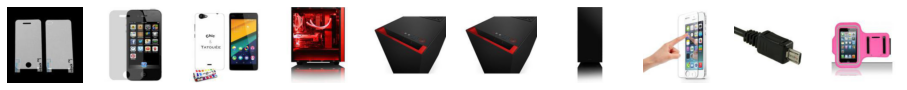

In [32]:
search_similar_image('166_0.jpg', 10)

In [ ]:
index = 0
neighbours_list = []
with open('nearest_neighbors_test.json') as f_in:
    neighbours_list = json.load(f_in)

In [39]:
f = open( 'nearest_neighbors_test_upload.json', 'w' )
index = 0
for neigh in neighbours_list:
    f.write('{"index":{"_id":"' + str(index) + '"}}' + '\n')
    f.write(str(neigh) + '\n')
    index += 1
f.close()

In [22]:
image_list = []
with open('image_mapping.txt') as f_in:
    image_list = json.load(f_in)
index = 0
img_write = open( 'image_mapping_write.txt', 'w' )
for img in image_list:
    img_write.write('{"index":{"_id":"' + str(index) + '"}}' + '\n')
    img_write.write(str(img) + '\n')
    index += 1
img_write.close()